In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
import missingno as msno
from fbprophet import Prophet
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
from datetime import datetime, timedelta

import os

In [ ]:
import itertools

In [ ]:

import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
path =r'drive/MyDrive/Beijing Datasets/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
frame = frame[cols]
frame = frame.sort_values(['station', 'year'])

frame.tail(3)

No  year  month  day  hour  ...  DEWP  RAIN   wd  WSPM        station
35061  35062  2017      2   28    21  ... -13.3   0.0   NW   1.1  Wanshouxigong
35062  35063  2017      2   28    22  ... -12.9   0.0  NNW   1.2  Wanshouxigong
35063  35064  2017      2   28    23  ... -15.9   0.0  NNE   1.3  Wanshouxigong

[3 rows x 18 columns]

# PM2.5

In [ ]:
df = frame[['No','year','month','day','hour','PM2.5','station']]

In [ ]:
dfpm1 = df.loc[df['station'] == 'Aotizhongxin']

In [ ]:
dfpm1

No  year  month  day  hour  PM2.5       station
0          1  2013      3    1     0    4.0  Aotizhongxin
1          2  2013      3    1     1    8.0  Aotizhongxin
2          3  2013      3    1     2    7.0  Aotizhongxin
3          4  2013      3    1     3    6.0  Aotizhongxin
4          5  2013      3    1     4    3.0  Aotizhongxin
...      ...   ...    ...  ...   ...    ...           ...
35059  35060  2017      2   28    19   12.0  Aotizhongxin
35060  35061  2017      2   28    20   13.0  Aotizhongxin
35061  35062  2017      2   28    21   16.0  Aotizhongxin
35062  35063  2017      2   28    22   21.0  Aotizhongxin
35063  35064  2017      2   28    23   19.0  Aotizhongxin

[35064 rows x 7 columns]

In [ ]:
from pylab import rcParams

In [ ]:
rcParams['figure.figsize'] = 18, 8


In [ ]:
dfpm1 = dfpm1.groupby(np.arange(len(dfpm1))//24).median()

In [ ]:
dfpm1['year'] = dfpm1['year'].astype('int')
dfpm1['month'] = dfpm1['month'].astype('int')
dfpm1['day'] = dfpm1['day'].astype('int')

In [ ]:
dfpm1 = dfpm1.drop(['hour'],axis = 1)


In [ ]:
dfpm1 = dfpm1.drop(['No'],axis = 1)

In [ ]:
dfpm1

year  month  day  PM2.5
0     2013      3    1    6.0
1     2013      3    2   23.5
2     2013      3    3   87.0
3     2013      3    4   15.5
4     2013      3    5  140.0
...    ...    ...  ...    ...
1456  2017      2   24   19.0
1457  2017      2   25   11.0
1458  2017      2   26   26.0
1459  2017      2   27   71.5
1460  2017      2   28   12.0

[1461 rows x 4 columns]

In [ ]:
df3 = pd.to_datetime(dfpm1[['year','month','day']])

In [ ]:
dfpm1['Date'] = df3

In [ ]:
dfpm1final = dfpm1[['Date','PM2.5']]

In [ ]:
dfpm1final

Date  PM2.5
0    2013-03-01    6.0
1    2013-03-02   23.5
2    2013-03-03   87.0
3    2013-03-04   15.5
4    2013-03-05  140.0
...         ...    ...
1456 2017-02-24   19.0
1457 2017-02-25   11.0
1458 2017-02-26   26.0
1459 2017-02-27   71.5
1460 2017-02-28   12.0

[1461 rows x 2 columns]

In [ ]:
df3 = dfpm1final.set_index('Date').resample('M').median()

In [ ]:
df3.loc['2013-6-30'] = 50.50

In [ ]:
df3 

PM2.5
Date              
2013-03-31   90.50
2013-04-30   54.50
2013-05-31   63.50
2013-06-30   50.50
2013-07-31   53.50
2013-08-31   51.50
2013-09-30   64.25
2013-10-31   51.00
2013-11-30   39.75
2013-12-31   37.50
2014-01-31   86.50
2014-02-28  109.50
2014-03-31   66.00
2014-04-30  105.75
2014-05-31   61.00
2014-06-30   49.75
2014-07-31   75.00
2014-08-31   56.50
2014-09-30   60.25
2014-10-31   90.00
2014-11-30   46.50
2014-12-31   20.50
2015-01-31   77.00
2015-02-28   46.75
2015-03-31   73.00
2015-04-30   64.00
2015-05-31   43.00
2015-06-30   44.50
2015-07-31   54.50
2015-08-31   28.50
2015-09-30   35.75
2015-10-31   30.00
2015-11-30   82.25
2015-12-31  118.00
2016-01-31   21.00
2016-02-29   19.50
2016-03-31   63.00
2016-04-30   71.50
2016-05-31   41.50
2016-06-30   56.25
2016-07-31   67.50
2016-08-31   44.00
2016-09-30   30.25
2016-10-31   59.50
2016-11-30   81.75
2016-12-31   58.50
2017-01-31   39.00
2017-02-28   27.00

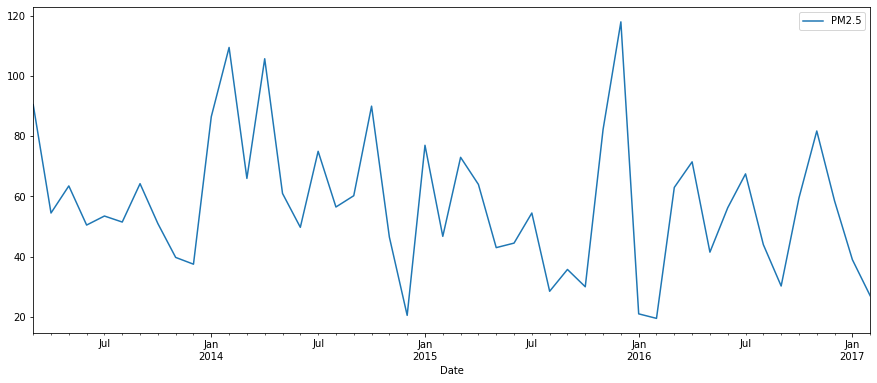

In [ ]:
df3.plot(figsize=(15, 6))
plt.show()

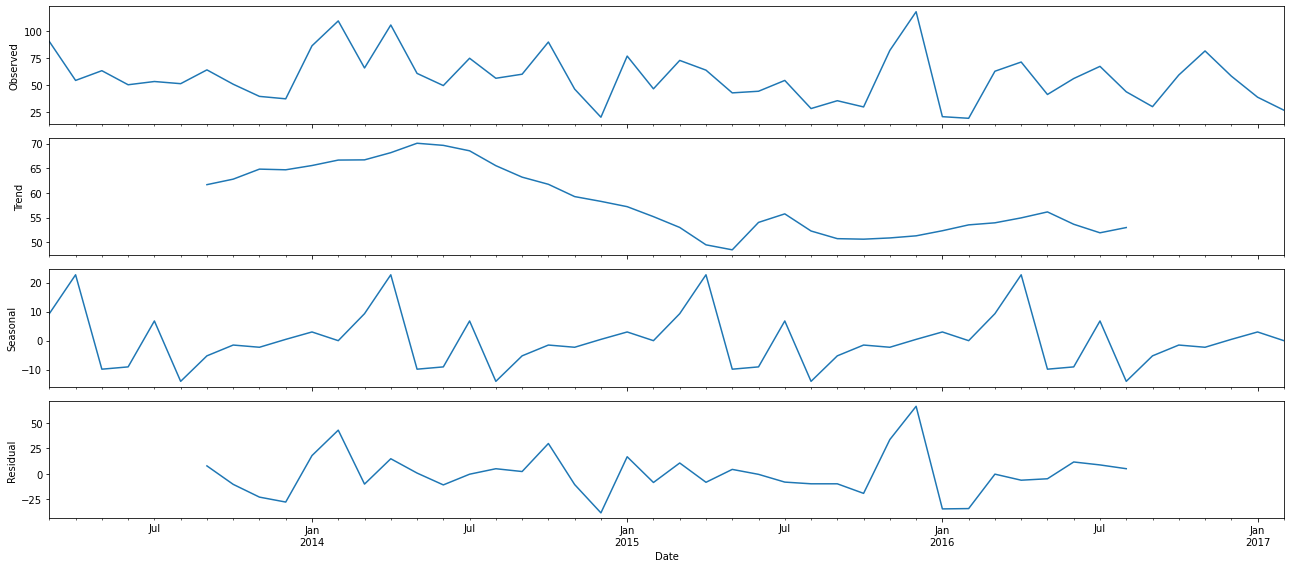

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df3, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:521.8945063384338
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1766.8252277723682
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:344.8124655742631
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:256.6605178816349
ARIMA(0, 0, 0)x(0, 3, 0, 12)12 - AIC:138.66933620968373


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:351.31279648620523


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1261.5510167401683
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:235.30149231204098
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:118.81394008563316
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:233.30933266460525
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:233.18860842077373
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:95.004080997355
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:95.35517283188972
ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:97.35517285894124
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:473.45770572116703
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2564.9644261501776
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:335.4754877290725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:246.19768800858623
ARIMA(0, 0, 1)x(0, 3, 0, 12)12 - AIC:127.82388830400393
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:353.24376900086213
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:232.67658505934946
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:120.08741522260252
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:230.19316030735183
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:226.2841251502899
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:96.88471189903068
ARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:93.58284324176186
ARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:95.07368695731326
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:457.7081822692088
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:3144.9425245658113
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:327.19144870812164
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:237.0491589049513
ARIMA(0, 0, 2)x(0, 3, 0, 12)12 - AIC:116.46775561028507
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:353.90793405577006
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:2825.6836837982332
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:231.39357226027312
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:115.49708642532444
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:222.766219680077


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:219.8960808148958
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:96.729860486113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:93.5432749174056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:98.32678535481327
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:441.7097664004128
ARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:2637.9993333642474
ARIMA(0, 0, 3)x(0, 1, 0, 12)12 - AIC:319.7589438043787
ARIMA(0, 0, 3)x(0, 2, 0, 12)12 - AIC:227.63709842253328


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:354.9830198476006
ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:2597.183314213241
ARIMA(0, 0, 3)x(1, 1, 0, 12)12 - AIC:232.83081782792925


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(1, 2, 0, 12)12 - AIC:117.61594884888332
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:223.7687005819114


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:220.96022764260005
ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC:97.94486529507498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:95.24441606516562


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:100.44606526075238
ARIMA(0, 0, 4)x(0, 0, 0, 12)12 - AIC:431.52100663580507
ARIMA(0, 0, 4)x(0, 0, 1, 12)12 - AIC:2828.8014885511366
ARIMA(0, 0, 4)x(0, 1, 0, 12)12 - AIC:312.7353831811887
ARIMA(0, 0, 4)x(0, 2, 0, 12)12 - AIC:219.29346396498994
ARIMA(0, 0, 4)x(1, 0, 0, 12)12 - AIC:357.3635286819446
ARIMA(0, 0, 4)x(1, 0, 1, 12)12 - AIC:2646.944294036817
ARIMA(0, 0, 4)x(1, 1, 0, 12)12 - AIC:232.76521425041335


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(1, 2, 0, 12)12 - AIC:117.24096499137212


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(2, 0, 0, 12)12 - AIC:222.16876376807323


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(2, 0, 1, 12)12 - AIC:218.07082070646635


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(2, 1, 0, 12)12 - AIC:99.1756431381918


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(3, 0, 0, 12)12 - AIC:95.98581550395812


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(3, 0, 1, 12)12 - AIC:98.93306641858631
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:443.4986747866592
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1545.4753330933734
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:357.912123830708


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:261.3533559156432
ARIMA(0, 1, 0)x(0, 3, 0, 12)12 - AIC:133.60067019762968
ARIMA(0, 1, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:343.842062948346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1422.050251530793
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:239.04599119590964
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:114.22220683069827
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:225.46281537710053


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:1016.3743152573682
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:95.87518470235361
ARIMA(0, 1, 0)x(3, 0, 0, 12)12 - AIC:96.52104158943524


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(3, 0, 1, 12)12 - AIC:342.62144251474024
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:416.18744644516045
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1372.049143224503
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:329.04710208356784
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:238.74317590981445
ARIMA(0, 1, 1)x(0, 3, 0, 12)12 - AIC:118.07520468530554
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:328.89794516576734


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1393.7017739147586
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:230.32375044506043
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:114.60044151001198
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:219.88195489575162


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:1001.6476258466253
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:93.02388665898815
ARIMA(0, 1, 1)x(3, 0, 0, 12)12 - AIC:92.03855712571382


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(3, 0, 1, 12)12 - AIC:374.65972082194156
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:407.44451639491086


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1473.2418382302667
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:321.88545500700707
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:230.23084586669134
ARIMA(0, 1, 2)x(0, 3, 0, 12)12 - AIC:107.98348556512107
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:328.59875808685604
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1313.9533244805693
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:227.48122902524938
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:114.83713962154023
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:214.43056442502274


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:967.5857530155449
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:94.91163950126506
ARIMA(0, 1, 2)x(3, 0, 0, 12)12 - AIC:89.85130016003305
ARIMA(0, 1, 2)x(3, 0, 1, 12)12 - AIC:373.2028338400093
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:397.24931627380005


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(0, 0, 1, 12)12 - AIC:1426.2937930937294
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:313.1273242559164
ARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:219.34413684724856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:321.13600131553574


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:1448.2130339465282
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:223.13128794094897


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:113.24725072861578
ARIMA(0, 1, 3)x(2, 0, 0, 12)12 - AIC:209.39167081249
ARIMA(0, 1, 3)x(2, 0, 1, 12)12 - AIC:882.1622908929195


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:97.67987514125022
ARIMA(0, 1, 3)x(3, 0, 0, 12)12 - AIC:89.48250255693733


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(3, 0, 1, 12)12 - AIC:325.14981799599497
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:390.8255153060332


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(0, 0, 1, 12)12 - AIC:1178.3730384709118
ARIMA(0, 1, 4)x(0, 1, 0, 12)12 - AIC:305.71784385820723
ARIMA(0, 1, 4)x(0, 2, 0, 12)12 - AIC:211.06868141040533
ARIMA(0, 1, 4)x(1, 0, 0, 12)12 - AIC:321.0628624132888


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(1, 0, 1, 12)12 - AIC:1264.9682382975634
ARIMA(0, 1, 4)x(1, 1, 0, 12)12 - AIC:223.53266829811815


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(1, 2, 0, 12)12 - AIC:119.4708708135085
ARIMA(0, 1, 4)x(2, 0, 0, 12)12 - AIC:209.94782624766572


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(2, 0, 1, 12)12 - AIC:990.6015400913847


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(2, 1, 0, 12)12 - AIC:111.01746259590058


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(3, 0, 0, 12)12 - AIC:93.10876354375273


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(3, 0, 1, 12)12 - AIC:429.64580493297535
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:476.16005343720394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1326.517418038363
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:381.32679947971377
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:271.9487335848267
ARIMA(0, 2, 0)x(0, 3, 0, 12)12 - AIC:129.72878178256775
ARIMA(0, 2, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:364.25677670294266


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1253.6618450556994
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:247.9262879279713
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:111.9792409029922
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:233.38030682335062


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:865.4226744970764
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:97.46249009296517
ARIMA(0, 2, 0)x(3, 0, 0, 12)12 - AIC:96.59537893123016
ARIMA(0, 2, 0)x(3, 0, 1, 12)12 - AIC:394.77639722343184
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:431.2278636277509
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:2934.193977970871
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:342.0952217596616
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:243.01541121633804
ARIMA(0, 2, 1)x(0, 3, 0, 12)12 - AIC:111.56661805011265
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:338.39694049120294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:930.0843542224754
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:234.88489278513126
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:109.32803491623952
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:221.7442616637537


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:861.1566680144824
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:91.03417418826233
ARIMA(0, 2, 1)x(3, 0, 0, 12)12 - AIC:93.74463872637499


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(3, 0, 1, 12)12 - AIC:387.4812265769158
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:407.0267182032911
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:2631.102541990418
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:318.6382364346083
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:223.42761768556628
ARIMA(0, 2, 2)x(0, 3, 0, 12)12 - AIC:97.46293431411931
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:324.7707459177628
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:2320.9748515747456
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:229.34104949418833
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:111.0283485700399
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:218.85054891891667
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:1724.6441666628896


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:93.74150371695121
ARIMA(0, 2, 2)x(3, 0, 0, 12)12 - AIC:95.22204186739094


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(3, 0, 1, 12)12 - AIC:732.1044950551984
ARIMA(0, 2, 3)x(0, 0, 0, 12)12 - AIC:397.9209860786948
ARIMA(0, 2, 3)x(0, 0, 1, 12)12 - AIC:2626.263269566259
ARIMA(0, 2, 3)x(0, 1, 0, 12)12 - AIC:310.96347099411213
ARIMA(0, 2, 3)x(0, 2, 0, 12)12 - AIC:214.47570351700747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(1, 0, 0, 12)12 - AIC:325.6898019416198


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(1, 0, 1, 12)12 - AIC:2170.9247114174427
ARIMA(0, 2, 3)x(1, 1, 0, 12)12 - AIC:225.83385658883392
ARIMA(0, 2, 3)x(1, 2, 0, 12)12 - AIC:111.33589945669284
ARIMA(0, 2, 3)x(2, 0, 0, 12)12 - AIC:212.48330379742217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(2, 0, 1, 12)12 - AIC:1001.0900106258207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(2, 1, 0, 12)12 - AIC:93.80904247101398
ARIMA(0, 2, 3)x(3, 0, 0, 12)12 - AIC:92.7934342608742
ARIMA(0, 2, 3)x(3, 0, 1, 12)12 - AIC:431.75452230504226
ARIMA(0, 2, 4)x(0, 0, 0, 12)12 - AIC:388.1753669887481
ARIMA(0, 2, 4)x(0, 0, 1, 12)12 - AIC:2455.948994760582
ARIMA(0, 2, 4)x(0, 1, 0, 12)12 - AIC:300.6399721792362
ARIMA(0, 2, 4)x(0, 2, 0, 12)12 - AIC:202.1538707558703


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(1, 0, 0, 12)12 - AIC:320.5105715242193
ARIMA(0, 2, 4)x(1, 0, 1, 12)12 - AIC:2417.876459745093
ARIMA(0, 2, 4)x(1, 1, 0, 12)12 - AIC:223.53653992710994
ARIMA(0, 2, 4)x(1, 2, 0, 12)12 - AIC:113.50963160621396


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(2, 0, 0, 12)12 - AIC:212.6065377531378


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(2, 0, 1, 12)12 - AIC:836.2361147832601


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(2, 1, 0, 12)12 - AIC:103.11085891197358


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(3, 0, 0, 12)12 - AIC:91.80699140560142
ARIMA(0, 2, 4)x(3, 0, 1, 12)12 - AIC:770.9376693588677
ARIMA(0, 3, 0)x(0, 0, 0, 12)12 - AIC:513.0308321943189


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(0, 0, 1, 12)12 - AIC:1079.6996761858907
ARIMA(0, 3, 0)x(0, 1, 0, 12)12 - AIC:406.05009234962404
ARIMA(0, 3, 0)x(0, 2, 0, 12)12 - AIC:281.5107891388095
ARIMA(0, 3, 0)x(0, 3, 0, 12)12 - AIC:123.10974481064493
ARIMA(0, 3, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 3, 0)x(1, 0, 0, 12)12 - AIC:386.0037919964777


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(1, 0, 1, 12)12 - AIC:1321.2477564574465
ARIMA(0, 3, 0)x(1, 1, 0, 12)12 - AIC:257.69006905831725
ARIMA(0, 3, 0)x(1, 2, 0, 12)12 - AIC:109.87501377954656
ARIMA(0, 3, 0)x(2, 0, 0, 12)12 - AIC:243.12805341787347
ARIMA(0, 3, 0)x(2, 0, 1, 12)12 - AIC:835.5987773107547
ARIMA(0, 3, 0)x(2, 1, 0, 12)12 - AIC:97.57122997993136
ARIMA(0, 3, 0)x(3, 0, 0, 12)12 - AIC:95.55301549569425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(3, 0, 1, 12)12 - AIC:294.8258183635222
ARIMA(0, 3, 1)x(0, 0, 0, 12)12 - AIC:461.6580528151959
ARIMA(0, 3, 1)x(0, 0, 1, 12)12 - AIC:2617.4433700094446
ARIMA(0, 3, 1)x(0, 1, 0, 12)12 - AIC:364.2240253497215
ARIMA(0, 3, 1)x(0, 2, 0, 12)12 - AIC:251.85504753472645
ARIMA(0, 3, 1)x(0, 3, 0, 12)12 - AIC:105.04030076587232
ARIMA(0, 3, 1)x(1, 0, 0, 12)12 - AIC:357.81308539204105


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 3, 1)x(1, 1, 0, 12)12 - AIC:242.8321983947469
ARIMA(0, 3, 1)x(1, 2, 0, 12)12 - AIC:105.97001348261415
ARIMA(0, 3, 1)x(2, 0, 0, 12)12 - AIC:228.99483765607505


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(2, 0, 1, 12)12 - AIC:949.9057041029342
ARIMA(0, 3, 1)x(2, 1, 0, 12)12 - AIC:91.55267839241276
ARIMA(0, 3, 1)x(3, 0, 0, 12)12 - AIC:92.74335010931871
ARIMA(0, 3, 1)x(3, 0, 1, 12)12 - AIC:362.7931942499934
ARIMA(0, 3, 2)x(0, 0, 0, 12)12 - AIC:420.67876071710555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(0, 0, 1, 12)12 - AIC:2037.8501935906365
ARIMA(0, 3, 2)x(0, 1, 0, 12)12 - AIC:329.15627967120656
ARIMA(0, 3, 2)x(0, 2, 0, 12)12 - AIC:226.1942207616983
ARIMA(0, 3, 2)x(0, 3, 0, 12)12 - AIC:89.0010452108284
ARIMA(0, 3, 2)x(1, 0, 0, 12)12 - AIC:336.32046828644894
ARIMA(0, 3, 2)x(1, 0, 1, 12)12 - AIC:2044.759167432546
ARIMA(0, 3, 2)x(1, 1, 0, 12)12 - AIC:233.253026572083


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(1, 2, 0, 12)12 - AIC:108.19009047006048
ARIMA(0, 3, 2)x(2, 0, 0, 12)12 - AIC:221.0110533890729
ARIMA(0, 3, 2)x(2, 0, 1, 12)12 - AIC:1517.8889300271426
ARIMA(0, 3, 2)x(2, 1, 0, 12)12 - AIC:90.72448174342733
ARIMA(0, 3, 2)x(3, 0, 0, 12)12 - AIC:92.36631318995981
ARIMA(0, 3, 2)x(3, 0, 1, 12)12 - AIC:655.4870186765089
ARIMA(0, 3, 3)x(0, 0, 0, 12)12 - AIC:401.2559255326451
ARIMA(0, 3, 3)x(0, 0, 1, 12)12 - AIC:2193.281673704076
ARIMA(0, 3, 3)x(0, 1, 0, 12)12 - AIC:308.6399411021422
ARIMA(0, 3, 3)x(0, 2, 0, 12)12 - AIC:208.02963596328976
ARIMA(0, 3, 3)x(1, 0, 0, 12)12 - AIC:326.02509370774385
ARIMA(0, 3, 3)x(1, 0, 1, 12)12 - AIC:2339.1643722434383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(1, 1, 0, 12)12 - AIC:227.83109387916215
ARIMA(0, 3, 3)x(1, 2, 0, 12)12 - AIC:105.60327186880401


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 0, 0, 12)12 - AIC:222.19614019822103


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 0, 1, 12)12 - AIC:843.4876507917278


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 1, 0, 12)12 - AIC:105.54658111949112


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(3, 0, 0, 12)12 - AIC:94.34684415178045


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(3, 0, 1, 12)12 - AIC:363.63438614897393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(0, 0, 0, 12)12 - AIC:390.4341479350446
ARIMA(0, 3, 4)x(0, 0, 1, 12)12 - AIC:2041.0871837692862
ARIMA(0, 3, 4)x(0, 1, 0, 12)12 - AIC:299.53357362023144


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(0, 2, 0, 12)12 - AIC:198.0664282636905


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 0, 0, 12)12 - AIC:328.42918754219585
ARIMA(0, 3, 4)x(1, 0, 1, 12)12 - AIC:2405.414321008594


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 1, 0, 12)12 - AIC:229.47798601503627
ARIMA(0, 3, 4)x(1, 2, 0, 12)12 - AIC:108.63700746592187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(2, 0, 0, 12)12 - AIC:215.55012558643426
ARIMA(0, 3, 4)x(2, 0, 1, 12)12 - AIC:1588.6421209268337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(2, 1, 0, 12)12 - AIC:101.2430009467842


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(3, 0, 0, 12)12 - AIC:95.0819703017132


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(0, 4, 0)x(0, 0, 0, 12)12 - AIC:550.8929550219717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(0, 0, 1, 12)12 - AIC:1258.9779137993366
ARIMA(0, 4, 0)x(0, 1, 0, 12)12 - AIC:429.73648557013166
ARIMA(0, 4, 0)x(0, 2, 0, 12)12 - AIC:288.246820358778
ARIMA(0, 4, 0)x(0, 3, 0, 12)12 - AIC:113.17960519550948
ARIMA(0, 4, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 4, 0)x(1, 0, 0, 12)12 - AIC:407.8398790950833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(1, 0, 1, 12)12 - AIC:1078.2524633738235
ARIMA(0, 4, 0)x(1, 1, 0, 12)12 - AIC:266.9442194082629
ARIMA(0, 4, 0)x(1, 2, 0, 12)12 - AIC:105.98075519335836
ARIMA(0, 4, 0)x(2, 0, 0, 12)12 - AIC:251.64879461374525


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(2, 0, 1, 12)12 - AIC:684.275437524551


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(2, 1, 0, 12)12 - AIC:96.20016395721765
ARIMA(0, 4, 0)x(3, 0, 0, 12)12 - AIC:93.76441503782624


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(3, 0, 1, 12)12 - AIC:307.9797206481242
ARIMA(0, 4, 1)x(0, 0, 0, 12)12 - AIC:496.25408745310733
ARIMA(0, 4, 1)x(0, 0, 1, 12)12 - AIC:2053.454930808996
ARIMA(0, 4, 1)x(0, 1, 0, 12)12 - AIC:386.84414165228816
ARIMA(0, 4, 1)x(0, 2, 0, 12)12 - AIC:258.9467259876333
ARIMA(0, 4, 1)x(0, 3, 0, 12)12 - AIC:96.06877596664997
ARIMA(0, 4, 1)x(1, 0, 0, 12)12 - AIC:378.3739925098092
ARIMA(0, 4, 1)x(1, 0, 1, 12)12 - AIC:2158.0374588767
ARIMA(0, 4, 1)x(1, 1, 0, 12)12 - AIC:251.25541037350587
ARIMA(0, 4, 1)x(1, 2, 0, 12)12 - AIC:102.2642650985088
ARIMA(0, 4, 1)x(2, 0, 0, 12)12 - AIC:236.18331552672092
ARIMA(0, 4, 1)x(2, 0, 1, 12)12 - AIC:610.8358649235604
ARIMA(0, 4, 1)x(2, 1, 0, 12)12 - AIC:90.86001654244417
ARIMA(0, 4, 1)x(3, 0, 0, 12)12 - AIC:90.88642685812931
ARIMA(0, 4, 1)x(3, 0, 1, 12)12 - AIC:611.7415439177882
ARIMA(0, 4, 2)x(0, 0, 0, 12)12 - AIC:448.57294276208455
ARIMA(0, 4, 2)x(0, 0, 1, 12)12 - AIC:2034.0040313761822
ARIMA(0, 4, 2)x(0, 1, 0, 12)12 - AIC:348.7118614076563
ARIMA(

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 4, 2)x(1, 0, 0, 12)12 - AIC:352.6501088292649
ARIMA(0, 4, 2)x(1, 0, 1, 12)12 - AIC:2043.4906978076526
ARIMA(0, 4, 2)x(1, 1, 0, 12)12 - AIC:239.72597130960668


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(1, 2, 0, 12)12 - AIC:104.50483750386738
ARIMA(0, 4, 2)x(2, 0, 0, 12)12 - AIC:224.33584306606565
ARIMA(0, 4, 2)x(2, 0, 1, 12)12 - AIC:1068.2668639365133
ARIMA(0, 4, 2)x(2, 1, 0, 12)12 - AIC:85.53446210427703
ARIMA(0, 4, 2)x(3, 0, 0, 12)12 - AIC:89.54208585226611


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(0, 4, 3)x(0, 0, 0, 12)12 - AIC:411.1538039800662


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 4, 3)x(0, 1, 0, 12)12 - AIC:316.620002441735
ARIMA(0, 4, 3)x(0, 2, 0, 12)12 - AIC:209.02520041722747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(1, 0, 0, 12)12 - AIC:333.4868591048262
ARIMA(0, 4, 3)x(1, 0, 1, 12)12 - AIC:1935.6110562987435


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(1, 1, 0, 12)12 - AIC:229.38525392923293
ARIMA(0, 4, 3)x(1, 2, 0, 12)12 - AIC:100.43391327645152
ARIMA(0, 4, 3)x(2, 0, 0, 12)12 - AIC:217.15312020681054


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 0, 1, 12)12 - AIC:679.5804123440794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 1, 0, 12)12 - AIC:93.86638273565326


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(3, 0, 0, 12)12 - AIC:88.6314960108877
ARIMA(0, 4, 3)x(3, 0, 1, 12)12 - AIC:319.17474537340104


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 0, 0, 12)12 - AIC:395.4990613595583
ARIMA(0, 4, 4)x(0, 0, 1, 12)12 - AIC:1871.8155284618078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 1, 0, 12)12 - AIC:297.9797085002125


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 2, 0, 12)12 - AIC:194.36445717998362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 0, 0, 12)12 - AIC:332.31969564780115
ARIMA(0, 4, 4)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 1, 0, 12)12 - AIC:259.3222518394911


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 2, 0, 12)12 - AIC:102.81490134533135


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 0, 0, 12)12 - AIC:219.01412504866602


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 0, 1, 12)12 - AIC:1423.6616233057723


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 1, 0, 12)12 - AIC:93.09860666363889


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(3, 0, 0, 12)12 - AIC:92.24277479760093


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(3, 0, 1, 12)12 - AIC:609.455162771871
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:451.76156556563427


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1521.1774452731531
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:346.7941373793508
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:258.5476399042666
ARIMA(1, 0, 0)x(0, 3, 0, 12)12 - AIC:140.6195493850819
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:343.2083105970569
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1437.3845867064924


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:228.2194300818593
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:111.98182114190013
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:226.41224143751555
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:226.49258117249065
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:90.23624058015345
ARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:90.82489920867535
ARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:92.82489920863759
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:425.2879137964087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1419.9739679782658
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:335.05166980389055
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:246.61325755054227
ARIMA(1, 0, 1)x(0, 3, 0, 12)12 - AIC:128.53792086302587
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:328.3113946421123


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1360.2926802637658
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:224.5568933159019
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:111.70028049076967
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:225.08635759653382
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:224.51568764621032
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:91.1627166998062
ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:92.57959731553737
ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:90.19577521149384
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:416.6759380123052


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1422.8630020983035
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:327.1462034966095
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:237.94449328352584
ARIMA(1, 0, 2)x(0, 3, 0, 12)12 - AIC:118.32442613607788
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:328.7458907174774
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1273.149472217758
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:224.51255862392173
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:111.73610003383423
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:216.48944087040906
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:213.5472587474074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:91.54830381067771
ARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:87.97009216292552


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:89.98132557678737
ARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:405.86360301925555
ARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:1406.3983974841613
ARIMA(1, 0, 3)x(0, 1, 0, 12)12 - AIC:321.42133016178434
ARIMA(1, 0, 3)x(0, 2, 0, 12)12 - AIC:229.56742201374044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:320.74316894333856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:1283.0363414072767
ARIMA(1, 0, 3)x(1, 1, 0, 12)12 - AIC:224.43129383985018
ARIMA(1, 0, 3)x(1, 2, 0, 12)12 - AIC:110.0411630900281


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:212.57563902783957


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:212.10764670599502


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(2, 1, 0, 12)12 - AIC:93.45638370231204
ARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:91.5019224952712


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:92.83266010917907
ARIMA(1, 0, 4)x(0, 0, 0, 12)12 - AIC:398.9936730065681


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(0, 0, 1, 12)12 - AIC:1488.637305780533
ARIMA(1, 0, 4)x(0, 1, 0, 12)12 - AIC:311.7948189362023
ARIMA(1, 0, 4)x(0, 2, 0, 12)12 - AIC:220.6241756263313
ARIMA(1, 0, 4)x(1, 0, 0, 12)12 - AIC:321.13796648147667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(1, 0, 1, 12)12 - AIC:1446.5366457617247
ARIMA(1, 0, 4)x(1, 1, 0, 12)12 - AIC:223.37785125797652


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(1, 2, 0, 12)12 - AIC:107.13167143423355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:210.10453703143818


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(2, 0, 1, 12)12 - AIC:219.8428083948563


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(2, 1, 0, 12)12 - AIC:90.29231391138316


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(3, 0, 0, 12)12 - AIC:88.88039392563567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(3, 0, 1, 12)12 - AIC:89.73926289606192
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:442.3222409058425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1382.659768938288
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:353.38209731526626
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:258.4537846284709
ARIMA(1, 1, 0)x(0, 3, 0, 12)12 - AIC:133.54637270165833
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:333.7310775163289


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1405.9947088501913
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:231.2480345738684
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:103.37561734549197
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:218.33492378933587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:708.4400597915188
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:89.24582647092039
ARIMA(1, 1, 0)x(3, 0, 0, 12)12 - AIC:89.35727662459422


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(3, 0, 1, 12)12 - AIC:261.83166993480717
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:417.4233959536735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1490.4145666616912
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:331.017826509273
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:240.73106343173012
ARIMA(1, 1, 1)x(0, 3, 0, 12)12 - AIC:120.00815093041945
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:319.9173634187846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1514.0012365612117
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:222.69563738660875
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:106.01196002683756
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:211.919090504765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:905.9255558149003
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:86.32487532275145
ARIMA(1, 1, 1)x(3, 0, 0, 12)12 - AIC:86.04973676749346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(3, 0, 1, 12)12 - AIC:306.1842551101006
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:404.865857690547


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1477.9355165833272
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:320.99381407336796
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:230.65508534638923
ARIMA(1, 1, 2)x(0, 3, 0, 12)12 - AIC:109.62460752403891
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:318.61600980542084
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:3153.8612505260635
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:219.23835535419002
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:107.21468793639472
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:208.50025505124654
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:702.2271722649613
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:86.04441582846046
ARIMA(1, 1, 2)x(3, 0, 0, 12)12 - AIC:83.96816722819712


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(3, 0, 1, 12)12 - AIC:354.32781386482867
ARIMA(1, 1, 3)x(0, 0, 0, 12)12 - AIC:398.42518755392547


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(0, 0, 1, 12)12 - AIC:1477.023961943883
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:313.19956928847193
ARIMA(1, 1, 3)x(0, 2, 0, 12)12 - AIC:221.73687792112216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(1, 0, 0, 12)12 - AIC:312.7196669964993


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(1, 0, 1, 12)12 - AIC:1499.5183643999378
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:215.20259902439895
ARIMA(1, 1, 3)x(1, 2, 0, 12)12 - AIC:106.76360684848864
ARIMA(1, 1, 3)x(2, 0, 0, 12)12 - AIC:203.60167994103386
ARIMA(1, 1, 3)x(2, 0, 1, 12)12 - AIC:846.4161043555652


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:87.58768501713922
ARIMA(1, 1, 3)x(3, 0, 0, 12)12 - AIC:85.05139833740887


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(3, 0, 1, 12)12 - AIC:339.3599689270429
ARIMA(1, 1, 4)x(0, 0, 0, 12)12 - AIC:392.0653494895839


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(0, 0, 1, 12)12 - AIC:1179.3008130337475
ARIMA(1, 1, 4)x(0, 1, 0, 12)12 - AIC:306.28755113259325


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(0, 2, 0, 12)12 - AIC:212.01564748024646
ARIMA(1, 1, 4)x(1, 0, 0, 12)12 - AIC:311.85816512736295
ARIMA(1, 1, 4)x(1, 0, 1, 12)12 - AIC:1277.4277485843706


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(1, 1, 0, 12)12 - AIC:215.0481526415384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(1, 2, 0, 12)12 - AIC:105.48857764906857
ARIMA(1, 1, 4)x(2, 0, 0, 12)12 - AIC:201.75653366733397


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(2, 0, 1, 12)12 - AIC:837.7481695793531


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(2, 1, 0, 12)12 - AIC:95.01507090557139


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(3, 0, 0, 12)12 - AIC:81.21017750605344


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(3, 0, 1, 12)12 - AIC:351.4385760852217
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:468.26645914980435


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1128.3756196243028
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:371.07190023349347
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:264.8792225359978
ARIMA(1, 2, 0)x(0, 3, 0, 12)12 - AIC:128.46883965669133
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:349.39092212535354


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1124.8215973853328
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:237.8284546082885
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:95.37289063512475
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:224.0046683691256


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:791.7919894040817
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:89.40126618444431
ARIMA(1, 2, 0)x(3, 0, 0, 12)12 - AIC:88.90358839065746


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(3, 0, 1, 12)12 - AIC:342.7535401549783
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:430.2408482851214
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:1645.0966716542807
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:338.8849467675615
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:241.03092363482818
ARIMA(1, 2, 1)x(0, 3, 0, 12)12 - AIC:112.20496186884063
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:328.57582303879883
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:904.7087185219441
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:226.55939370781064
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:95.35884094355747
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:214.1834209759466
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:844.3205938675299
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:84.90143707220183
ARIMA(1, 2, 1)x(3, 0, 0, 12)12 - AIC:86.88689282952967


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(3, 0, 1, 12)12 - AIC:269.4669822483725
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:423.7282754088222


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:2250.372383918708
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:320.63792824408284
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:225.40395719496433


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 3, 0, 12)12 - AIC:101.70246877084409
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:331.28719351411104


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1141.799091926742
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:226.02375934996957
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:96.24806682161932
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:212.26867392513267
ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:1689.7442655600246
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:82.57614433865326
ARIMA(1, 2, 2)x(3, 0, 0, 12)12 - AIC:85.61401388654248


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(3, 0, 1, 12)12 - AIC:639.5071286952506
ARIMA(1, 2, 3)x(0, 0, 0, 12)12 - AIC:394.9069217712483
ARIMA(1, 2, 3)x(0, 0, 1, 12)12 - AIC:1205.0598153640035
ARIMA(1, 2, 3)x(0, 1, 0, 12)12 - AIC:310.181728206065
ARIMA(1, 2, 3)x(0, 2, 0, 12)12 - AIC:215.0453852537761


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 2, 3)x(1, 0, 0, 12)12 - AIC:314.89999374755126


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(1, 0, 1, 12)12 - AIC:955.2603944886206
ARIMA(1, 2, 3)x(1, 1, 0, 12)12 - AIC:217.21710196895782


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(1, 2, 0, 12)12 - AIC:99.10389401074974
ARIMA(1, 2, 3)x(2, 0, 0, 12)12 - AIC:204.2816963715997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(2, 0, 1, 12)12 - AIC:643.5930256712911


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(2, 1, 0, 12)12 - AIC:79.42598944088083
ARIMA(1, 2, 3)x(3, 0, 0, 12)12 - AIC:85.62786421011506
ARIMA(1, 2, 3)x(3, 0, 1, 12)12 - AIC:351.0928923909346
ARIMA(1, 2, 4)x(0, 0, 0, 12)12 - AIC:388.60380780311544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(0, 0, 1, 12)12 - AIC:982.1286696248798
ARIMA(1, 2, 4)x(0, 1, 0, 12)12 - AIC:301.40581076170423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(0, 2, 0, 12)12 - AIC:204.16180070654352


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(1, 0, 0, 12)12 - AIC:311.64453834316527
ARIMA(1, 2, 4)x(1, 0, 1, 12)12 - AIC:2412.262387078985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(1, 1, 0, 12)12 - AIC:214.94990285619022


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(1, 2, 0, 12)12 - AIC:102.15431580017238


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(2, 0, 0, 12)12 - AIC:205.25958855222132


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(2, 0, 1, 12)12 - AIC:764.1247838067279


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(2, 1, 0, 12)12 - AIC:98.49667474742107


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(3, 0, 0, 12)12 - AIC:86.30749952221771
ARIMA(1, 2, 4)x(3, 0, 1, 12)12 - AIC:383.2938488645288
ARIMA(1, 3, 0)x(0, 0, 0, 12)12 - AIC:499.0869254270588


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(0, 0, 1, 12)12 - AIC:978.3477444533274
ARIMA(1, 3, 0)x(0, 1, 0, 12)12 - AIC:391.9769614014921
ARIMA(1, 3, 0)x(0, 2, 0, 12)12 - AIC:273.19860526573586
ARIMA(1, 3, 0)x(0, 3, 0, 12)12 - AIC:122.4741802906224
ARIMA(1, 3, 0)x(1, 0, 0, 12)12 - AIC:368.7306835084638


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(1, 0, 1, 12)12 - AIC:985.9164390932326
ARIMA(1, 3, 0)x(1, 1, 0, 12)12 - AIC:244.9455221924337
ARIMA(1, 3, 0)x(1, 2, 0, 12)12 - AIC:93.90415474121791
ARIMA(1, 3, 0)x(2, 0, 0, 12)12 - AIC:231.29650832180118


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(2, 0, 1, 12)12 - AIC:646.0663168845019
ARIMA(1, 3, 0)x(2, 1, 0, 12)12 - AIC:88.02432042199746
ARIMA(1, 3, 0)x(3, 0, 0, 12)12 - AIC:86.20626504057795


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(3, 0, 1, 12)12 - AIC:314.73754057073955
ARIMA(1, 3, 1)x(0, 0, 0, 12)12 - AIC:454.6635267522824


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 1)x(0, 0, 1, 12)12 - AIC:2084.4807100216863
ARIMA(1, 3, 1)x(0, 1, 0, 12)12 - AIC:354.7873425067752
ARIMA(1, 3, 1)x(0, 2, 0, 12)12 - AIC:245.32897701765603
ARIMA(1, 3, 1)x(0, 3, 0, 12)12 - AIC:104.71252989232553
ARIMA(1, 3, 1)x(1, 0, 0, 12)12 - AIC:344.7877719940409
ARIMA(1, 3, 1)x(1, 0, 1, 12)12 - AIC:2489.131742864959
ARIMA(1, 3, 1)x(1, 1, 0, 12)12 - AIC:232.26891193801097
ARIMA(1, 3, 1)x(1, 2, 0, 12)12 - AIC:92.22778591390426
ARIMA(1, 3, 1)x(2, 0, 0, 12)12 - AIC:219.0776265434514
ARIMA(1, 3, 1)x(2, 0, 1, 12)12 - AIC:796.872484707002
ARIMA(1, 3, 1)x(2, 1, 0, 12)12 - AIC:83.2803995271974
ARIMA(1, 3, 1)x(3, 0, 0, 12)12 - AIC:84.24012459633383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 1)x(3, 0, 1, 12)12 - AIC:327.0369233142359
ARIMA(1, 3, 2)x(0, 0, 0, 12)12 - AIC:420.24336560135055
ARIMA(1, 3, 2)x(0, 0, 1, 12)12 - AIC:2196.1305272924
ARIMA(1, 3, 2)x(0, 1, 0, 12)12 - AIC:326.48970037229157
ARIMA(1, 3, 2)x(0, 2, 0, 12)12 - AIC:225.05869458194783


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 3, 2)x(1, 0, 0, 12)12 - AIC:326.4928187707342
ARIMA(1, 3, 2)x(1, 0, 1, 12)12 - AIC:2044.2396728344117
ARIMA(1, 3, 2)x(1, 1, 0, 12)12 - AIC:223.9828310658418
ARIMA(1, 3, 2)x(1, 2, 0, 12)12 - AIC:93.52000006528527
ARIMA(1, 3, 2)x(2, 0, 0, 12)12 - AIC:212.30625807812254
ARIMA(1, 3, 2)x(2, 0, 1, 12)12 - AIC:802.1893174612821


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(2, 1, 0, 12)12 - AIC:84.41942947188986
ARIMA(1, 3, 2)x(3, 0, 0, 12)12 - AIC:83.89573471661114
ARIMA(1, 3, 2)x(3, 0, 1, 12)12 - AIC:585.5340750662857
ARIMA(1, 3, 3)x(0, 0, 0, 12)12 - AIC:412.4397850828717
ARIMA(1, 3, 3)x(0, 0, 1, 12)12 - AIC:2293.4918406242564
ARIMA(1, 3, 3)x(0, 1, 0, 12)12 - AIC:322.0587541367609
ARIMA(1, 3, 3)x(0, 2, 0, 12)12 - AIC:217.83183468083058
ARIMA(1, 3, 3)x(1, 0, 0, 12)12 - AIC:328.8797319906013
ARIMA(1, 3, 3)x(1, 0, 1, 12)12 - AIC:2302.808044239382
ARIMA(1, 3, 3)x(1, 1, 0, 12)12 - AIC:220.8128244855741
ARIMA(1, 3, 3)x(1, 2, 0, 12)12 - AIC:94.44137792504384
ARIMA(1, 3, 3)x(2, 0, 0, 12)12 - AIC:207.78450112847486


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(2, 0, 1, 12)12 - AIC:777.0387828144112


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(2, 1, 0, 12)12 - AIC:94.67140170388798


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(3, 0, 0, 12)12 - AIC:83.68523489022101


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(3, 0, 1, 12)12 - AIC:326.96076811872445


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(0, 0, 0, 12)12 - AIC:389.1365340356859
ARIMA(1, 3, 4)x(0, 0, 1, 12)12 - AIC:2093.0189180746415
ARIMA(1, 3, 4)x(0, 1, 0, 12)12 - AIC:298.4005805316646
ARIMA(1, 3, 4)x(0, 2, 0, 12)12 - AIC:198.1001356739439


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 0, 0, 12)12 - AIC:329.0264224199616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 0, 1, 12)12 - AIC:993.5152080983227


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 1, 0, 12)12 - AIC:220.85301170685628


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 2, 0, 12)12 - AIC:95.09014233050098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(2, 0, 0, 12)12 - AIC:203.4443948470061
ARIMA(1, 3, 4)x(2, 0, 1, 12)12 - AIC:766.7323035860078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(2, 1, 0, 12)12 - AIC:98.7747599875143


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(3, 0, 0, 12)12 - AIC:85.44669048367257


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(3, 0, 1, 12)12 - AIC:350.16917554043454
ARIMA(1, 4, 0)x(0, 0, 0, 12)12 - AIC:531.5731243964187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(0, 0, 1, 12)12 - AIC:1120.3622490065147
ARIMA(1, 4, 0)x(0, 1, 0, 12)12 - AIC:412.8964930844167
ARIMA(1, 4, 0)x(0, 2, 0, 12)12 - AIC:279.9880452831635
ARIMA(1, 4, 0)x(0, 3, 0, 12)12 - AIC:113.88097143667233
ARIMA(1, 4, 0)x(1, 0, 0, 12)12 - AIC:388.2439234826051


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(1, 0, 1, 12)12 - AIC:1097.7192210239593
ARIMA(1, 4, 0)x(1, 1, 0, 12)12 - AIC:251.71400753563185
ARIMA(1, 4, 0)x(1, 2, 0, 12)12 - AIC:91.56791826411444
ARIMA(1, 4, 0)x(2, 0, 0, 12)12 - AIC:238.09342732378315
ARIMA(1, 4, 0)x(2, 0, 1, 12)12 - AIC:693.1606845161432
ARIMA(1, 4, 0)x(2, 1, 0, 12)12 - AIC:83.80367468623199
ARIMA(1, 4, 0)x(3, 0, 0, 12)12 - AIC:76.52688468383626


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(3, 0, 1, 12)12 - AIC:313.17050855039855
ARIMA(1, 4, 1)x(0, 0, 0, 12)12 - AIC:483.54488375576176


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 1)x(0, 0, 1, 12)12 - AIC:2041.9597399025927
ARIMA(1, 4, 1)x(0, 1, 0, 12)12 - AIC:373.161848197418
ARIMA(1, 4, 1)x(0, 2, 0, 12)12 - AIC:251.3090216882036
ARIMA(1, 4, 1)x(0, 3, 0, 12)12 - AIC:96.3417218398471
ARIMA(1, 4, 1)x(1, 0, 0, 12)12 - AIC:362.0862218752105


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 1)x(1, 0, 1, 12)12 - AIC:1990.6129990411428
ARIMA(1, 4, 1)x(1, 1, 0, 12)12 - AIC:238.3193502617882
ARIMA(1, 4, 1)x(1, 2, 0, 12)12 - AIC:89.48206447397645
ARIMA(1, 4, 1)x(2, 0, 0, 12)12 - AIC:225.60218523832205


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 1)x(2, 0, 1, 12)12 - AIC:616.46849036173
ARIMA(1, 4, 1)x(2, 1, 0, 12)12 - AIC:80.19472458590528
ARIMA(1, 4, 1)x(3, 0, 0, 12)12 - AIC:73.71573780955326
ARIMA(1, 4, 1)x(3, 0, 1, 12)12 - AIC:285.5448095076618
ARIMA(1, 4, 2)x(0, 0, 0, 12)12 - AIC:442.62444679607086
ARIMA(1, 4, 2)x(0, 0, 1, 12)12 - AIC:2047.983884743248
ARIMA(1, 4, 2)x(0, 1, 0, 12)12 - AIC:340.5393829424992
ARIMA(1, 4, 2)x(0, 2, 0, 12)12 - AIC:227.17176706624414


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 4, 2)x(1, 0, 0, 12)12 - AIC:340.2040184089569
ARIMA(1, 4, 2)x(1, 0, 1, 12)12 - AIC:1999.1551752447226
ARIMA(1, 4, 2)x(1, 1, 0, 12)12 - AIC:229.8232932163625
ARIMA(1, 4, 2)x(1, 2, 0, 12)12 - AIC:88.32201947311935
ARIMA(1, 4, 2)x(2, 0, 0, 12)12 - AIC:216.40140907137146
ARIMA(1, 4, 2)x(2, 0, 1, 12)12 - AIC:1397.3629187458846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(2, 1, 0, 12)12 - AIC:76.9889535067804
ARIMA(1, 4, 2)x(3, 0, 0, 12)12 - AIC:81.32959134241597
ARIMA(1, 4, 2)x(3, 0, 1, 12)12 - AIC:522.151464819799
ARIMA(1, 4, 3)x(0, 0, 0, 12)12 - AIC:411.2160506815347


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(0, 0, 1, 12)12 - AIC:1879.8899760673726
ARIMA(1, 4, 3)x(0, 1, 0, 12)12 - AIC:315.0834448463013
ARIMA(1, 4, 3)x(0, 2, 0, 12)12 - AIC:208.84142510715725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(1, 0, 0, 12)12 - AIC:326.6706906604772
ARIMA(1, 4, 3)x(1, 0, 1, 12)12 - AIC:2364.1029973124373


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(1, 1, 0, 12)12 - AIC:233.2018718816219
ARIMA(1, 4, 3)x(1, 2, 0, 12)12 - AIC:89.16602925567126
ARIMA(1, 4, 3)x(2, 0, 0, 12)12 - AIC:213.97963518472991
ARIMA(1, 4, 3)x(2, 0, 1, 12)12 - AIC:783.1588548515073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(2, 1, 0, 12)12 - AIC:93.49137334344988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(3, 0, 0, 12)12 - AIC:81.55994878961734
ARIMA(1, 4, 3)x(3, 0, 1, 12)12 - AIC:292.04997803862


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 0, 0, 12)12 - AIC:400.6451679624024
ARIMA(1, 4, 4)x(0, 0, 1, 12)12 - AIC:2079.141011239519


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 1, 0, 12)12 - AIC:306.75932236112567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 2, 0, 12)12 - AIC:198.47567685220747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 0, 0, 12)12 - AIC:323.6218176666863
ARIMA(1, 4, 4)x(1, 0, 1, 12)12 - AIC:2407.7901077205047


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 1, 0, 12)12 - AIC:232.20055422867406


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 2, 0, 12)12 - AIC:102.53264278536297


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 0, 0, 12)12 - AIC:207.1210222426841
ARIMA(1, 4, 4)x(2, 0, 1, 12)12 - AIC:1459.7725907054994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 1, 0, 12)12 - AIC:94.22571811906595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(3, 0, 0, 12)12 - AIC:82.4219839851413


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:442.22732049730814


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1511.4522767581848
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:336.1917519364364
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:246.96167131304497
ARIMA(2, 0, 0)x(0, 3, 0, 12)12 - AIC:129.15285355848224
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:332.49406417255


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1400.132735130539
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:215.40862207951065
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:98.56310764287322
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:211.26365407169413
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:211.93211707275285
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:80.60909346216076
ARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:79.60475621018084
ARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:81.60475621570815
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:426.834229861582


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:2555.9152509884607
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:335.9159812477658
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:248.13172191126654
ARIMA(2, 0, 1)x(0, 3, 0, 12)12 - AIC:129.3429736499873
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:322.19612540364324
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:214.82452642772316
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:97.25918130561506


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:214.01640117557625


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:210.0256436952152
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:84.03321463592614


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:74.07480232519843


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:76.04334304726947
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:413.7734990377583
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1448.7677460253876
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:330.3691869293456
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:239.4384433425397
ARIMA(2, 0, 2)x(0, 3, 0, 12)12 - AIC:119.48853804296914
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:318.9955568205449


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1404.3895108383174
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:216.6828847544175
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:98.0563293540105
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:210.30531696970812


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:204.41239813594837
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:83.42368261925057


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:75.87437136603292


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:74.29075546003766
ARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:407.209624007843


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:1408.3983974843106
ARIMA(2, 0, 3)x(0, 1, 0, 12)12 - AIC:322.1221129194739
ARIMA(2, 0, 3)x(0, 2, 0, 12)12 - AIC:229.66505066041913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:315.9384762626576
ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:1364.8309461003917
ARIMA(2, 0, 3)x(1, 1, 0, 12)12 - AIC:214.43490383453536


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(1, 2, 0, 12)12 - AIC:97.31501512017633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:208.97658570985269


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:204.5374769793674
ARIMA(2, 0, 3)x(2, 1, 0, 12)12 - AIC:83.21506399836068


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:86.42053913678205


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:88.5768473239817


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(0, 0, 0, 12)12 - AIC:401.0000559242517
ARIMA(2, 0, 4)x(0, 0, 1, 12)12 - AIC:1366.8234475625932
ARIMA(2, 0, 4)x(0, 1, 0, 12)12 - AIC:312.5742117535395
ARIMA(2, 0, 4)x(0, 2, 0, 12)12 - AIC:220.87018916594238


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 0, 0, 12)12 - AIC:313.00550466115703
ARIMA(2, 0, 4)x(1, 0, 1, 12)12 - AIC:1324.6799790333719


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 1, 0, 12)12 - AIC:215.33433886495317


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 2, 0, 12)12 - AIC:106.76800432913213


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 0, 0, 12)12 - AIC:207.29155320690768


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 0, 1, 12)12 - AIC:210.43698124183317


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 1, 0, 12)12 - AIC:90.20787607471512


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(3, 0, 0, 12)12 - AIC:85.80869511142423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(3, 0, 1, 12)12 - AIC:87.4736275226166
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:423.2318915131991
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1415.4445718070592
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:336.03329834791026
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:241.38561483050685
ARIMA(2, 1, 0)x(0, 3, 0, 12)12 - AIC:117.42546977324996
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:311.083514687877


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1368.3222545602414
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:213.5843467057265
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:93.74091603557855
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:199.85694103803516


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:779.0782614764896
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:79.04371792603557
ARIMA(2, 1, 0)x(3, 0, 0, 12)12 - AIC:75.06398143484401


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(3, 0, 1, 12)12 - AIC:308.3904685783938
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:415.279655895315


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1260.333409048921
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:331.5993990581174
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:240.78114318252517
ARIMA(2, 1, 1)x(0, 3, 0, 12)12 - AIC:119.24046423890428
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:302.9464932767145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1283.2957894590545
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:208.29266031903353
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:93.79551892322654
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:193.97087915336854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:741.5588437174673
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:78.99423083973144
ARIMA(2, 1, 1)x(3, 0, 0, 12)12 - AIC:73.36998696052429


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(3, 0, 1, 12)12 - AIC:293.43533240730966
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:406.91365784059593
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:2986.510808226494
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:323.76612343190436
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:232.20336815675586
ARIMA(2, 1, 2)x(0, 3, 0, 12)12 - AIC:107.91627331842285
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:304.80981014544176
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:3013.3647045026887
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:207.89655705610332


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:92.03813916454132
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:194.75127472490936


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:852.5256111327112


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:84.56867112423755
ARIMA(2, 1, 2)x(3, 0, 0, 12)12 - AIC:73.20547295289029


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(3, 0, 1, 12)12 - AIC:342.07299873703516
ARIMA(2, 1, 3)x(0, 0, 0, 12)12 - AIC:400.93701761442867


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(0, 0, 1, 12)12 - AIC:1464.8669604558506
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:313.5970182595355
ARIMA(2, 1, 3)x(0, 2, 0, 12)12 - AIC:222.0254726470422


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(1, 0, 0, 12)12 - AIC:302.9747051790715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(1, 0, 1, 12)12 - AIC:1487.0834005987701
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:207.01007928052732


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(1, 2, 0, 12)12 - AIC:93.66527690653683
ARIMA(2, 1, 3)x(2, 0, 0, 12)12 - AIC:189.8304329724752


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(2, 0, 1, 12)12 - AIC:884.3877003412217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:85.29794185086753


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(3, 0, 0, 12)12 - AIC:74.61370670696736


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(3, 0, 1, 12)12 - AIC:221.48443057822857
ARIMA(2, 1, 4)x(0, 0, 0, 12)12 - AIC:392.3325786719085
ARIMA(2, 1, 4)x(0, 0, 1, 12)12 - AIC:1257.8628574768495
ARIMA(2, 1, 4)x(0, 1, 0, 12)12 - AIC:305.74953976184855
ARIMA(2, 1, 4)x(0, 2, 0, 12)12 - AIC:213.37216470569334
ARIMA(2, 1, 4)x(1, 0, 0, 12)12 - AIC:303.32450104868917
ARIMA(2, 1, 4)x(1, 0, 1, 12)12 - AIC:1279.4277485843731
ARIMA(2, 1, 4)x(1, 1, 0, 12)12 - AIC:207.35840530703257


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(1, 2, 0, 12)12 - AIC:106.6277113387272


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(2, 0, 0, 12)12 - AIC:191.99042255342928


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(2, 0, 1, 12)12 - AIC:812.6399448048355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(2, 1, 0, 12)12 - AIC:78.72557128301425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(3, 0, 0, 12)12 - AIC:72.19231170282198


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(3, 0, 1, 12)12 - AIC:324.84529848589557
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:441.0783659628228


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1486.2338215800046
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:348.10504084236675
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:244.52165933298437
ARIMA(2, 2, 0)x(0, 3, 0, 12)12 - AIC:109.15811313825657
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:322.723387602775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1251.7786920527162
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:216.97213122882948
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:81.69524730630111
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:204.3281637757658


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:803.8155693317613
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:76.24623320295086
ARIMA(2, 2, 0)x(3, 0, 0, 12)12 - AIC:71.37749006358192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(3, 0, 1, 12)12 - AIC:346.4716412970781
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:420.6187405110621


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:332.26043510039347
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:236.02555342492082
ARIMA(2, 2, 1)x(0, 3, 0, 12)12 - AIC:109.25287850910672
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:307.57642963771457
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:2906.8550644634347
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:209.41661707989977
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:83.0272345772734
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:196.47703087378625


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:888.2800321268032
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:76.15674164643748
ARIMA(2, 2, 1)x(3, 0, 0, 12)12 - AIC:78.51543813789293


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(3, 0, 1, 12)12 - AIC:381.2403919038299
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:406.1854613905715
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1276.3176372486557
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:320.6055658762719
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:225.58427293971866


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:301.06007657936357
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:2829.92000551348
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:210.4579059200454
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:80.952295236606
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:194.26887373946016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:778.3677956953128


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:78.72861001702775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(3, 0, 0, 12)12 - AIC:67.2782485007328


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(3, 0, 1, 12)12 - AIC:350.36274025386115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 0, 0, 12)12 - AIC:397.5315253958386
ARIMA(2, 2, 3)x(0, 0, 1, 12)12 - AIC:1241.5542772775357
ARIMA(2, 2, 3)x(0, 1, 0, 12)12 - AIC:312.7372631574759


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 2, 0, 12)12 - AIC:215.55209727942636


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(1, 0, 0, 12)12 - AIC:302.78843527336113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(1, 0, 1, 12)12 - AIC:1214.072706959913
ARIMA(2, 2, 3)x(1, 1, 0, 12)12 - AIC:206.01959378114898


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(1, 2, 0, 12)12 - AIC:82.88778133655829
ARIMA(2, 2, 3)x(2, 0, 0, 12)12 - AIC:193.0104117198158


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(2, 0, 1, 12)12 - AIC:634.3203299750576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(2, 1, 0, 12)12 - AIC:77.5049589099648


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(3, 0, 0, 12)12 - AIC:71.75891373829771
ARIMA(2, 2, 3)x(3, 0, 1, 12)12 - AIC:461.9415677253487


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(0, 0, 0, 12)12 - AIC:387.47130371300597


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(0, 0, 1, 12)12 - AIC:1348.6243476514362
ARIMA(2, 2, 4)x(0, 1, 0, 12)12 - AIC:303.5381178748742
ARIMA(2, 2, 4)x(0, 2, 0, 12)12 - AIC:205.02952323385395
ARIMA(2, 2, 4)x(1, 0, 0, 12)12 - AIC:305.2355857270861


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(1, 0, 1, 12)12 - AIC:1097.2545779893967


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(1, 1, 0, 12)12 - AIC:206.5093271951841


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(1, 2, 0, 12)12 - AIC:85.46514056102109


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 0, 0, 12)12 - AIC:194.70424020619132
ARIMA(2, 2, 4)x(2, 0, 1, 12)12 - AIC:782.0396232115235


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 1, 0, 12)12 - AIC:89.12547038307578


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(3, 0, 0, 12)12 - AIC:69.65831684195145
ARIMA(2, 2, 4)x(3, 0, 1, 12)12 - AIC:318.8348675596658
ARIMA(2, 3, 0)x(0, 0, 0, 12)12 - AIC:465.28025654590374
ARIMA(2, 3, 0)x(0, 0, 1, 12)12 - AIC:910.4327759543578
ARIMA(2, 3, 0)x(0, 1, 0, 12)12 - AIC:363.4853442287758
ARIMA(2, 3, 0)x(0, 2, 0, 12)12 - AIC:248.0488540505233
ARIMA(2, 3, 0)x(0, 3, 0, 12)12 - AIC:101.72428404153342
ARIMA(2, 3, 0)x(1, 0, 0, 12)12 - AIC:336.74274719597014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(1, 0, 1, 12)12 - AIC:857.7361182199975
ARIMA(2, 3, 0)x(1, 1, 0, 12)12 - AIC:220.89085458361905
ARIMA(2, 3, 0)x(1, 2, 0, 12)12 - AIC:72.51546453011903
ARIMA(2, 3, 0)x(2, 0, 0, 12)12 - AIC:210.7327137143617


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(2, 0, 1, 12)12 - AIC:746.4888548440389
ARIMA(2, 3, 0)x(2, 1, 0, 12)12 - AIC:71.99730737931554
ARIMA(2, 3, 0)x(3, 0, 0, 12)12 - AIC:68.59873903546406
ARIMA(2, 3, 0)x(3, 0, 1, 12)12 - AIC:286.83865825716225
ARIMA(2, 3, 1)x(0, 0, 0, 12)12 - AIC:437.9485720587876
ARIMA(2, 3, 1)x(0, 0, 1, 12)12 - AIC:2287.4738452807296
ARIMA(2, 3, 1)x(0, 1, 0, 12)12 - AIC:343.9634439988228
ARIMA(2, 3, 1)x(0, 2, 0, 12)12 - AIC:238.51423354698144
ARIMA(2, 3, 1)x(0, 3, 0, 12)12 - AIC:100.95472923645684
ARIMA(2, 3, 1)x(1, 0, 0, 12)12 - AIC:319.203779058894
ARIMA(2, 3, 1)x(1, 0, 1, 12)12 - AIC:2577.8259052188214
ARIMA(2, 3, 1)x(1, 1, 0, 12)12 - AIC:212.1860316533046
ARIMA(2, 3, 1)x(1, 2, 0, 12)12 - AIC:74.43558964387154
ARIMA(2, 3, 1)x(2, 0, 0, 12)12 - AIC:199.8263055068806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(2, 0, 1, 12)12 - AIC:718.5624597990824
ARIMA(2, 3, 1)x(2, 1, 0, 12)12 - AIC:73.12905583225228


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(3, 0, 0, 12)12 - AIC:66.57028011551353


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(3, 0, 1, 12)12 - AIC:304.9207818488028
ARIMA(2, 3, 2)x(0, 0, 0, 12)12 - AIC:411.6654908318408
ARIMA(2, 3, 2)x(0, 0, 1, 12)12 - AIC:2291.191983059784
ARIMA(2, 3, 2)x(0, 1, 0, 12)12 - AIC:321.6139366199938
ARIMA(2, 3, 2)x(0, 2, 0, 12)12 - AIC:221.3335333301026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 3, 2)x(1, 0, 0, 12)12 - AIC:305.7371384229205
ARIMA(2, 3, 2)x(1, 0, 1, 12)12 - AIC:1956.7582743011542
ARIMA(2, 3, 2)x(1, 1, 0, 12)12 - AIC:207.85353721497393
ARIMA(2, 3, 2)x(1, 2, 0, 12)12 - AIC:79.81688042307228
ARIMA(2, 3, 2)x(2, 0, 0, 12)12 - AIC:194.8505470757946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(2, 0, 1, 12)12 - AIC:726.2217791329193
ARIMA(2, 3, 2)x(2, 1, 0, 12)12 - AIC:71.96346988842913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(3, 0, 0, 12)12 - AIC:72.85258378609255


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(3, 0, 1, 12)12 - AIC:204.1393568443709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(0, 0, 0, 12)12 - AIC:400.84814478592466
ARIMA(2, 3, 3)x(0, 0, 1, 12)12 - AIC:1953.792806686892
ARIMA(2, 3, 3)x(0, 1, 0, 12)12 - AIC:311.12233495694096
ARIMA(2, 3, 3)x(0, 2, 0, 12)12 - AIC:209.45952699819296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(1, 0, 0, 12)12 - AIC:302.6894192269475
ARIMA(2, 3, 3)x(1, 0, 1, 12)12 - AIC:2346.1214921362325
ARIMA(2, 3, 3)x(1, 1, 0, 12)12 - AIC:208.11560630999213


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(1, 2, 0, 12)12 - AIC:73.26811841375533


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(2, 0, 0, 12)12 - AIC:196.31591979455487


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(2, 1, 0, 12)12 - AIC:74.65641291925388


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(3, 0, 0, 12)12 - AIC:68.53370105717016
ARIMA(2, 3, 3)x(3, 0, 1, 12)12 - AIC:524.8544107370609
ARIMA(2, 3, 4)x(0, 0, 0, 12)12 - AIC:398.4974059403595
ARIMA(2, 3, 4)x(0, 0, 1, 12)12 - AIC:1392.1232257417455
ARIMA(2, 3, 4)x(0, 1, 0, 12)12 - AIC:306.111898781843


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(0, 2, 0, 12)12 - AIC:204.43155549459186


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 0, 0, 12)12 - AIC:313.0213651364562
ARIMA(2, 3, 4)x(1, 0, 1, 12)12 - AIC:1001.4554208953343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 1, 0, 12)12 - AIC:210.59913037176602


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 2, 0, 12)12 - AIC:78.41423980428608
ARIMA(2, 3, 4)x(2, 0, 0, 12)12 - AIC:201.3302212356436


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 0, 1, 12)12 - AIC:760.0139005409192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 1, 0, 12)12 - AIC:64.3411415275873


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(3, 0, 0, 12)12 - AIC:82.19570284185014
ARIMA(2, 3, 4)x(3, 0, 1, 12)12 - AIC:282.620016475518
ARIMA(2, 4, 0)x(0, 0, 0, 12)12 - AIC:493.2423410106074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(0, 0, 1, 12)12 - AIC:1024.598800512908
ARIMA(2, 4, 0)x(0, 1, 0, 12)12 - AIC:380.7412356783563
ARIMA(2, 4, 0)x(0, 2, 0, 12)12 - AIC:253.14718096085588
ARIMA(2, 4, 0)x(0, 3, 0, 12)12 - AIC:92.4343036371684
ARIMA(2, 4, 0)x(1, 0, 0, 12)12 - AIC:352.7444540143547


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(1, 0, 1, 12)12 - AIC:931.1697493330089
ARIMA(2, 4, 0)x(1, 1, 0, 12)12 - AIC:224.81657567257471
ARIMA(2, 4, 0)x(1, 2, 0, 12)12 - AIC:70.11324147913507
ARIMA(2, 4, 0)x(2, 0, 0, 12)12 - AIC:216.99924973828283


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(2, 0, 1, 12)12 - AIC:624.2436773955741
ARIMA(2, 4, 0)x(2, 1, 0, 12)12 - AIC:67.82247839726485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(3, 0, 0, 12)12 - AIC:54.93040937157055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(3, 0, 1, 12)12 - AIC:234.29356801382664
ARIMA(2, 4, 1)x(0, 0, 0, 12)12 - AIC:461.27085133768935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(0, 0, 1, 12)12 - AIC:2021.6918964961662
ARIMA(2, 4, 1)x(0, 1, 0, 12)12 - AIC:358.67032933975196
ARIMA(2, 4, 1)x(0, 2, 0, 12)12 - AIC:241.2164663741821
ARIMA(2, 4, 1)x(0, 3, 0, 12)12 - AIC:91.60501884553118
ARIMA(2, 4, 1)x(1, 0, 0, 12)12 - AIC:332.25230005189985
ARIMA(2, 4, 1)x(1, 0, 1, 12)12 - AIC:2427.158379329226
ARIMA(2, 4, 1)x(1, 1, 0, 12)12 - AIC:215.35419736624735
ARIMA(2, 4, 1)x(1, 2, 0, 12)12 - AIC:71.57659864024018
ARIMA(2, 4, 1)x(2, 0, 0, 12)12 - AIC:204.73662688603383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(2, 0, 1, 12)12 - AIC:664.6421671474641
ARIMA(2, 4, 1)x(2, 1, 0, 12)12 - AIC:68.95873086342715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(3, 0, 0, 12)12 - AIC:65.05753574300141


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(3, 0, 1, 12)12 - AIC:250.3030726717272
ARIMA(2, 4, 2)x(0, 0, 0, 12)12 - AIC:427.07160663236584


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(0, 0, 1, 12)12 - AIC:1956.8004616891233
ARIMA(2, 4, 2)x(0, 1, 0, 12)12 - AIC:331.01743236028665
ARIMA(2, 4, 2)x(0, 2, 0, 12)12 - AIC:221.57003022554937


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 4, 2)x(1, 0, 0, 12)12 - AIC:316.8041407541304
ARIMA(2, 4, 2)x(1, 0, 1, 12)12 - AIC:2241.9310103646594
ARIMA(2, 4, 2)x(1, 1, 0, 12)12 - AIC:209.77560646274284
ARIMA(2, 4, 2)x(1, 2, 0, 12)12 - AIC:74.17395349832432
ARIMA(2, 4, 2)x(2, 0, 0, 12)12 - AIC:195.7841209449793
ARIMA(2, 4, 2)x(2, 0, 1, 12)12 - AIC:1583.7946342264993


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(2, 1, 0, 12)12 - AIC:78.55141575712072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(3, 0, 0, 12)12 - AIC:70.75649475715403
ARIMA(2, 4, 2)x(3, 0, 1, 12)12 - AIC:252.81503426201357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(0, 0, 0, 12)12 - AIC:405.3551677521634


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(2, 4, 3)x(0, 1, 0, 12)12 - AIC:311.9899140749453
ARIMA(2, 4, 3)x(0, 2, 0, 12)12 - AIC:206.38593135476816


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 0, 0, 12)12 - AIC:317.73295516319195


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(2, 4, 3)x(1, 1, 0, 12)12 - AIC:211.09806582304813


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 2, 0, 12)12 - AIC:74.38358336116241


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(2, 0, 0, 12)12 - AIC:198.82237999509834
ARIMA(2, 4, 3)x(2, 0, 1, 12)12 - AIC:1252.807432966273


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(2, 1, 0, 12)12 - AIC:79.7984472233477


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(3, 0, 0, 12)12 - AIC:74.62304453219804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(3, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 0, 0, 12)12 - AIC:411.51506644520026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 0, 1, 12)12 - AIC:1793.6251052608816


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 1, 0, 12)12 - AIC:303.84223284091144
ARIMA(2, 4, 4)x(0, 2, 0, 12)12 - AIC:192.38730815220515


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 0, 0, 12)12 - AIC:326.31866560315655


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 1, 0, 12)12 - AIC:214.26457523147855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 2, 0, 12)12 - AIC:83.29465341670989


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 0, 0, 12)12 - AIC:204.43587995607894


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 0, 1, 12)12 - AIC:430.72471799155693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 1, 0, 12)12 - AIC:84.15457119516874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(3, 0, 0, 12)12 - AIC:76.98073541160115
ARIMA(2, 4, 4)x(3, 0, 1, 12)12 - AIC:256.3265802441055
ARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:424.0859561734676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:1380.907294871286
ARIMA(3, 0, 0)x(0, 1, 0, 12)12 - AIC:328.84057595170117
ARIMA(3, 0, 0)x(0, 2, 0, 12)12 - AIC:237.99615487754176
ARIMA(3, 0, 0)x(0, 3, 0, 12)12 - AIC:118.23471196188358
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:312.02948193519


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:1239.6612511914957
ARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:208.0742440993145
ARIMA(3, 0, 0)x(1, 2, 0, 12)12 - AIC:91.97166733255503
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:201.3432188490246
ARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:205.82471775336924
ARIMA(3, 0, 0)x(2, 1, 0, 12)12 - AIC:73.2266916764807
ARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:73.322497802917
ARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:75.32249778418225
ARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:415.13093984102886


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:1541.4209946597007
ARIMA(3, 0, 1)x(0, 1, 0, 12)12 - AIC:330.6718183723398
ARIMA(3, 0, 1)x(0, 2, 0, 12)12 - AIC:239.96132949480895
ARIMA(3, 0, 1)x(0, 3, 0, 12)12 - AIC:119.60947795577123
ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:301.7857128057744
ARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:3266.640786180163
ARIMA(3, 0, 1)x(1, 1, 0, 12)12 - AIC:207.63333677522408
ARIMA(3, 0, 1)x(1, 2, 0, 12)12 - AIC:89.68278602829515
ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:205.30585643925804
ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:201.9506332523931
ARIMA(3, 0, 1)x(2, 1, 0, 12)12 - AIC:75.21887583636122


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:68.92233593554899


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:70.87426862260628
ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:415.67643175215045


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:1280.9220409542727
ARIMA(3, 0, 2)x(0, 1, 0, 12)12 - AIC:331.13392656817035
ARIMA(3, 0, 2)x(0, 2, 0, 12)12 - AIC:241.93462384013162
ARIMA(3, 0, 2)x(0, 3, 0, 12)12 - AIC:121.58716175956357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:305.0917787199178


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:1331.5456097245062
ARIMA(3, 0, 2)x(1, 1, 0, 12)12 - AIC:208.70237566740553


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(1, 2, 0, 12)12 - AIC:88.61139298001964


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:196.70872894175574
ARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:198.71362634868152


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(2, 1, 0, 12)12 - AIC:91.80361895189371


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:66.78626525319481


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:68.02144368773287


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:409.5880250094378


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:1186.32587903871
ARIMA(3, 0, 3)x(0, 1, 0, 12)12 - AIC:321.401733602391


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 2, 0, 12)12 - AIC:232.08361039184874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:305.02624624916564
ARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:3117.874152966473
ARIMA(3, 0, 3)x(1, 1, 0, 12)12 - AIC:205.98443700893682


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 2, 0, 12)12 - AIC:90.70329214833802


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:198.7715824293202


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:199.77997175469804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 1, 0, 12)12 - AIC:75.73368891806763


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:71.2641746376241


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:74.01425950896927


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 0, 0, 12)12 - AIC:403.0203751372413


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 0, 1, 12)12 - AIC:1532.67352202113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 1, 0, 12)12 - AIC:317.17719871701905
ARIMA(3, 0, 4)x(0, 2, 0, 12)12 - AIC:222.0125570932809


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 0, 0, 12)12 - AIC:305.62722718755344


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 0, 1, 12)12 - AIC:1490.4858211152964


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 1, 0, 12)12 - AIC:209.5551500571132


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 2, 0, 12)12 - AIC:93.03134683112212


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 0, 0, 12)12 - AIC:200.13651645933984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 0, 1, 12)12 - AIC:202.11734148620826


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 1, 0, 12)12 - AIC:94.91465974238542


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(3, 0, 0, 12)12 - AIC:74.52195126142738


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(3, 0, 1, 12)12 - AIC:76.21265818159287
ARIMA(3, 1, 0)x(0, 0, 0, 12)12 - AIC:414.3374365441628
ARIMA(3, 1, 0)x(0, 0, 1, 12)12 - AIC:1399.4134562129616
ARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:327.62086400742635
ARIMA(3, 1, 0)x(0, 2, 0, 12)12 - AIC:232.06209559289766
ARIMA(3, 1, 0)x(0, 3, 0, 12)12 - AIC:107.43795079330602
ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:303.6117142115546


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:1478.0956746987204
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:206.4320521768298
ARIMA(3, 1, 0)x(1, 2, 0, 12)12 - AIC:83.3200533454162
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:192.89234733472108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(2, 0, 1, 12)12 - AIC:884.1179407740894
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:57.09864543052723
ARIMA(3, 1, 0)x(3, 0, 0, 12)12 - AIC:58.135283175653626


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(3, 0, 1, 12)12 - AIC:286.28058430674
ARIMA(3, 1, 1)x(0, 0, 0, 12)12 - AIC:407.85210747689365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(0, 0, 1, 12)12 - AIC:1167.8132194670384
ARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:323.8480577365005
ARIMA(3, 1, 1)x(0, 2, 0, 12)12 - AIC:232.08735761406268
ARIMA(3, 1, 1)x(0, 3, 0, 12)12 - AIC:112.03228317558431
ARIMA(3, 1, 1)x(1, 0, 0, 12)12 - AIC:295.80864507901947


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(1, 0, 1, 12)12 - AIC:1125.677301018167
ARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:201.36989250303878
ARIMA(3, 1, 1)x(1, 2, 0, 12)12 - AIC:84.96327305179197
ARIMA(3, 1, 1)x(2, 0, 0, 12)12 - AIC:187.57474243541782


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(2, 0, 1, 12)12 - AIC:708.9271690430423
ARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:72.57465078319153
ARIMA(3, 1, 1)x(3, 0, 0, 12)12 - AIC:66.44347386452154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(3, 0, 1, 12)12 - AIC:264.6082302451437
ARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:408.8968707076874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:324.1903318915907
ARIMA(3, 1, 2)x(0, 2, 0, 12)12 - AIC:233.95582255521984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:294.74527663935385
ARIMA(3, 1, 2)x(1, 0, 1, 12)12 - AIC:1416.359503685555
ARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:200.81673184674318


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(1, 2, 0, 12)12 - AIC:84.04292306617386
ARIMA(3, 1, 2)x(2, 0, 0, 12)12 - AIC:187.56154602577928
ARIMA(3, 1, 2)x(2, 0, 1, 12)12 - AIC:772.9237311920165


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:69.90794139967656


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(3, 0, 0, 12)12 - AIC:66.96751751604482
ARIMA(3, 1, 2)x(3, 0, 1, 12)12 - AIC:291.4144639223161
ARIMA(3, 1, 3)x(0, 0, 0, 12)12 - AIC:401.0857288235381


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(0, 0, 1, 12)12 - AIC:1155.498971636866
ARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:317.18399494624725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(0, 2, 0, 12)12 - AIC:223.40172897399654


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 1, 3)x(1, 0, 0, 12)12 - AIC:296.482955764353


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(1, 0, 1, 12)12 - AIC:1199.7642521245539
ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:200.08064994461037


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(1, 2, 0, 12)12 - AIC:85.64594647103152
ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:183.7673833760064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(2, 0, 1, 12)12 - AIC:862.1682131974152


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:62.142261671384354


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(3, 0, 0, 12)12 - AIC:68.15985266847932


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(3, 0, 1, 12)12 - AIC:335.79276042764775
ARIMA(3, 1, 4)x(0, 0, 0, 12)12 - AIC:394.9365874797474


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 0, 1, 12)12 - AIC:1184.284236281402


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 1, 0, 12)12 - AIC:309.67053034776
ARIMA(3, 1, 4)x(0, 2, 0, 12)12 - AIC:214.43940921009653
ARIMA(3, 1, 4)x(1, 0, 0, 12)12 - AIC:295.3062340851799


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 0, 1, 12)12 - AIC:987.8871548790818


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 1, 0, 12)12 - AIC:202.42330819793435


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 2, 0, 12)12 - AIC:94.6789657421235


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 0, 0, 12)12 - AIC:186.71358294452372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 0, 1, 12)12 - AIC:870.9971207387259


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 1, 0, 12)12 - AIC:89.08694690046691


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(3, 0, 0, 12)12 - AIC:76.04677404358127


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(3, 0, 1, 12)12 - AIC:264.6237589051352
ARIMA(3, 2, 0)x(0, 0, 0, 12)12 - AIC:429.14589179760003


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(0, 0, 1, 12)12 - AIC:1301.7747140936815
ARIMA(3, 2, 0)x(0, 1, 0, 12)12 - AIC:336.16272704361756
ARIMA(3, 2, 0)x(0, 2, 0, 12)12 - AIC:232.2676322822681
ARIMA(3, 2, 0)x(0, 3, 0, 12)12 - AIC:95.31020191350667
ARIMA(3, 2, 0)x(1, 0, 0, 12)12 - AIC:313.32773663772787


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(1, 0, 1, 12)12 - AIC:1053.8627115199022
ARIMA(3, 2, 0)x(1, 1, 0, 12)12 - AIC:208.79000579929942
ARIMA(3, 2, 0)x(1, 2, 0, 12)12 - AIC:74.14919392737957
ARIMA(3, 2, 0)x(2, 0, 0, 12)12 - AIC:194.02420904679943


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(2, 0, 1, 12)12 - AIC:801.4982337695326
ARIMA(3, 2, 0)x(2, 1, 0, 12)12 - AIC:69.6525376822343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(3, 0, 0, 12)12 - AIC:60.75243186761039


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(3, 0, 1, 12)12 - AIC:319.73337000264814
ARIMA(3, 2, 1)x(0, 0, 0, 12)12 - AIC:411.78549467259796
ARIMA(3, 2, 1)x(0, 0, 1, 12)12 - AIC:2769.6399644243024
ARIMA(3, 2, 1)x(0, 1, 0, 12)12 - AIC:323.5523174629163
ARIMA(3, 2, 1)x(0, 2, 0, 12)12 - AIC:226.30541397280928
ARIMA(3, 2, 1)x(0, 3, 0, 12)12 - AIC:97.45666501507472
ARIMA(3, 2, 1)x(1, 0, 0, 12)12 - AIC:300.33423222629534


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(1, 0, 1, 12)12 - AIC:1263.6158634219066
ARIMA(3, 2, 1)x(1, 1, 0, 12)12 - AIC:201.86883170491154
ARIMA(3, 2, 1)x(1, 2, 0, 12)12 - AIC:76.14818859940071
ARIMA(3, 2, 1)x(2, 0, 0, 12)12 - AIC:189.2731155641315


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(2, 0, 1, 12)12 - AIC:846.5662065631918
ARIMA(3, 2, 1)x(2, 1, 0, 12)12 - AIC:70.45208001932136


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(3, 0, 0, 12)12 - AIC:60.71365035678421


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(3, 0, 1, 12)12 - AIC:337.5834090403377
ARIMA(3, 2, 2)x(0, 0, 0, 12)12 - AIC:407.64947040181204


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(0, 0, 1, 12)12 - AIC:1138.3528870222553
ARIMA(3, 2, 2)x(0, 1, 0, 12)12 - AIC:322.5530214201227
ARIMA(3, 2, 2)x(0, 2, 0, 12)12 - AIC:227.51811707427166


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 2, 2)x(1, 0, 0, 12)12 - AIC:294.1735877467697


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(1, 0, 1, 12)12 - AIC:1432.4323336400278
ARIMA(3, 2, 2)x(1, 1, 0, 12)12 - AIC:202.76711577676912


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(1, 2, 0, 12)12 - AIC:74.69079917890181
ARIMA(3, 2, 2)x(2, 0, 0, 12)12 - AIC:187.04377015459085


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(2, 0, 1, 12)12 - AIC:638.6632246081602
ARIMA(3, 2, 2)x(2, 1, 0, 12)12 - AIC:69.36637265057101


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(3, 0, 0, 12)12 - AIC:38.91613393676221


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(3, 0, 1, 12)12 - AIC:256.3227342587471
ARIMA(3, 2, 3)x(0, 0, 0, 12)12 - AIC:398.39575538910486
ARIMA(3, 2, 3)x(0, 0, 1, 12)12 - AIC:2824.207105881167
ARIMA(3, 2, 3)x(0, 1, 0, 12)12 - AIC:313.05968520910443
ARIMA(3, 2, 3)x(0, 2, 0, 12)12 - AIC:217.56997356501813


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 0, 0, 12)12 - AIC:296.2499749011113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 0, 1, 12)12 - AIC:656.7475061952459
ARIMA(3, 2, 3)x(1, 1, 0, 12)12 - AIC:198.54187392913087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 2, 0, 12)12 - AIC:76.340425781398
ARIMA(3, 2, 3)x(2, 0, 0, 12)12 - AIC:185.6595949761467


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(2, 0, 1, 12)12 - AIC:768.0997603706819


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(2, 1, 0, 12)12 - AIC:71.4319208598954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(3, 0, 0, 12)12 - AIC:59.98964668534288


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(3, 0, 1, 12)12 - AIC:308.1419211409989
ARIMA(3, 2, 4)x(0, 0, 0, 12)12 - AIC:390.28792779977084


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 0, 1, 12)12 - AIC:1019.3241842216873


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 1, 0, 12)12 - AIC:302.6217438359384
ARIMA(3, 2, 4)x(0, 2, 0, 12)12 - AIC:209.5212096859945
ARIMA(3, 2, 4)x(1, 0, 0, 12)12 - AIC:296.69802252145814
ARIMA(3, 2, 4)x(1, 0, 1, 12)12 - AIC:1185.6673168229129


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(1, 1, 0, 12)12 - AIC:199.29400919986804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(1, 2, 0, 12)12 - AIC:87.89683906065854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 0, 0, 12)12 - AIC:186.68671319873891


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 0, 1, 12)12 - AIC:766.0828640007188


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 1, 0, 12)12 - AIC:81.10929402933579


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(3, 0, 0, 12)12 - AIC:62.4884643001205
ARIMA(3, 2, 4)x(3, 0, 1, 12)12 - AIC:315.02816890050576
ARIMA(3, 3, 0)x(0, 0, 0, 12)12 - AIC:447.98378481845856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(0, 0, 1, 12)12 - AIC:1084.1337836921925
ARIMA(3, 3, 0)x(0, 1, 0, 12)12 - AIC:347.23963778415106
ARIMA(3, 3, 0)x(0, 2, 0, 12)12 - AIC:232.80637803605154
ARIMA(3, 3, 0)x(0, 3, 0, 12)12 - AIC:86.47099473719796
ARIMA(3, 3, 0)x(1, 0, 0, 12)12 - AIC:324.34914486839983


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(1, 0, 1, 12)12 - AIC:1073.1859179755577
ARIMA(3, 3, 0)x(1, 1, 0, 12)12 - AIC:211.49044964336926
ARIMA(3, 3, 0)x(1, 2, 0, 12)12 - AIC:60.22735082490535
ARIMA(3, 3, 0)x(2, 0, 0, 12)12 - AIC:195.57104844474662


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(2, 0, 1, 12)12 - AIC:682.2536631491047


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(2, 1, 0, 12)12 - AIC:24.71607278630048


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(3, 0, 0, 12)12 - AIC:14.101881042578603
ARIMA(3, 3, 0)x(3, 0, 1, 12)12 - AIC:184.02649849508992
ARIMA(3, 3, 1)x(0, 0, 0, 12)12 - AIC:426.05516347221203
ARIMA(3, 3, 1)x(0, 0, 1, 12)12 - AIC:2441.2454548424043
ARIMA(3, 3, 1)x(0, 1, 0, 12)12 - AIC:331.80033889610206
ARIMA(3, 3, 1)x(0, 2, 0, 12)12 - AIC:226.1250512597503
ARIMA(3, 3, 1)x(0, 3, 0, 12)12 - AIC:87.12015952080066
ARIMA(3, 3, 1)x(1, 0, 0, 12)12 - AIC:309.01614982016605
ARIMA(3, 3, 1)x(1, 0, 1, 12)12 - AIC:2506.9504430871207
ARIMA(3, 3, 1)x(1, 1, 0, 12)12 - AIC:203.64115702134706


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(1, 2, 0, 12)12 - AIC:61.20050520197092
ARIMA(3, 3, 1)x(2, 0, 0, 12)12 - AIC:189.9984784354763


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(2, 0, 1, 12)12 - AIC:665.1114261376442


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(2, 1, 0, 12)12 - AIC:74.03824874699191


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(3, 0, 0, 12)12 - AIC:59.8873805646752


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(3, 0, 1, 12)12 - AIC:201.6318543437859


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(0, 0, 0, 12)12 - AIC:413.196506200432
ARIMA(3, 3, 2)x(0, 0, 1, 12)12 - AIC:2024.7455712941837
ARIMA(3, 3, 2)x(0, 1, 0, 12)12 - AIC:323.0972043333761
ARIMA(3, 3, 2)x(0, 2, 0, 12)12 - AIC:230.29070633730953


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 3, 2)x(1, 0, 0, 12)12 - AIC:298.54722974789195
ARIMA(3, 3, 2)x(1, 0, 1, 12)12 - AIC:1982.4298934704216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(1, 1, 0, 12)12 - AIC:205.02029443958372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(1, 2, 0, 12)12 - AIC:63.02154666674253
ARIMA(3, 3, 2)x(2, 0, 0, 12)12 - AIC:186.16302717390053


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(2, 0, 1, 12)12 - AIC:773.7300394200213


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(2, 1, 0, 12)12 - AIC:62.2297043592276


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(3, 0, 0, 12)12 - AIC:65.42450241176756
ARIMA(3, 3, 2)x(3, 0, 1, 12)12 - AIC:232.049874957514
ARIMA(3, 3, 3)x(0, 0, 0, 12)12 - AIC:404.92479561422647


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(0, 0, 1, 12)12 - AIC:1037.6276074276484
ARIMA(3, 3, 3)x(0, 1, 0, 12)12 - AIC:314.3497563241043
ARIMA(3, 3, 3)x(0, 2, 0, 12)12 - AIC:213.60552575515635


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 0, 0, 12)12 - AIC:298.7817070987319


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 0, 1, 12)12 - AIC:1259.5081075696635
ARIMA(3, 3, 3)x(1, 1, 0, 12)12 - AIC:199.76206253378194


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 2, 0, 12)12 - AIC:65.7552824694215
ARIMA(3, 3, 3)x(2, 0, 0, 12)12 - AIC:186.46115550754016
ARIMA(3, 3, 3)x(2, 0, 1, 12)12 - AIC:682.6825036170742


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(2, 1, 0, 12)12 - AIC:61.42543371024127


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(3, 0, 0, 12)12 - AIC:64.82438789597988
ARIMA(3, 3, 3)x(3, 0, 1, 12)12 - AIC:253.3765698509257


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(0, 0, 0, 12)12 - AIC:398.4324142466427
ARIMA(3, 3, 4)x(0, 0, 1, 12)12 - AIC:2122.262114568258
ARIMA(3, 3, 4)x(0, 1, 0, 12)12 - AIC:308.77054345889087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(0, 2, 0, 12)12 - AIC:200.65503754301716
ARIMA(3, 3, 4)x(1, 0, 0, 12)12 - AIC:304.51053244691735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 0, 1, 12)12 - AIC:877.602818605471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 1, 0, 12)12 - AIC:200.334865441385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 2, 0, 12)12 - AIC:74.20039550910141


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(2, 0, 0, 12)12 - AIC:186.41819334453828


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(2, 0, 1, 12)12 - AIC:722.9369309203854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(2, 1, 0, 12)12 - AIC:72.1541157817238


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(3, 0, 0, 12)12 - AIC:64.13688911328796


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(3, 0, 1, 12)12 - AIC:255.04794792915646
ARIMA(3, 4, 0)x(0, 0, 0, 12)12 - AIC:470.4603435943309


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(0, 0, 1, 12)12 - AIC:1076.5114405451905
ARIMA(3, 4, 0)x(0, 1, 0, 12)12 - AIC:359.4689554026517
ARIMA(3, 4, 0)x(0, 2, 0, 12)12 - AIC:233.0862348876634
ARIMA(3, 4, 0)x(0, 3, 0, 12)12 - AIC:75.27377202379483
ARIMA(3, 4, 0)x(1, 0, 0, 12)12 - AIC:337.32323204486124


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(1, 0, 1, 12)12 - AIC:1029.8462412813403
ARIMA(3, 4, 0)x(1, 1, 0, 12)12 - AIC:214.1708507797376


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(1, 2, 0, 12)12 - AIC:29.693742560368364
ARIMA(3, 4, 0)x(2, 0, 0, 12)12 - AIC:200.45101947713027


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(2, 0, 1, 12)12 - AIC:587.3838936646099


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(2, 1, 0, 12)12 - AIC:31.520856677989823


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(3, 0, 0, 12)12 - AIC:31.733528776824375


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(3, 0, 1, 12)12 - AIC:199.01339172923824
ARIMA(3, 4, 1)x(0, 0, 0, 12)12 - AIC:444.07287745117105
ARIMA(3, 4, 1)x(0, 0, 1, 12)12 - AIC:2272.762269456067
ARIMA(3, 4, 1)x(0, 1, 0, 12)12 - AIC:342.2042676509689
ARIMA(3, 4, 1)x(0, 2, 0, 12)12 - AIC:226.07473247326593
ARIMA(3, 4, 1)x(0, 3, 0, 12)12 - AIC:73.34106533345283
ARIMA(3, 4, 1)x(1, 0, 0, 12)12 - AIC:319.09247169064577


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(1, 0, 1, 12)12 - AIC:1980.3432458170523
ARIMA(3, 4, 1)x(1, 1, 0, 12)12 - AIC:205.5971536779956


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(1, 2, 0, 12)12 - AIC:39.622305068147014
ARIMA(3, 4, 1)x(2, 0, 0, 12)12 - AIC:190.8776541834354
ARIMA(3, 4, 1)x(2, 0, 1, 12)12 - AIC:632.0803800692831


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(2, 1, 0, 12)12 - AIC:56.405170184324


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(3, 0, 0, 12)12 - AIC:48.97997259825968
ARIMA(3, 4, 1)x(3, 0, 1, 12)12 - AIC:212.09746821999616
ARIMA(3, 4, 2)x(0, 0, 0, 12)12 - AIC:426.27087271508805
ARIMA(3, 4, 2)x(0, 0, 1, 12)12 - AIC:1929.5485708004253
ARIMA(3, 4, 2)x(0, 1, 0, 12)12 - AIC:330.41707449143286
ARIMA(3, 4, 2)x(0, 2, 0, 12)12 - AIC:222.27517746845365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(1, 0, 0, 12)12 - AIC:305.3669947744933
ARIMA(3, 4, 2)x(1, 0, 1, 12)12 - AIC:2316.311931502679
ARIMA(3, 4, 2)x(1, 1, 0, 12)12 - AIC:207.7912524388498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(1, 2, 0, 12)12 - AIC:32.36639140367869
ARIMA(3, 4, 2)x(2, 0, 0, 12)12 - AIC:186.0719590129664


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(2, 0, 1, 12)12 - AIC:570.1365888438853


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(2, 1, 0, 12)12 - AIC:53.387900511656476


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(3, 0, 0, 12)12 - AIC:63.58153494808438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(3, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(0, 0, 0, 12)12 - AIC:419.5321534244355
ARIMA(3, 4, 3)x(0, 0, 1, 12)12 - AIC:1343.8028995212703
ARIMA(3, 4, 3)x(0, 1, 0, 12)12 - AIC:323.370425041692
ARIMA(3, 4, 3)x(0, 2, 0, 12)12 - AIC:213.40143927260044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 0, 0, 12)12 - AIC:309.8592648279065
ARIMA(3, 4, 3)x(1, 0, 1, 12)12 - AIC:2304.932860205252
ARIMA(3, 4, 3)x(1, 1, 0, 12)12 - AIC:201.51113912944388


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 2, 0, 12)12 - AIC:60.27670516198751


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 0, 0, 12)12 - AIC:186.29694024276782


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 0, 1, 12)12 - AIC:507.34659281055417


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 1, 0, 12)12 - AIC:68.2474489270739


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(3, 0, 0, 12)12 - AIC:68.08700194475242


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(3, 0, 1, 12)12 - AIC:199.7590016498384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 0, 0, 12)12 - AIC:402.4884987278631
ARIMA(3, 4, 4)x(0, 0, 1, 12)12 - AIC:2230.160314122218


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 1, 0, 12)12 - AIC:313.98439677596355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 2, 0, 12)12 - AIC:195.77509228338437


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 0, 0, 12)12 - AIC:309.3429170662262
ARIMA(3, 4, 4)x(1, 0, 1, 12)12 - AIC:2293.6280539706286


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 1, 0, 12)12 - AIC:202.3808576029429


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 2, 0, 12)12 - AIC:57.33734707508096


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(2, 0, 0, 12)12 - AIC:189.19056814979345
ARIMA(3, 4, 4)x(2, 0, 1, 12)12 - AIC:638.0803803263645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(2, 1, 0, 12)12 - AIC:71.86378196447828


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(3, 0, 0, 12)12 - AIC:68.78528529281158


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(3, 0, 1, 12)12 - AIC:200.86989844676512
ARIMA(4, 0, 0)x(0, 0, 0, 12)12 - AIC:415.7005880887527


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(0, 0, 1, 12)12 - AIC:1731.550493989359
ARIMA(4, 0, 0)x(0, 1, 0, 12)12 - AIC:321.819189569691
ARIMA(4, 0, 0)x(0, 2, 0, 12)12 - AIC:229.60832084059905
ARIMA(4, 0, 0)x(0, 3, 0, 12)12 - AIC:106.73379052280957
ARIMA(4, 0, 0)x(1, 0, 0, 12)12 - AIC:304.70696279168885


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(1, 0, 1, 12)12 - AIC:1496.1256562591018
ARIMA(4, 0, 0)x(1, 1, 0, 12)12 - AIC:200.39829160912893
ARIMA(4, 0, 0)x(1, 2, 0, 12)12 - AIC:81.15790673676776
ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:194.52007397841368
ARIMA(4, 0, 0)x(2, 0, 1, 12)12 - AIC:194.4820824012816
ARIMA(4, 0, 0)x(2, 1, 0, 12)12 - AIC:68.17548006584173


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(3, 0, 0, 12)12 - AIC:63.385660387071916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(3, 0, 1, 12)12 - AIC:65.38564411794185


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(0, 0, 0, 12)12 - AIC:410.05008391780086
ARIMA(4, 0, 1)x(0, 0, 1, 12)12 - AIC:1886.364266445776
ARIMA(4, 0, 1)x(0, 1, 0, 12)12 - AIC:323.7503705278997
ARIMA(4, 0, 1)x(0, 2, 0, 12)12 - AIC:231.5990510804754
ARIMA(4, 0, 1)x(0, 3, 0, 12)12 - AIC:107.81277951583687


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC:299.4588577932489
ARIMA(4, 0, 1)x(1, 0, 1, 12)12 - AIC:1732.4063604423857
ARIMA(4, 0, 1)x(1, 1, 0, 12)12 - AIC:200.39565896401928
ARIMA(4, 0, 1)x(1, 2, 0, 12)12 - AIC:79.93670868035487


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(2, 0, 0, 12)12 - AIC:190.46564884679606
ARIMA(4, 0, 1)x(2, 0, 1, 12)12 - AIC:190.08400222674177


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(2, 1, 0, 12)12 - AIC:69.91884961603762


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(3, 0, 0, 12)12 - AIC:75.0348578458801


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(3, 0, 1, 12)12 - AIC:74.1027196671107


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:408.1132716319883
ARIMA(4, 0, 2)x(0, 0, 1, 12)12 - AIC:2472.436726424031


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 1, 0, 12)12 - AIC:324.3730480078217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 2, 0, 12)12 - AIC:232.80794642622294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(1, 0, 0, 12)12 - AIC:299.2363610442312
ARIMA(4, 0, 2)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(4, 0, 2)x(1, 1, 0, 12)12 - AIC:201.79227011570185


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(1, 2, 0, 12)12 - AIC:80.64574217339977


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 0, 0, 12)12 - AIC:188.7454333984749


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 0, 1, 12)12 - AIC:189.46603980924937


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 1, 0, 12)12 - AIC:82.3486554018734


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(3, 0, 0, 12)12 - AIC:69.61268493913605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(3, 0, 1, 12)12 - AIC:71.93536660835996


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC:410.33786817684074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 0, 1, 12)12 - AIC:1387.8945394161283


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 1, 0, 12)12 - AIC:323.06408991536966
ARIMA(4, 0, 3)x(0, 2, 0, 12)12 - AIC:233.0614304032184


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 0, 0, 12)12 - AIC:297.6450319645355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 0, 1, 12)12 - AIC:1340.4710398271968


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 1, 0, 12)12 - AIC:202.76445028381434


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 2, 0, 12)12 - AIC:88.64093683716935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 0, 0, 12)12 - AIC:192.2163751130494


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 0, 1, 12)12 - AIC:192.7566779945352


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 1, 0, 12)12 - AIC:81.3444083472954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(3, 0, 0, 12)12 - AIC:82.13737130485713


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(3, 0, 1, 12)12 - AIC:84.05433672568805


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 0, 0, 12)12 - AIC:403.9007129995442
ARIMA(4, 0, 4)x(0, 0, 1, 12)12 - AIC:1370.8234475634804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 1, 0, 12)12 - AIC:318.54587885544294
ARIMA(4, 0, 4)x(0, 2, 0, 12)12 - AIC:223.68661237529017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 0, 0, 12)12 - AIC:299.3272049221638
ARIMA(4, 0, 4)x(1, 0, 1, 12)12 - AIC:1328.6799790342266


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 1, 0, 12)12 - AIC:200.38498005732455


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 2, 0, 12)12 - AIC:81.33013849627974


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:192.12907188205492


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 0, 1, 12)12 - AIC:198.64876131206108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 1, 0, 12)12 - AIC:71.89720311100882


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(3, 0, 0, 12)12 - AIC:81.1146525613964


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(3, 0, 1, 12)12 - AIC:83.73153652598849
ARIMA(4, 1, 0)x(0, 0, 0, 12)12 - AIC:403.6328288677625


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(0, 0, 1, 12)12 - AIC:1630.275873426926
ARIMA(4, 1, 0)x(0, 1, 0, 12)12 - AIC:317.70173463626867
ARIMA(4, 1, 0)x(0, 2, 0, 12)12 - AIC:222.57353641879723
ARIMA(4, 1, 0)x(0, 3, 0, 12)12 - AIC:96.19458169012233
ARIMA(4, 1, 0)x(1, 0, 0, 12)12 - AIC:291.52369272953393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(1, 0, 1, 12)12 - AIC:1255.5755028174385
ARIMA(4, 1, 0)x(1, 1, 0, 12)12 - AIC:193.4135956113854
ARIMA(4, 1, 0)x(1, 2, 0, 12)12 - AIC:76.65340971046297
ARIMA(4, 1, 0)x(2, 0, 0, 12)12 - AIC:184.4550140130465


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(2, 0, 1, 12)12 - AIC:727.4641148263232


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(2, 1, 0, 12)12 - AIC:44.89861757689293


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(3, 0, 0, 12)12 - AIC:55.001328019104946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(3, 0, 1, 12)12 - AIC:241.19286584765015
ARIMA(4, 1, 1)x(0, 0, 0, 12)12 - AIC:401.1391731536204


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(0, 0, 1, 12)12 - AIC:1132.1878500189991
ARIMA(4, 1, 1)x(0, 1, 0, 12)12 - AIC:317.35089406616055
ARIMA(4, 1, 1)x(0, 2, 0, 12)12 - AIC:223.79102568787053
ARIMA(4, 1, 1)x(0, 3, 0, 12)12 - AIC:96.41094312537135
ARIMA(4, 1, 1)x(1, 0, 0, 12)12 - AIC:287.7391466879417


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(1, 0, 1, 12)12 - AIC:1089.2904016942027
ARIMA(4, 1, 1)x(1, 1, 0, 12)12 - AIC:191.1655007590591
ARIMA(4, 1, 1)x(1, 2, 0, 12)12 - AIC:78.04561022240115
ARIMA(4, 1, 1)x(2, 0, 0, 12)12 - AIC:178.99372053437494


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(2, 0, 1, 12)12 - AIC:494.5558205219017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(2, 1, 0, 12)12 - AIC:38.646046135011204


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(3, 0, 0, 12)12 - AIC:42.828978332287434


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(3, 0, 1, 12)12 - AIC:168.8598418716843
ARIMA(4, 1, 2)x(0, 0, 0, 12)12 - AIC:402.62085483738343
ARIMA(4, 1, 2)x(0, 0, 1, 12)12 - AIC:3131.7855978006837
ARIMA(4, 1, 2)x(0, 1, 0, 12)12 - AIC:318.69478056877034
ARIMA(4, 1, 2)x(0, 2, 0, 12)12 - AIC:225.70909824297883


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 1, 2)x(1, 0, 0, 12)12 - AIC:289.70440799817953
ARIMA(4, 1, 2)x(1, 0, 1, 12)12 - AIC:1630.5576945753426
ARIMA(4, 1, 2)x(1, 1, 0, 12)12 - AIC:191.38955780791497


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(1, 2, 0, 12)12 - AIC:84.82734841317017
ARIMA(4, 1, 2)x(2, 0, 0, 12)12 - AIC:178.62290600618869
ARIMA(4, 1, 2)x(2, 0, 1, 12)12 - AIC:737.1775446239238


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(2, 1, 0, 12)12 - AIC:72.61062177753335


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(3, 0, 0, 12)12 - AIC:58.18747584168215
ARIMA(4, 1, 2)x(3, 0, 1, 12)12 - AIC:257.5986909956888


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 0, 0, 12)12 - AIC:400.92671461765207
ARIMA(4, 1, 3)x(0, 0, 1, 12)12 - AIC:1249.3999885653939


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 1, 0, 12)12 - AIC:316.36550517988985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 2, 0, 12)12 - AIC:225.8641460891445


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 1, 3)x(1, 0, 0, 12)12 - AIC:290.5189637438948
ARIMA(4, 1, 3)x(1, 0, 1, 12)12 - AIC:1316.7343782445225
ARIMA(4, 1, 3)x(1, 1, 0, 12)12 - AIC:192.55552800232542


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(1, 2, 0, 12)12 - AIC:84.94184782522161
ARIMA(4, 1, 3)x(2, 0, 0, 12)12 - AIC:177.8572131937051


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(2, 0, 1, 12)12 - AIC:698.2430789722835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(2, 1, 0, 12)12 - AIC:73.94717389228154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(3, 0, 0, 12)12 - AIC:53.08179770318653
ARIMA(4, 1, 3)x(3, 0, 1, 12)12 - AIC:261.4876557103373


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 0, 0, 12)12 - AIC:393.69001388811813


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 0, 1, 12)12 - AIC:1219.1290399526922
ARIMA(4, 1, 4)x(0, 1, 0, 12)12 - AIC:309.08335567496056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 2, 0, 12)12 - AIC:215.37088615721632


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 0, 0, 12)12 - AIC:288.67075844332925


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 0, 1, 12)12 - AIC:1240.8232031620407
ARIMA(4, 1, 4)x(1, 1, 0, 12)12 - AIC:193.2383275962361


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 2, 0, 12)12 - AIC:75.94329107382424


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 0, 0, 12)12 - AIC:177.29860662615178


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 0, 1, 12)12 - AIC:714.6783934711468


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 1, 0, 12)12 - AIC:49.19559866093365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(3, 0, 0, 12)12 - AIC:54.805668365937244


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(3, 0, 1, 12)12 - AIC:253.72479631074856
ARIMA(4, 2, 0)x(0, 0, 0, 12)12 - AIC:416.1621168156556


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(0, 0, 1, 12)12 - AIC:1036.2733756032874
ARIMA(4, 2, 0)x(0, 1, 0, 12)12 - AIC:324.47868517725396
ARIMA(4, 2, 0)x(0, 2, 0, 12)12 - AIC:221.25002329756987
ARIMA(4, 2, 0)x(0, 3, 0, 12)12 - AIC:85.41014036122465
ARIMA(4, 2, 0)x(1, 0, 0, 12)12 - AIC:299.91253197795385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(1, 0, 1, 12)12 - AIC:1231.596183870294
ARIMA(4, 2, 0)x(1, 1, 0, 12)12 - AIC:193.6858831058817
ARIMA(4, 2, 0)x(1, 2, 0, 12)12 - AIC:62.070584191353085
ARIMA(4, 2, 0)x(2, 0, 0, 12)12 - AIC:183.81782491015917
ARIMA(4, 2, 0)x(2, 0, 1, 12)12 - AIC:706.4563141239666
ARIMA(4, 2, 0)x(2, 1, 0, 12)12 - AIC:43.67980833862573


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(3, 0, 0, 12)12 - AIC:39.394202053349915


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(3, 0, 1, 12)12 - AIC:259.78072164425066
ARIMA(4, 2, 1)x(0, 0, 0, 12)12 - AIC:401.1419220025871
ARIMA(4, 2, 1)x(0, 0, 1, 12)12 - AIC:2926.190417556845
ARIMA(4, 2, 1)x(0, 1, 0, 12)12 - AIC:313.57414379407777
ARIMA(4, 2, 1)x(0, 2, 0, 12)12 - AIC:216.67967957679127
ARIMA(4, 2, 1)x(0, 3, 0, 12)12 - AIC:87.63919076000857
ARIMA(4, 2, 1)x(1, 0, 0, 12)12 - AIC:288.65636766865
ARIMA(4, 2, 1)x(1, 0, 1, 12)12 - AIC:2622.052637946884
ARIMA(4, 2, 1)x(1, 1, 0, 12)12 - AIC:189.4724101595418


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(1, 2, 0, 12)12 - AIC:70.65207001621101
ARIMA(4, 2, 1)x(2, 0, 0, 12)12 - AIC:179.81316113296307
ARIMA(4, 2, 1)x(2, 0, 1, 12)12 - AIC:729.4753758153098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(2, 1, 0, 12)12 - AIC:69.86266840698039


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(3, 0, 0, 12)12 - AIC:50.372520785190055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(3, 0, 1, 12)12 - AIC:268.78875902887614
ARIMA(4, 2, 2)x(0, 0, 0, 12)12 - AIC:401.4323003641431
ARIMA(4, 2, 2)x(0, 0, 1, 12)12 - AIC:1369.2419735120945
ARIMA(4, 2, 2)x(0, 1, 0, 12)12 - AIC:314.1139824491769
ARIMA(4, 2, 2)x(0, 2, 0, 12)12 - AIC:217.5937764536585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 2, 2)x(1, 0, 0, 12)12 - AIC:285.427554342006


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(1, 0, 1, 12)12 - AIC:1082.0336057386835
ARIMA(4, 2, 2)x(1, 1, 0, 12)12 - AIC:188.780998340967


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(1, 2, 0, 12)12 - AIC:66.65823048470472
ARIMA(4, 2, 2)x(2, 0, 0, 12)12 - AIC:178.66611034084323


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(2, 0, 1, 12)12 - AIC:520.5924081820735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(2, 1, 0, 12)12 - AIC:54.07483488194507


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(3, 0, 0, 12)12 - AIC:48.04175902192558


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(3, 0, 1, 12)12 - AIC:218.3675483461813


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 0, 0, 12)12 - AIC:400.3146254023912


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 0, 1, 12)12 - AIC:1266.2866532708974


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 1, 0, 12)12 - AIC:316.16151124929115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 2, 0, 12)12 - AIC:219.618974154726


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 0, 0, 12)12 - AIC:287.3939804519216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 0, 1, 12)12 - AIC:1209.5442745192497


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 1, 0, 12)12 - AIC:189.46178730627298


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 2, 0, 12)12 - AIC:67.9764005842598


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(2, 0, 0, 12)12 - AIC:177.94984415612004


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(2, 0, 1, 12)12 - AIC:704.7760709366322


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(2, 1, 0, 12)12 - AIC:55.08711830165291


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(3, 0, 0, 12)12 - AIC:42.2372631218751


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(3, 0, 1, 12)12 - AIC:243.11596566261366


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 0, 0, 12)12 - AIC:389.8523626799775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 0, 1, 12)12 - AIC:1032.1462520432679


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 1, 0, 12)12 - AIC:304.4769168414647


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 2, 0, 12)12 - AIC:209.7402709555619
ARIMA(4, 2, 4)x(1, 0, 0, 12)12 - AIC:282.9874143936705
ARIMA(4, 2, 4)x(1, 0, 1, 12)12 - AIC:2604.459557693492


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 1, 0, 12)12 - AIC:190.2140708206592


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 2, 0, 12)12 - AIC:74.31553264456204
ARIMA(4, 2, 4)x(2, 0, 0, 12)12 - AIC:179.5510169270069
ARIMA(4, 2, 4)x(2, 0, 1, 12)12 - AIC:737.4176603918678


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(2, 1, 0, 12)12 - AIC:74.67774477068605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(3, 0, 0, 12)12 - AIC:59.53000645563638


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(3, 0, 1, 12)12 - AIC:199.9353296994275
ARIMA(4, 3, 0)x(0, 0, 0, 12)12 - AIC:432.309537378712
ARIMA(4, 3, 0)x(0, 0, 1, 12)12 - AIC:1143.6504701427648
ARIMA(4, 3, 0)x(0, 1, 0, 12)12 - AIC:334.22497028743294
ARIMA(4, 3, 0)x(0, 2, 0, 12)12 - AIC:221.5718416512956


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(0, 3, 0, 12)12 - AIC:76.06117026293241
ARIMA(4, 3, 0)x(1, 0, 0, 12)12 - AIC:308.8892497506487


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(1, 0, 1, 12)12 - AIC:1034.0882613124577
ARIMA(4, 3, 0)x(1, 1, 0, 12)12 - AIC:193.75630791845109


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(1, 2, 0, 12)12 - AIC:66.39216329338419
ARIMA(4, 3, 0)x(2, 0, 0, 12)12 - AIC:180.49741816871438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(2, 0, 1, 12)12 - AIC:640.3376886470539


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(2, 1, 0, 12)12 - AIC:16.984817337678333


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(3, 0, 0, 12)12 - AIC:37.90424229499824
ARIMA(4, 3, 0)x(3, 0, 1, 12)12 - AIC:212.88475589980925
ARIMA(4, 3, 1)x(0, 0, 0, 12)12 - AIC:413.21819928095715
ARIMA(4, 3, 1)x(0, 0, 1, 12)12 - AIC:2055.316065553935
ARIMA(4, 3, 1)x(0, 1, 0, 12)12 - AIC:320.1291436110334
ARIMA(4, 3, 1)x(0, 2, 0, 12)12 - AIC:214.99995784811813
ARIMA(4, 3, 1)x(0, 3, 0, 12)12 - AIC:76.04755938759823
ARIMA(4, 3, 1)x(1, 0, 0, 12)12 - AIC:296.3367275269666


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(4, 3, 1)x(1, 1, 0, 12)12 - AIC:189.13219108988383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(1, 2, 0, 12)12 - AIC:66.85408439878469
ARIMA(4, 3, 1)x(2, 0, 0, 12)12 - AIC:176.9670561787632


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(2, 0, 1, 12)12 - AIC:620.4187605885164


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(2, 1, 0, 12)12 - AIC:53.09389234296995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(3, 0, 0, 12)12 - AIC:55.027858365463345
ARIMA(4, 3, 1)x(3, 0, 1, 12)12 - AIC:214.8847559896248


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 0, 0, 12)12 - AIC:402.99649748037086


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 0, 1, 12)12 - AIC:1074.635624584464
ARIMA(4, 3, 2)x(0, 1, 0, 12)12 - AIC:313.18800114687207
ARIMA(4, 3, 2)x(0, 2, 0, 12)12 - AIC:217.48894799967562


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 0, 0, 12)12 - AIC:286.864807632605
ARIMA(4, 3, 2)x(1, 0, 1, 12)12 - AIC:2130.3571427690904
ARIMA(4, 3, 2)x(1, 1, 0, 12)12 - AIC:190.79999080564582


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 2, 0, 12)12 - AIC:63.34358963372371
ARIMA(4, 3, 2)x(2, 0, 0, 12)12 - AIC:178.3910361113329


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(2, 0, 1, 12)12 - AIC:671.7009881410659


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(2, 1, 0, 12)12 - AIC:45.28426669632222


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(3, 0, 0, 12)12 - AIC:57.9132686419672
ARIMA(4, 3, 2)x(3, 0, 1, 12)12 - AIC:216.8847590559226
ARIMA(4, 3, 3)x(0, 0, 0, 12)12 - AIC:420.2238235541867
ARIMA(4, 3, 3)x(0, 0, 1, 12)12 - AIC:1947.026917841917


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(0, 1, 0, 12)12 - AIC:314.40115441342004
ARIMA(4, 3, 3)x(0, 2, 0, 12)12 - AIC:214.39323973743086


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 0, 0, 12)12 - AIC:297.545152253055
ARIMA(4, 3, 3)x(1, 0, 1, 12)12 - AIC:2088.3968195391863
ARIMA(4, 3, 3)x(1, 1, 0, 12)12 - AIC:188.1863024495161


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 2, 0, 12)12 - AIC:58.45044697542338


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(2, 0, 0, 12)12 - AIC:178.6429587493966


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(2, 0, 1, 12)12 - AIC:774.4309487697723


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(2, 1, 0, 12)12 - AIC:66.78900732676139


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(3, 0, 0, 12)12 - AIC:32.03008576857612
ARIMA(4, 3, 3)x(3, 0, 1, 12)12 - AIC:372.5619781878722


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 0, 0, 12)12 - AIC:396.01211961501014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 0, 1, 12)12 - AIC:1033.8791762363528


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 1, 0, 12)12 - AIC:304.2726928664467


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 2, 0, 12)12 - AIC:203.15609725602846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 0, 0, 12)12 - AIC:290.0201418538453


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 0, 1, 12)12 - AIC:929.3115972985803


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 1, 0, 12)12 - AIC:190.99969663347022


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 2, 0, 12)12 - AIC:63.96830663619905


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(2, 0, 0, 12)12 - AIC:174.76213435834285


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(2, 0, 1, 12)12 - AIC:620.3378238752118
ARIMA(4, 3, 4)x(2, 1, 0, 12)12 - AIC:67.88895993540038


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(3, 0, 0, 12)12 - AIC:59.821433778058726


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(3, 0, 1, 12)12 - AIC:202.5614028673521
ARIMA(4, 4, 0)x(0, 0, 0, 12)12 - AIC:451.45396610746593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(0, 0, 1, 12)12 - AIC:1034.6518319929949
ARIMA(4, 4, 0)x(0, 1, 0, 12)12 - AIC:344.36482908725037
ARIMA(4, 4, 0)x(0, 2, 0, 12)12 - AIC:220.2601827513505


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 0)x(1, 0, 0, 12)12 - AIC:320.3049524609955


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(1, 0, 1, 12)12 - AIC:983.3989602063231
ARIMA(4, 4, 0)x(1, 1, 0, 12)12 - AIC:193.82028108612403


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(1, 2, 0, 12)12 - AIC:17.505982466796446
ARIMA(4, 4, 0)x(2, 0, 0, 12)12 - AIC:178.71361826348397


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(2, 0, 1, 12)12 - AIC:514.6967597664061


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(2, 1, 0, 12)12 - AIC:36.64193672256838


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(3, 0, 0, 12)12 - AIC:48.69818668736356


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(3, 0, 1, 12)12 - AIC:166.21847194792304
ARIMA(4, 4, 1)x(0, 0, 0, 12)12 - AIC:428.535224752332
ARIMA(4, 4, 1)x(0, 0, 1, 12)12 - AIC:2426.9495423179374
ARIMA(4, 4, 1)x(0, 1, 0, 12)12 - AIC:329.17047131578755
ARIMA(4, 4, 1)x(0, 2, 0, 12)12 - AIC:214.65414788361923


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 1)x(1, 0, 0, 12)12 - AIC:304.6403335723027
ARIMA(4, 4, 1)x(1, 0, 1, 12)12 - AIC:1916.242464028398
ARIMA(4, 4, 1)x(1, 1, 0, 12)12 - AIC:188.55647842136744


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(1, 2, 0, 12)12 - AIC:57.485397984874716
ARIMA(4, 4, 1)x(2, 0, 0, 12)12 - AIC:174.97244520658666
ARIMA(4, 4, 1)x(2, 0, 1, 12)12 - AIC:1263.0400051503998


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(2, 1, 0, 12)12 - AIC:44.315389694303875


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(3, 0, 0, 12)12 - AIC:55.68845624342677


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(3, 0, 1, 12)12 - AIC:156.08922127798786
ARIMA(4, 4, 2)x(0, 0, 0, 12)12 - AIC:413.56182794589216
ARIMA(4, 4, 2)x(0, 0, 1, 12)12 - AIC:1931.0330198899949
ARIMA(4, 4, 2)x(0, 1, 0, 12)12 - AIC:318.5806176229074
ARIMA(4, 4, 2)x(0, 2, 0, 12)12 - AIC:216.1276313538412


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 0, 0, 12)12 - AIC:295.07543646587214
ARIMA(4, 4, 2)x(1, 0, 1, 12)12 - AIC:2088.84325836593
ARIMA(4, 4, 2)x(1, 1, 0, 12)12 - AIC:186.90723932113517


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 2, 0, 12)12 - AIC:48.64935412793505
ARIMA(4, 4, 2)x(2, 0, 0, 12)12 - AIC:176.86928576654827
ARIMA(4, 4, 2)x(2, 0, 1, 12)12 - AIC:596.5501298450481


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(2, 1, 0, 12)12 - AIC:59.49177707467358


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(3, 0, 0, 12)12 - AIC:55.974772251411295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(3, 0, 1, 12)12 - AIC:176.82769976622382


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 0, 0, 12)12 - AIC:417.61196052226967
ARIMA(4, 4, 3)x(0, 0, 1, 12)12 - AIC:2339.643767529397


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 1, 0, 12)12 - AIC:320.69425379639773


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 2, 0, 12)12 - AIC:212.83454453268428


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 0, 0, 12)12 - AIC:298.70341141486523
ARIMA(4, 4, 3)x(1, 0, 1, 12)12 - AIC:1956.372270523661
ARIMA(4, 4, 3)x(1, 1, 0, 12)12 - AIC:187.97132265705474


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 2, 0, 12)12 - AIC:50.43253063347422


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(2, 0, 0, 12)12 - AIC:178.6409779967433
ARIMA(4, 4, 3)x(2, 0, 1, 12)12 - AIC:1114.1059251308545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(2, 1, 0, 12)12 - AIC:61.11523343306768


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(3, 0, 0, 12)12 - AIC:58.58210646894706


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(3, 0, 1, 12)12 - AIC:308.6648671486421


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 0, 0, 12)12 - AIC:410.7691977530772


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 0, 1, 12)12 - AIC:881.9560852984131


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 1, 0, 12)12 - AIC:311.9387565077691


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 2, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 0, 0, 12)12 - AIC:299.2270791144514
ARIMA(4, 4, 4)x(1, 0, 1, 12)12 - AIC:974.8629240615089


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 1, 0, 12)12 - AIC:192.39729990566352


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 2, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 0, 0, 12)12 - AIC:177.634032346715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 0, 1, 12)12 - AIC:564.1893532716439


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 1, 0, 12)12 - AIC:62.445946182870294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(3, 0, 0, 12)12 - AIC:56.35591244391605
ARIMA(4, 4, 4)x(3, 0, 1, 12)12 - AIC:172.5783867328199


In [ ]:
order=(0,1,1),
                                seasonal_order=(3, 0, 0, 12),

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df3,
                                order=(0,1,1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [ ]:
results = mod.fit()

In [ ]:
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   5151.515     -0.000      1.000   -1.01e+04    1.01e+04
ar.S.L12       0.4093      0.158      2.583      0.010       0.099       0.720
ar.S.L24       0.3823      0.170      2.244      0.025       0.048       0.716
ar.S.L36      -0.2206      0.238     -0.926      0.354      -0.688       0.246
sigma2        81.2489   4.19e+05      0.000      1.000    -8.2e+05     8.2e+05


In [ ]:
results

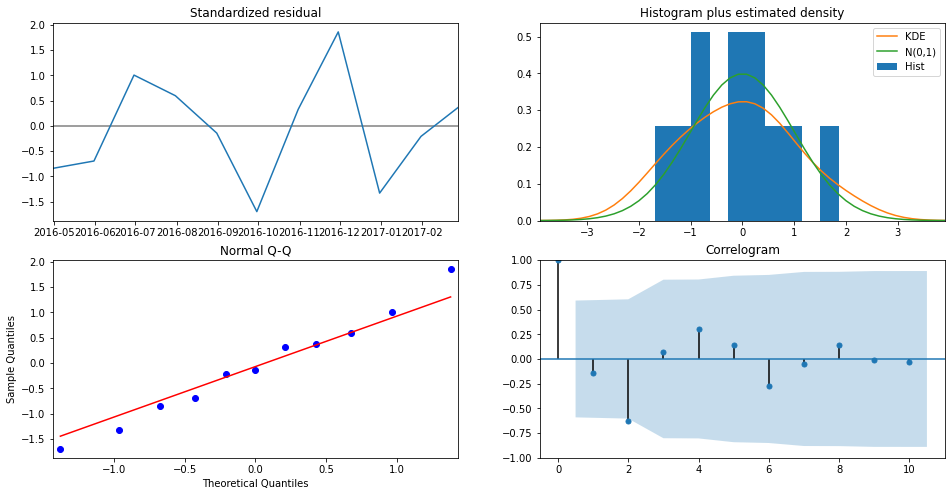

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

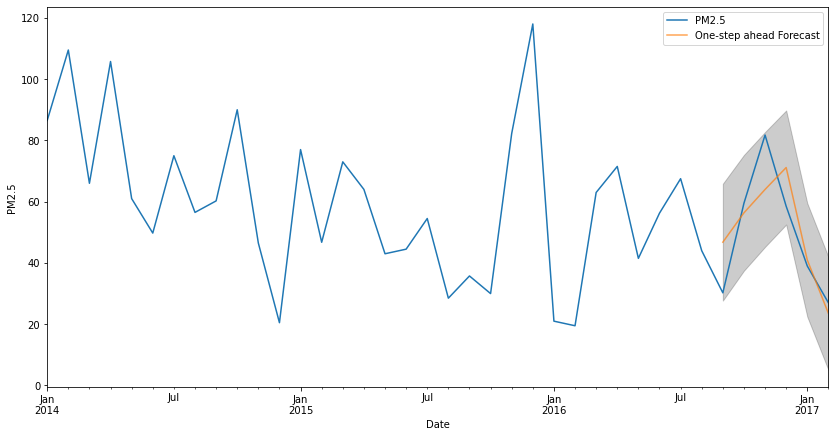

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df3['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
plt.legend()
plt.show()

In [ ]:
df3_forecasted = pred.predicted_mean
df3_truth = df3['2016-09-30':]

mse = ((df3_forecasted - df3_truth['PM2.5']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 11.36


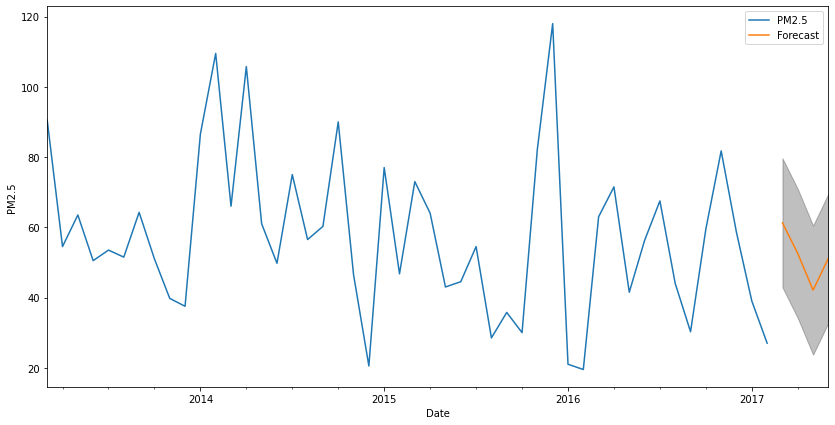

In [ ]:
pred_uc = results.get_forecast(steps=4)
pred_ci = pred_uc.conf_int()
ax = df3.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
plt.legend()
plt.show()

# ARIMA PM2.5

In [ ]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
for param in pdq:
          mod = sm.tsa.statespace.SARIMAX(df3,
                                            order=param,
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
          results = mod.fit()
          print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:521.8945063384338
ARIMA(0, 0, 1) - AIC:473.45770572116703
ARIMA(0, 0, 2) - AIC:457.7081822692088
ARIMA(0, 0, 3) - AIC:441.7097664004128
ARIMA(0, 1, 0) - AIC:443.4986747866592
ARIMA(0, 1, 1) - AIC:416.18744644516045
ARIMA(0, 1, 2) - AIC:407.44451639491086
ARIMA(0, 1, 3) - AIC:397.24931627380005
ARIMA(0, 2, 0) - AIC:476.16005343720394
ARIMA(0, 2, 1) - AIC:431.2278636277509
ARIMA(0, 2, 2) - AIC:407.0267182032911
ARIMA(0, 2, 3) - AIC:397.9209860786948
ARIMA(0, 3, 0) - AIC:513.0308321943189
ARIMA(0, 3, 1) - AIC:461.6580528151959
ARIMA(0, 3, 2) - AIC:420.67876071710555
ARIMA(0, 3, 3) - AIC:401.2559255326451
ARIMA(1, 0, 0) - AIC:451.76156556563427
ARIMA(1, 0, 1) - AIC:425.2879137964087
ARIMA(1, 0, 2) - AIC:416.6759380123052
ARIMA(1, 0, 3) - AIC:405.86360301925555
ARIMA(1, 1, 0) - AIC:442.3222409058425
ARIMA(1, 1, 1) - AIC:417.4233959536735
ARIMA(1, 1, 2) - AIC:404.865857690547
ARIMA(1, 1, 3) - AIC:398.42518755392547
ARIMA(1, 2, 0) - AIC:468.26645914980435
ARIMA(1, 2, 1) -

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3) - AIC:400.93701761442867
ARIMA(2, 2, 0) - AIC:441.0783659628228
ARIMA(2, 2, 1) - AIC:420.6187405110621
ARIMA(2, 2, 2) - AIC:406.1854613905715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3) - AIC:397.5315253958386
ARIMA(2, 3, 0) - AIC:465.28025654590374
ARIMA(2, 3, 1) - AIC:437.9485720587876
ARIMA(2, 3, 2) - AIC:411.6654908318408


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3) - AIC:400.84814478592466
ARIMA(3, 0, 0) - AIC:424.0859561734676
ARIMA(3, 0, 1) - AIC:415.13093984102886
ARIMA(3, 0, 2) - AIC:415.67643175215045
ARIMA(3, 0, 3) - AIC:409.5880250094378
ARIMA(3, 1, 0) - AIC:414.3374365441628
ARIMA(3, 1, 1) - AIC:407.85210747689365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2) - AIC:408.8968707076874
ARIMA(3, 1, 3) - AIC:401.0857288235381
ARIMA(3, 2, 0) - AIC:429.14589179760003
ARIMA(3, 2, 1) - AIC:411.78549467259796
ARIMA(3, 2, 2) - AIC:407.64947040181204
ARIMA(3, 2, 3) - AIC:398.39575538910486
ARIMA(3, 3, 0) - AIC:447.98378481845856
ARIMA(3, 3, 1) - AIC:426.05516347221203
ARIMA(3, 3, 2) - AIC:413.196506200432
ARIMA(3, 3, 3) - AIC:404.92479561422647


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(df3,
                                order=(1,2,3),
                                seasonal_order=(0,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6011      0.150     -4.011      0.000      -0.895      -0.307
ma.L1         -0.9942   2208.077     -0.000      1.000   -4328.746    4326.758
ma.L2         -0.9942   2208.167     -0.000      1.000   -4328.921    4326.933
ma.L3          1.0000      0.301      3.320      0.001       0.410       1.590
sigma2       442.5887      3.006    147.219      0.000     436.696     448.481


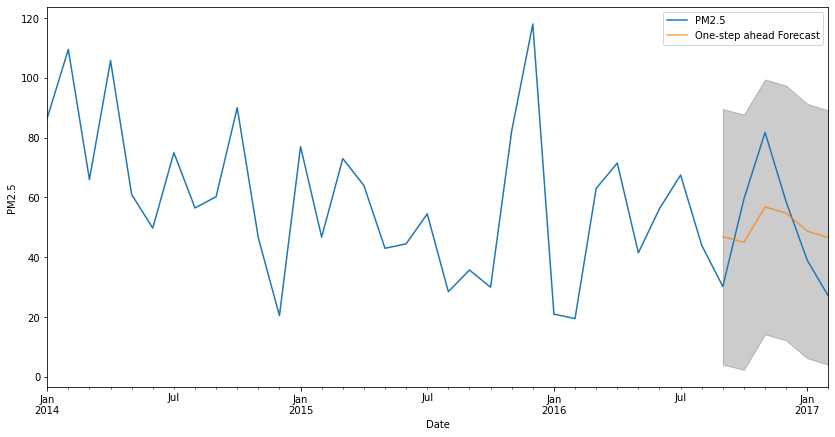

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df3['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
plt.legend()
plt.show()

In [ ]:
df3_forecasted = pred.predicted_mean
df3_truth = df3['2016-09-30':]

mse = ((df3_forecasted - df3_truth['PM2.5']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 16.31


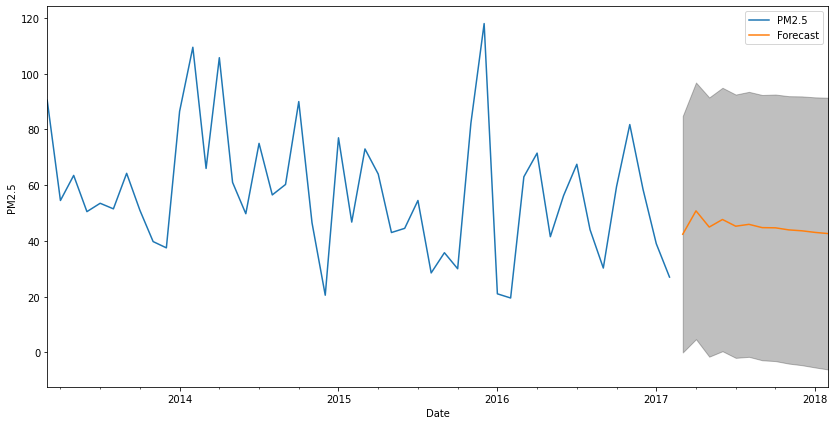

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df3.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('PM2.5')
plt.legend()
plt.show()

# **PM10**

In [ ]:
df = frame[['No','year','month','day','hour','PM10','station']]

In [ ]:
dfpm9 = df.loc[df['station'] == 'Aotizhongxin']

In [ ]:
dfpm9

No  year  month  day  hour  PM10       station
0          1  2013      3    1     0   4.0  Aotizhongxin
1          2  2013      3    1     1   8.0  Aotizhongxin
2          3  2013      3    1     2   7.0  Aotizhongxin
3          4  2013      3    1     3   6.0  Aotizhongxin
4          5  2013      3    1     4   3.0  Aotizhongxin
...      ...   ...    ...  ...   ...   ...           ...
35059  35060  2017      2   28    19  29.0  Aotizhongxin
35060  35061  2017      2   28    20  37.0  Aotizhongxin
35061  35062  2017      2   28    21  37.0  Aotizhongxin
35062  35063  2017      2   28    22  44.0  Aotizhongxin
35063  35064  2017      2   28    23  31.0  Aotizhongxin

[35064 rows x 7 columns]

In [ ]:
dfpm9 = dfpm9.groupby(np.arange(len(dfpm9))//24).median()

In [ ]:
dfpm9['year'] = dfpm9['year'].astype('int')
dfpm9['month'] = dfpm9['month'].astype('int')
dfpm9['day'] = dfpm9['day'].astype('int')

In [ ]:
dfpm9 = dfpm9.drop(['hour'],axis = 1)
dfpm9 = dfpm9.drop(['No'],axis = 1)

In [ ]:
dfpm9

year  month  day   PM10
0     2013      3    1    7.5
1     2013      3    2   29.5
2     2013      3    3  118.0
3     2013      3    4   33.5
4     2013      3    5  179.5
...    ...    ...  ...    ...
1456  2017      2   24   29.0
1457  2017      2   25   18.5
1458  2017      2   26   39.0
1459  2017      2   27   92.5
1460  2017      2   28   21.5

[1461 rows x 4 columns]

In [ ]:
df4 = pd.to_datetime(dfpm9[['year','month','day']])

In [ ]:
dfpm9['Date'] = df4

In [ ]:
dfpm9final = dfpm9[['Date','PM10']]

In [ ]:
dfpm9final

Date   PM10
0    2013-03-01    7.5
1    2013-03-02   29.5
2    2013-03-03  118.0
3    2013-03-04   33.5
4    2013-03-05  179.5
...         ...    ...
1456 2017-02-24   29.0
1457 2017-02-25   18.5
1458 2017-02-26   39.0
1459 2017-02-27   92.5
1460 2017-02-28   21.5

[1461 rows x 2 columns]

In [ ]:
df4 = dfpm9final.set_index('Date').resample('M').median()

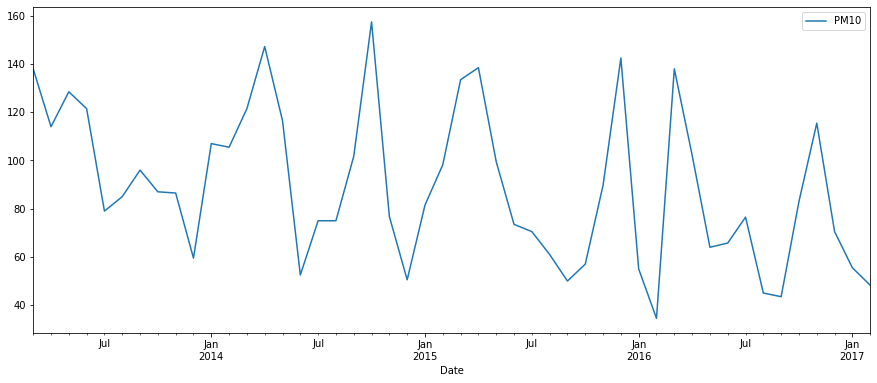

In [ ]:
df4.plot(figsize=(15, 6))
plt.show()

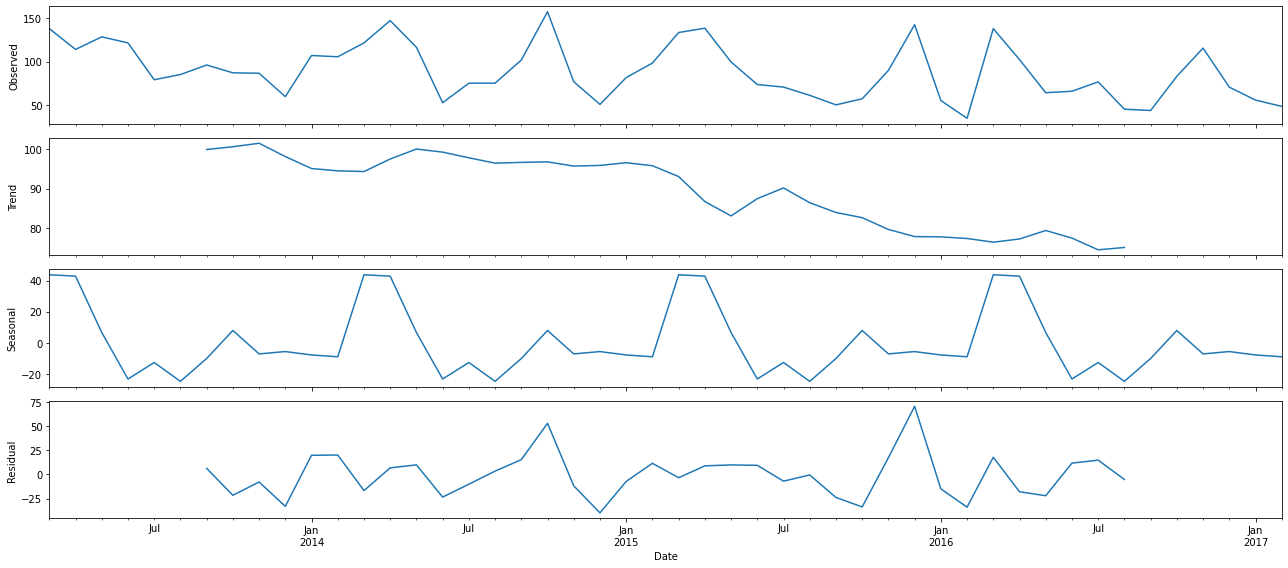

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df4, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df4,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:561.8083213098927
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1649.2606800491444
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:354.9125227404003
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:262.2075975387295
ARIMA(0, 0, 0)x(0, 3, 0, 12)12 - AIC:141.0167372572276


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:360.7732434884073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1435.1125184057823
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:242.8963341858402
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:124.53442709916608
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:238.66345255789145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:1065.6811840564287
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:116.51748253447658
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:113.53590123176745
ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:477.0746922819495
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:503.2929762083129
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3083.5883724804944
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:344.856084612791
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:250.1653873002249
ARIMA(0, 0, 1)x(0, 3, 0, 12)12 - AIC:128.03501778545225
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:360.8102731780327
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2318.424004643317
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:242.57501238737532
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:122.65613891276924
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:240.09972019499168


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:928.558741079462
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:116.69176626833858
ARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:110.84453609147883


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:421.29884282976485
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:480.0031509608227
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:2474.1287672165226
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:331.8991650823805
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:236.1862333107869
ARIMA(0, 0, 2)x(0, 3, 0, 12)12 - AIC:116.61091925854838
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:353.625385819769
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:2634.941702188232
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:242.1764939284412
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:123.84827391565577
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:228.5279772493825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:1146.4220033651231
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:116.32828506659654
ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:112.37574302142502


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:525.7832031008969
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:464.3594088016682
ARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:2457.301882738953
ARIMA(0, 0, 3)x(0, 1, 0, 12)12 - AIC:322.5321099846757
ARIMA(0, 0, 3)x(0, 2, 0, 12)12 - AIC:225.58628292947714


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:355.4452500245574
ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:2186.6908280514317
ARIMA(0, 0, 3)x(1, 1, 0, 12)12 - AIC:244.04800727482154
ARIMA(0, 0, 3)x(1, 2, 0, 12)12 - AIC:123.61626929357978


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:228.2999797934216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:1098.940573181856
ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC:117.51654346828082
ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:111.39381517109611


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:383.99925643610266
ARIMA(0, 0, 4)x(0, 0, 0, 12)12 - AIC:448.5251510114447
ARIMA(0, 0, 4)x(0, 0, 1, 12)12 - AIC:2512.3307377422666
ARIMA(0, 0, 4)x(0, 1, 0, 12)12 - AIC:314.11372128970044
ARIMA(0, 0, 4)x(0, 2, 0, 12)12 - AIC:215.59120391824263
ARIMA(0, 0, 4)x(1, 0, 0, 12)12 - AIC:355.90109960111334
ARIMA(0, 0, 4)x(1, 0, 1, 12)12 - AIC:2243.442209301058
ARIMA(0, 0, 4)x(1, 1, 0, 12)12 - AIC:241.8829311155847
ARIMA(0, 0, 4)x(1, 2, 0, 12)12 - AIC:125.30880448488935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(2, 0, 0, 12)12 - AIC:226.55950027951212


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(2, 0, 1, 12)12 - AIC:968.4440700783979
ARIMA(0, 0, 4)x(2, 1, 0, 12)12 - AIC:119.51617615971932


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(3, 0, 0, 12)12 - AIC:113.47980306434025


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(3, 0, 1, 12)12 - AIC:493.45741708090407
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:461.8914919039743


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1238.962927135022
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:365.0404522531587
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:263.627994207639
ARIMA(0, 1, 0)x(0, 3, 0, 12)12 - AIC:134.1478958188163
ARIMA(0, 1, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:359.93310805612316
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1343.5397995230792
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:245.7752405609209
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:125.29758583275407
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:238.6070333960533


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:631.6470951438013
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:110.3516355123997
ARIMA(0, 1, 0)x(3, 0, 0, 12)12 - AIC:112.07361588904499


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(3, 0, 1, 12)12 - AIC:431.1214220093899
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:443.6000577333775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1160.3480129108884
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:338.55845903143995
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:245.22601447671244
ARIMA(0, 1, 1)x(0, 3, 0, 12)12 - AIC:120.83846518246469
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:349.7644861001865


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1174.6805897721008
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:234.94598606727402
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:119.86276641866473
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:233.15613219830115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:741.6942056248773
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:106.60605596152068
ARIMA(0, 1, 1)x(3, 0, 0, 12)12 - AIC:106.11716823668137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(3, 0, 1, 12)12 - AIC:376.3333552525797
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:425.64051648894116


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:926.4632028347096
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:327.68761905204536
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:232.30479514937812
ARIMA(0, 1, 2)x(0, 3, 0, 12)12 - AIC:113.81215010560601
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:344.4034032597071


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1227.2515708382784
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:236.09248105774455
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:119.73179226293824
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:230.23462678022793


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:994.3535857485715
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:107.73932358729769
ARIMA(0, 1, 2)x(3, 0, 0, 12)12 - AIC:110.88447454908493


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(3, 0, 1, 12)12 - AIC:507.0825939341765
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:414.8240049187039
ARIMA(0, 1, 3)x(0, 0, 1, 12)12 - AIC:2595.889365920003
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:312.1084132064519
ARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:219.0206313245869


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:341.82304489318165
ARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:1122.5024321540038
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:227.64338309667818
ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:120.91220686249699
ARIMA(0, 1, 3)x(2, 0, 0, 12)12 - AIC:227.40457686194534


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(2, 0, 1, 12)12 - AIC:837.464372146269
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:109.38169785789569
ARIMA(0, 1, 3)x(3, 0, 0, 12)12 - AIC:106.17747649401637


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(3, 0, 1, 12)12 - AIC:516.0187228323658
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:405.3432304940605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(0, 0, 1, 12)12 - AIC:1370.6649010173583
ARIMA(0, 1, 4)x(0, 1, 0, 12)12 - AIC:304.69434001895377
ARIMA(0, 1, 4)x(0, 2, 0, 12)12 - AIC:209.0769388803786
ARIMA(0, 1, 4)x(1, 0, 0, 12)12 - AIC:340.9761881363963


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(1, 0, 1, 12)12 - AIC:1380.3511126234825
ARIMA(0, 1, 4)x(1, 1, 0, 12)12 - AIC:229.3825041200895
ARIMA(0, 1, 4)x(1, 2, 0, 12)12 - AIC:122.45652616795891
ARIMA(0, 1, 4)x(2, 0, 0, 12)12 - AIC:229.6360595424509


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(2, 0, 1, 12)12 - AIC:758.5378796137896
ARIMA(0, 1, 4)x(2, 1, 0, 12)12 - AIC:108.03636299123701
ARIMA(0, 1, 4)x(3, 0, 0, 12)12 - AIC:109.48324961040926


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(3, 0, 1, 12)12 - AIC:458.3137945450369
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:488.2476496100567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1184.2459993175173
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:384.0069326805877
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:269.4463075819835
ARIMA(0, 2, 0)x(0, 3, 0, 12)12 - AIC:128.05696097581793
ARIMA(0, 2, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:376.9495453120846
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1233.478116640405
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:255.9043821137274
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:125.40205908502786
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:246.08810445054394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:668.8427072390845
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:108.1334852246003
ARIMA(0, 2, 0)x(3, 0, 0, 12)12 - AIC:105.43732342900357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(3, 0, 1, 12)12 - AIC:381.01942260128635
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:448.3495475975826
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:2930.9401328826266
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:348.40777588937374
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:244.7637230844105
ARIMA(0, 2, 1)x(0, 3, 0, 12)12 - AIC:112.07057353041282
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:355.2080380252194
ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1982.7993668309139
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:241.3147954412537
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:119.4622844061198
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:234.27833435681924
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:814.7746319442183
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:105.87247737411676
ARIMA(0, 2, 1)x(3, 0, 0, 12)12 - AIC:102.33545530083933
ARIMA(0, 2, 1)x(3, 0, 1, 12)12 - AIC:409.27984264838796
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:429.50826446123466


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:955.2502484862348
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:324.90365645173887
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:228.63287880301908
ARIMA(0, 2, 2)x(0, 3, 0, 12)12 - AIC:100.18641447482833
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:347.89506719167554
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:2804.192461952614
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:234.18439772855845
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:116.93162690731774
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:230.0591963951321
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:2568.776477644617
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:106.84206689751973
ARIMA(0, 2, 2)x(3, 0, 0, 12)12 - AIC:99.26737322044762


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(0, 0, 0, 12)12 - AIC:411.73268751076233


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(0, 0, 1, 12)12 - AIC:1958.3533245508038
ARIMA(0, 2, 3)x(0, 1, 0, 12)12 - AIC:314.56956376089295
ARIMA(0, 2, 3)x(0, 2, 0, 12)12 - AIC:215.4324200621835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(1, 0, 0, 12)12 - AIC:339.53712639967694
ARIMA(0, 2, 3)x(1, 0, 1, 12)12 - AIC:2420.9979820092512
ARIMA(0, 2, 3)x(1, 1, 0, 12)12 - AIC:234.29382308276234


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(1, 2, 0, 12)12 - AIC:118.7277953116193
ARIMA(0, 2, 3)x(2, 0, 0, 12)12 - AIC:226.78254569107216
ARIMA(0, 2, 3)x(2, 0, 1, 12)12 - AIC:602.986024529094
ARIMA(0, 2, 3)x(2, 1, 0, 12)12 - AIC:110.00307811174733
ARIMA(0, 2, 3)x(3, 0, 0, 12)12 - AIC:98.0559030888598
ARIMA(0, 2, 3)x(3, 0, 1, 12)12 - AIC:400.2155812259356
ARIMA(0, 2, 4)x(0, 0, 0, 12)12 - AIC:402.5643234168778
ARIMA(0, 2, 4)x(0, 0, 1, 12)12 - AIC:2190.739785555677


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(0, 1, 0, 12)12 - AIC:300.61076112373263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(0, 2, 0, 12)12 - AIC:203.2163915407137
ARIMA(0, 2, 4)x(1, 0, 0, 12)12 - AIC:337.53094379890166
ARIMA(0, 2, 4)x(1, 0, 1, 12)12 - AIC:2269.7774677137973


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(1, 1, 0, 12)12 - AIC:230.9005981528166
ARIMA(0, 2, 4)x(1, 2, 0, 12)12 - AIC:120.20561954398178
ARIMA(0, 2, 4)x(2, 0, 0, 12)12 - AIC:227.2661499421764


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(2, 0, 1, 12)12 - AIC:636.3641509412306
ARIMA(0, 2, 4)x(2, 1, 0, 12)12 - AIC:108.34193342440936


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(3, 0, 0, 12)12 - AIC:98.46175165927154
ARIMA(0, 2, 4)x(3, 0, 1, 12)12 - AIC:713.3150375455782
ARIMA(0, 3, 0)x(0, 0, 0, 12)12 - AIC:521.114004843837


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(0, 0, 1, 12)12 - AIC:915.2200174947386
ARIMA(0, 3, 0)x(0, 1, 0, 12)12 - AIC:406.22710302848486
ARIMA(0, 3, 0)x(0, 2, 0, 12)12 - AIC:277.21904840944467
ARIMA(0, 3, 0)x(0, 3, 0, 12)12 - AIC:121.52071131474804
ARIMA(0, 3, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 3, 0)x(1, 0, 0, 12)12 - AIC:397.6187445933369
ARIMA(0, 3, 0)x(1, 0, 1, 12)12 - AIC:1011.0669122449041
ARIMA(0, 3, 0)x(1, 1, 0, 12)12 - AIC:266.31241354588576
ARIMA(0, 3, 0)x(1, 2, 0, 12)12 - AIC:123.94974399096789
ARIMA(0, 3, 0)x(2, 0, 0, 12)12 - AIC:255.21009819677738


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(2, 0, 1, 12)12 - AIC:756.58547409618
ARIMA(0, 3, 0)x(2, 1, 0, 12)12 - AIC:105.9529333840072
ARIMA(0, 3, 0)x(3, 0, 0, 12)12 - AIC:98.13830237259356


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(3, 0, 1, 12)12 - AIC:370.35276215233415
ARIMA(0, 3, 1)x(0, 0, 0, 12)12 - AIC:472.7831915146396
ARIMA(0, 3, 1)x(0, 0, 1, 12)12 - AIC:2443.9043553817864
ARIMA(0, 3, 1)x(0, 1, 0, 12)12 - AIC:364.86682574458143
ARIMA(0, 3, 1)x(0, 2, 0, 12)12 - AIC:247.99115610152484
ARIMA(0, 3, 1)x(0, 3, 0, 12)12 - AIC:103.75820534666103
ARIMA(0, 3, 1)x(1, 0, 0, 12)12 - AIC:370.85931701346095
ARIMA(0, 3, 1)x(1, 0, 1, 12)12 - AIC:2008.7224549468328
ARIMA(0, 3, 1)x(1, 1, 0, 12)12 - AIC:250.34667632162393
ARIMA(0, 3, 1)x(1, 2, 0, 12)12 - AIC:118.03385039343829
ARIMA(0, 3, 1)x(2, 0, 0, 12)12 - AIC:241.0463069930664


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(2, 0, 1, 12)12 - AIC:584.8696850840022
ARIMA(0, 3, 1)x(2, 1, 0, 12)12 - AIC:103.09244700545104
ARIMA(0, 3, 1)x(3, 0, 0, 12)12 - AIC:94.26806674643294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(3, 0, 1, 12)12 - AIC:319.7322931708856
ARIMA(0, 3, 2)x(0, 0, 0, 12)12 - AIC:435.95363786970864
ARIMA(0, 3, 2)x(0, 0, 1, 12)12 - AIC:2056.4169162418416
ARIMA(0, 3, 2)x(0, 1, 0, 12)12 - AIC:332.8751396024485
ARIMA(0, 3, 2)x(0, 2, 0, 12)12 - AIC:226.73157491938193
ARIMA(0, 3, 2)x(0, 3, 0, 12)12 - AIC:89.65698768978459
ARIMA(0, 3, 2)x(1, 0, 0, 12)12 - AIC:352.69374223707


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(1, 0, 1, 12)12 - AIC:1934.53329630563
ARIMA(0, 3, 2)x(1, 1, 0, 12)12 - AIC:238.69850639088534
ARIMA(0, 3, 2)x(1, 2, 0, 12)12 - AIC:116.65672629837216
ARIMA(0, 3, 2)x(2, 0, 0, 12)12 - AIC:230.8799476800859


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(2, 1, 0, 12)12 - AIC:99.6601247312716
ARIMA(0, 3, 2)x(3, 0, 0, 12)12 - AIC:92.56059436773587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(3, 0, 1, 12)12 - AIC:358.6682051888869
ARIMA(0, 3, 3)x(0, 0, 0, 12)12 - AIC:421.9104632513928
ARIMA(0, 3, 3)x(0, 0, 1, 12)12 - AIC:2022.1293550302644
ARIMA(0, 3, 3)x(0, 1, 0, 12)12 - AIC:314.6142810444767
ARIMA(0, 3, 3)x(0, 2, 0, 12)12 - AIC:213.4423426926719


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(1, 0, 0, 12)12 - AIC:349.79223737728995
ARIMA(0, 3, 3)x(1, 0, 1, 12)12 - AIC:2079.454833591123


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(1, 1, 0, 12)12 - AIC:231.33994315043597
ARIMA(0, 3, 3)x(1, 2, 0, 12)12 - AIC:114.87415382695943


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 0, 0, 12)12 - AIC:230.2467871290789


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 0, 1, 12)12 - AIC:674.2356019110699
ARIMA(0, 3, 3)x(2, 1, 0, 12)12 - AIC:103.6911129974152
ARIMA(0, 3, 3)x(3, 0, 0, 12)12 - AIC:93.8238237361443
ARIMA(0, 3, 3)x(3, 0, 1, 12)12 - AIC:367.64273460065255


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(0, 0, 0, 12)12 - AIC:403.6600314783286
ARIMA(0, 3, 4)x(0, 0, 1, 12)12 - AIC:2012.644955146985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(0, 1, 0, 12)12 - AIC:302.0890635623327
ARIMA(0, 3, 4)x(0, 2, 0, 12)12 - AIC:198.87698072295126
ARIMA(0, 3, 4)x(1, 0, 0, 12)12 - AIC:340.81257057952433


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 0, 1, 12)12 - AIC:1314.3248656285236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 1, 0, 12)12 - AIC:246.78125333001873


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 2, 0, 12)12 - AIC:117.2512125974868


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(2, 0, 0, 12)12 - AIC:226.57025659439472
ARIMA(0, 3, 4)x(2, 0, 1, 12)12 - AIC:1429.9923697082431
ARIMA(0, 3, 4)x(2, 1, 0, 12)12 - AIC:104.42047135995747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(3, 0, 0, 12)12 - AIC:92.97015790955614
ARIMA(0, 3, 4)x(3, 0, 1, 12)12 - AIC:668.4996760595031
ARIMA(0, 4, 0)x(0, 0, 0, 12)12 - AIC:556.3473743448371


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(0, 0, 1, 12)12 - AIC:1303.3088702848895
ARIMA(0, 4, 0)x(0, 1, 0, 12)12 - AIC:427.37006435902333
ARIMA(0, 4, 0)x(0, 2, 0, 12)12 - AIC:282.40970771421473
ARIMA(0, 4, 0)x(0, 3, 0, 12)12 - AIC:112.18581999133734
ARIMA(0, 4, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 4, 0)x(1, 0, 0, 12)12 - AIC:420.1088509433331


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(1, 0, 1, 12)12 - AIC:1294.5935250806424
ARIMA(0, 4, 0)x(1, 1, 0, 12)12 - AIC:275.64640471329557
ARIMA(0, 4, 0)x(1, 2, 0, 12)12 - AIC:119.49987603749531
ARIMA(0, 4, 0)x(2, 0, 0, 12)12 - AIC:264.35126348221263
ARIMA(0, 4, 0)x(2, 0, 1, 12)12 - AIC:654.3918322598345
ARIMA(0, 4, 0)x(2, 1, 0, 12)12 - AIC:102.00100961137284
ARIMA(0, 4, 0)x(3, 0, 0, 12)12 - AIC:88.3357504031792


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(3, 0, 1, 12)12 - AIC:254.0581536728621
ARIMA(0, 4, 1)x(0, 0, 0, 12)12 - AIC:503.25366119738953
ARIMA(0, 4, 1)x(0, 0, 1, 12)12 - AIC:2286.8718417656873
ARIMA(0, 4, 1)x(0, 1, 0, 12)12 - AIC:384.174199392705
ARIMA(0, 4, 1)x(0, 2, 0, 12)12 - AIC:252.9833658019581
ARIMA(0, 4, 1)x(0, 3, 0, 12)12 - AIC:94.76314669904517
ARIMA(0, 4, 1)x(1, 0, 0, 12)12 - AIC:391.0167694878411


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 4, 1)x(1, 1, 0, 12)12 - AIC:258.9220793868204
ARIMA(0, 4, 1)x(1, 2, 0, 12)12 - AIC:114.82597171884262
ARIMA(0, 4, 1)x(2, 0, 0, 12)12 - AIC:248.4758345602834


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 1)x(2, 0, 1, 12)12 - AIC:808.7694497565241
ARIMA(0, 4, 1)x(2, 1, 0, 12)12 - AIC:99.69705293175994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 1)x(3, 0, 0, 12)12 - AIC:90.70777400392394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 1)x(3, 0, 1, 12)12 - AIC:279.8109275973087
ARIMA(0, 4, 2)x(0, 0, 0, 12)12 - AIC:458.62655380387105
ARIMA(0, 4, 2)x(0, 0, 1, 12)12 - AIC:2077.912996018582
ARIMA(0, 4, 2)x(0, 1, 0, 12)12 - AIC:348.8221186945888
ARIMA(0, 4, 2)x(0, 2, 0, 12)12 - AIC:228.84594417172698


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 4, 2)x(1, 0, 0, 12)12 - AIC:367.0400880541928
ARIMA(0, 4, 2)x(1, 0, 1, 12)12 - AIC:2007.8575924553754
ARIMA(0, 4, 2)x(1, 1, 0, 12)12 - AIC:245.6488138000469
ARIMA(0, 4, 2)x(1, 2, 0, 12)12 - AIC:111.40541262485169
ARIMA(0, 4, 2)x(2, 0, 0, 12)12 - AIC:236.02136553239808
ARIMA(0, 4, 2)x(2, 0, 1, 12)12 - AIC:1428.6065645254153


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(2, 1, 0, 12)12 - AIC:98.14078160491991


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(3, 0, 0, 12)12 - AIC:88.43489622370782


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(3, 0, 1, 12)12 - AIC:302.0256012476728
ARIMA(0, 4, 3)x(0, 0, 0, 12)12 - AIC:425.8388648475187
ARIMA(0, 4, 3)x(0, 0, 1, 12)12 - AIC:2041.223696821852
ARIMA(0, 4, 3)x(0, 1, 0, 12)12 - AIC:320.7507503329343
ARIMA(0, 4, 3)x(0, 2, 0, 12)12 - AIC:210.98413524321808
ARIMA(0, 4, 3)x(1, 0, 0, 12)12 - AIC:351.24077254211414


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(1, 1, 0, 12)12 - AIC:243.1141037904688
ARIMA(0, 4, 3)x(1, 2, 0, 12)12 - AIC:109.78394654537999


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 0, 0, 12)12 - AIC:228.2460594833539


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 0, 1, 12)12 - AIC:546.1622589557073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 1, 0, 12)12 - AIC:103.9613263330317


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(3, 0, 0, 12)12 - AIC:90.28016899253014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(3, 0, 1, 12)12 - AIC:300.8658938975608


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 0, 0, 12)12 - AIC:431.9133673288275
ARIMA(0, 4, 4)x(0, 0, 1, 12)12 - AIC:1947.5505800843657


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 1, 0, 12)12 - AIC:303.8721649549322


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 2, 0, 12)12 - AIC:195.33952817339195


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 0, 0, 12)12 - AIC:355.5733135066314
ARIMA(0, 4, 4)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 4, 4)x(1, 1, 0, 12)12 - AIC:250.82832568979617


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 2, 0, 12)12 - AIC:120.23470519295746


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 0, 0, 12)12 - AIC:236.3903081704508


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 0, 1, 12)12 - AIC:1444.5159040473377
ARIMA(0, 4, 4)x(2, 1, 0, 12)12 - AIC:102.84695968470635


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(3, 0, 0, 12)12 - AIC:89.33576415624094


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(3, 0, 1, 12)12 - AIC:567.2957046244503
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:470.55606506811773
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1345.4875215018408
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:356.5924392486933
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:263.96127564807574
ARIMA(1, 0, 0)x(0, 3, 0, 12)12 - AIC:142.81272602473655
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:353.67575648611194


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1108.7308218013904
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:235.32895146928828
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:116.32321412892578
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:231.16978014997082


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:839.8874613499295
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:109.28670243043607
ARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:105.1707814489819


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:407.2539245044988
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:450.62960225316715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1339.4347354891922
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:343.92549957625664
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:250.73202002473784
ARIMA(1, 0, 1)x(0, 3, 0, 12)12 - AIC:133.04156942113895
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:352.2605222743338


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1109.491422194643
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:233.880759535023
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:115.07328068882443
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:224.95466589164315


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:858.7336129279716
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:108.53668076982052
ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:105.42534413368955


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:417.6364965756374
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:433.3551614907565


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1517.701238484862
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:333.8715942920272
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:237.63727027780726
ARIMA(1, 0, 2)x(0, 3, 0, 12)12 - AIC:118.05390212333309
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:343.77848446046016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1330.1446004003121
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:235.18042059599222
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:116.5664868253368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:221.34145944683223
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:912.6001964376451
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:109.06608430783356


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:105.67715701263828
ARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:444.1518012630394
ARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:423.49176277252593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:1441.9121069124612
ARIMA(1, 0, 3)x(0, 1, 0, 12)12 - AIC:321.9309358822608
ARIMA(1, 0, 3)x(0, 2, 0, 12)12 - AIC:224.92124896790978


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:336.3948065672353


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:1152.9483703241417
ARIMA(1, 0, 3)x(1, 1, 0, 12)12 - AIC:229.6966601019408


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(1, 2, 0, 12)12 - AIC:116.23936149756975


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:220.41366850282787


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:865.2997763853203


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(2, 1, 0, 12)12 - AIC:109.45012518782471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:105.99953503343262
ARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:446.1518018158696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(0, 0, 0, 12)12 - AIC:414.42212328052864


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(0, 0, 1, 12)12 - AIC:1137.9770448865008
ARIMA(1, 0, 4)x(0, 1, 0, 12)12 - AIC:312.2493525481532
ARIMA(1, 0, 4)x(0, 2, 0, 12)12 - AIC:219.3847622026337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(1, 0, 0, 12)12 - AIC:339.49344193257946
ARIMA(1, 0, 4)x(1, 0, 1, 12)12 - AIC:935.6265727263883
ARIMA(1, 0, 4)x(1, 1, 0, 12)12 - AIC:233.3552102041076


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(1, 2, 0, 12)12 - AIC:117.90797735807007


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:224.39005728906469
ARIMA(1, 0, 4)x(2, 0, 1, 12)12 - AIC:765.672911957518
ARIMA(1, 0, 4)x(2, 1, 0, 12)12 - AIC:112.79861779856164


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(3, 0, 0, 12)12 - AIC:107.81431197154183


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(3, 0, 1, 12)12 - AIC:399.9172160184752
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:463.3833798677253


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1466.8004985870734
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:365.2328117236973
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:265.23727857322314
ARIMA(1, 1, 0)x(0, 3, 0, 12)12 - AIC:136.11083334877952
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:351.805461459988
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1479.4616477646668


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:237.10396596235
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:112.25165721403717
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:231.23955182838694
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:873.9726645420205
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:102.45994876813666
ARIMA(1, 1, 0)x(3, 0, 0, 12)12 - AIC:103.76231650762479


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(3, 0, 1, 12)12 - AIC:376.95672744346723
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:441.58451112170496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1227.0116190560216
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:340.35232705503915
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:246.86725361623272
ARIMA(1, 1, 1)x(0, 3, 0, 12)12 - AIC:122.68719530532825
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:341.25188657584835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1302.3608490061954
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:227.42349297217
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:109.4677370179039
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:225.63532943050905


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:968.6839557627009
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:98.92111894215601
ARIMA(1, 1, 1)x(3, 0, 0, 12)12 - AIC:101.98421785227576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(3, 0, 1, 12)12 - AIC:411.3969343859811
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:426.6541262815704


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1427.608034408
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:326.412105104998
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:232.95809646990304


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 3, 0, 12)12 - AIC:113.608346449121
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:336.0435105193437


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1082.2553104414078
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:226.00869689138244
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:109.50302233179352
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:223.72746289492616
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:877.9726645714982
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:101.13423494296532
ARIMA(1, 1, 2)x(3, 0, 0, 12)12 - AIC:99.24470259262772


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(3, 0, 1, 12)12 - AIC:225.46149836108384
ARIMA(1, 1, 3)x(0, 0, 0, 12)12 - AIC:413.7670731914318
ARIMA(1, 1, 3)x(0, 0, 1, 12)12 - AIC:1198.3135727806286
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:314.00979180246964
ARIMA(1, 1, 3)x(0, 2, 0, 12)12 - AIC:220.54768029828872


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(1, 0, 0, 12)12 - AIC:332.87433066223815
ARIMA(1, 1, 3)x(1, 0, 1, 12)12 - AIC:990.8548770521052
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:220.04775079750084


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(1, 2, 0, 12)12 - AIC:110.85148469562255
ARIMA(1, 1, 3)x(2, 0, 0, 12)12 - AIC:219.30932720317443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(2, 0, 1, 12)12 - AIC:807.4532883730149


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:106.01210954774993
ARIMA(1, 1, 3)x(3, 0, 0, 12)12 - AIC:101.14576288325242
ARIMA(1, 1, 3)x(3, 0, 1, 12)12 - AIC:419.4923146598212
ARIMA(1, 1, 4)x(0, 0, 0, 12)12 - AIC:407.0541159560211


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(0, 0, 1, 12)12 - AIC:1271.256797284633
ARIMA(1, 1, 4)x(0, 1, 0, 12)12 - AIC:304.1697506793452
ARIMA(1, 1, 4)x(0, 2, 0, 12)12 - AIC:211.3614675003978
ARIMA(1, 1, 4)x(1, 0, 0, 12)12 - AIC:333.21982270980277


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(1, 0, 1, 12)12 - AIC:1271.9775600518585
ARIMA(1, 1, 4)x(1, 1, 0, 12)12 - AIC:220.5890854360667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(1, 2, 0, 12)12 - AIC:112.4143531913829
ARIMA(1, 1, 4)x(2, 0, 0, 12)12 - AIC:220.272276418818


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(2, 0, 1, 12)12 - AIC:857.3161901519825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(2, 1, 0, 12)12 - AIC:95.97124946053803
ARIMA(1, 1, 4)x(3, 0, 0, 12)12 - AIC:104.21431306450874
ARIMA(1, 1, 4)x(3, 0, 1, 12)12 - AIC:421.4923143971789
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:485.202355532997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1173.4226287204342
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:380.4931163862603
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:268.80386980852796
ARIMA(1, 2, 0)x(0, 3, 0, 12)12 - AIC:129.29001702521572
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:365.26140632795244


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1208.7303461683987
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:244.28604756716976
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:109.73134127416428
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:236.228639425978
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:816.8630973149351
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:100.66475319802971
ARIMA(1, 2, 0)x(3, 0, 0, 12)12 - AIC:97.4031778462812


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(3, 0, 1, 12)12 - AIC:407.76832929654347
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:450.1319312337904


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:2109.1829431814094
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:348.8159292805059
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:246.44922514845413


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(0, 3, 0, 12)12 - AIC:118.22486346221886
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:346.7777839875897
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1523.4378822527515
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:231.91552340145796
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:106.93337018453866
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:225.38518537015224


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:744.3111171945604
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:97.57798221915647
ARIMA(1, 2, 1)x(3, 0, 0, 12)12 - AIC:93.30187680184699


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(3, 0, 1, 12)12 - AIC:405.6405016628812
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:438.1310492827261
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1177.6322876209872
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:339.53999263339307
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:235.4460775288676
ARIMA(1, 2, 2)x(0, 3, 0, 12)12 - AIC:101.22130964812598
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:344.2172051035729


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1145.8431516539695
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:233.35233817541166
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:106.57053073620575
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:225.5167864646113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:798.7321934741454
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:92.2159308244736


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(3, 0, 0, 12)12 - AIC:91.22664665460427


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(3, 0, 1, 12)12 - AIC:386.6788546741288
ARIMA(1, 2, 3)x(0, 0, 0, 12)12 - AIC:412.3139248497253


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(0, 0, 1, 12)12 - AIC:1166.856569076233
ARIMA(1, 2, 3)x(0, 1, 0, 12)12 - AIC:314.52516545532364
ARIMA(1, 2, 3)x(0, 2, 0, 12)12 - AIC:216.80699374557457


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 2, 3)x(1, 0, 0, 12)12 - AIC:330.3623046784518
ARIMA(1, 2, 3)x(1, 0, 1, 12)12 - AIC:2248.426745720969
ARIMA(1, 2, 3)x(1, 1, 0, 12)12 - AIC:223.57583008804292


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(1, 2, 0, 12)12 - AIC:108.20059303585374
ARIMA(1, 2, 3)x(2, 0, 0, 12)12 - AIC:218.1387057153285
ARIMA(1, 2, 3)x(2, 0, 1, 12)12 - AIC:709.3289979316189
ARIMA(1, 2, 3)x(2, 1, 0, 12)12 - AIC:97.0378840146169


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(3, 0, 0, 12)12 - AIC:90.41631323148503


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(3, 0, 1, 12)12 - AIC:274.19864462039396


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(0, 0, 0, 12)12 - AIC:403.90154397037753
ARIMA(1, 2, 4)x(0, 0, 1, 12)12 - AIC:1484.7263830681716


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(0, 1, 0, 12)12 - AIC:302.2995749633861
ARIMA(1, 2, 4)x(0, 2, 0, 12)12 - AIC:207.59224271825823


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(1, 0, 0, 12)12 - AIC:333.60983945895924
ARIMA(1, 2, 4)x(1, 0, 1, 12)12 - AIC:2333.390557503951
ARIMA(1, 2, 4)x(1, 1, 0, 12)12 - AIC:227.39929081967927
ARIMA(1, 2, 4)x(1, 2, 0, 12)12 - AIC:109.89969126944509
ARIMA(1, 2, 4)x(2, 0, 0, 12)12 - AIC:219.9224305530777
ARIMA(1, 2, 4)x(2, 0, 1, 12)12 - AIC:1720.9419957369473


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(2, 1, 0, 12)12 - AIC:101.01365625308354


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(3, 0, 0, 12)12 - AIC:91.34479323851025
ARIMA(1, 2, 4)x(3, 0, 1, 12)12 - AIC:703.6885401758566
ARIMA(1, 3, 0)x(0, 0, 0, 12)12 - AIC:512.8923695376216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(0, 0, 1, 12)12 - AIC:1256.6164529577914
ARIMA(1, 3, 0)x(0, 1, 0, 12)12 - AIC:398.91426763738286
ARIMA(1, 3, 0)x(0, 2, 0, 12)12 - AIC:274.00227400535863
ARIMA(1, 3, 0)x(0, 3, 0, 12)12 - AIC:122.0963621724776
ARIMA(1, 3, 0)x(1, 0, 0, 12)12 - AIC:382.3579368553314


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(1, 0, 1, 12)12 - AIC:1140.454615105609
ARIMA(1, 3, 0)x(1, 1, 0, 12)12 - AIC:251.7710122163149
ARIMA(1, 3, 0)x(1, 2, 0, 12)12 - AIC:105.15383188289223
ARIMA(1, 3, 0)x(2, 0, 0, 12)12 - AIC:243.17781167182633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(2, 0, 1, 12)12 - AIC:412.6179961891709
ARIMA(1, 3, 0)x(2, 1, 0, 12)12 - AIC:96.49369108774349
ARIMA(1, 3, 0)x(3, 0, 0, 12)12 - AIC:88.79909954778941


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(3, 0, 1, 12)12 - AIC:227.46173868907226
ARIMA(1, 3, 1)x(0, 0, 0, 12)12 - AIC:470.3961137131146
ARIMA(1, 3, 1)x(0, 0, 1, 12)12 - AIC:3854.9168050206313
ARIMA(1, 3, 1)x(0, 1, 0, 12)12 - AIC:361.2076404170871
ARIMA(1, 3, 1)x(0, 2, 0, 12)12 - AIC:247.53212629829932
ARIMA(1, 3, 1)x(0, 3, 0, 12)12 - AIC:105.21365568650931
ARIMA(1, 3, 1)x(1, 0, 0, 12)12 - AIC:359.353813505986
ARIMA(1, 3, 1)x(1, 0, 1, 12)12 - AIC:2389.266179862618
ARIMA(1, 3, 1)x(1, 1, 0, 12)12 - AIC:238.33930371008574
ARIMA(1, 3, 1)x(1, 2, 0, 12)12 - AIC:103.6296624888966
ARIMA(1, 3, 1)x(2, 0, 0, 12)12 - AIC:231.15289133215938


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 1)x(2, 0, 1, 12)12 - AIC:767.2902778351928
ARIMA(1, 3, 1)x(2, 1, 0, 12)12 - AIC:94.19693545761238
ARIMA(1, 3, 1)x(3, 0, 0, 12)12 - AIC:85.86004311920087
ARIMA(1, 3, 1)x(3, 0, 1, 12)12 - AIC:334.62529459714983
ARIMA(1, 3, 2)x(0, 0, 0, 12)12 - AIC:464.0522551511887
ARIMA(1, 3, 2)x(0, 0, 1, 12)12 - AIC:2121.0982082810533
ARIMA(1, 3, 2)x(0, 1, 0, 12)12 - AIC:333.8978416731394
ARIMA(1, 3, 2)x(0, 2, 0, 12)12 - AIC:228.6576821733023
ARIMA(1, 3, 2)x(0, 3, 0, 12)12 - AIC:290320663.40786403
ARIMA(1, 3, 2)x(1, 0, 0, 12)12 - AIC:362.18283377225106
ARIMA(1, 3, 2)x(1, 0, 1, 12)12 - AIC:2097.9854007373992
ARIMA(1, 3, 2)x(1, 1, 0, 12)12 - AIC:229.53926467604293
ARIMA(1, 3, 2)x(1, 2, 0, 12)12 - AIC:103.53971439725554
ARIMA(1, 3, 2)x(2, 0, 0, 12)12 - AIC:233.67112733376362
ARIMA(1, 3, 2)x(2, 0, 1, 12)12 - AIC:1389.5931944400968
ARIMA(1, 3, 2)x(2, 1, 0, 12)12 - AIC:94.91461851023705


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(3, 0, 0, 12)12 - AIC:84.37648432599855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(1, 3, 3)x(0, 0, 0, 12)12 - AIC:425.7636679015616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 3, 3)x(0, 1, 0, 12)12 - AIC:325.5389158278167
ARIMA(1, 3, 3)x(0, 2, 0, 12)12 - AIC:217.50968512880124
ARIMA(1, 3, 3)x(1, 0, 0, 12)12 - AIC:341.0998408217016
ARIMA(1, 3, 3)x(1, 0, 1, 12)12 - AIC:1821.1131983113073
ARIMA(1, 3, 3)x(1, 1, 0, 12)12 - AIC:229.99204605659793
ARIMA(1, 3, 3)x(1, 2, 0, 12)12 - AIC:104.37471402718906
ARIMA(1, 3, 3)x(2, 0, 0, 12)12 - AIC:222.50395434963576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(2, 0, 1, 12)12 - AIC:575.4266456074249


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(2, 1, 0, 12)12 - AIC:85.98821355616428
ARIMA(1, 3, 3)x(3, 0, 0, 12)12 - AIC:85.11517236790269
ARIMA(1, 3, 3)x(3, 0, 1, 12)12 - AIC:330.10528526934405


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(0, 0, 0, 12)12 - AIC:411.91789853679154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(0, 0, 1, 12)12 - AIC:1943.2567745074082


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(0, 1, 0, 12)12 - AIC:302.9372626847236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(0, 2, 0, 12)12 - AIC:200.60806154654992


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 0, 0, 12)12 - AIC:330.5740872513195
ARIMA(1, 3, 4)x(1, 0, 1, 12)12 - AIC:1796.121375598737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 1, 0, 12)12 - AIC:237.60621619436483


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 2, 0, 12)12 - AIC:106.96238183093163


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(2, 0, 0, 12)12 - AIC:222.0423123993596
ARIMA(1, 3, 4)x(2, 0, 1, 12)12 - AIC:1322.9754220948544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(2, 1, 0, 12)12 - AIC:101.11607620109564


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(3, 0, 0, 12)12 - AIC:86.09645916404543


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(1, 4, 0)x(0, 0, 0, 12)12 - AIC:543.1052600593438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(0, 0, 1, 12)12 - AIC:1156.303070149744
ARIMA(1, 4, 0)x(0, 1, 0, 12)12 - AIC:417.0863230770342
ARIMA(1, 4, 0)x(0, 2, 0, 12)12 - AIC:278.65722552427366
ARIMA(1, 4, 0)x(0, 3, 0, 12)12 - AIC:113.27278173182101
ARIMA(1, 4, 0)x(1, 0, 0, 12)12 - AIC:399.49567192806853


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(1, 0, 1, 12)12 - AIC:1050.0429073260798
ARIMA(1, 4, 0)x(1, 1, 0, 12)12 - AIC:258.68949331104204
ARIMA(1, 4, 0)x(1, 2, 0, 12)12 - AIC:96.91210543485542
ARIMA(1, 4, 0)x(2, 0, 0, 12)12 - AIC:249.624565468268


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(2, 0, 1, 12)12 - AIC:503.8336296248704
ARIMA(1, 4, 0)x(2, 1, 0, 12)12 - AIC:91.07527858219281
ARIMA(1, 4, 0)x(3, 0, 0, 12)12 - AIC:79.43849892928023


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(3, 0, 1, 12)12 - AIC:188.15369135981337
ARIMA(1, 4, 1)x(0, 0, 0, 12)12 - AIC:495.4402568316672
ARIMA(1, 4, 1)x(0, 0, 1, 12)12 - AIC:2417.864491953465
ARIMA(1, 4, 1)x(0, 1, 0, 12)12 - AIC:377.47686899540474
ARIMA(1, 4, 1)x(0, 2, 0, 12)12 - AIC:250.90564921115674
ARIMA(1, 4, 1)x(0, 3, 0, 12)12 - AIC:100.01930280562874
ARIMA(1, 4, 1)x(1, 0, 0, 12)12 - AIC:373.71751173636596
ARIMA(1, 4, 1)x(1, 0, 1, 12)12 - AIC:2603.9338127969636
ARIMA(1, 4, 1)x(1, 1, 0, 12)12 - AIC:244.77218417345821
ARIMA(1, 4, 1)x(1, 2, 0, 12)12 - AIC:96.85229343105425
ARIMA(1, 4, 1)x(2, 0, 0, 12)12 - AIC:236.48687081820938


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 1)x(2, 0, 1, 12)12 - AIC:657.7256795155165
ARIMA(1, 4, 1)x(2, 1, 0, 12)12 - AIC:89.4893867031603
ARIMA(1, 4, 1)x(3, 0, 0, 12)12 - AIC:77.83730972048573


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 1)x(3, 0, 1, 12)12 - AIC:205.33067480728937
ARIMA(1, 4, 2)x(0, 0, 0, 12)12 - AIC:456.8547249111852
ARIMA(1, 4, 2)x(0, 0, 1, 12)12 - AIC:2228.3568393426845
ARIMA(1, 4, 2)x(0, 1, 0, 12)12 - AIC:346.57803954652036
ARIMA(1, 4, 2)x(0, 2, 0, 12)12 - AIC:229.40315894817863


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 4, 2)x(1, 0, 0, 12)12 - AIC:352.9863819125228
ARIMA(1, 4, 2)x(1, 0, 1, 12)12 - AIC:2006.9311253855913
ARIMA(1, 4, 2)x(1, 1, 0, 12)12 - AIC:233.84387899228702
ARIMA(1, 4, 2)x(1, 2, 0, 12)12 - AIC:96.9650689160841
ARIMA(1, 4, 2)x(2, 0, 0, 12)12 - AIC:225.374346041722
ARIMA(1, 4, 2)x(2, 0, 1, 12)12 - AIC:1358.1870793042092
ARIMA(1, 4, 2)x(2, 1, 0, 12)12 - AIC:86.64478795659728


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(3, 0, 0, 12)12 - AIC:76.71479507395327


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(1, 4, 3)x(0, 0, 0, 12)12 - AIC:427.7763177511375
ARIMA(1, 4, 3)x(0, 0, 1, 12)12 - AIC:2231.29140250144


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(0, 1, 0, 12)12 - AIC:322.12305264047535


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(0, 2, 0, 12)12 - AIC:212.62308961481133
ARIMA(1, 4, 3)x(1, 0, 0, 12)12 - AIC:355.3803265116034
ARIMA(1, 4, 3)x(1, 0, 1, 12)12 - AIC:2083.0733814066625
ARIMA(1, 4, 3)x(1, 1, 0, 12)12 - AIC:237.9160647360598
ARIMA(1, 4, 3)x(1, 2, 0, 12)12 - AIC:97.83088510614728
ARIMA(1, 4, 3)x(2, 0, 0, 12)12 - AIC:227.47548479010214


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(2, 0, 1, 12)12 - AIC:697.2193566594681
ARIMA(1, 4, 3)x(2, 1, 0, 12)12 - AIC:90.28537483436605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(3, 0, 0, 12)12 - AIC:80.1229988551309


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(3, 0, 1, 12)12 - AIC:209.9271683177828


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 0, 0, 12)12 - AIC:419.85962771548316
ARIMA(1, 4, 4)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 1, 0, 12)12 - AIC:330.0214310009089


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 2, 0, 12)12 - AIC:199.312227048256


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 0, 0, 12)12 - AIC:336.5482803108489
ARIMA(1, 4, 4)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 1, 0, 12)12 - AIC:235.70676523904783


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 2, 0, 12)12 - AIC:99.13091777354848


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 0, 0, 12)12 - AIC:221.62014002589854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 1, 0, 12)12 - AIC:99.44213953354438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(3, 0, 0, 12)12 - AIC:77.63258163962277
ARIMA(1, 4, 4)x(3, 0, 1, 12)12 - AIC:497.6790830297426
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:463.23694058604724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1420.6513131629074
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:342.4843735003788
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:246.97146126834008
ARIMA(2, 0, 0)x(0, 3, 0, 12)12 - AIC:128.17600737582435
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:335.82353822113646


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1163.9357940837465
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:225.27866278386577
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:104.31226823729337
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:214.01841730854997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:866.7978795061118
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:100.6250953151639
ARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:93.367812277287
ARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:401.10700734213
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:449.7291875288112


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:2574.882485050788
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:342.63469007407195
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:248.01678051266737
ARIMA(2, 0, 1)x(0, 3, 0, 12)12 - AIC:127.78210328844528


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:337.6580154763089
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:225.30658883257763
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:103.58280095777035


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:210.30870131306895
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:1643.1091999497694
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:102.22685834954125


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:102.61243455447045


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:713.4058202109251
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:433.7958805043926


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1367.7582631479586
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:335.2262502342631
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:238.7124572275253
ARIMA(2, 0, 2)x(0, 3, 0, 12)12 - AIC:118.42776281585923
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:335.4881055846888


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1125.8584731103285
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:224.8527263712352
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:103.32059491391595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:210.3489399441275


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:867.6111763867638


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:97.24526547200966
ARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:92.54343048095113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:402.6461638583552


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:424.1443241608294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:1295.9049253243747
ARIMA(2, 0, 3)x(0, 1, 0, 12)12 - AIC:321.3901632938498
ARIMA(2, 0, 3)x(0, 2, 0, 12)12 - AIC:226.86550587255826


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:332.9667833673073
ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:1064.463584050085


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(1, 1, 0, 12)12 - AIC:222.12250284865385
ARIMA(2, 0, 3)x(1, 2, 0, 12)12 - AIC:104.11626480477454


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:214.5286934446168
ARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:820.1467534982523


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(2, 1, 0, 12)12 - AIC:103.69805733038791


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:94.70361656142876


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:342.8950978951983
ARIMA(2, 0, 4)x(0, 0, 0, 12)12 - AIC:417.70067358804556
ARIMA(2, 0, 4)x(0, 0, 1, 12)12 - AIC:1298.7480534348094


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(0, 1, 0, 12)12 - AIC:315.57640742924553


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(0, 2, 0, 12)12 - AIC:219.62893936826893


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 0, 0, 12)12 - AIC:332.396542910726


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 0, 1, 12)12 - AIC:947.3780780687607
ARIMA(2, 0, 4)x(1, 1, 0, 12)12 - AIC:222.57464860217016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 2, 0, 12)12 - AIC:108.01443678755605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 0, 0, 12)12 - AIC:217.64032301201829


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 0, 1, 12)12 - AIC:862.4880979435572


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 1, 0, 12)12 - AIC:104.41296570268233


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(3, 0, 0, 12)12 - AIC:95.78034025583375


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(3, 0, 1, 12)12 - AIC:332.81234366611307
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:443.16340429987156


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1324.7980172201635
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:342.78426923249674
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:245.32081650760307
ARIMA(2, 1, 0)x(0, 3, 0, 12)12 - AIC:119.39739175111886
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:330.7924251408101
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1308.2003936547792
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:217.53528445626586
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:101.15535971147457
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:211.418495512497
ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:836.7011797901042
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:85.90234812723256
ARIMA(2, 1, 0)x(3, 0, 0, 12)12 - AIC:87.83727744460495
ARIMA(2, 1, 0)x(3, 0, 1, 12)12 - AIC:375.3430829580441
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:437.01726418196887


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1114.892007062104
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:333.8365738218876
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:241.42987925031588
ARIMA(2, 1, 1)x(0, 3, 0, 12)12 - AIC:120.75213273895893
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:323.5012812450985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1132.9342223768851
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:211.60306630741331
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:100.11311922874846
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:208.87548907849504
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:838.7011797901046
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:87.57705126183923
ARIMA(2, 1, 1)x(3, 0, 0, 12)12 - AIC:89.42141217745008
ARIMA(2, 1, 1)x(3, 0, 1, 12)12 - AIC:377.3430829554065
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:427.31794929305266


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1381.9050113156263
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:324.3354759786259
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:231.1085075988066
ARIMA(2, 1, 2)x(0, 3, 0, 12)12 - AIC:107.8001090085798
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:325.4367674065359


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1312.7231613976294
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:211.38807202250982
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:100.99172045509407
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:210.65439835533397
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:840.701179821279
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:86.82467551297441
ARIMA(2, 1, 2)x(3, 0, 0, 12)12 - AIC:88.02323643066336


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(3, 0, 1, 12)12 - AIC:377.0060765159243
ARIMA(2, 1, 3)x(0, 0, 0, 12)12 - AIC:414.8795491018766
ARIMA(2, 1, 3)x(0, 0, 1, 12)12 - AIC:1222.2225632296368
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:313.25961505398914
ARIMA(2, 1, 3)x(0, 2, 0, 12)12 - AIC:221.22514037886583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(1, 0, 0, 12)12 - AIC:324.9517770251224


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(1, 0, 1, 12)12 - AIC:1220.6090904854748
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:211.02208106305417


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(1, 2, 0, 12)12 - AIC:104.20819434054516
ARIMA(2, 1, 3)x(2, 0, 0, 12)12 - AIC:208.27380788823498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(2, 0, 1, 12)12 - AIC:761.4098556258197
ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:86.91780677539342


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(3, 0, 0, 12)12 - AIC:86.33766200988741
ARIMA(2, 1, 3)x(3, 0, 1, 12)12 - AIC:381.3430829734224


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(0, 0, 0, 12)12 - AIC:410.41966886834746
ARIMA(2, 1, 4)x(0, 0, 1, 12)12 - AIC:1185.2476405208624
ARIMA(2, 1, 4)x(0, 1, 0, 12)12 - AIC:305.6608942565411


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(0, 2, 0, 12)12 - AIC:211.35744663123018


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(1, 0, 0, 12)12 - AIC:326.00210846536515
ARIMA(2, 1, 4)x(1, 0, 1, 12)12 - AIC:1198.182176695392
ARIMA(2, 1, 4)x(1, 1, 0, 12)12 - AIC:210.94134859140743


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(1, 2, 0, 12)12 - AIC:105.19166099553198
ARIMA(2, 1, 4)x(2, 0, 0, 12)12 - AIC:213.4180729062725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(2, 0, 1, 12)12 - AIC:554.5394077750942


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(2, 1, 0, 12)12 - AIC:94.01765401541383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(3, 0, 0, 12)12 - AIC:90.496272218937


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(3, 0, 1, 12)12 - AIC:415.392167245291
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:456.66005152260175


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1456.3621124520005
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:352.6597464655653
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:246.34590734572447
ARIMA(2, 2, 0)x(0, 3, 0, 12)12 - AIC:111.13755160456677
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:338.43505894371623


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1393.9107292128997
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:222.04974144443403
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:95.06065415215214
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:212.5330017368459


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:589.3921695516257
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:82.39445039623395
ARIMA(2, 2, 0)x(3, 0, 0, 12)12 - AIC:84.39328932198242


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(3, 0, 1, 12)12 - AIC:242.48099185097604
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:439.88344638461916
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:2829.6033819313284
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:338.347875053938
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:239.35606990394464
ARIMA(2, 2, 1)x(0, 3, 0, 12)12 - AIC:111.28568970463625
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:325.7505273578409
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:2671.6315027999262
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:213.2402603779862
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:93.95260674133571
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:206.0037763977851


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:895.6039200997786
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:82.48097378512648
ARIMA(2, 2, 1)x(3, 0, 0, 12)12 - AIC:79.05948496574935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(3, 0, 1, 12)12 - AIC:329.7749221091299
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:424.02499355064845


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1179.0043785511891
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:322.3475551017246
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:226.71099613083797


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:327.7029930842491
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1158.405652371326
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:210.65433723778136
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:95.26859592068284
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:207.95644180973386


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:686.3548334344871
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:82.0314086688313


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(3, 0, 0, 12)12 - AIC:82.54968037442245


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(3, 0, 1, 12)12 - AIC:368.1841124186609
ARIMA(2, 2, 3)x(0, 0, 0, 12)12 - AIC:413.087678129365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 0, 1, 12)12 - AIC:1104.6076753424543
ARIMA(2, 2, 3)x(0, 1, 0, 12)12 - AIC:313.41643776177693
ARIMA(2, 2, 3)x(0, 2, 0, 12)12 - AIC:216.25881386519515


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(1, 0, 0, 12)12 - AIC:320.18202685316595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(1, 0, 1, 12)12 - AIC:769.4806954019191
ARIMA(2, 2, 3)x(1, 1, 0, 12)12 - AIC:212.0972742661466


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(1, 2, 0, 12)12 - AIC:97.26755194631906
ARIMA(2, 2, 3)x(2, 0, 0, 12)12 - AIC:209.02516584219472


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(2, 0, 1, 12)12 - AIC:752.3067268232788


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(2, 1, 0, 12)12 - AIC:82.64908978375745


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(3, 0, 0, 12)12 - AIC:79.91214169915918


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(3, 0, 1, 12)12 - AIC:323.1732155929334


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(0, 0, 0, 12)12 - AIC:405.5527087799769
ARIMA(2, 2, 4)x(0, 0, 1, 12)12 - AIC:1101.794330061896
ARIMA(2, 2, 4)x(0, 1, 0, 12)12 - AIC:300.7216949262291
ARIMA(2, 2, 4)x(0, 2, 0, 12)12 - AIC:204.78533854769438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(1, 0, 0, 12)12 - AIC:321.9664237960184
ARIMA(2, 2, 4)x(1, 0, 1, 12)12 - AIC:2190.6177499988175
ARIMA(2, 2, 4)x(1, 1, 0, 12)12 - AIC:212.98180364731263
ARIMA(2, 2, 4)x(1, 2, 0, 12)12 - AIC:99.26960428463441


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 0, 0, 12)12 - AIC:209.50068580644592


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 0, 1, 12)12 - AIC:742.3984775570435


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 1, 0, 12)12 - AIC:85.48232318126031


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(3, 0, 0, 12)12 - AIC:88.73933204270983


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(2, 3, 0)x(0, 0, 0, 12)12 - AIC:476.8395052953635
ARIMA(2, 3, 0)x(0, 0, 1, 12)12 - AIC:675.7556087529492
ARIMA(2, 3, 0)x(0, 1, 0, 12)12 - AIC:365.6120913285782
ARIMA(2, 3, 0)x(0, 2, 0, 12)12 - AIC:248.0347703450136
ARIMA(2, 3, 0)x(0, 3, 0, 12)12 - AIC:101.88583453459835
ARIMA(2, 3, 0)x(1, 0, 0, 12)12 - AIC:350.09202890923785
ARIMA(2, 3, 0)x(1, 0, 1, 12)12 - AIC:972.5465754508149
ARIMA(2, 3, 0)x(1, 1, 0, 12)12 - AIC:227.69060935057996
ARIMA(2, 3, 0)x(1, 2, 0, 12)12 - AIC:90.09673947177615
ARIMA(2, 3, 0)x(2, 0, 0, 12)12 - AIC:219.43203836746545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(2, 0, 1, 12)12 - AIC:638.2068936286897
ARIMA(2, 3, 0)x(2, 1, 0, 12)12 - AIC:79.339953160758
ARIMA(2, 3, 0)x(3, 0, 0, 12)12 - AIC:74.42906404257434


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(3, 0, 1, 12)12 - AIC:279.46623243861086
ARIMA(2, 3, 1)x(0, 0, 0, 12)12 - AIC:453.1483963176747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(0, 0, 1, 12)12 - AIC:2194.0635452220463
ARIMA(2, 3, 1)x(0, 1, 0, 12)12 - AIC:347.2941167851445
ARIMA(2, 3, 1)x(0, 2, 0, 12)12 - AIC:239.63944293896841
ARIMA(2, 3, 1)x(0, 3, 0, 12)12 - AIC:101.90538308954626
ARIMA(2, 3, 1)x(1, 0, 0, 12)12 - AIC:333.36877413375095
ARIMA(2, 3, 1)x(1, 0, 1, 12)12 - AIC:2178.213008541136
ARIMA(2, 3, 1)x(1, 1, 0, 12)12 - AIC:216.97008815289368
ARIMA(2, 3, 1)x(1, 2, 0, 12)12 - AIC:89.30500183658049
ARIMA(2, 3, 1)x(2, 0, 0, 12)12 - AIC:208.25529750378675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(2, 0, 1, 12)12 - AIC:516.6654940970433
ARIMA(2, 3, 1)x(2, 1, 0, 12)12 - AIC:78.27354122058432
ARIMA(2, 3, 1)x(3, 0, 0, 12)12 - AIC:73.78052510791645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(3, 0, 1, 12)12 - AIC:273.84035443498465
ARIMA(2, 3, 2)x(0, 0, 0, 12)12 - AIC:429.85931980663827
ARIMA(2, 3, 2)x(0, 0, 1, 12)12 - AIC:2550.467808274029
ARIMA(2, 3, 2)x(0, 1, 0, 12)12 - AIC:325.92280842862726
ARIMA(2, 3, 2)x(0, 2, 0, 12)12 - AIC:223.67365720582075


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 3, 2)x(1, 0, 0, 12)12 - AIC:324.6668108792327
ARIMA(2, 3, 2)x(1, 0, 1, 12)12 - AIC:2311.633392396802


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(1, 1, 0, 12)12 - AIC:210.85040028722156
ARIMA(2, 3, 2)x(1, 2, 0, 12)12 - AIC:90.5530331150586
ARIMA(2, 3, 2)x(2, 0, 0, 12)12 - AIC:205.43753298311393
ARIMA(2, 3, 2)x(2, 0, 1, 12)12 - AIC:599.3768007780479


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(2, 1, 0, 12)12 - AIC:76.15689397117546
ARIMA(2, 3, 2)x(3, 0, 0, 12)12 - AIC:72.57216727036251
ARIMA(2, 3, 2)x(3, 0, 1, 12)12 - AIC:298.547135295846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(0, 0, 0, 12)12 - AIC:417.4452814423894


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(0, 0, 1, 12)12 - AIC:2024.8487483183221


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(0, 1, 0, 12)12 - AIC:312.55986268239224
ARIMA(2, 3, 3)x(0, 2, 0, 12)12 - AIC:212.60966975877813
ARIMA(2, 3, 3)x(1, 0, 0, 12)12 - AIC:326.0477667929709
ARIMA(2, 3, 3)x(1, 0, 1, 12)12 - AIC:2665.6658407394702
ARIMA(2, 3, 3)x(1, 1, 0, 12)12 - AIC:211.15543649893954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(1, 2, 0, 12)12 - AIC:84.91464495988666
ARIMA(2, 3, 3)x(2, 0, 0, 12)12 - AIC:207.46033034903004
ARIMA(2, 3, 3)x(2, 0, 1, 12)12 - AIC:1242.5044401125988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(2, 1, 0, 12)12 - AIC:77.0729894689604


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(3, 0, 0, 12)12 - AIC:71.79522302737398
ARIMA(2, 3, 3)x(3, 0, 1, 12)12 - AIC:523.0229896883492


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(0, 0, 0, 12)12 - AIC:414.54634031077103
ARIMA(2, 3, 4)x(0, 0, 1, 12)12 - AIC:2164.250096638035
ARIMA(2, 3, 4)x(0, 1, 0, 12)12 - AIC:311.74882844371035
ARIMA(2, 3, 4)x(0, 2, 0, 12)12 - AIC:203.82707442656908


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 0, 0, 12)12 - AIC:328.3104902365687
ARIMA(2, 3, 4)x(1, 0, 1, 12)12 - AIC:1756.2498885893226


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 1, 0, 12)12 - AIC:218.48092903423313


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 2, 0, 12)12 - AIC:92.75203415331451


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 0, 0, 12)12 - AIC:209.11738843125661


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 0, 1, 12)12 - AIC:725.6154779394825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 1, 0, 12)12 - AIC:79.38971163193645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(3, 0, 0, 12)12 - AIC:74.4932017253106
ARIMA(2, 3, 4)x(3, 0, 1, 12)12 - AIC:517.2582486864451
ARIMA(2, 4, 0)x(0, 0, 0, 12)12 - AIC:501.8546163277238


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(0, 0, 1, 12)12 - AIC:964.5081662262966
ARIMA(2, 4, 0)x(0, 1, 0, 12)12 - AIC:381.27832260589315
ARIMA(2, 4, 0)x(0, 2, 0, 12)12 - AIC:250.82027696455003
ARIMA(2, 4, 0)x(0, 3, 0, 12)12 - AIC:91.24008491516808
ARIMA(2, 4, 0)x(1, 0, 0, 12)12 - AIC:364.85863411303643


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(1, 0, 1, 12)12 - AIC:881.4053834474472
ARIMA(2, 4, 0)x(1, 1, 0, 12)12 - AIC:233.44431483192832
ARIMA(2, 4, 0)x(1, 2, 0, 12)12 - AIC:84.59724611790898
ARIMA(2, 4, 0)x(2, 0, 0, 12)12 - AIC:227.23513887831072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(2, 0, 1, 12)12 - AIC:678.9729419188994
ARIMA(2, 4, 0)x(2, 1, 0, 12)12 - AIC:75.17979822450299
ARIMA(2, 4, 0)x(3, 0, 0, 12)12 - AIC:64.8200380757425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(3, 0, 1, 12)12 - AIC:216.11332993960724
ARIMA(2, 4, 1)x(0, 0, 0, 12)12 - AIC:472.4909508406979
ARIMA(2, 4, 1)x(0, 0, 1, 12)12 - AIC:2506.9861682828755
ARIMA(2, 4, 1)x(0, 1, 0, 12)12 - AIC:360.34247972580465
ARIMA(2, 4, 1)x(0, 2, 0, 12)12 - AIC:240.8558899494307
ARIMA(2, 4, 1)x(0, 3, 0, 12)12 - AIC:91.34827077849374
ARIMA(2, 4, 1)x(1, 0, 0, 12)12 - AIC:344.04585505337036
ARIMA(2, 4, 1)x(1, 0, 1, 12)12 - AIC:2434.0386493777537
ARIMA(2, 4, 1)x(1, 1, 0, 12)12 - AIC:221.55735575099837
ARIMA(2, 4, 1)x(1, 2, 0, 12)12 - AIC:85.01588131914421
ARIMA(2, 4, 1)x(2, 0, 0, 12)12 - AIC:213.50596820764054


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(2, 0, 1, 12)12 - AIC:660.6374781874415
ARIMA(2, 4, 1)x(2, 1, 0, 12)12 - AIC:73.11957332805687


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(3, 0, 0, 12)12 - AIC:61.57844063021992


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(3, 0, 1, 12)12 - AIC:211.32153483511837
ARIMA(2, 4, 2)x(0, 0, 0, 12)12 - AIC:441.9363187330447
ARIMA(2, 4, 2)x(0, 0, 1, 12)12 - AIC:2128.3015703903543
ARIMA(2, 4, 2)x(0, 1, 0, 12)12 - AIC:334.3608897732918
ARIMA(2, 4, 2)x(0, 2, 0, 12)12 - AIC:222.40065025118156


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 4, 2)x(1, 0, 0, 12)12 - AIC:329.7677479346799
ARIMA(2, 4, 2)x(1, 0, 1, 12)12 - AIC:2111.1914918799766
ARIMA(2, 4, 2)x(1, 1, 0, 12)12 - AIC:212.28234343778365
ARIMA(2, 4, 2)x(1, 2, 0, 12)12 - AIC:85.29766485012698
ARIMA(2, 4, 2)x(2, 0, 0, 12)12 - AIC:203.48324203340934
ARIMA(2, 4, 2)x(2, 0, 1, 12)12 - AIC:1708.619636796399
ARIMA(2, 4, 2)x(2, 1, 0, 12)12 - AIC:71.62241815561347


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(3, 0, 0, 12)12 - AIC:60.52256347428635
ARIMA(2, 4, 2)x(3, 0, 1, 12)12 - AIC:215.43621991936416


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(0, 0, 0, 12)12 - AIC:422.1552174411198
ARIMA(2, 4, 3)x(0, 0, 1, 12)12 - AIC:1982.888332022708


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(0, 1, 0, 12)12 - AIC:315.46789706619734


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(0, 2, 0, 12)12 - AIC:208.18282329766424


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 0, 0, 12)12 - AIC:323.5358492040632
ARIMA(2, 4, 3)x(1, 0, 1, 12)12 - AIC:2144.3565374149107


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 1, 0, 12)12 - AIC:212.31142829501601


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 2, 0, 12)12 - AIC:74.46807112039001


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(2, 0, 0, 12)12 - AIC:204.47656617639427
ARIMA(2, 4, 3)x(2, 0, 1, 12)12 - AIC:1272.0909072367053


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(2, 1, 0, 12)12 - AIC:70.51342257310759


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(3, 0, 0, 12)12 - AIC:76.27993127433326
ARIMA(2, 4, 3)x(3, 0, 1, 12)12 - AIC:438.4058650210857


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 0, 0, 12)12 - AIC:424.1150685711884
ARIMA(2, 4, 4)x(0, 0, 1, 12)12 - AIC:1912.2989609266106


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 1, 0, 12)12 - AIC:321.355259628994
ARIMA(2, 4, 4)x(0, 2, 0, 12)12 - AIC:203.1730802158673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 0, 0, 12)12 - AIC:332.92378344839483
ARIMA(2, 4, 4)x(1, 0, 1, 12)12 - AIC:1847.1857748488637


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 1, 0, 12)12 - AIC:221.29199055201997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 2, 0, 12)12 - AIC:68.26536692836294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 0, 0, 12)12 - AIC:208.8932616094513


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 1, 0, 12)12 - AIC:70.24634597611018


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(3, 0, 0, 12)12 - AIC:77.00552461641
ARIMA(2, 4, 4)x(3, 0, 1, 12)12 - AIC:419.9113958496197
ARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:443.4794278855529


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:1480.5979241636253
ARIMA(3, 0, 0)x(0, 1, 0, 12)12 - AIC:334.4436121626319
ARIMA(3, 0, 0)x(0, 2, 0, 12)12 - AIC:238.836638526441
ARIMA(3, 0, 0)x(0, 3, 0, 12)12 - AIC:118.53060606498735
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:331.00332140665256


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:1193.6463592070947
ARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:215.55558657068178
ARIMA(3, 0, 0)x(1, 2, 0, 12)12 - AIC:94.51054575599723
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:211.54389223739474


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:983.1770634180759
ARIMA(3, 0, 0)x(2, 1, 0, 12)12 - AIC:87.00480341141667
ARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:87.65187873641054


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:308.4687378651823
ARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:434.0590930507001
ARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:1350.796147157081
ARIMA(3, 0, 1)x(0, 1, 0, 12)12 - AIC:335.252691872742
ARIMA(3, 0, 1)x(0, 2, 0, 12)12 - AIC:239.81862623811713
ARIMA(3, 0, 1)x(0, 3, 0, 12)12 - AIC:118.22666636693462
ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:322.3067718921587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:1150.4998495090795
ARIMA(3, 0, 1)x(1, 1, 0, 12)12 - AIC:213.4629814792775
ARIMA(3, 0, 1)x(1, 2, 0, 12)12 - AIC:94.83638519672898


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:204.14569815681676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:781.1760930903027
ARIMA(3, 0, 1)x(2, 1, 0, 12)12 - AIC:88.20154406986016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:88.37726140608368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:340.8113901891613


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:433.67574505458145
ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:3246.2902357641847
ARIMA(3, 0, 2)x(0, 1, 0, 12)12 - AIC:337.17587801261936
ARIMA(3, 0, 2)x(0, 2, 0, 12)12 - AIC:240.50408464605263
ARIMA(3, 0, 2)x(0, 3, 0, 12)12 - AIC:120.05947938138729


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:325.18762028029


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(3, 0, 2)x(1, 1, 0, 12)12 - AIC:215.40819284240064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(1, 2, 0, 12)12 - AIC:96.878952905181
ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:211.23848080589994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:923.4973673994582


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(2, 1, 0, 12)12 - AIC:91.44944220596278


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:92.35003739464494


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:310.0156301827067


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:425.95912249958366


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:728.6408545957054


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 1, 0, 12)12 - AIC:323.3075900773971
ARIMA(3, 0, 3)x(0, 2, 0, 12)12 - AIC:229.47399944804187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:324.6909532336458


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:1125.8297276222042


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 1, 0, 12)12 - AIC:215.31166926613253


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 2, 0, 12)12 - AIC:97.70303415092587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:210.49491329117436


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:699.2742544124687


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 1, 0, 12)12 - AIC:97.67286508644702


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:87.48732214500279


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:341.9090527519959


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 0, 0, 12)12 - AIC:423.0625233665214


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 0, 1, 12)12 - AIC:1224.4793933467226


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 1, 0, 12)12 - AIC:316.45198008987205
ARIMA(3, 0, 4)x(0, 2, 0, 12)12 - AIC:220.180730712112


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 0, 0, 12)12 - AIC:327.90378634876134


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 0, 1, 12)12 - AIC:1277.3292719245017
ARIMA(3, 0, 4)x(1, 1, 0, 12)12 - AIC:212.92915935664115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 2, 0, 12)12 - AIC:99.56193533029818


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 0, 0, 12)12 - AIC:215.79509247135525


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 0, 1, 12)12 - AIC:446.348859348372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 1, 0, 12)12 - AIC:96.95199568342211


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(3, 0, 0, 12)12 - AIC:91.23937117439166


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(3, 0, 1, 12)12 - AIC:374.3060689352124
ARIMA(3, 1, 0)x(0, 0, 0, 12)12 - AIC:435.9928883142231


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(0, 0, 1, 12)12 - AIC:1111.3038669302805
ARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:333.853786165437
ARIMA(3, 1, 0)x(0, 2, 0, 12)12 - AIC:236.1827372673269
ARIMA(3, 1, 0)x(0, 3, 0, 12)12 - AIC:109.40511760083206
ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:321.0125166193294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:1220.1482047637987
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:209.6492686540806
ARIMA(3, 1, 0)x(1, 2, 0, 12)12 - AIC:90.75645619194992
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:204.2384431640496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(2, 0, 1, 12)12 - AIC:708.2980787394582
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:73.49979844180513
ARIMA(3, 1, 0)x(3, 0, 0, 12)12 - AIC:75.4730613897471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(3, 0, 1, 12)12 - AIC:298.04485375171515
ARIMA(3, 1, 1)x(0, 0, 0, 12)12 - AIC:429.0385917114916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(0, 0, 1, 12)12 - AIC:1136.0912445240292
ARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:325.23212711893893
ARIMA(3, 1, 1)x(0, 2, 0, 12)12 - AIC:232.15358312146498
ARIMA(3, 1, 1)x(0, 3, 0, 12)12 - AIC:110.55248944682214
ARIMA(3, 1, 1)x(1, 0, 0, 12)12 - AIC:315.1386028885224


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(1, 0, 1, 12)12 - AIC:1143.2192551077146
ARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:204.578998301352
ARIMA(3, 1, 1)x(1, 2, 0, 12)12 - AIC:90.05315481781403
ARIMA(3, 1, 1)x(2, 0, 0, 12)12 - AIC:200.72375820818434
ARIMA(3, 1, 1)x(2, 0, 1, 12)12 - AIC:801.429695038195
ARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:71.87956335889908
ARIMA(3, 1, 1)x(3, 0, 0, 12)12 - AIC:77.04060843273552
ARIMA(3, 1, 1)x(3, 0, 1, 12)12 - AIC:339.1938515159169
ARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:429.00243460466027
ARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:1173.6124420477477
ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:326.16840968132146
ARIMA(3, 1, 2)x(0, 2, 0, 12)12 - AIC:233.07272324637316


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:315.4895436973507
ARIMA(3, 1, 2)x(1, 0, 1, 12)12 - AIC:1274.8611931870453
ARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:206.20321295347446
ARIMA(3, 1, 2)x(1, 2, 0, 12)12 - AIC:90.22616863003216
ARIMA(3, 1, 2)x(2, 0, 0, 12)12 - AIC:200.99931216866918


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(2, 0, 1, 12)12 - AIC:784.694627732585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:68.42965179453901


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(3, 0, 0, 12)12 - AIC:72.88593324835963


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(3, 0, 1, 12)12 - AIC:359.9969963072456
ARIMA(3, 1, 3)x(0, 0, 0, 12)12 - AIC:415.6150829245625
ARIMA(3, 1, 3)x(0, 0, 1, 12)12 - AIC:1224.2227638601853
ARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:315.1647528626219
ARIMA(3, 1, 3)x(0, 2, 0, 12)12 - AIC:222.56171806117783


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 1, 3)x(1, 0, 0, 12)12 - AIC:316.9790820300899


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(1, 0, 1, 12)12 - AIC:1428.9805947979653


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:203.76656503116274
ARIMA(3, 1, 3)x(1, 2, 0, 12)12 - AIC:91.33088322318349
ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:200.89369447321891


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(2, 0, 1, 12)12 - AIC:844.0682996678971


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:86.33092311068896


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(3, 0, 0, 12)12 - AIC:67.1828857473904
ARIMA(3, 1, 3)x(3, 0, 1, 12)12 - AIC:341.73703467153234


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 0, 0, 12)12 - AIC:411.7176599649489


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 0, 1, 12)12 - AIC:1158.3286083950836


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 1, 0, 12)12 - AIC:310.3171878748213
ARIMA(3, 1, 4)x(0, 2, 0, 12)12 - AIC:212.47820070511767


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 0, 0, 12)12 - AIC:316.94772959422926


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 0, 1, 12)12 - AIC:1250.5976821970153
ARIMA(3, 1, 4)x(1, 1, 0, 12)12 - AIC:204.04968991290215


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 2, 0, 12)12 - AIC:93.79182314533853
ARIMA(3, 1, 4)x(2, 0, 0, 12)12 - AIC:206.248769133695


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 0, 1, 12)12 - AIC:648.6422325185325


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 1, 0, 12)12 - AIC:86.29145094634666


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(3, 0, 0, 12)12 - AIC:76.94415528900467


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(3, 0, 1, 12)12 - AIC:275.6482059053558
ARIMA(3, 2, 0)x(0, 0, 0, 12)12 - AIC:447.4076501213182


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(0, 0, 1, 12)12 - AIC:1186.2787999117122
ARIMA(3, 2, 0)x(0, 1, 0, 12)12 - AIC:341.94286302753574
ARIMA(3, 2, 0)x(0, 2, 0, 12)12 - AIC:236.06577345716704
ARIMA(3, 2, 0)x(0, 3, 0, 12)12 - AIC:100.4125847489282
ARIMA(3, 2, 0)x(1, 0, 0, 12)12 - AIC:329.117981219135


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(1, 0, 1, 12)12 - AIC:1082.4666924457313
ARIMA(3, 2, 0)x(1, 1, 0, 12)12 - AIC:211.92537367302077
ARIMA(3, 2, 0)x(1, 2, 0, 12)12 - AIC:86.10093293939372
ARIMA(3, 2, 0)x(2, 0, 0, 12)12 - AIC:202.70939597074877


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(2, 0, 1, 12)12 - AIC:704.0517287140425
ARIMA(3, 2, 0)x(2, 1, 0, 12)12 - AIC:63.2696345008716


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(3, 0, 0, 12)12 - AIC:61.39834516482959


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(3, 0, 1, 12)12 - AIC:278.2740429652745
ARIMA(3, 2, 1)x(0, 0, 0, 12)12 - AIC:432.2255880214356
ARIMA(3, 2, 1)x(0, 0, 1, 12)12 - AIC:1704.3133636436105
ARIMA(3, 2, 1)x(0, 1, 0, 12)12 - AIC:329.27231368677946
ARIMA(3, 2, 1)x(0, 2, 0, 12)12 - AIC:229.6666940483218
ARIMA(3, 2, 1)x(0, 3, 0, 12)12 - AIC:100.32174471113147
ARIMA(3, 2, 1)x(1, 0, 0, 12)12 - AIC:318.0508480401616
ARIMA(3, 2, 1)x(1, 0, 1, 12)12 - AIC:2750.95331846257
ARIMA(3, 2, 1)x(1, 1, 0, 12)12 - AIC:205.03924356742155
ARIMA(3, 2, 1)x(1, 2, 0, 12)12 - AIC:85.83506327191607
ARIMA(3, 2, 1)x(2, 0, 0, 12)12 - AIC:199.13650944382044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(2, 0, 1, 12)12 - AIC:853.5259769509137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(2, 1, 0, 12)12 - AIC:60.357027398780545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(3, 0, 0, 12)12 - AIC:73.34994597661843


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(3, 0, 1, 12)12 - AIC:334.6114572810087
ARIMA(3, 2, 2)x(0, 0, 0, 12)12 - AIC:425.24553251742185


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(0, 0, 1, 12)12 - AIC:1035.2933694234412
ARIMA(3, 2, 2)x(0, 1, 0, 12)12 - AIC:331.6344791398078
ARIMA(3, 2, 2)x(0, 2, 0, 12)12 - AIC:231.58293848197346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 2, 2)x(1, 0, 0, 12)12 - AIC:319.51389116923434
ARIMA(3, 2, 2)x(1, 0, 1, 12)12 - AIC:1134.9623286170936
ARIMA(3, 2, 2)x(1, 1, 0, 12)12 - AIC:202.69095527995134
ARIMA(3, 2, 2)x(1, 2, 0, 12)12 - AIC:87.12474168099975
ARIMA(3, 2, 2)x(2, 0, 0, 12)12 - AIC:200.61879414218


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(2, 0, 1, 12)12 - AIC:549.393394421993


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(2, 1, 0, 12)12 - AIC:66.177617812372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(3, 0, 0, 12)12 - AIC:81.35619900179964


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(3, 0, 1, 12)12 - AIC:292.654492989287
ARIMA(3, 2, 3)x(0, 0, 0, 12)12 - AIC:414.9544048692869
ARIMA(3, 2, 3)x(0, 0, 1, 12)12 - AIC:2523.139159619477
ARIMA(3, 2, 3)x(0, 1, 0, 12)12 - AIC:315.3291043056684
ARIMA(3, 2, 3)x(0, 2, 0, 12)12 - AIC:218.25563405699717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 0, 0, 12)12 - AIC:312.6029567499012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 0, 1, 12)12 - AIC:1999.9115268038279
ARIMA(3, 2, 3)x(1, 1, 0, 12)12 - AIC:204.1795447546943


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 2, 0, 12)12 - AIC:88.50443411976264
ARIMA(3, 2, 3)x(2, 0, 0, 12)12 - AIC:202.57776421439553


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(2, 0, 1, 12)12 - AIC:735.4930782216567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(2, 1, 0, 12)12 - AIC:67.26703330142519


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(3, 0, 0, 12)12 - AIC:79.71754348475532
ARIMA(3, 2, 3)x(3, 0, 1, 12)12 - AIC:273.6412186231994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 0, 0, 12)12 - AIC:405.561499897372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(3, 2, 4)x(0, 1, 0, 12)12 - AIC:304.1218827839628


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 2, 0, 12)12 - AIC:206.7662012117312


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(1, 0, 0, 12)12 - AIC:312.53673158740065
ARIMA(3, 2, 4)x(1, 0, 1, 12)12 - AIC:1024.234270940012
ARIMA(3, 2, 4)x(1, 1, 0, 12)12 - AIC:204.42924636587117


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(1, 2, 0, 12)12 - AIC:90.60406470314581


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 0, 0, 12)12 - AIC:202.09593338839431


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 0, 1, 12)12 - AIC:691.8878366654011


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 1, 0, 12)12 - AIC:66.61749019531558


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(3, 0, 0, 12)12 - AIC:84.47215748146556


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(3, 0, 1, 12)12 - AIC:329.0347688346332
ARIMA(3, 3, 0)x(0, 0, 0, 12)12 - AIC:463.15890614295125


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(0, 0, 1, 12)12 - AIC:1147.8897514054893
ARIMA(3, 3, 0)x(0, 1, 0, 12)12 - AIC:352.18058381533865
ARIMA(3, 3, 0)x(0, 2, 0, 12)12 - AIC:236.4464570386272
ARIMA(3, 3, 0)x(0, 3, 0, 12)12 - AIC:90.47921235485185
ARIMA(3, 3, 0)x(1, 0, 0, 12)12 - AIC:338.7043875320715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(1, 0, 1, 12)12 - AIC:1111.6403811511984
ARIMA(3, 3, 0)x(1, 1, 0, 12)12 - AIC:215.16040058913367
ARIMA(3, 3, 0)x(1, 2, 0, 12)12 - AIC:77.49839311213003
ARIMA(3, 3, 0)x(2, 0, 0, 12)12 - AIC:203.86322882785998


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(2, 0, 1, 12)12 - AIC:703.809118220395


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(2, 1, 0, 12)12 - AIC:50.28519086988354


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(3, 0, 0, 12)12 - AIC:63.22810833784568
ARIMA(3, 3, 0)x(3, 0, 1, 12)12 - AIC:250.3967569160937
ARIMA(3, 3, 1)x(0, 0, 0, 12)12 - AIC:443.36659081948505
ARIMA(3, 3, 1)x(0, 0, 1, 12)12 - AIC:3606.067486569425
ARIMA(3, 3, 1)x(0, 1, 0, 12)12 - AIC:337.04650845762376
ARIMA(3, 3, 1)x(0, 2, 0, 12)12 - AIC:229.26151746832795
ARIMA(3, 3, 1)x(0, 3, 0, 12)12 - AIC:90.64597014363434
ARIMA(3, 3, 1)x(1, 0, 0, 12)12 - AIC:324.6564168220377
ARIMA(3, 3, 1)x(1, 0, 1, 12)12 - AIC:2119.9217440628313
ARIMA(3, 3, 1)x(1, 1, 0, 12)12 - AIC:206.71053301207496
ARIMA(3, 3, 1)x(1, 2, 0, 12)12 - AIC:75.73695032038347
ARIMA(3, 3, 1)x(2, 0, 0, 12)12 - AIC:198.04745597067765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(2, 0, 1, 12)12 - AIC:587.2681450199273


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(2, 1, 0, 12)12 - AIC:46.601400790317825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(3, 0, 0, 12)12 - AIC:73.76045663529767
ARIMA(3, 3, 1)x(3, 0, 1, 12)12 - AIC:258.46897094711323
ARIMA(3, 3, 2)x(0, 0, 0, 12)12 - AIC:431.84296807645705
ARIMA(3, 3, 2)x(0, 0, 1, 12)12 - AIC:1635.1257353400447
ARIMA(3, 3, 2)x(0, 1, 0, 12)12 - AIC:327.71806526975536
ARIMA(3, 3, 2)x(0, 2, 0, 12)12 - AIC:225.67108100128735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 3, 2)x(1, 0, 0, 12)12 - AIC:327.4077069077108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(1, 0, 1, 12)12 - AIC:796.8349708210496
ARIMA(3, 3, 2)x(1, 1, 0, 12)12 - AIC:202.66632878654255


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(1, 2, 0, 12)12 - AIC:67.97972656819036
ARIMA(3, 3, 2)x(2, 0, 0, 12)12 - AIC:196.74015194160393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(2, 0, 1, 12)12 - AIC:603.0563847959011


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(2, 1, 0, 12)12 - AIC:44.67117212733384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(3, 0, 0, 12)12 - AIC:74.57739508045498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(3, 0, 1, 12)12 - AIC:234.09886651985389


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(0, 0, 0, 12)12 - AIC:419.44168584353645
ARIMA(3, 3, 3)x(0, 0, 1, 12)12 - AIC:2039.4168806339285


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(0, 1, 0, 12)12 - AIC:315.33030214556874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(0, 2, 0, 12)12 - AIC:212.97131794484645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 0, 0, 12)12 - AIC:317.58340277448394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 0, 1, 12)12 - AIC:1024.5550726086199


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 1, 0, 12)12 - AIC:205.14462908311643


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 2, 0, 12)12 - AIC:72.18772383255019
ARIMA(3, 3, 3)x(2, 0, 0, 12)12 - AIC:198.70993142676085
ARIMA(3, 3, 3)x(2, 0, 1, 12)12 - AIC:1159.4290754946958


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(2, 1, 0, 12)12 - AIC:65.72710183955108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(3, 0, 0, 12)12 - AIC:73.7585587093397


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(3, 0, 1, 12)12 - AIC:274.6735943303179


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(0, 0, 0, 12)12 - AIC:416.86314813379124
ARIMA(3, 3, 4)x(0, 0, 1, 12)12 - AIC:3559.537355982166
ARIMA(3, 3, 4)x(0, 1, 0, 12)12 - AIC:310.8327459487446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(0, 2, 0, 12)12 - AIC:204.41417179161783


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 0, 0, 12)12 - AIC:320.1206868410805
ARIMA(3, 3, 4)x(1, 0, 1, 12)12 - AIC:1034.0930914033552


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 1, 0, 12)12 - AIC:205.80112425782593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 2, 0, 12)12 - AIC:79.9008210392069


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(2, 0, 0, 12)12 - AIC:201.53938451172706
ARIMA(3, 3, 4)x(2, 0, 1, 12)12 - AIC:586.8554493932111


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(2, 1, 0, 12)12 - AIC:61.31495775212


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(3, 0, 0, 12)12 - AIC:76.70527232528437


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(3, 0, 1, 12)12 - AIC:245.1910036242572
ARIMA(3, 4, 0)x(0, 0, 0, 12)12 - AIC:483.2289395042987


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(0, 0, 1, 12)12 - AIC:1074.37709722039
ARIMA(3, 4, 0)x(0, 1, 0, 12)12 - AIC:363.69874968922045
ARIMA(3, 4, 0)x(0, 2, 0, 12)12 - AIC:235.98760514789515
ARIMA(3, 4, 0)x(0, 3, 0, 12)12 - AIC:78.78173261935311
ARIMA(3, 4, 0)x(1, 0, 0, 12)12 - AIC:350.31272820331327


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(1, 0, 1, 12)12 - AIC:931.5268291512921
ARIMA(3, 4, 0)x(1, 1, 0, 12)12 - AIC:218.63422035135716
ARIMA(3, 4, 0)x(1, 2, 0, 12)12 - AIC:64.86352588786445
ARIMA(3, 4, 0)x(2, 0, 0, 12)12 - AIC:207.27829454175327
ARIMA(3, 4, 0)x(2, 0, 1, 12)12 - AIC:645.6654604659528


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(2, 1, 0, 12)12 - AIC:43.81086275411988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(3, 0, 0, 12)12 - AIC:66.24667619946175
ARIMA(3, 4, 0)x(3, 0, 1, 12)12 - AIC:184.94652861750984
ARIMA(3, 4, 1)x(0, 0, 0, 12)12 - AIC:458.90396458238075
ARIMA(3, 4, 1)x(0, 0, 1, 12)12 - AIC:2519.767195594746
ARIMA(3, 4, 1)x(0, 1, 0, 12)12 - AIC:346.77081451727594
ARIMA(3, 4, 1)x(0, 2, 0, 12)12 - AIC:228.64634444061315
ARIMA(3, 4, 1)x(0, 3, 0, 12)12 - AIC:79.12953008675457
ARIMA(3, 4, 1)x(1, 0, 0, 12)12 - AIC:332.0934917049841
ARIMA(3, 4, 1)x(1, 0, 1, 12)12 - AIC:5316.19746533707
ARIMA(3, 4, 1)x(1, 1, 0, 12)12 - AIC:208.92360269279692
ARIMA(3, 4, 1)x(1, 2, 0, 12)12 - AIC:66.64521852428217
ARIMA(3, 4, 1)x(2, 0, 0, 12)12 - AIC:198.88310024483465


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(2, 0, 1, 12)12 - AIC:627.0000583346248


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(2, 1, 0, 12)12 - AIC:59.58541633402466


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(3, 0, 0, 12)12 - AIC:68.58962460523101


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(3, 0, 1, 12)12 - AIC:180.84952357273988
ARIMA(3, 4, 2)x(0, 0, 0, 12)12 - AIC:442.9130069318212
ARIMA(3, 4, 2)x(0, 0, 1, 12)12 - AIC:2399.185347714787
ARIMA(3, 4, 2)x(0, 1, 0, 12)12 - AIC:335.0700278767668
ARIMA(3, 4, 2)x(0, 2, 0, 12)12 - AIC:224.17502791007615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 4, 2)x(1, 0, 0, 12)12 - AIC:321.04010729047803
ARIMA(3, 4, 2)x(1, 0, 1, 12)12 - AIC:2330.94018534743


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(1, 1, 0, 12)12 - AIC:204.51276053704933


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(1, 2, 0, 12)12 - AIC:41.421058805220056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(2, 0, 0, 12)12 - AIC:194.73989110443372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(2, 0, 1, 12)12 - AIC:643.4485001736593
ARIMA(3, 4, 2)x(2, 1, 0, 12)12 - AIC:63.88232859455045


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(3, 0, 0, 12)12 - AIC:68.50743551230781
ARIMA(3, 4, 2)x(3, 0, 1, 12)12 - AIC:188.85570617195748


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(0, 0, 0, 12)12 - AIC:431.9716825687708
ARIMA(3, 4, 3)x(0, 0, 1, 12)12 - AIC:3355.610546549589


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(0, 1, 0, 12)12 - AIC:324.1148079481036
ARIMA(3, 4, 3)x(0, 2, 0, 12)12 - AIC:213.32452880940656
ARIMA(3, 4, 3)x(1, 0, 0, 12)12 - AIC:322.25670337222033
ARIMA(3, 4, 3)x(1, 0, 1, 12)12 - AIC:1887.9353353304607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 1, 0, 12)12 - AIC:201.62411583467374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 2, 0, 12)12 - AIC:70.31251105751952


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 0, 0, 12)12 - AIC:197.11402791543577


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 0, 1, 12)12 - AIC:548.969859603547


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 1, 0, 12)12 - AIC:69.20650194964212


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(3, 0, 0, 12)12 - AIC:69.29895527016956


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(3, 0, 1, 12)12 - AIC:149.30521151864605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 0, 0, 12)12 - AIC:425.9073166778891
ARIMA(3, 4, 4)x(0, 0, 1, 12)12 - AIC:1912.695674432506


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 1, 0, 12)12 - AIC:302.7903117365543


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 2, 0, 12)12 - AIC:193.94398178366046


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 0, 0, 12)12 - AIC:323.5667916324529


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 1, 0, 12)12 - AIC:209.06107702864446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 2, 0, 12)12 - AIC:70.92812280373371


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(2, 0, 0, 12)12 - AIC:198.36892537216895
ARIMA(3, 4, 4)x(2, 0, 1, 12)12 - AIC:1205.9116883455317


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(2, 1, 0, 12)12 - AIC:73.80528522047615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(3, 0, 0, 12)12 - AIC:70.92037449817605
ARIMA(3, 4, 4)x(3, 0, 1, 12)12 - AIC:355.3462640528046
ARIMA(4, 0, 0)x(0, 0, 0, 12)12 - AIC:436.5876672417142


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(0, 0, 1, 12)12 - AIC:1174.2239575327421
ARIMA(4, 0, 0)x(0, 1, 0, 12)12 - AIC:323.7682744957168
ARIMA(4, 0, 0)x(0, 2, 0, 12)12 - AIC:226.29635053462843
ARIMA(4, 0, 0)x(0, 3, 0, 12)12 - AIC:105.73263078698197
ARIMA(4, 0, 0)x(1, 0, 0, 12)12 - AIC:322.14686585959146


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(1, 0, 1, 12)12 - AIC:1115.6842907185392
ARIMA(4, 0, 0)x(1, 1, 0, 12)12 - AIC:208.72525359451555
ARIMA(4, 0, 0)x(1, 2, 0, 12)12 - AIC:87.38562042667519
ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:204.84693202811678


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(2, 0, 1, 12)12 - AIC:718.0592167701967
ARIMA(4, 0, 0)x(2, 1, 0, 12)12 - AIC:71.47011365623791
ARIMA(4, 0, 0)x(3, 0, 0, 12)12 - AIC:68.12687441419367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(3, 0, 1, 12)12 - AIC:296.8866719464869
ARIMA(4, 0, 1)x(0, 0, 0, 12)12 - AIC:438.6287271808606
ARIMA(4, 0, 1)x(0, 0, 1, 12)12 - AIC:3211.7810522319473
ARIMA(4, 0, 1)x(0, 1, 0, 12)12 - AIC:325.3561954557019
ARIMA(4, 0, 1)x(0, 2, 0, 12)12 - AIC:228.14015734289222
ARIMA(4, 0, 1)x(0, 3, 0, 12)12 - AIC:104.752075280808
ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC:324.16920903199775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(4, 0, 1)x(1, 1, 0, 12)12 - AIC:210.68417413099462
ARIMA(4, 0, 1)x(1, 2, 0, 12)12 - AIC:88.15954576734367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(2, 0, 0, 12)12 - AIC:202.1959249454735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(2, 0, 1, 12)12 - AIC:866.7714114278983
ARIMA(4, 0, 1)x(2, 1, 0, 12)12 - AIC:70.99826417336575


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(3, 0, 0, 12)12 - AIC:68.93624605617234


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(3, 0, 1, 12)12 - AIC:358.42847884836374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:429.0352514809271
ARIMA(4, 0, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(4, 0, 2)x(0, 1, 0, 12)12 - AIC:323.0352105989556
ARIMA(4, 0, 2)x(0, 2, 0, 12)12 - AIC:230.12878519577646


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(1, 0, 0, 12)12 - AIC:317.0726764196542
ARIMA(4, 0, 2)x(1, 0, 1, 12)12 - AIC:2302.932104640496
ARIMA(4, 0, 2)x(1, 1, 0, 12)12 - AIC:210.09335363134988
ARIMA(4, 0, 2)x(1, 2, 0, 12)12 - AIC:87.9323038294343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 0, 0, 12)12 - AIC:200.22091020457856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 1, 0, 12)12 - AIC:75.69118949538192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(3, 0, 0, 12)12 - AIC:98.79020196187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(3, 0, 1, 12)12 - AIC:354.67230668520665


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC:427.9657023082422
ARIMA(4, 0, 3)x(0, 0, 1, 12)12 - AIC:1346.4331035376154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 1, 0, 12)12 - AIC:328.9594900022264
ARIMA(4, 0, 3)x(0, 2, 0, 12)12 - AIC:228.75007785595977


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 0, 0, 12)12 - AIC:317.496745488868


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 0, 1, 12)12 - AIC:1102.762450800967


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 1, 0, 12)12 - AIC:207.13414020428323


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 2, 0, 12)12 - AIC:90.75676792098362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 0, 0, 12)12 - AIC:205.95576277123197


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 0, 1, 12)12 - AIC:895.8382516412639


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 1, 0, 12)12 - AIC:89.24787014930033


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(3, 0, 0, 12)12 - AIC:70.94390395072408


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(3, 0, 1, 12)12 - AIC:315.0108710963683


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 0, 0, 12)12 - AIC:422.59814488516895


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 0, 1, 12)12 - AIC:1306.880356555541
ARIMA(4, 0, 4)x(0, 1, 0, 12)12 - AIC:314.94606312520995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 2, 0, 12)12 - AIC:218.33434481691023


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 0, 0, 12)12 - AIC:320.35061820405906


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 0, 1, 12)12 - AIC:1194.6306514046441


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 1, 0, 12)12 - AIC:206.04047047726732


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 2, 0, 12)12 - AIC:96.56761052484939


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:208.34836899589516


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 0, 1, 12)12 - AIC:948.228538800798


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 1, 0, 12)12 - AIC:89.13675705011076


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(3, 0, 0, 12)12 - AIC:87.64709246347
ARIMA(4, 0, 4)x(3, 0, 1, 12)12 - AIC:282.3073472669618
ARIMA(4, 1, 0)x(0, 0, 0, 12)12 - AIC:421.3942100804334


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(0, 0, 1, 12)12 - AIC:1316.7605615190394
ARIMA(4, 1, 0)x(0, 1, 0, 12)12 - AIC:320.90228814513426
ARIMA(4, 1, 0)x(0, 2, 0, 12)12 - AIC:222.29907365000503
ARIMA(4, 1, 0)x(0, 3, 0, 12)12 - AIC:92.64960604803403
ARIMA(4, 1, 0)x(1, 0, 0, 12)12 - AIC:308.48779338452346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(1, 0, 1, 12)12 - AIC:961.9203190757917
ARIMA(4, 1, 0)x(1, 1, 0, 12)12 - AIC:200.10317701005667
ARIMA(4, 1, 0)x(1, 2, 0, 12)12 - AIC:75.51553210539613
ARIMA(4, 1, 0)x(2, 0, 0, 12)12 - AIC:195.95601301903952


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(2, 0, 1, 12)12 - AIC:739.6278657328697
ARIMA(4, 1, 0)x(2, 1, 0, 12)12 - AIC:64.33219311450961
ARIMA(4, 1, 0)x(3, 0, 0, 12)12 - AIC:60.883612553563744


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(3, 0, 1, 12)12 - AIC:296.0106272967975
ARIMA(4, 1, 1)x(0, 0, 0, 12)12 - AIC:415.94769312958095


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(0, 0, 1, 12)12 - AIC:1284.9534619302292
ARIMA(4, 1, 1)x(0, 1, 0, 12)12 - AIC:314.62278193459673
ARIMA(4, 1, 1)x(0, 2, 0, 12)12 - AIC:220.55600506508293
ARIMA(4, 1, 1)x(0, 3, 0, 12)12 - AIC:94.59287052754601
ARIMA(4, 1, 1)x(1, 0, 0, 12)12 - AIC:304.8328065576499


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(1, 0, 1, 12)12 - AIC:1063.0841628424462
ARIMA(4, 1, 1)x(1, 1, 0, 12)12 - AIC:195.46450300151332
ARIMA(4, 1, 1)x(1, 2, 0, 12)12 - AIC:75.53533539264697
ARIMA(4, 1, 1)x(2, 0, 0, 12)12 - AIC:192.2888974497431


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(2, 0, 1, 12)12 - AIC:733.1089444549489


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(2, 1, 0, 12)12 - AIC:69.12188457348928


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(3, 0, 0, 12)12 - AIC:58.00092690080139


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(3, 0, 1, 12)12 - AIC:289.619734108008
ARIMA(4, 1, 2)x(0, 0, 0, 12)12 - AIC:417.73994273856556


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(0, 0, 1, 12)12 - AIC:1094.8777922499644
ARIMA(4, 1, 2)x(0, 1, 0, 12)12 - AIC:316.56186201433826
ARIMA(4, 1, 2)x(0, 2, 0, 12)12 - AIC:222.35262955423713


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 1, 2)x(1, 0, 0, 12)12 - AIC:306.5583901469215
ARIMA(4, 1, 2)x(1, 0, 1, 12)12 - AIC:1153.0332281391934
ARIMA(4, 1, 2)x(1, 1, 0, 12)12 - AIC:193.7614634536463


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(1, 2, 0, 12)12 - AIC:74.7477993295714
ARIMA(4, 1, 2)x(2, 0, 0, 12)12 - AIC:189.10615278914744
ARIMA(4, 1, 2)x(2, 0, 1, 12)12 - AIC:766.1144907508962


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(2, 1, 0, 12)12 - AIC:76.84006778398566


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(3, 0, 0, 12)12 - AIC:59.51172602981121


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(3, 0, 1, 12)12 - AIC:266.3330384323111


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 0, 0, 12)12 - AIC:417.8278566175872


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 0, 1, 12)12 - AIC:1062.4868559117
ARIMA(4, 1, 3)x(0, 1, 0, 12)12 - AIC:314.66618930667613
ARIMA(4, 1, 3)x(0, 2, 0, 12)12 - AIC:224.29938317994691


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 1, 3)x(1, 0, 0, 12)12 - AIC:308.3033205546995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(1, 0, 1, 12)12 - AIC:1200.133400234389


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(1, 1, 0, 12)12 - AIC:195.76536582648293


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(1, 2, 0, 12)12 - AIC:72.76460137229537


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(2, 0, 0, 12)12 - AIC:186.37189210463893
ARIMA(4, 1, 3)x(2, 0, 1, 12)12 - AIC:768.1582102896244


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(2, 1, 0, 12)12 - AIC:74.90456217778296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(3, 0, 0, 12)12 - AIC:67.93309714340333


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(3, 0, 1, 12)12 - AIC:266.20359709853915


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 0, 0, 12)12 - AIC:407.61528718259285
ARIMA(4, 1, 4)x(0, 0, 1, 12)12 - AIC:1189.2476395892515


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 1, 0, 12)12 - AIC:312.213560662305
ARIMA(4, 1, 4)x(0, 2, 0, 12)12 - AIC:212.6516327454841


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 0, 0, 12)12 - AIC:307.3047171497634
ARIMA(4, 1, 4)x(1, 0, 1, 12)12 - AIC:1202.1821760511612
ARIMA(4, 1, 4)x(1, 1, 0, 12)12 - AIC:196.37287077464794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 2, 0, 12)12 - AIC:85.50821055957383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 0, 0, 12)12 - AIC:197.3443806973227


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 0, 1, 12)12 - AIC:753.4518806472855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 1, 0, 12)12 - AIC:81.66965239763599


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(3, 0, 0, 12)12 - AIC:80.6174540435331


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(3, 0, 1, 12)12 - AIC:310.0536656469008
ARIMA(4, 2, 0)x(0, 0, 0, 12)12 - AIC:433.59357791198244


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(0, 0, 1, 12)12 - AIC:1255.1625499430152
ARIMA(4, 2, 0)x(0, 1, 0, 12)12 - AIC:328.54907159917616
ARIMA(4, 2, 0)x(0, 2, 0, 12)12 - AIC:222.45851633435817
ARIMA(4, 2, 0)x(0, 3, 0, 12)12 - AIC:84.46182213407246
ARIMA(4, 2, 0)x(1, 0, 0, 12)12 - AIC:315.83900887371857
ARIMA(4, 2, 0)x(1, 0, 1, 12)12 - AIC:1115.0580008837255
ARIMA(4, 2, 0)x(1, 1, 0, 12)12 - AIC:200.50740760683072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(1, 2, 0, 12)12 - AIC:59.75871301515952
ARIMA(4, 2, 0)x(2, 0, 0, 12)12 - AIC:194.3606318745315


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(2, 0, 1, 12)12 - AIC:736.8196300920952
ARIMA(4, 2, 0)x(2, 1, 0, 12)12 - AIC:50.912988240793496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(3, 0, 0, 12)12 - AIC:41.4861807385384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(3, 0, 1, 12)12 - AIC:246.493855025476
ARIMA(4, 2, 1)x(0, 0, 0, 12)12 - AIC:418.25705465242544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(0, 0, 1, 12)12 - AIC:1213.681565148716
ARIMA(4, 2, 1)x(0, 1, 0, 12)12 - AIC:316.7601500631401
ARIMA(4, 2, 1)x(0, 2, 0, 12)12 - AIC:216.48379287562176
ARIMA(4, 2, 1)x(0, 3, 0, 12)12 - AIC:82.81006692998707
ARIMA(4, 2, 1)x(1, 0, 0, 12)12 - AIC:304.9690370540861


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(1, 0, 1, 12)12 - AIC:1063.5113056742152
ARIMA(4, 2, 1)x(1, 1, 0, 12)12 - AIC:195.6292303462946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(1, 2, 0, 12)12 - AIC:45.80598819273678
ARIMA(4, 2, 1)x(2, 0, 0, 12)12 - AIC:192.0606708349688


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(2, 0, 1, 12)12 - AIC:748.2024184234047


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(2, 1, 0, 12)12 - AIC:62.32148272589275
ARIMA(4, 2, 1)x(3, 0, 0, 12)12 - AIC:64.83851284178715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(3, 0, 1, 12)12 - AIC:241.58297021220687
ARIMA(4, 2, 2)x(0, 0, 0, 12)12 - AIC:413.1136177113594
ARIMA(4, 2, 2)x(0, 0, 1, 12)12 - AIC:1148.9140929741234
ARIMA(4, 2, 2)x(0, 1, 0, 12)12 - AIC:313.77026612570666
ARIMA(4, 2, 2)x(0, 2, 0, 12)12 - AIC:216.35171293052503


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 2, 2)x(1, 0, 0, 12)12 - AIC:300.79758422434594
ARIMA(4, 2, 2)x(1, 0, 1, 12)12 - AIC:2886.283046399549
ARIMA(4, 2, 2)x(1, 1, 0, 12)12 - AIC:193.77688006179972


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(1, 2, 0, 12)12 - AIC:76.64158948621855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(2, 0, 0, 12)12 - AIC:190.95345354102304
ARIMA(4, 2, 2)x(2, 0, 1, 12)12 - AIC:714.4173543744823


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(2, 1, 0, 12)12 - AIC:51.483743455772796


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(3, 0, 0, 12)12 - AIC:71.18967754987327


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(3, 0, 1, 12)12 - AIC:246.9862190819343


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 0, 0, 12)12 - AIC:414.58357639714893
ARIMA(4, 2, 3)x(0, 0, 1, 12)12 - AIC:2268.9031419578505


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 1, 0, 12)12 - AIC:316.04405428272406
ARIMA(4, 2, 3)x(0, 2, 0, 12)12 - AIC:217.13123100328897


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 0, 0, 12)12 - AIC:303.79038032257705
ARIMA(4, 2, 3)x(1, 0, 1, 12)12 - AIC:923.1123019575966


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 1, 0, 12)12 - AIC:199.4763942810821


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 2, 0, 12)12 - AIC:78.66050796444841


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(2, 0, 0, 12)12 - AIC:190.96385125151426
ARIMA(4, 2, 3)x(2, 0, 1, 12)12 - AIC:703.5648755473724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(2, 1, 0, 12)12 - AIC:56.01969333898946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(3, 0, 0, 12)12 - AIC:73.22530858683072
ARIMA(4, 2, 3)x(3, 0, 1, 12)12 - AIC:313.60496543005695


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 0, 0, 12)12 - AIC:408.56059439555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 0, 1, 12)12 - AIC:1205.7904930267448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 1, 0, 12)12 - AIC:303.2798485928987


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 2, 0, 12)12 - AIC:205.97054141240267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 0, 0, 12)12 - AIC:306.3762162008441


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 0, 1, 12)12 - AIC:1152.7623866398658


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 1, 0, 12)12 - AIC:196.2136946248438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 2, 0, 12)12 - AIC:56.38799023402428


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(2, 0, 0, 12)12 - AIC:194.70270822954262


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(2, 0, 1, 12)12 - AIC:664.6345623317468


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(2, 1, 0, 12)12 - AIC:64.28483607446711


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(3, 0, 0, 12)12 - AIC:74.46106910895355


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(3, 0, 1, 12)12 - AIC:254.10199993949033
ARIMA(4, 3, 0)x(0, 0, 0, 12)12 - AIC:447.33646218742024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(0, 0, 1, 12)12 - AIC:1228.6234476762384
ARIMA(4, 3, 0)x(0, 1, 0, 12)12 - AIC:336.6421947258945
ARIMA(4, 3, 0)x(0, 2, 0, 12)12 - AIC:221.87853809190773
ARIMA(4, 3, 0)x(0, 3, 0, 12)12 - AIC:72.19540430521177
ARIMA(4, 3, 0)x(1, 0, 0, 12)12 - AIC:321.15894618523635


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(1, 0, 1, 12)12 - AIC:1085.2602609997002
ARIMA(4, 3, 0)x(1, 1, 0, 12)12 - AIC:200.7169381960397


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(1, 2, 0, 12)12 - AIC:21.222558820320653
ARIMA(4, 3, 0)x(2, 0, 0, 12)12 - AIC:192.71562004329115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(2, 0, 1, 12)12 - AIC:427.4715709712825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(2, 1, 0, 12)12 - AIC:62.84955711017215


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(3, 0, 0, 12)12 - AIC:63.79763878737922


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(3, 0, 1, 12)12 - AIC:209.59305653882126
ARIMA(4, 3, 1)x(0, 0, 0, 12)12 - AIC:430.13652967702734
ARIMA(4, 3, 1)x(0, 0, 1, 12)12 - AIC:5201.25429301536
ARIMA(4, 3, 1)x(0, 1, 0, 12)12 - AIC:323.4863742311719
ARIMA(4, 3, 1)x(0, 2, 0, 12)12 - AIC:214.9528678636141
ARIMA(4, 3, 1)x(0, 3, 0, 12)12 - AIC:71.12152506134143
ARIMA(4, 3, 1)x(1, 0, 0, 12)12 - AIC:308.78011253663044
ARIMA(4, 3, 1)x(1, 0, 1, 12)12 - AIC:2088.1348415659145
ARIMA(4, 3, 1)x(1, 1, 0, 12)12 - AIC:195.29830960545766


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(1, 2, 0, 12)12 - AIC:70.27162067758955
ARIMA(4, 3, 1)x(2, 0, 0, 12)12 - AIC:189.58479196465748


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(2, 0, 1, 12)12 - AIC:565.7159307725808


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(2, 1, 0, 12)12 - AIC:50.10060269733658


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(3, 0, 0, 12)12 - AIC:60.89659689928305


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(3, 0, 1, 12)12 - AIC:215.8876543139176
ARIMA(4, 3, 2)x(0, 0, 0, 12)12 - AIC:419.3285551757716


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 0, 1, 12)12 - AIC:1122.1673555900911
ARIMA(4, 3, 2)x(0, 1, 0, 12)12 - AIC:315.3148830299408
ARIMA(4, 3, 2)x(0, 2, 0, 12)12 - AIC:212.04617910320763


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 0, 0, 12)12 - AIC:301.5011339680025


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 0, 1, 12)12 - AIC:850.8083414325371


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 1, 0, 12)12 - AIC:193.30950644415577


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 2, 0, 12)12 - AIC:68.72874480654663


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(2, 0, 0, 12)12 - AIC:188.92445096613037


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(2, 0, 1, 12)12 - AIC:578.8398896114007


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(2, 1, 0, 12)12 - AIC:66.4397814753479


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(3, 0, 0, 12)12 - AIC:66.75581745685786


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(3, 0, 1, 12)12 - AIC:197.4748400393808


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(0, 0, 0, 12)12 - AIC:422.1532655437196


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(0, 0, 1, 12)12 - AIC:2015.6502172227424
ARIMA(4, 3, 3)x(0, 1, 0, 12)12 - AIC:327.66139294683677


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(0, 2, 0, 12)12 - AIC:211.90869923104222


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 0, 0, 12)12 - AIC:305.54525871118204
ARIMA(4, 3, 3)x(1, 0, 1, 12)12 - AIC:1978.7202531046817
ARIMA(4, 3, 3)x(1, 1, 0, 12)12 - AIC:199.57383502483103


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 2, 0, 12)12 - AIC:72.12542195782548


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(2, 0, 0, 12)12 - AIC:190.9945133723544
ARIMA(4, 3, 3)x(2, 0, 1, 12)12 - AIC:787.1020888532054


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(2, 1, 0, 12)12 - AIC:62.75865963341206


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(3, 0, 0, 12)12 - AIC:67.07313593828385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(3, 0, 1, 12)12 - AIC:219.36476956416263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 0, 0, 12)12 - AIC:416.263835072598
ARIMA(4, 3, 4)x(0, 0, 1, 12)12 - AIC:2156.8048079075543


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 1, 0, 12)12 - AIC:309.69912984697453


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 2, 0, 12)12 - AIC:206.03064358198958


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 0, 0, 12)12 - AIC:307.2649849232453
ARIMA(4, 3, 4)x(1, 0, 1, 12)12 - AIC:2305.0941736993154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 1, 0, 12)12 - AIC:194.50799226455277


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 2, 0, 12)12 - AIC:64.79155508930592


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(2, 0, 0, 12)12 - AIC:192.9272450373567
ARIMA(4, 3, 4)x(2, 0, 1, 12)12 - AIC:1244.8684151920002


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(2, 1, 0, 12)12 - AIC:62.82780976261578


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(3, 0, 0, 12)12 - AIC:47.10301876847126
ARIMA(4, 3, 4)x(3, 0, 1, 12)12 - AIC:479.4066413883193
ARIMA(4, 4, 0)x(0, 0, 0, 12)12 - AIC:463.07122830463095


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(0, 0, 1, 12)12 - AIC:1308.660070084459
ARIMA(4, 4, 0)x(0, 1, 0, 12)12 - AIC:346.76859403866206
ARIMA(4, 4, 0)x(0, 2, 0, 12)12 - AIC:222.01860533218758


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 0)x(1, 0, 0, 12)12 - AIC:329.9621889497444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(1, 0, 1, 12)12 - AIC:837.4246459362018
ARIMA(4, 4, 0)x(1, 1, 0, 12)12 - AIC:201.20817867802532


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(1, 2, 0, 12)12 - AIC:16.840167631935174
ARIMA(4, 4, 0)x(2, 0, 0, 12)12 - AIC:193.0024573237044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(2, 0, 1, 12)12 - AIC:527.8577742499168


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(2, 1, 0, 12)12 - AIC:47.72321306361025


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(3, 0, 0, 12)12 - AIC:56.93904400258441


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(3, 0, 1, 12)12 - AIC:150.54544419474797
ARIMA(4, 4, 1)x(0, 0, 0, 12)12 - AIC:443.1646015907583
ARIMA(4, 4, 1)x(0, 0, 1, 12)12 - AIC:2525.931585148681
ARIMA(4, 4, 1)x(0, 1, 0, 12)12 - AIC:331.5065196877033
ARIMA(4, 4, 1)x(0, 2, 0, 12)12 - AIC:214.73501711663505


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 1)x(1, 0, 0, 12)12 - AIC:316.4886569533344
ARIMA(4, 4, 1)x(1, 0, 1, 12)12 - AIC:1919.5276851353492
ARIMA(4, 4, 1)x(1, 1, 0, 12)12 - AIC:195.02511855294605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(1, 2, 0, 12)12 - AIC:50.46489705567786
ARIMA(4, 4, 1)x(2, 0, 0, 12)12 - AIC:186.87008341928458


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(2, 0, 1, 12)12 - AIC:593.6323008591808


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(2, 1, 0, 12)12 - AIC:57.847674547581605
ARIMA(4, 4, 1)x(3, 0, 0, 12)12 - AIC:56.07427787172492
ARIMA(4, 4, 1)x(3, 0, 1, 12)12 - AIC:149.25228098686995
ARIMA(4, 4, 2)x(0, 0, 0, 12)12 - AIC:430.0975165130102
ARIMA(4, 4, 2)x(0, 0, 1, 12)12 - AIC:2385.285993539604
ARIMA(4, 4, 2)x(0, 1, 0, 12)12 - AIC:321.7707415923798
ARIMA(4, 4, 2)x(0, 2, 0, 12)12 - AIC:210.6571206708424


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 0, 0, 12)12 - AIC:308.31028509134563


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 0, 1, 12)12 - AIC:1884.636452790332


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 1, 0, 12)12 - AIC:192.56278510341758


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 2, 0, 12)12 - AIC:62.176610367663685


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(2, 0, 0, 12)12 - AIC:186.41362858844263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(2, 0, 1, 12)12 - AIC:544.0534905860562


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(2, 1, 0, 12)12 - AIC:48.268951537469995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(3, 0, 0, 12)12 - AIC:49.057172397665724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(3, 0, 1, 12)12 - AIC:138.93293407586
ARIMA(4, 4, 3)x(0, 0, 0, 12)12 - AIC:450.3501982957373
ARIMA(4, 4, 3)x(0, 0, 1, 12)12 - AIC:2380.5585742910657


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 1, 0, 12)12 - AIC:316.59353264123746


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 2, 0, 12)12 - AIC:213.59326358049645
ARIMA(4, 4, 3)x(1, 0, 0, 12)12 - AIC:320.704233322997
ARIMA(4, 4, 3)x(1, 0, 1, 12)12 - AIC:1930.954553961405


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 1, 0, 12)12 - AIC:188.90364036713385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 2, 0, 12)12 - AIC:60.957322116886516


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(2, 0, 0, 12)12 - AIC:193.66774737455438
ARIMA(4, 4, 3)x(2, 0, 1, 12)12 - AIC:1116.3680150654036


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(2, 1, 0, 12)12 - AIC:58.72227742680159


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(3, 0, 0, 12)12 - AIC:57.42541932792463


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(3, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 0, 0, 12)12 - AIC:423.5361044111338
ARIMA(4, 4, 4)x(0, 0, 1, 12)12 - AIC:1994.7494956414187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 1, 0, 12)12 - AIC:310.7506094442709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 2, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 0, 0, 12)12 - AIC:308.6724018402292


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 0, 1, 12)12 - AIC:1838.945607181794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 1, 0, 12)12 - AIC:196.41183802807512


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 2, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 0, 0, 12)12 - AIC:187.5566826573172
ARIMA(4, 4, 4)x(2, 0, 1, 12)12 - AIC:1131.933317092448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 1, 0, 12)12 - AIC:62.86252698049557


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(3, 0, 0, 12)12 - AIC:61.63598109951341
ARIMA(4, 4, 4)x(3, 0, 1, 12)12 - AIC:289.5128012133577


In [ ]:
mod = sm.tsa.statespace.SARIMAX(df4,
                                order=(0,1,4),
                                seasonal_order=(2,1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [ ]:
results = mod.fit()

In [ ]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4104   7737.100   -5.3e-05      1.000   -1.52e+04    1.52e+04
ma.L2         -1.1358      2.143     -0.530      0.596      -5.335       3.063
ma.L3         -0.4108   7735.854  -5.31e-05      1.000   -1.52e+04    1.52e+04
ma.L4          0.9999      1.640      0.610      0.542      -2.215       4.215
ar.S.L12      -0.6923      0.268     -2.584      0.010      -1.217      -0.167
ar.S.L24      -0.5754      0.284     -2.028      0.043      -1.131      -0.019
sigma2       147.8031     15.171      9.742      0.000     118.068     177.538


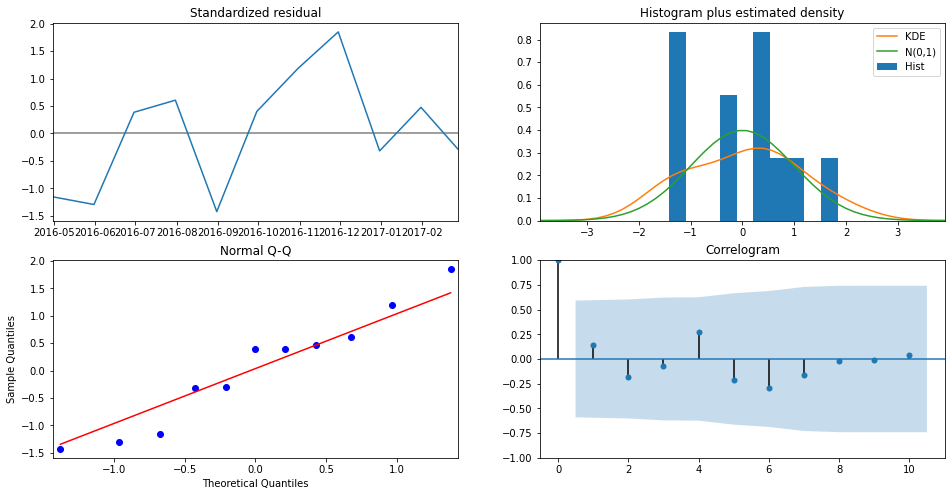

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

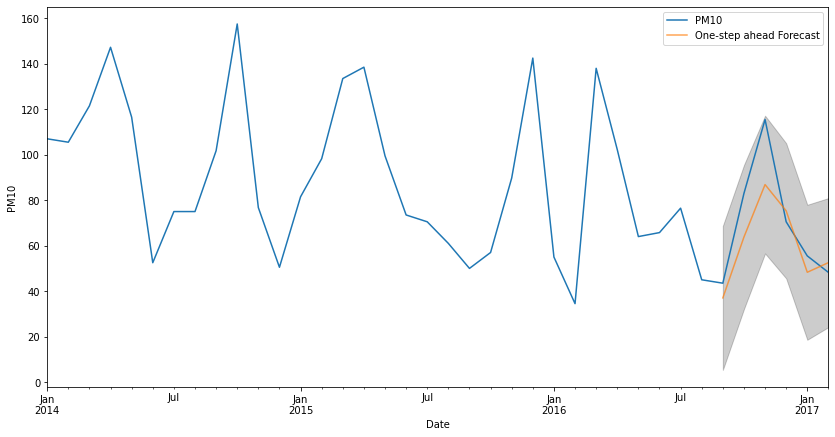

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df4['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PM10')
plt.legend()
plt.show()

In [ ]:
df4_forecasted = pred.predicted_mean
df4_truth = df4['2016-09-30':]

mse = ((df4_forecasted - df4_truth['PM10']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 14.85


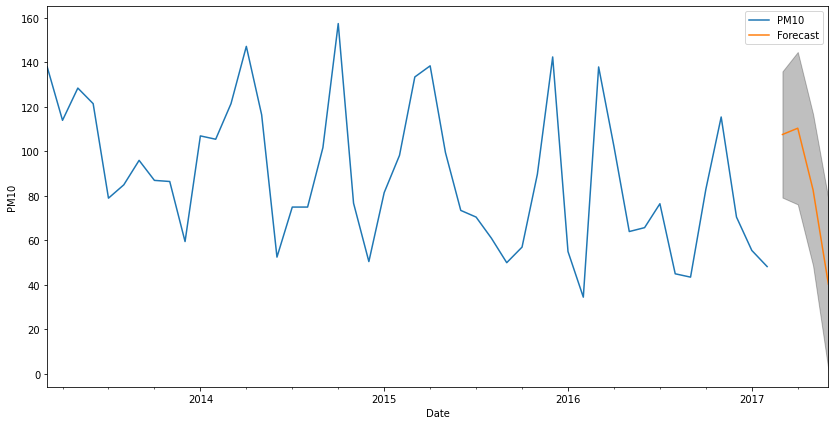

In [ ]:
pred_uc = results.get_forecast(steps=4)
pred_ci = pred_uc.conf_int()
ax = df4.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('PM10')
plt.legend()
plt.show()

# ARIMA

In [ ]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
for param in pdq:
          mod = sm.tsa.statespace.SARIMAX(df4,
                                            order=param,
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
          results = mod.fit()
          print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:561.8083213098927
ARIMA(0, 0, 1) - AIC:503.2929762083129
ARIMA(0, 0, 2) - AIC:480.0031509608227
ARIMA(0, 0, 3) - AIC:464.3594088016682
ARIMA(0, 1, 0) - AIC:461.8914919039743
ARIMA(0, 1, 1) - AIC:443.6000577333775
ARIMA(0, 1, 2) - AIC:425.64051648894116
ARIMA(0, 1, 3) - AIC:414.8240049187039
ARIMA(0, 2, 0) - AIC:488.2476496100567
ARIMA(0, 2, 1) - AIC:448.3495475975826
ARIMA(0, 2, 2) - AIC:429.50826446123466
ARIMA(0, 2, 3) - AIC:411.73268751076233
ARIMA(0, 3, 0) - AIC:521.114004843837
ARIMA(0, 3, 1) - AIC:472.7831915146396
ARIMA(0, 3, 2) - AIC:435.95363786970864
ARIMA(0, 3, 3) - AIC:421.9104632513928
ARIMA(1, 0, 0) - AIC:470.55606506811773
ARIMA(1, 0, 1) - AIC:450.62960225316715
ARIMA(1, 0, 2) - AIC:433.3551614907565
ARIMA(1, 0, 3) - AIC:423.49176277252593
ARIMA(1, 1, 0) - AIC:463.3833798677253
ARIMA(1, 1, 1) - AIC:441.58451112170496
ARIMA(1, 1, 2) - AIC:426.6541262815704
ARIMA(1, 1, 3) - AIC:413.7670731914318
ARIMA(1, 2, 0) - AIC:485.202355532997
ARIMA(1, 2, 1) - AI

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3) - AIC:424.1443241608294
ARIMA(2, 1, 0) - AIC:443.16340429987156
ARIMA(2, 1, 1) - AIC:437.01726418196887
ARIMA(2, 1, 2) - AIC:427.31794929305266
ARIMA(2, 1, 3) - AIC:414.8795491018766
ARIMA(2, 2, 0) - AIC:456.66005152260175
ARIMA(2, 2, 1) - AIC:439.88344638461916
ARIMA(2, 2, 2) - AIC:424.02499355064845
ARIMA(2, 2, 3) - AIC:413.087678129365
ARIMA(2, 3, 0) - AIC:476.8395052953635
ARIMA(2, 3, 1) - AIC:453.1483963176747
ARIMA(2, 3, 2) - AIC:429.85931980663827


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3) - AIC:417.4452814423894
ARIMA(3, 0, 0) - AIC:443.4794278855529
ARIMA(3, 0, 1) - AIC:434.0590930507001


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2) - AIC:433.67574505458145
ARIMA(3, 0, 3) - AIC:425.95912249958366
ARIMA(3, 1, 0) - AIC:435.9928883142231
ARIMA(3, 1, 1) - AIC:429.0385917114916
ARIMA(3, 1, 2) - AIC:429.00243460466027
ARIMA(3, 1, 3) - AIC:415.6150829245625
ARIMA(3, 2, 0) - AIC:447.4076501213182
ARIMA(3, 2, 1) - AIC:432.2255880214356
ARIMA(3, 2, 2) - AIC:425.24553251742185
ARIMA(3, 2, 3) - AIC:414.9544048692869
ARIMA(3, 3, 0) - AIC:463.15890614295125
ARIMA(3, 3, 1) - AIC:443.36659081948505
ARIMA(3, 3, 2) - AIC:431.84296807645705
ARIMA(3, 3, 3) - AIC:419.44168584353645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(df3,
                                order=(0,2,3),
                                seasonal_order=(0,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5858   1008.654     -0.002      0.999   -1978.512    1975.341
ma.L2          0.1898    602.340      0.000      1.000   -1180.376    1180.755
ma.L3          0.4066    411.691      0.001      0.999    -806.492     807.306
sigma2       525.8028   5.32e+05      0.001      0.999   -1.04e+06    1.04e+06


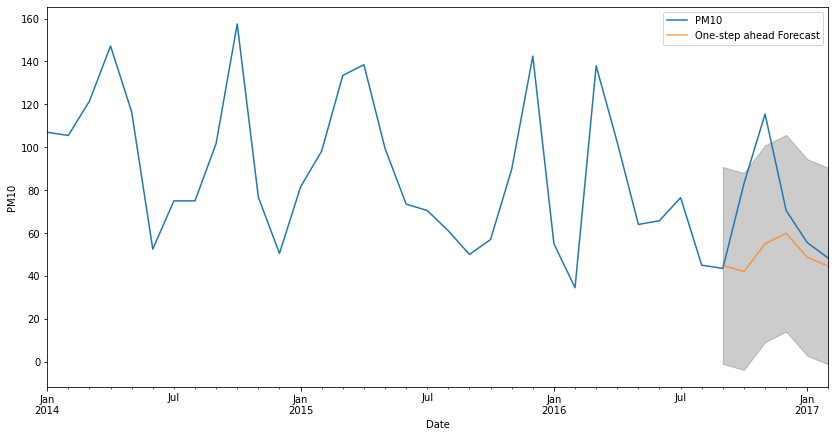

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df4['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PM10')
plt.legend()
plt.show()

In [ ]:
df4_forecasted = pred.predicted_mean
df4_truth = df4['2016-09-30':]

mse = ((df4_forecasted - df4_truth['PM10']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 30.3


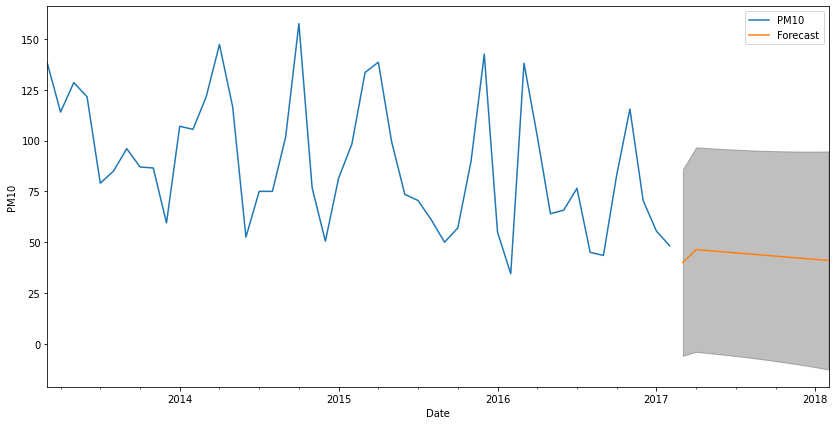

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df4.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('PM10')
plt.legend()
plt.show()

# SO2

In [ ]:
df = frame[['No','year','month','day','hour','SO2','station']]
dfpm2 = df.loc[df['station'] == 'Aotizhongxin']
dfpm2 = dfpm2.groupby(np.arange(len(dfpm2))//24).median()
dfpm2['year'] = dfpm2['year'].astype('int')
dfpm2['month'] = dfpm2['month'].astype('int')
dfpm2['day'] = dfpm2['day'].astype('int')
dfpm2 = dfpm2.drop(['hour'],axis = 1)
dfpm2 = dfpm2.drop(['No'],axis = 1)

In [ ]:
dfpm2

year  month  day   SO2
0     2013      3    1  11.0
1     2013      3    2  28.5
2     2013      3    3  65.5
3     2013      3    4  18.0
4     2013      3    5  94.0
...    ...    ...  ...   ...
1456  2017      2   24  15.5
1457  2017      2   25   5.0
1458  2017      2   26   8.5
1459  2017      2   27  17.0
1460  2017      2   28   7.0

[1461 rows x 4 columns]

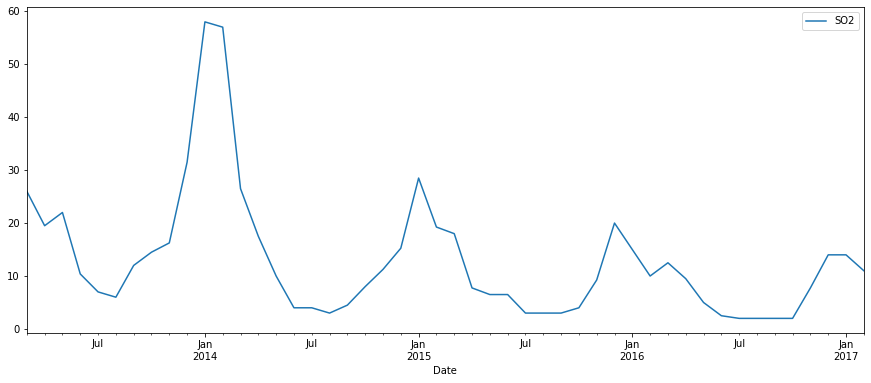

In [ ]:
df5 = pd.to_datetime(dfpm2[['year','month','day']])
dfpm2['Date'] = df5
dfpm2final = dfpm2[['Date','SO2']]
df5 = dfpm2final.set_index('Date').resample('M').median()
df5.plot(figsize=(15, 6))
plt.show()

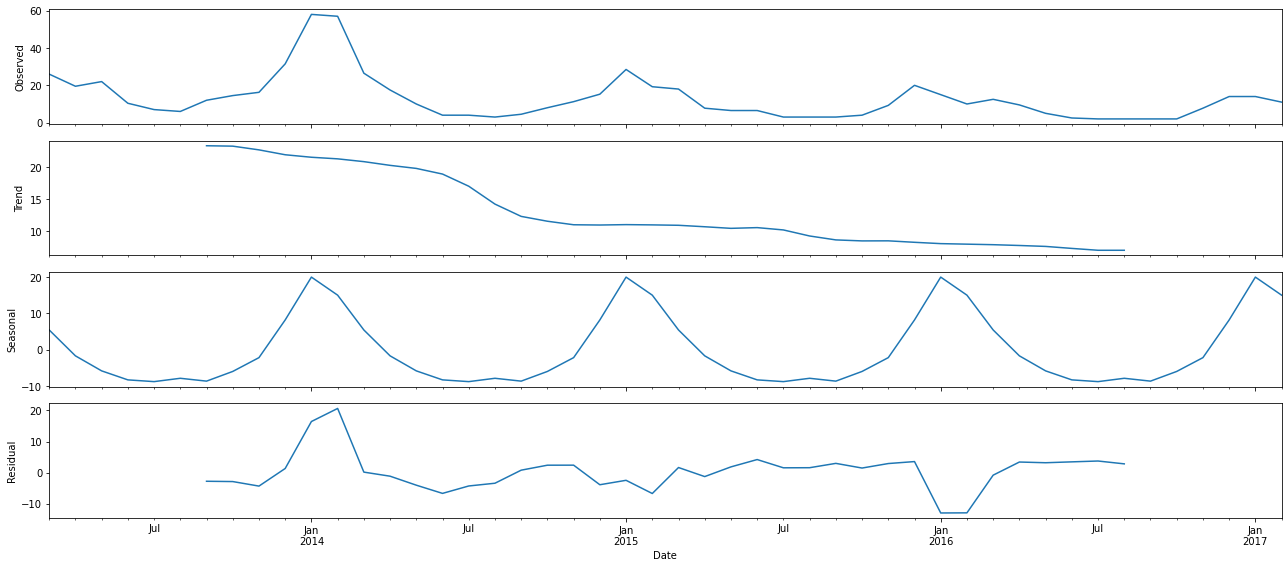

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df5, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df5,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:403.94020374160976
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1206.246906053431
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:262.386120014576
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:173.7310140129985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(0, 3, 0, 12)12 - AIC:90.76857253525858
ARIMA(0, 0, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:211.6331388923207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1000.6745374697128
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:140.83635201130994
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:84.22792858082997
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:126.66034641675881
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:124.50698140614901
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:63.859744991229135
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:44.95543509991502
ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:46.95543519112597
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:351.52720473819113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1429.7377312810618
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:241.51489769200086
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:165.25107455160503
ARIMA(0, 0, 1)x(0, 3, 0, 12)12 - AIC:83.28122708116555
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:210.27600458569685


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1276.9626721057396
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:142.74318021314542
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:86.07678683547267
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:126.032857023291
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:126.48239905391532
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:58.58565209373912
ARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:46.428301693714026
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:322.8922554285606


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:1268.8466207072
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:230.5678803476437
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:156.8775777830202
ARIMA(0, 0, 2)x(0, 3, 0, 12)12 - AIC:76.02138273010996
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:212.0305376117464
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:1147.5194481977874
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:145.56820796631058
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:86.29773875019353
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:122.29392108331852


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:122.28599831028623
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:54.8716665116747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:45.264454607996115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:47.065548107577264
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:313.07399204572005


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:1255.8304466882191
ARIMA(0, 0, 3)x(0, 1, 0, 12)12 - AIC:225.70004487694547
ARIMA(0, 0, 3)x(0, 2, 0, 12)12 - AIC:149.71732595102435


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:887: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:214.02089634203705
ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:1138.0522539383471
ARIMA(0, 0, 3)x(1, 1, 0, 12)12 - AIC:145.30849221370138
ARIMA(0, 0, 3)x(1, 2, 0, 12)12 - AIC:88.6495335323782
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:124.29250111014127


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:125.18803935367674


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(2, 1, 0, 12)12 - AIC:57.45442180302752


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:47.755139161181184
ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:49.19815372489929
ARIMA(0, 0, 4)x(0, 0, 0, 12)12 - AIC:304.16143274306404
ARIMA(0, 0, 4)x(0, 0, 1, 12)12 - AIC:992.8641786114779
ARIMA(0, 0, 4)x(0, 1, 0, 12)12 - AIC:220.5222470114949
ARIMA(0, 0, 4)x(0, 2, 0, 12)12 - AIC:143.84185488077202


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(1, 0, 0, 12)12 - AIC:216.02513097267794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(1, 0, 1, 12)12 - AIC:878.8341578595782
ARIMA(0, 0, 4)x(1, 1, 0, 12)12 - AIC:146.8841012290967
ARIMA(0, 0, 4)x(1, 2, 0, 12)12 - AIC:88.0277647235641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(2, 0, 0, 12)12 - AIC:122.10468264868689


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(2, 0, 1, 12)12 - AIC:123.7909228737622
ARIMA(0, 0, 4)x(2, 1, 0, 12)12 - AIC:57.522936603848606


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(3, 0, 0, 12)12 - AIC:49.90269030937026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 4)x(3, 0, 1, 12)12 - AIC:53.058804985541634
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:324.3949416779793


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1405.9382434911195
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:237.59890903844783
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:168.08468519025584
ARIMA(0, 1, 0)x(0, 3, 0, 12)12 - AIC:86.82244234709103
ARIMA(0, 1, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:205.221077466083


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1364.3283252304284
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:145.8009366456966
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:79.36296289468784
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:132.15760724362627


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:742.447384822478
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:58.245282105254695
ARIMA(0, 1, 0)x(3, 0, 0, 12)12 - AIC:50.179624044713115
ARIMA(0, 1, 0)x(3, 0, 1, 12)12 - AIC:52.179624061336575
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:313.44820787593505
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1421.3355752490274
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:231.05565283097752
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:156.18603326032374
ARIMA(0, 1, 1)x(0, 3, 0, 12)12 - AIC:75.16926665285307
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:204.6637859065215


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1346.4661336900017
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:139.6241877904189
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:79.89709971876042
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:125.81122242170744


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:926.8531661451377
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:51.7428457655856
ARIMA(0, 1, 1)x(3, 0, 0, 12)12 - AIC:46.33814930703185
ARIMA(0, 1, 1)x(3, 0, 1, 12)12 - AIC:52.04377209750852
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:306.62166095097666


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1372.4192939579486
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:224.17776077730952
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:151.02197789888055
ARIMA(0, 1, 2)x(0, 3, 0, 12)12 - AIC:67.21441191948583
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:203.93968822492423
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1297.5927397799405
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:141.52337944553145
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:79.92964643850355
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:127.15106317147962


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:861.9838165576396
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:57.49170871116199
ARIMA(0, 1, 2)x(3, 0, 0, 12)12 - AIC:42.00090544032298


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(3, 0, 1, 12)12 - AIC:43.75169836972099
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:298.3341820290692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(0, 0, 1, 12)12 - AIC:1229.5821128451335
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:218.1432382963789
ARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:144.98542387313694


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:205.52240719483297


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:1157.7768569918594
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:147.01569967072948
ARIMA(0, 1, 3)x(1, 2, 0, 12)12 - AIC:82.03810102997157
ARIMA(0, 1, 3)x(2, 0, 0, 12)12 - AIC:125.10275284862988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(2, 0, 1, 12)12 - AIC:858.315407265243
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:61.64538581445307


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(3, 0, 0, 12)12 - AIC:51.41425644348913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 3)x(3, 0, 1, 12)12 - AIC:52.872787638156
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:293.01478439127214


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(0, 0, 1, 12)12 - AIC:1115.9413858691512
ARIMA(0, 1, 4)x(0, 1, 0, 12)12 - AIC:214.12311727941298
ARIMA(0, 1, 4)x(0, 2, 0, 12)12 - AIC:138.60888152422962
ARIMA(0, 1, 4)x(1, 0, 0, 12)12 - AIC:207.51066530683585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(1, 0, 1, 12)12 - AIC:1043.5652996398976
ARIMA(0, 1, 4)x(1, 1, 0, 12)12 - AIC:142.37860499915752
ARIMA(0, 1, 4)x(1, 2, 0, 12)12 - AIC:83.81156060350231
ARIMA(0, 1, 4)x(2, 0, 0, 12)12 - AIC:126.43118843993729


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(2, 0, 1, 12)12 - AIC:824.4680090086481
ARIMA(0, 1, 4)x(2, 1, 0, 12)12 - AIC:61.5551174701459


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(3, 0, 0, 12)12 - AIC:53.64197296400208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 4)x(3, 0, 1, 12)12 - AIC:46.621830883810816
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:332.78867671309666


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1326.1066173035365
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:257.687058885409
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:182.75393692823448
ARIMA(0, 2, 0)x(0, 3, 0, 12)12 - AIC:87.45096252545036
ARIMA(0, 2, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:225.08588834414996
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1626.7064445027581


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:160.33284401166597
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:73.42354132213349
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:138.54694301365848


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:950.5307683733433
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:55.788522441953624
ARIMA(0, 2, 0)x(3, 0, 0, 12)12 - AIC:51.60008807469476
ARIMA(0, 2, 0)x(3, 0, 1, 12)12 - AIC:53.60008808755832
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:316.12049151142037


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:1299.651036076652
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:228.2642162556886
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:157.45918686826374
ARIMA(0, 2, 1)x(0, 3, 0, 12)12 - AIC:73.11883347785165
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:205.8496940982067


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1296.785938009134
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:143.8083294212296
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:74.99563922500322
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:129.35227509383643
ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:953.0831807118329
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:57.73574389348514
ARIMA(0, 2, 1)x(3, 0, 0, 12)12 - AIC:51.209191226239376


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(3, 0, 1, 12)12 - AIC:53.20349265542956
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:303.62020734068517


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:1165.026820876927
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:223.10844813535397
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:147.8665631210809
ARIMA(0, 2, 2)x(0, 3, 0, 12)12 - AIC:62.59384399759976
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:206.13789487517622


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:1162.3509924667974
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:144.24089812164073
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:76.03056901717467
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:128.36385096539593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:841.6755984526703
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:48.18166630666224
ARIMA(0, 2, 2)x(3, 0, 0, 12)12 - AIC:57.06049805375654
ARIMA(0, 2, 2)x(3, 0, 1, 12)12 - AIC:59.06050547567694
ARIMA(0, 2, 3)x(0, 0, 0, 12)12 - AIC:300.39149493587735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(0, 0, 1, 12)12 - AIC:1491.811351620172
ARIMA(0, 2, 3)x(0, 1, 0, 12)12 - AIC:217.49267666171585
ARIMA(0, 2, 3)x(0, 2, 0, 12)12 - AIC:141.91903383314693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 2, 3)x(1, 0, 0, 12)12 - AIC:208.10781901296974


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(1, 0, 1, 12)12 - AIC:1489.2709603157955
ARIMA(0, 2, 3)x(1, 1, 0, 12)12 - AIC:145.80452198233644
ARIMA(0, 2, 3)x(1, 2, 0, 12)12 - AIC:75.7952545811156
ARIMA(0, 2, 3)x(2, 0, 0, 12)12 - AIC:128.64702207268047


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(2, 0, 1, 12)12 - AIC:1096.819936666569
ARIMA(0, 2, 3)x(2, 1, 0, 12)12 - AIC:55.98969495058433
ARIMA(0, 2, 3)x(3, 0, 0, 12)12 - AIC:54.132474932464284


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 3)x(3, 0, 1, 12)12 - AIC:55.861497014910775
ARIMA(0, 2, 4)x(0, 0, 0, 12)12 - AIC:292.3443579614485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(0, 0, 1, 12)12 - AIC:1045.911538115645
ARIMA(0, 2, 4)x(0, 1, 0, 12)12 - AIC:211.8582812452537
ARIMA(0, 2, 4)x(0, 2, 0, 12)12 - AIC:135.99993404260118
ARIMA(0, 2, 4)x(1, 0, 0, 12)12 - AIC:209.73209069335263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(1, 0, 1, 12)12 - AIC:1043.4913897356303


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(1, 1, 0, 12)12 - AIC:147.80407022091424
ARIMA(0, 2, 4)x(1, 2, 0, 12)12 - AIC:77.70014400258552
ARIMA(0, 2, 4)x(2, 0, 0, 12)12 - AIC:129.00077656645692
ARIMA(0, 2, 4)x(2, 0, 1, 12)12 - AIC:959.0831807117403


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(2, 1, 0, 12)12 - AIC:53.285196491111755


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(3, 0, 0, 12)12 - AIC:49.57018134865808


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 4)x(3, 0, 1, 12)12 - AIC:51.821889015193825
ARIMA(0, 3, 0)x(0, 0, 0, 12)12 - AIC:362.55156335795124


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(0, 0, 1, 12)12 - AIC:1228.3250001908148
ARIMA(0, 3, 0)x(0, 1, 0, 12)12 - AIC:284.6927567807287
ARIMA(0, 3, 0)x(0, 2, 0, 12)12 - AIC:198.57565376822566
ARIMA(0, 3, 0)x(0, 3, 0, 12)12 - AIC:87.12093378321248
ARIMA(0, 3, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 3, 0)x(1, 0, 0, 12)12 - AIC:255.4761182098704
ARIMA(0, 3, 0)x(1, 0, 1, 12)12 - AIC:1322.86412158994
ARIMA(0, 3, 0)x(1, 1, 0, 12)12 - AIC:175.20347125757274
ARIMA(0, 3, 0)x(1, 2, 0, 12)12 - AIC:74.46852977890947


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(2, 0, 0, 12)12 - AIC:144.88242428446793
ARIMA(0, 3, 0)x(2, 0, 1, 12)12 - AIC:854.7984722434767
ARIMA(0, 3, 0)x(2, 1, 0, 12)12 - AIC:54.26249109993954
ARIMA(0, 3, 0)x(3, 0, 0, 12)12 - AIC:53.59699586588825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 0)x(3, 0, 1, 12)12 - AIC:411.80447088254124
ARIMA(0, 3, 1)x(0, 0, 0, 12)12 - AIC:321.9162914943735


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(0, 0, 1, 12)12 - AIC:1282.3688106020388
ARIMA(0, 3, 1)x(0, 1, 0, 12)12 - AIC:246.8661413288095
ARIMA(0, 3, 1)x(0, 2, 0, 12)12 - AIC:170.61655954422264
ARIMA(0, 3, 1)x(0, 3, 0, 12)12 - AIC:72.536151160837
ARIMA(0, 3, 1)x(1, 0, 0, 12)12 - AIC:225.2957210959848


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(1, 0, 1, 12)12 - AIC:1283.111032341323
ARIMA(0, 3, 1)x(1, 1, 0, 12)12 - AIC:158.0977172830211
ARIMA(0, 3, 1)x(1, 2, 0, 12)12 - AIC:71.730024119794
ARIMA(0, 3, 1)x(2, 0, 0, 12)12 - AIC:136.10545327067624


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(2, 0, 1, 12)12 - AIC:838.9205810248296
ARIMA(0, 3, 1)x(2, 1, 0, 12)12 - AIC:54.55957404900922
ARIMA(0, 3, 1)x(3, 0, 0, 12)12 - AIC:52.463601009223986


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 1)x(3, 0, 1, 12)12 - AIC:273.6889573004794
ARIMA(0, 3, 2)x(0, 0, 0, 12)12 - AIC:311.54176870916353
ARIMA(0, 3, 2)x(0, 0, 1, 12)12 - AIC:1091.5713648084804
ARIMA(0, 3, 2)x(0, 1, 0, 12)12 - AIC:222.91407366990347
ARIMA(0, 3, 2)x(0, 2, 0, 12)12 - AIC:148.6359322316012
ARIMA(0, 3, 2)x(0, 3, 0, 12)12 - AIC:60.13992980009975
ARIMA(0, 3, 2)x(1, 0, 0, 12)12 - AIC:209.66147077592774


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(1, 0, 1, 12)12 - AIC:1080.4830682179372
ARIMA(0, 3, 2)x(1, 1, 0, 12)12 - AIC:148.37728553837394
ARIMA(0, 3, 2)x(1, 2, 0, 12)12 - AIC:72.9591732375383
ARIMA(0, 3, 2)x(2, 0, 0, 12)12 - AIC:129.65632658300177
ARIMA(0, 3, 2)x(2, 0, 1, 12)12 - AIC:871.4439329361203


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(2, 1, 0, 12)12 - AIC:56.55407479105458


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(3, 0, 0, 12)12 - AIC:50.72149201440365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 2)x(3, 0, 1, 12)12 - AIC:322.3749175166932
ARIMA(0, 3, 3)x(0, 0, 0, 12)12 - AIC:298.02060548161586


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(0, 0, 1, 12)12 - AIC:846.5163826118223
ARIMA(0, 3, 3)x(0, 1, 0, 12)12 - AIC:217.32384634689967
ARIMA(0, 3, 3)x(0, 2, 0, 12)12 - AIC:140.7451994856335
ARIMA(0, 3, 3)x(1, 0, 0, 12)12 - AIC:210.1330204605308


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(1, 0, 1, 12)12 - AIC:813.242328671499
ARIMA(0, 3, 3)x(1, 1, 0, 12)12 - AIC:151.683443598343
ARIMA(0, 3, 3)x(1, 2, 0, 12)12 - AIC:75.99518514176849


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 0, 0, 12)12 - AIC:132.2633118855375


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 0, 1, 12)12 - AIC:855.4332235482035


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(2, 1, 0, 12)12 - AIC:49.063583964331045


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 3)x(3, 0, 0, 12)12 - AIC:49.508029218954654
ARIMA(0, 3, 3)x(3, 0, 1, 12)12 - AIC:378.95345443265654
ARIMA(0, 3, 4)x(0, 0, 0, 12)12 - AIC:295.45338058955247


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(0, 0, 1, 12)12 - AIC:1135.752373288583
ARIMA(0, 3, 4)x(0, 1, 0, 12)12 - AIC:212.14410577773467
ARIMA(0, 3, 4)x(0, 2, 0, 12)12 - AIC:132.7832769993025


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 0, 0, 12)12 - AIC:212.1331602818919


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 0, 1, 12)12 - AIC:1136.721939595548


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(1, 1, 0, 12)12 - AIC:153.58691689551728
ARIMA(0, 3, 4)x(1, 2, 0, 12)12 - AIC:76.2875093810451


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(2, 0, 0, 12)12 - AIC:131.96388928827838


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(2, 0, 1, 12)12 - AIC:858.1352410771358


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(2, 1, 0, 12)12 - AIC:56.49273170476522


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(3, 0, 0, 12)12 - AIC:50.19280375289838


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 3, 4)x(3, 0, 1, 12)12 - AIC:381.15542997320637
ARIMA(0, 4, 0)x(0, 0, 0, 12)12 - AIC:399.16724362916773


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(0, 0, 1, 12)12 - AIC:1263.38986464322
ARIMA(0, 4, 0)x(0, 1, 0, 12)12 - AIC:313.24761185453065
ARIMA(0, 4, 0)x(0, 2, 0, 12)12 - AIC:212.55395202843016
ARIMA(0, 4, 0)x(0, 3, 0, 12)12 - AIC:84.0165815441247
ARIMA(0, 4, 0)x(0, 4, 0, 12)12 - AIC:2.0
ARIMA(0, 4, 0)x(1, 0, 0, 12)12 - AIC:287.284811530402
ARIMA(0, 4, 0)x(1, 0, 1, 12)12 - AIC:1371.3094668461158
ARIMA(0, 4, 0)x(1, 1, 0, 12)12 - AIC:189.7002425504069


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(1, 2, 0, 12)12 - AIC:74.92289562775687
ARIMA(0, 4, 0)x(2, 0, 0, 12)12 - AIC:153.96365016253935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(2, 0, 1, 12)12 - AIC:764.2618813735714


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(2, 1, 0, 12)12 - AIC:56.4729573039301
ARIMA(0, 4, 0)x(3, 0, 0, 12)12 - AIC:54.84598329691154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 0)x(3, 0, 1, 12)12 - AIC:357.10096299206407
ARIMA(0, 4, 1)x(0, 0, 0, 12)12 - AIC:350.40847430228365
ARIMA(0, 4, 1)x(0, 0, 1, 12)12 - AIC:1292.4970787158147
ARIMA(0, 4, 1)x(0, 1, 0, 12)12 - AIC:272.6136994804618
ARIMA(0, 4, 1)x(0, 2, 0, 12)12 - AIC:184.44703680903766
ARIMA(0, 4, 1)x(0, 3, 0, 12)12 - AIC:70.14107508023312
ARIMA(0, 4, 1)x(1, 0, 0, 12)12 - AIC:252.94043657243918
ARIMA(0, 4, 1)x(1, 0, 1, 12)12 - AIC:1275.4752675019383
ARIMA(0, 4, 1)x(1, 1, 0, 12)12 - AIC:172.88798237052046
ARIMA(0, 4, 1)x(1, 2, 0, 12)12 - AIC:71.75826512332817
ARIMA(0, 4, 1)x(2, 0, 0, 12)12 - AIC:143.73527489719174
ARIMA(0, 4, 1)x(2, 0, 1, 12)12 - AIC:777.71899008628
ARIMA(0, 4, 1)x(2, 1, 0, 12)12 - AIC:53.18119854090263
ARIMA(0, 4, 1)x(3, 0, 0, 12)12 - AIC:53.5962583197184


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 1)x(3, 0, 1, 12)12 - AIC:327.2091777863079
ARIMA(0, 4, 2)x(0, 0, 0, 12)12 - AIC:315.90276050197446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(0, 0, 1, 12)12 - AIC:1211.9743560174036
ARIMA(0, 4, 2)x(0, 1, 0, 12)12 - AIC:238.83112226940318
ARIMA(0, 4, 2)x(0, 2, 0, 12)12 - AIC:159.51972251994795


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(0, 4, 2)x(1, 0, 0, 12)12 - AIC:227.4377942065862
ARIMA(0, 4, 2)x(1, 0, 1, 12)12 - AIC:1187.16751014926
ARIMA(0, 4, 2)x(1, 1, 0, 12)12 - AIC:154.58459759152302
ARIMA(0, 4, 2)x(1, 2, 0, 12)12 - AIC:77.58150942298079
ARIMA(0, 4, 2)x(2, 0, 0, 12)12 - AIC:136.54626544939936


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(2, 0, 1, 12)12 - AIC:701.4232364578868


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(2, 1, 0, 12)12 - AIC:53.58884405818951


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(3, 0, 0, 12)12 - AIC:47.24215862576079


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 2)x(3, 0, 1, 12)12 - AIC:567.1859234298425
ARIMA(0, 4, 3)x(0, 0, 0, 12)12 - AIC:308.3275296295631


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(0, 0, 1, 12)12 - AIC:828.3256528837381
ARIMA(0, 4, 3)x(0, 1, 0, 12)12 - AIC:218.6639812055489
ARIMA(0, 4, 3)x(0, 2, 0, 12)12 - AIC:147.92259560035822
ARIMA(0, 4, 3)x(1, 0, 0, 12)12 - AIC:225.57544755755507


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(1, 0, 1, 12)12 - AIC:1147.898116148041


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(1, 1, 0, 12)12 - AIC:154.54134147423653
ARIMA(0, 4, 3)x(1, 2, 0, 12)12 - AIC:75.29717307836833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 0, 0, 12)12 - AIC:132.6756888454246


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 0, 1, 12)12 - AIC:642.9695687631156


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 3)x(2, 1, 0, 12)12 - AIC:55.852536518591066
ARIMA(0, 4, 3)x(3, 0, 0, 12)12 - AIC:55.69764700159418
ARIMA(0, 4, 3)x(3, 0, 1, 12)12 - AIC:329.41986829473683


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 0, 0, 12)12 - AIC:295.5420827343763


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 1, 0, 12)12 - AIC:213.75137519125107


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(0, 2, 0, 12)12 - AIC:131.69662046724605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 0, 0, 12)12 - AIC:215.99225401990049
ARIMA(0, 4, 4)x(1, 0, 1, 12)12 - AIC:1222.9148153714832


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 1, 0, 12)12 - AIC:147.69445981010412


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(1, 2, 0, 12)12 - AIC:72.00489033943057


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 0, 0, 12)12 - AIC:135.20031099805


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 0, 1, 12)12 - AIC:805.5980980972147


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(2, 1, 0, 12)12 - AIC:52.854661709710484


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(3, 0, 0, 12)12 - AIC:53.138057325546114


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 4, 4)x(3, 0, 1, 12)12 - AIC:334.05643374333397
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:329.5676783928667


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1359.6371830788949
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:240.09012398047955
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:169.77937216887523
ARIMA(1, 0, 0)x(0, 3, 0, 12)12 - AIC:91.95149810148493
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:194.91255645308362
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1230.680445516776


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:133.58942515169073
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:80.23738462414512
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:124.60747871811597
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:121.73262144446656
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:49.04834990921839
ARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:41.21794425419616
ARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:43.217944562495354
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:317.125055961643


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1241.8816671540158
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:236.16604250806003
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:164.71932513504203
ARIMA(1, 0, 1)x(0, 3, 0, 12)12 - AIC:85.26926975792988
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:196.31474983394966


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1116.7840262360344
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:135.5247406823063
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:82.0062064264069
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:120.25658938089704
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:116.54432372015226
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:49.48294504794302


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:43.631379518318724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:45.64343391717206
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:311.15464247407067


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1397.5838125518696
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:230.12998818176308
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:157.65074886763693
ARIMA(1, 0, 2)x(0, 3, 0, 12)12 - AIC:76.85645259705146
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:198.1117086882116


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1276.132928121809
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:137.00588946898307
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:83.64124223666934
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:120.13640106342237


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:117.95442507677437
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:51.20437821575811


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:42.875455908748464


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:44.800900592996136
ARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:306.46477690682804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:1256.6257532247155
ARIMA(1, 0, 3)x(0, 1, 0, 12)12 - AIC:224.17010916450334
ARIMA(1, 0, 3)x(0, 2, 0, 12)12 - AIC:151.17302562614296


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:199.43506657797357
ARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:1138.9200324796534
ARIMA(1, 0, 3)x(1, 1, 0, 12)12 - AIC:138.50765637098795
ARIMA(1, 0, 3)x(1, 2, 0, 12)12 - AIC:84.4324656157272
ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:121.648325292227


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:119.58238241307296
ARIMA(1, 0, 3)x(2, 1, 0, 12)12 - AIC:51.648792038983


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:42.6059114689137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:44.49104231376784
ARIMA(1, 0, 4)x(0, 0, 0, 12)12 - AIC:298.1251335620809
ARIMA(1, 0, 4)x(0, 0, 1, 12)12 - AIC:1206.1125529460228
ARIMA(1, 0, 4)x(0, 1, 0, 12)12 - AIC:220.26418498304898
ARIMA(1, 0, 4)x(0, 2, 0, 12)12 - AIC:145.78274503166523


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(1, 0, 0, 12)12 - AIC:201.7201053228088


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(1, 0, 1, 12)12 - AIC:1092.2973669532334
ARIMA(1, 0, 4)x(1, 1, 0, 12)12 - AIC:139.6512061693939
ARIMA(1, 0, 4)x(1, 2, 0, 12)12 - AIC:85.23403976695269


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:124.13229500716642


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(2, 0, 1, 12)12 - AIC:119.72680049708855
ARIMA(1, 0, 4)x(2, 1, 0, 12)12 - AIC:53.81586736083933


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(3, 0, 0, 12)12 - AIC:43.22349865446017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 4)x(3, 0, 1, 12)12 - AIC:44.912022255159734
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:322.0097829293508


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1352.5948398696019
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:239.1568683985966
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:165.77307291447858
ARIMA(1, 1, 0)x(0, 3, 0, 12)12 - AIC:86.26704785542573
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:198.05533081070863


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1273.4339264658922
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:139.4539951274091
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:72.62703804658295
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:125.65832331606445


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:815.6971265268751
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:45.38506238772575
ARIMA(1, 1, 0)x(3, 0, 0, 12)12 - AIC:41.33558097170784
ARIMA(1, 1, 0)x(3, 0, 1, 12)12 - AIC:43.33558097173509
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:315.0333385932978


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1254.7270235300145
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:228.23679616112554
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:158.16670352279596
ARIMA(1, 1, 1)x(0, 3, 0, 12)12 - AIC:77.12436963689285
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:188.10307869326425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1177.3707555436565
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:138.93609928697973
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:74.22701721684544
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:121.2925324754573


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:712.2729784797565


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:46.84509999505384
ARIMA(1, 1, 1)x(3, 0, 0, 12)12 - AIC:38.16484887369219
ARIMA(1, 1, 1)x(3, 0, 1, 12)12 - AIC:40.164848933076186
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:303.38951099057874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:869.6173065179391
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:223.86845380951806
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:152.8442857077986
ARIMA(1, 1, 2)x(0, 3, 0, 12)12 - AIC:68.31200444345839
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:189.89075839862053


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1231.0743200059233
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:136.93560090994248
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:73.92402213617075
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:126.43388400287931
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:1782.3252141947476
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:46.05732156089057


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(3, 0, 0, 12)12 - AIC:39.46189052984785


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(3, 0, 1, 12)12 - AIC:41.49397231723533
ARIMA(1, 1, 3)x(0, 0, 0, 12)12 - AIC:298.79726038109413


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(0, 0, 1, 12)12 - AIC:1341.9975241969626
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:219.90597023816443
ARIMA(1, 1, 3)x(0, 2, 0, 12)12 - AIC:146.4314744947361


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 1, 3)x(1, 0, 0, 12)12 - AIC:191.8303276982398
ARIMA(1, 1, 3)x(1, 0, 1, 12)12 - AIC:1269.2670684056718
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:135.554690554837
ARIMA(1, 1, 3)x(1, 2, 0, 12)12 - AIC:76.25722187865688


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(2, 0, 0, 12)12 - AIC:120.75181088343301
ARIMA(1, 1, 3)x(2, 0, 1, 12)12 - AIC:882.6133550345406
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:46.374782376539294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(3, 0, 0, 12)12 - AIC:35.66702729458463


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 3)x(3, 0, 1, 12)12 - AIC:39.17433527219429
ARIMA(1, 1, 4)x(0, 0, 0, 12)12 - AIC:294.58671615969905


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(0, 0, 1, 12)12 - AIC:1269.4259445434843
ARIMA(1, 1, 4)x(0, 1, 0, 12)12 - AIC:216.00578194233063
ARIMA(1, 1, 4)x(0, 2, 0, 12)12 - AIC:142.0190685367321
ARIMA(1, 1, 4)x(1, 0, 0, 12)12 - AIC:193.7738726564042


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(1, 0, 1, 12)12 - AIC:1199.7285201244906
ARIMA(1, 1, 4)x(1, 1, 0, 12)12 - AIC:136.463085849991
ARIMA(1, 1, 4)x(1, 2, 0, 12)12 - AIC:77.89767079052532
ARIMA(1, 1, 4)x(2, 0, 0, 12)12 - AIC:122.04466188554704


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(2, 0, 1, 12)12 - AIC:822.8088289787779


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(2, 1, 0, 12)12 - AIC:48.090395429190444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(3, 0, 0, 12)12 - AIC:30.684676660017583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 4)x(3, 0, 1, 12)12 - AIC:34.91788633097619
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:333.11569016902695


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1406.022170857463
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:250.70306491832682
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:167.994435424557
ARIMA(1, 2, 0)x(0, 3, 0, 12)12 - AIC:84.09847251697951
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:208.2604174580608


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1404.5939946404537
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:147.42817934287558
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:69.07859654189465
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:130.88185860006615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:1004.1338828433953
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:47.34572849664065
ARIMA(1, 2, 0)x(3, 0, 0, 12)12 - AIC:44.20036234609034
ARIMA(1, 2, 0)x(3, 0, 1, 12)12 - AIC:46.20036234668516
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:312.8773238417576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:1482.9236527704807
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:230.0631921837355
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:156.01915677353355
ARIMA(1, 2, 1)x(0, 3, 0, 12)12 - AIC:74.41494979911616
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:199.10931393571855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1480.0757315763203
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:142.6231643749962
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:69.80967332030214
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:125.43649519728795


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:970.8599823136373
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:48.08693567459181
ARIMA(1, 2, 1)x(3, 0, 0, 12)12 - AIC:41.833469419758046
ARIMA(1, 2, 1)x(3, 0, 1, 12)12 - AIC:43.833469417674976
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:305.5788464232815


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1321.8532463564825
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:222.15936253111667
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:149.01040137651745
ARIMA(1, 2, 2)x(0, 3, 0, 12)12 - AIC:64.58541323585425
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:200.26323044253954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1319.166240372643
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:137.2038168276349
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:71.6307009913003
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:126.51042435070036


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:899.797891805101
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:52.14341029030679


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(3, 0, 0, 12)12 - AIC:45.867401860685845


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(3, 0, 1, 12)12 - AIC:47.63895323942615
ARIMA(1, 2, 3)x(0, 0, 0, 12)12 - AIC:301.45571166844024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(0, 0, 1, 12)12 - AIC:1426.9149001761773
ARIMA(1, 2, 3)x(0, 1, 0, 12)12 - AIC:219.5297286421105
ARIMA(1, 2, 3)x(0, 2, 0, 12)12 - AIC:143.82252567620654


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 2, 3)x(1, 0, 0, 12)12 - AIC:202.88514929505592


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(1, 0, 1, 12)12 - AIC:1424.3814085415722
ARIMA(1, 2, 3)x(1, 1, 0, 12)12 - AIC:142.53149383516123
ARIMA(1, 2, 3)x(1, 2, 0, 12)12 - AIC:71.83938415888099


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(2, 0, 0, 12)12 - AIC:126.59321919784922


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(2, 0, 1, 12)12 - AIC:716.5619762335907
ARIMA(1, 2, 3)x(2, 1, 0, 12)12 - AIC:52.241791296751686


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(3, 0, 0, 12)12 - AIC:39.95229772993699


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3)x(3, 0, 1, 12)12 - AIC:43.00506221421344


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(0, 0, 0, 12)12 - AIC:294.5664028223311


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(0, 0, 1, 12)12 - AIC:1414.6322896028687
ARIMA(1, 2, 4)x(0, 1, 0, 12)12 - AIC:215.13157197122197
ARIMA(1, 2, 4)x(0, 2, 0, 12)12 - AIC:137.75941194221093
ARIMA(1, 2, 4)x(1, 0, 0, 12)12 - AIC:204.86908486516575


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(1, 0, 1, 12)12 - AIC:1412.2469994748785


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(1, 1, 0, 12)12 - AIC:138.29519382631423
ARIMA(1, 2, 4)x(1, 2, 0, 12)12 - AIC:75.11567498466464
ARIMA(1, 2, 4)x(2, 0, 0, 12)12 - AIC:130.58961598563138


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(2, 0, 1, 12)12 - AIC:887.9096477405842


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(2, 1, 0, 12)12 - AIC:53.97229184333567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(3, 0, 0, 12)12 - AIC:43.34470120806833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 4)x(3, 0, 1, 12)12 - AIC:44.37403839923495
ARIMA(1, 3, 0)x(0, 0, 0, 12)12 - AIC:354.3268092687176


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(0, 0, 1, 12)12 - AIC:1426.4852343993564
ARIMA(1, 3, 0)x(0, 1, 0, 12)12 - AIC:268.4732926362677
ARIMA(1, 3, 0)x(0, 2, 0, 12)12 - AIC:179.17400129492057
ARIMA(1, 3, 0)x(0, 3, 0, 12)12 - AIC:83.77407201653168
ARIMA(1, 3, 0)x(1, 0, 0, 12)12 - AIC:228.56635310480215


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(1, 0, 1, 12)12 - AIC:1427.1173000806907
ARIMA(1, 3, 0)x(1, 1, 0, 12)12 - AIC:159.85661987057634
ARIMA(1, 3, 0)x(1, 2, 0, 12)12 - AIC:65.61598638746074
ARIMA(1, 3, 0)x(2, 0, 0, 12)12 - AIC:136.380728733035


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(2, 0, 1, 12)12 - AIC:826.5330465247171
ARIMA(1, 3, 0)x(2, 1, 0, 12)12 - AIC:49.55506317316036
ARIMA(1, 3, 0)x(3, 0, 0, 12)12 - AIC:48.980592437354595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 0)x(3, 0, 1, 12)12 - AIC:329.505150054566
ARIMA(1, 3, 1)x(0, 0, 0, 12)12 - AIC:323.24175634844016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 1)x(0, 0, 1, 12)12 - AIC:1151.9983948217389
ARIMA(1, 3, 1)x(0, 1, 0, 12)12 - AIC:241.39917435165836
ARIMA(1, 3, 1)x(0, 2, 0, 12)12 - AIC:157.25055358032543
ARIMA(1, 3, 1)x(0, 3, 0, 12)12 - AIC:68.89489218320998
ARIMA(1, 3, 1)x(1, 0, 0, 12)12 - AIC:208.42991953794575


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 1)x(1, 0, 1, 12)12 - AIC:1155.605566477119
ARIMA(1, 3, 1)x(1, 1, 0, 12)12 - AIC:148.66494108543932
ARIMA(1, 3, 1)x(1, 2, 0, 12)12 - AIC:65.16887835270646
ARIMA(1, 3, 1)x(2, 0, 0, 12)12 - AIC:132.46457758154847
ARIMA(1, 3, 1)x(2, 0, 1, 12)12 - AIC:833.1100882495455
ARIMA(1, 3, 1)x(2, 1, 0, 12)12 - AIC:51.55013549646673
ARIMA(1, 3, 1)x(3, 0, 0, 12)12 - AIC:48.7633268672933


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 1)x(3, 0, 1, 12)12 - AIC:327.269413073358
ARIMA(1, 3, 2)x(0, 0, 0, 12)12 - AIC:308.608004910811


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(0, 0, 1, 12)12 - AIC:1242.7400591920189
ARIMA(1, 3, 2)x(0, 1, 0, 12)12 - AIC:224.83825568317218
ARIMA(1, 3, 2)x(0, 2, 0, 12)12 - AIC:147.85617865370017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 3, 2)x(1, 0, 0, 12)12 - AIC:202.72616751640544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(1, 0, 1, 12)12 - AIC:1243.5384530359256
ARIMA(1, 3, 2)x(1, 1, 0, 12)12 - AIC:145.4218982301419


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(1, 2, 0, 12)12 - AIC:66.91368788239603
ARIMA(1, 3, 2)x(2, 0, 0, 12)12 - AIC:131.53671930523996


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(2, 0, 1, 12)12 - AIC:935.0480520348733
ARIMA(1, 3, 2)x(2, 1, 0, 12)12 - AIC:52.555974495944916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(3, 0, 0, 12)12 - AIC:36.96222473931078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 2)x(3, 0, 1, 12)12 - AIC:340.15785535187115
ARIMA(1, 3, 3)x(0, 0, 0, 12)12 - AIC:299.9443388553058


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(0, 0, 1, 12)12 - AIC:953.3183869149788


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(0, 1, 0, 12)12 - AIC:219.45572056062093
ARIMA(1, 3, 3)x(0, 2, 0, 12)12 - AIC:141.61622605074547


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(1, 0, 0, 12)12 - AIC:200.62377756391294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(1, 0, 1, 12)12 - AIC:954.0313546158302


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(1, 1, 0, 12)12 - AIC:139.1759813643107
ARIMA(1, 3, 3)x(1, 2, 0, 12)12 - AIC:68.00677615456144
ARIMA(1, 3, 3)x(2, 0, 0, 12)12 - AIC:131.56438662159127


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(2, 0, 1, 12)12 - AIC:716.8583138724266
ARIMA(1, 3, 3)x(2, 1, 0, 12)12 - AIC:53.51941562154217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(3, 0, 0, 12)12 - AIC:39.25576589791119


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 3)x(3, 0, 1, 12)12 - AIC:300.3992987830593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(0, 0, 0, 12)12 - AIC:296.3884994614119
ARIMA(1, 3, 4)x(0, 0, 1, 12)12 - AIC:1014.1396660433943
ARIMA(1, 3, 4)x(0, 1, 0, 12)12 - AIC:213.51568375282116


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(0, 2, 0, 12)12 - AIC:137.0241763095539


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 0, 0, 12)12 - AIC:206.14512272703976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 0, 1, 12)12 - AIC:927.6108552729434


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(1, 1, 0, 12)12 - AIC:148.54229490384967
ARIMA(1, 3, 4)x(1, 2, 0, 12)12 - AIC:69.59636628777042


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(2, 0, 0, 12)12 - AIC:130.07790944249635


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(2, 0, 1, 12)12 - AIC:838.5154944842271


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(2, 1, 0, 12)12 - AIC:53.00210000574361


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 3, 4)x(3, 0, 0, 12)12 - AIC:44.535215593942915
ARIMA(1, 3, 4)x(3, 0, 1, 12)12 - AIC:351.3794748768854
ARIMA(1, 4, 0)x(0, 0, 0, 12)12 - AIC:382.49377832647605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(0, 0, 1, 12)12 - AIC:1200.5657810870746
ARIMA(1, 4, 0)x(0, 1, 0, 12)12 - AIC:290.2402445041777
ARIMA(1, 4, 0)x(0, 2, 0, 12)12 - AIC:191.9882018908786
ARIMA(1, 4, 0)x(0, 3, 0, 12)12 - AIC:81.35212054765196
ARIMA(1, 4, 0)x(1, 0, 0, 12)12 - AIC:253.413500303225


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(1, 0, 1, 12)12 - AIC:1225.458777302524
ARIMA(1, 4, 0)x(1, 1, 0, 12)12 - AIC:171.17972217300175
ARIMA(1, 4, 0)x(1, 2, 0, 12)12 - AIC:60.134835466386086
ARIMA(1, 4, 0)x(2, 0, 0, 12)12 - AIC:144.58995961690655


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(2, 0, 1, 12)12 - AIC:776.2896132481192
ARIMA(1, 4, 0)x(2, 1, 0, 12)12 - AIC:46.223771278500124
ARIMA(1, 4, 0)x(3, 0, 0, 12)12 - AIC:48.059839185676026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 0)x(3, 0, 1, 12)12 - AIC:294.4946897766286
ARIMA(1, 4, 1)x(0, 0, 0, 12)12 - AIC:345.0839082220362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 4, 1)x(0, 1, 0, 12)12 - AIC:257.95036917335506
ARIMA(1, 4, 1)x(0, 2, 0, 12)12 - AIC:165.59208210413794
ARIMA(1, 4, 1)x(0, 3, 0, 12)12 - AIC:66.23061011658953
ARIMA(1, 4, 1)x(1, 0, 0, 12)12 - AIC:228.03361455138358
ARIMA(1, 4, 1)x(1, 0, 1, 12)12 - AIC:2771.334997441316
ARIMA(1, 4, 1)x(1, 1, 0, 12)12 - AIC:155.192723587561
ARIMA(1, 4, 1)x(1, 2, 0, 12)12 - AIC:59.48746435798104
ARIMA(1, 4, 1)x(2, 0, 0, 12)12 - AIC:137.08395735970748


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 1)x(2, 0, 1, 12)12 - AIC:774.2759316140668
ARIMA(1, 4, 1)x(2, 1, 0, 12)12 - AIC:47.84305675635049
ARIMA(1, 4, 1)x(3, 0, 0, 12)12 - AIC:49.15089133269803
ARIMA(1, 4, 1)x(3, 0, 1, 12)12 - AIC:297.759231170084
ARIMA(1, 4, 2)x(0, 0, 0, 12)12 - AIC:317.4668401114745


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 4, 2)x(0, 1, 0, 12)12 - AIC:234.15332501246462
ARIMA(1, 4, 2)x(0, 2, 0, 12)12 - AIC:147.3000656717178


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(1, 4, 2)x(1, 0, 0, 12)12 - AIC:211.66634459571486
ARIMA(1, 4, 2)x(1, 0, 1, 12)12 - AIC:1438.1407286974984
ARIMA(1, 4, 2)x(1, 1, 0, 12)12 - AIC:141.8973055489172
ARIMA(1, 4, 2)x(1, 2, 0, 12)12 - AIC:60.21039181904138
ARIMA(1, 4, 2)x(2, 0, 0, 12)12 - AIC:132.24211713761548
ARIMA(1, 4, 2)x(2, 0, 1, 12)12 - AIC:784.2298612621549
ARIMA(1, 4, 2)x(2, 1, 0, 12)12 - AIC:45.007322563345
ARIMA(1, 4, 2)x(3, 0, 0, 12)12 - AIC:44.05484971462154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 2)x(3, 0, 1, 12)12 - AIC:253.2066802546209
ARIMA(1, 4, 3)x(0, 0, 0, 12)12 - AIC:312.62891476171274


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(0, 0, 1, 12)12 - AIC:993.282465797588
ARIMA(1, 4, 3)x(0, 1, 0, 12)12 - AIC:220.66271464853855
ARIMA(1, 4, 3)x(0, 2, 0, 12)12 - AIC:139.34345800231753
ARIMA(1, 4, 3)x(1, 0, 0, 12)12 - AIC:207.76474405614687


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 3)x(1, 0, 1, 12)12 - AIC:1015.302766402195
ARIMA(1, 4, 3)x(1, 1, 0, 12)12 - AIC:138.8253492562991
ARIMA(1, 4, 3)x(1, 2, 0, 12)12 - AIC:61.97780118568615
ARIMA(1, 4, 3)x(2, 0, 0, 12)12 - AIC:134.71197630168183
ARIMA(1, 4, 3)x(2, 0, 1, 12)12 - AIC:785.6958313817329
ARIMA(1, 4, 3)x(2, 1, 0, 12)12 - AIC:44.60296047087006
ARIMA(1, 4, 3)x(3, 0, 0, 12)12 - AIC:50.98729579048072
ARIMA(1, 4, 3)x(3, 0, 1, 12)12 - AIC:301.15397518524594


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 0, 0, 12)12 - AIC:297.9456792816223
ARIMA(1, 4, 4)x(0, 0, 1, 12)12 - AIC:1089.96236309118
ARIMA(1, 4, 4)x(0, 1, 0, 12)12 - AIC:214.85609564720897


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(0, 2, 0, 12)12 - AIC:133.4199025778573


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 0, 0, 12)12 - AIC:208.50170302616982


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 0, 1, 12)12 - AIC:1111.900496148526


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(1, 1, 0, 12)12 - AIC:156.47564453844615
ARIMA(1, 4, 4)x(1, 2, 0, 12)12 - AIC:63.08838593180675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 0, 0, 12)12 - AIC:130.90081906880673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 0, 1, 12)12 - AIC:871.0426388122663


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(2, 1, 0, 12)12 - AIC:44.30143194455472


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 4, 4)x(3, 0, 0, 12)12 - AIC:47.96797543426624
ARIMA(1, 4, 4)x(3, 0, 1, 12)12 - AIC:303.75923099152527
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:318.7247287127364


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1344.3883810449765
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:236.17254516955086
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:164.47753450448772
ARIMA(2, 0, 0)x(0, 3, 0, 12)12 - AIC:85.13932086317352
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:191.49714208439673
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1215.4703060133952
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:123.06231865817294
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:69.80090542837476
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:114.22779963126986
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:125.91969784150928
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:46.129106958370905
ARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:36.018840530149475
ARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:38.01884059328918
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:319.12479436763005


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:1438.3822815348317
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:238.593556318844
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:166.41533288398992
ARIMA(2, 0, 1)x(0, 3, 0, 12)12 - AIC:86.9463509086859
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:193.1743962022288


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:1313.082730078425
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:124.60721147201639
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:70.84512043670503
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:112.4228540704699
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:126.47016865963536
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:46.05884512618128
ARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:38.59687099607349
ARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:40.59686780219644
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:312.9099121675528
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1305.3246146082568
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:230.17254147056684
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:157.59625317545044
ARIMA(2, 0, 2)x(0, 3, 0, 12)12 - AIC:77.73092128490696
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:190.8812611720927


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1183.6885345437545
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:120.8375711894479
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:72.51283920134716
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:125.04161723628297
ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:125.15677465378367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:45.85315711157604


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:35.16723894934653


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:37.18848573996664
ARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:304.46910415947997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(2, 0, 3)x(0, 1, 0, 12)12 - AIC:226.07594399544234
ARIMA(2, 0, 3)x(0, 2, 0, 12)12 - AIC:154.73818189274957


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:195.60734225145887
ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(1, 1, 0, 12)12 - AIC:121.71362473360057


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(1, 2, 0, 12)12 - AIC:74.21428832748884


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:115.32090997394113
ARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:128.67878441054364


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(2, 1, 0, 12)12 - AIC:48.47359185491014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:36.76510783368526


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:38.76922596207533


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(0, 0, 0, 12)12 - AIC:300.73176153494614
ARIMA(2, 0, 4)x(0, 0, 1, 12)12 - AIC:1146.766195528843
ARIMA(2, 0, 4)x(0, 1, 0, 12)12 - AIC:221.25354258973988
ARIMA(2, 0, 4)x(0, 2, 0, 12)12 - AIC:148.4102601685408


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 0, 0, 12)12 - AIC:194.87996866632173


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 0, 1, 12)12 - AIC:978.878716833017
ARIMA(2, 0, 4)x(1, 1, 0, 12)12 - AIC:129.23196431960656


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(1, 2, 0, 12)12 - AIC:64.43737143310281


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 0, 0, 12)12 - AIC:124.57874978611329


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 0, 1, 12)12 - AIC:126.43885255179067


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(2, 1, 0, 12)12 - AIC:50.12625985650964


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(3, 0, 0, 12)12 - AIC:37.508927726995424


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 4)x(3, 0, 1, 12)12 - AIC:42.041060193330054
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:315.20619827933683


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1264.787731350922
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:232.27273276278268
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:158.193107905569
ARIMA(2, 1, 0)x(0, 3, 0, 12)12 - AIC:77.46953296546039
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:187.92628114000007


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1149.9989197280554
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:132.36638184090003
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:67.89329266203382
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:117.19474420908524


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:700.8432202817598
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:42.42600435881829
ARIMA(2, 1, 0)x(3, 0, 0, 12)12 - AIC:31.61403976241843
ARIMA(2, 1, 0)x(3, 0, 1, 12)12 - AIC:33.614039712794415
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:311.5723277825295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1146.4368639688516
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:229.9362714351684
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:158.43917285007717
ARIMA(2, 1, 1)x(0, 3, 0, 12)12 - AIC:77.00157355299906
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:182.86348418156862


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1069.8643328181706
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:128.71617628275766
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:69.890074421352
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:114.21811807271138


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:682.5047836208478


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:41.971899419356944
ARIMA(2, 1, 1)x(3, 0, 0, 12)12 - AIC:25.484135753597357
ARIMA(2, 1, 1)x(3, 0, 1, 12)12 - AIC:27.484136453785943
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:303.57110045623386


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1336.6089335781485
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:225.87004417009462
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:153.14185764537442
ARIMA(2, 1, 2)x(0, 3, 0, 12)12 - AIC:70.22911995320862
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:184.8627529471795
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1311.935525064876
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:131.41029282742397
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:68.16483668728603
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:115.60211212887569
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:1736.5189927929407
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:46.288595311525796


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(3, 0, 0, 12)12 - AIC:20.52334046498894


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(3, 0, 1, 12)12 - AIC:22.53748893771519
ARIMA(2, 1, 3)x(0, 0, 0, 12)12 - AIC:300.52577249295257


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(0, 0, 1, 12)12 - AIC:637.1781050768681
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:221.8617363562364
ARIMA(2, 1, 3)x(0, 2, 0, 12)12 - AIC:145.5859577966936


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 1, 3)x(1, 0, 0, 12)12 - AIC:186.6558353340715
ARIMA(2, 1, 3)x(1, 0, 1, 12)12 - AIC:1020.5901618491433


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:121.13892936645249
ARIMA(2, 1, 3)x(1, 2, 0, 12)12 - AIC:70.15937732302226


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(2, 0, 0, 12)12 - AIC:118.31556527821354
ARIMA(2, 1, 3)x(2, 0, 1, 12)12 - AIC:839.7534507639563


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:45.49817409970191


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(3, 0, 0, 12)12 - AIC:26.017555325489546


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3)x(3, 0, 1, 12)12 - AIC:28.082425734784586


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(0, 0, 0, 12)12 - AIC:280.1769799302263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(0, 0, 1, 12)12 - AIC:1302.553890252407
ARIMA(2, 1, 4)x(0, 1, 0, 12)12 - AIC:216.58613786765605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(0, 2, 0, 12)12 - AIC:141.43109841373067
ARIMA(2, 1, 4)x(1, 0, 0, 12)12 - AIC:188.63393883532623


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(1, 0, 1, 12)12 - AIC:1232.6405180268216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(1, 1, 0, 12)12 - AIC:136.93206639962926


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(1, 2, 0, 12)12 - AIC:75.75810441636338
ARIMA(2, 1, 4)x(2, 0, 0, 12)12 - AIC:119.76723857080408


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(2, 0, 1, 12)12 - AIC:844.7303672625806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(2, 1, 0, 12)12 - AIC:47.14248170733998


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(3, 0, 0, 12)12 - AIC:26.198402454065977


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 4)x(3, 0, 1, 12)12 - AIC:28.69786208605955
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:321.4859963308971


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1522.1218698309458
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:240.89791960530715
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:159.66450332983828
ARIMA(2, 2, 0)x(0, 3, 0, 12)12 - AIC:73.25659261638245
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:199.6406989384756


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1585.695094303484
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:139.13824154542448
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:59.173927399291216
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:121.93647084758979


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:821.3312826735958
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:42.60024340144153
ARIMA(2, 2, 0)x(3, 0, 0, 12)12 - AIC:37.82544305922047
ARIMA(2, 2, 0)x(3, 0, 1, 12)12 - AIC:39.825443060568375
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:315.01966115675054


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:1375.3944357362989
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:231.16334733293138
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:158.01820803535355
ARIMA(2, 2, 1)x(0, 3, 0, 12)12 - AIC:73.38684037054338
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:189.3585894021324


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:1372.5217200680877
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:135.26778881233307
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:60.45665864100419
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:117.94426460823374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:875.1219496544179
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:44.508797041469435
ARIMA(2, 2, 1)x(3, 0, 0, 12)12 - AIC:40.15216897236074
ARIMA(2, 2, 1)x(3, 0, 1, 12)12 - AIC:42.15216891579011
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:308.18431357981746


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1287.8116604142704
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:225.99663111531495
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:150.52647957060802


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:186.62155610313587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1285.0129044310572
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:136.13136744405486
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:62.45515008702344
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:117.27380526349708


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:843.0132990205868
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:44.74375501644471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(3, 0, 0, 12)12 - AIC:35.03594660683529


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(3, 0, 1, 12)12 - AIC:37.034357257299895
ARIMA(2, 2, 3)x(0, 0, 0, 12)12 - AIC:302.05841893394546


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 0, 1, 12)12 - AIC:1234.9087672903995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 1, 0, 12)12 - AIC:219.66235491467998
ARIMA(2, 2, 3)x(0, 2, 0, 12)12 - AIC:144.95816440098304


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(1, 0, 0, 12)12 - AIC:188.5271033318829


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(1, 0, 1, 12)12 - AIC:1232.0073222079727
ARIMA(2, 2, 3)x(1, 1, 0, 12)12 - AIC:137.64103296844652
ARIMA(2, 2, 3)x(1, 2, 0, 12)12 - AIC:60.34110595336758


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(2, 0, 0, 12)12 - AIC:118.83383638096477


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(2, 0, 1, 12)12 - AIC:844.7032591909185


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(2, 1, 0, 12)12 - AIC:46.56365235689446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(3, 0, 0, 12)12 - AIC:36.50754346148618


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3)x(3, 0, 1, 12)12 - AIC:38.50938030201289
ARIMA(2, 2, 4)x(0, 0, 0, 12)12 - AIC:294.17354936708495


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(0, 0, 1, 12)12 - AIC:1234.9583573884127
ARIMA(2, 2, 4)x(0, 1, 0, 12)12 - AIC:215.12154731342892
ARIMA(2, 2, 4)x(0, 2, 0, 12)12 - AIC:140.38307416408088
ARIMA(2, 2, 4)x(1, 0, 0, 12)12 - AIC:197.5524729743055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(1, 0, 1, 12)12 - AIC:1232.8420823160905
ARIMA(2, 2, 4)x(1, 1, 0, 12)12 - AIC:137.41692235904787


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(1, 2, 0, 12)12 - AIC:58.00834700433997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 0, 0, 12)12 - AIC:123.62051076004568


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 0, 1, 12)12 - AIC:862.3026826908543


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(2, 1, 0, 12)12 - AIC:44.53690246682632


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(3, 0, 0, 12)12 - AIC:38.949457140864325


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 4)x(3, 0, 1, 12)12 - AIC:41.27574700167563
ARIMA(2, 3, 0)x(0, 0, 0, 12)12 - AIC:338.6195374789621


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(0, 0, 1, 12)12 - AIC:908.9782465555543
ARIMA(2, 3, 0)x(0, 1, 0, 12)12 - AIC:255.66768319466993
ARIMA(2, 3, 0)x(0, 2, 0, 12)12 - AIC:162.29228883381128
ARIMA(2, 3, 0)x(0, 3, 0, 12)12 - AIC:70.91689893407755
ARIMA(2, 3, 0)x(1, 0, 0, 12)12 - AIC:213.6374170173331


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(1, 0, 1, 12)12 - AIC:1271.369031555781
ARIMA(2, 3, 0)x(1, 1, 0, 12)12 - AIC:146.17291990190344
ARIMA(2, 3, 0)x(1, 2, 0, 12)12 - AIC:57.085197047069755
ARIMA(2, 3, 0)x(2, 0, 0, 12)12 - AIC:125.33773407313217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(2, 0, 1, 12)12 - AIC:888.3201402290499
ARIMA(2, 3, 0)x(2, 1, 0, 12)12 - AIC:37.4351362195157
ARIMA(2, 3, 0)x(3, 0, 0, 12)12 - AIC:37.90228482456252


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 0)x(3, 0, 1, 12)12 - AIC:213.42203756959321
ARIMA(2, 3, 1)x(0, 0, 0, 12)12 - AIC:321.0077822317819


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(0, 0, 1, 12)12 - AIC:1165.3740889378719
ARIMA(2, 3, 1)x(0, 1, 0, 12)12 - AIC:239.89357789395774
ARIMA(2, 3, 1)x(0, 2, 0, 12)12 - AIC:156.90423556735968
ARIMA(2, 3, 1)x(0, 3, 0, 12)12 - AIC:70.67194770573663
ARIMA(2, 3, 1)x(1, 0, 0, 12)12 - AIC:199.91161445973856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(1, 0, 1, 12)12 - AIC:1161.1389447144036
ARIMA(2, 3, 1)x(1, 1, 0, 12)12 - AIC:137.30566623329042
ARIMA(2, 3, 1)x(1, 2, 0, 12)12 - AIC:56.43229485011161
ARIMA(2, 3, 1)x(2, 0, 0, 12)12 - AIC:122.40482974759685
ARIMA(2, 3, 1)x(2, 0, 1, 12)12 - AIC:779.9679351175448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(2, 1, 0, 12)12 - AIC:38.41504736668012
ARIMA(2, 3, 1)x(3, 0, 0, 12)12 - AIC:36.884093101349094


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 1)x(3, 0, 1, 12)12 - AIC:287.4207245485814
ARIMA(2, 3, 2)x(0, 0, 0, 12)12 - AIC:310.33954563460577


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(0, 0, 1, 12)12 - AIC:1334.6930061224984
ARIMA(2, 3, 2)x(0, 1, 0, 12)12 - AIC:226.4392436998378
ARIMA(2, 3, 2)x(0, 2, 0, 12)12 - AIC:149.4823799022633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 3, 2)x(1, 0, 0, 12)12 - AIC:193.9662280746169


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(1, 0, 1, 12)12 - AIC:1335.4637182520887


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(1, 1, 0, 12)12 - AIC:135.0673266314364
ARIMA(2, 3, 2)x(1, 2, 0, 12)12 - AIC:58.457957901722104
ARIMA(2, 3, 2)x(2, 0, 0, 12)12 - AIC:121.42829821742816


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(2, 0, 1, 12)12 - AIC:906.8829067601336


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(2, 1, 0, 12)12 - AIC:44.87732453293634


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(3, 0, 0, 12)12 - AIC:37.31530279857112


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 2)x(3, 0, 1, 12)12 - AIC:307.118195348664
ARIMA(2, 3, 3)x(0, 0, 0, 12)12 - AIC:301.9436335223728
ARIMA(2, 3, 3)x(0, 0, 1, 12)12 - AIC:1208.599151273613
ARIMA(2, 3, 3)x(0, 1, 0, 12)12 - AIC:219.93004030255955
ARIMA(2, 3, 3)x(0, 2, 0, 12)12 - AIC:143.0104130526392
ARIMA(2, 3, 3)x(1, 0, 0, 12)12 - AIC:194.84602646923184


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(1, 0, 1, 12)12 - AIC:1209.2338278808481


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(1, 1, 0, 12)12 - AIC:136.7803071035728
ARIMA(2, 3, 3)x(1, 2, 0, 12)12 - AIC:53.492443942848716


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(2, 0, 0, 12)12 - AIC:118.53961432679026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(2, 0, 1, 12)12 - AIC:778.9540342689627


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(2, 1, 0, 12)12 - AIC:39.97365070079819


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(3, 0, 0, 12)12 - AIC:30.487741901075108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3)x(3, 0, 1, 12)12 - AIC:287.14363781839177
ARIMA(2, 3, 4)x(0, 0, 0, 12)12 - AIC:296.20816444755627


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(0, 0, 1, 12)12 - AIC:1140.3531677432036
ARIMA(2, 3, 4)x(0, 1, 0, 12)12 - AIC:214.93088241879286


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(0, 2, 0, 12)12 - AIC:138.27587764067545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 0, 0, 12)12 - AIC:197.13799799179262


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 0, 1, 12)12 - AIC:1141.2108950016725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 1, 0, 12)12 - AIC:136.49586585646267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(1, 2, 0, 12)12 - AIC:59.09334349136429


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 0, 0, 12)12 - AIC:125.40808470411291


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 0, 1, 12)12 - AIC:783.2816017310985


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(2, 1, 0, 12)12 - AIC:14.219642127146646


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(3, 0, 0, 12)12 - AIC:39.19072454377322


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 4)x(3, 0, 1, 12)12 - AIC:305.00784427750307
ARIMA(2, 4, 0)x(0, 0, 0, 12)12 - AIC:363.61590555084456


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(0, 0, 1, 12)12 - AIC:1149.757185895733
ARIMA(2, 4, 0)x(0, 1, 0, 12)12 - AIC:272.73994340652763
ARIMA(2, 4, 0)x(0, 2, 0, 12)12 - AIC:170.62009889024333
ARIMA(2, 4, 0)x(0, 3, 0, 12)12 - AIC:68.91282545601561
ARIMA(2, 4, 0)x(1, 0, 0, 12)12 - AIC:232.76275573471418


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(1, 0, 1, 12)12 - AIC:1136.6073010513371
ARIMA(2, 4, 0)x(1, 1, 0, 12)12 - AIC:156.4714751316052
ARIMA(2, 4, 0)x(1, 2, 0, 12)12 - AIC:54.319250090424255
ARIMA(2, 4, 0)x(2, 0, 0, 12)12 - AIC:129.99612905460015


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(2, 0, 1, 12)12 - AIC:682.5773093854382
ARIMA(2, 4, 0)x(2, 1, 0, 12)12 - AIC:35.6908825021886
ARIMA(2, 4, 0)x(3, 0, 0, 12)12 - AIC:37.68985599520139


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 0)x(3, 0, 1, 12)12 - AIC:237.68679104012296
ARIMA(2, 4, 1)x(0, 0, 0, 12)12 - AIC:337.59074052633014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(0, 0, 1, 12)12 - AIC:1124.5509965313072
ARIMA(2, 4, 1)x(0, 1, 0, 12)12 - AIC:253.43751386785772
ARIMA(2, 4, 1)x(0, 2, 0, 12)12 - AIC:159.39452618927592
ARIMA(2, 4, 1)x(0, 3, 0, 12)12 - AIC:66.32053952321463
ARIMA(2, 4, 1)x(1, 0, 0, 12)12 - AIC:219.00797137549839


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(1, 0, 1, 12)12 - AIC:926.3098075905885
ARIMA(2, 4, 1)x(1, 1, 0, 12)12 - AIC:144.80914443970184
ARIMA(2, 4, 1)x(1, 2, 0, 12)12 - AIC:54.38350647690996
ARIMA(2, 4, 1)x(2, 0, 0, 12)12 - AIC:125.12568966763722


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(2, 0, 1, 12)12 - AIC:631.7513971799567
ARIMA(2, 4, 1)x(2, 1, 0, 12)12 - AIC:32.68159561347587
ARIMA(2, 4, 1)x(3, 0, 0, 12)12 - AIC:40.642446462174945


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 1)x(3, 0, 1, 12)12 - AIC:245.4186482856639
ARIMA(2, 4, 2)x(0, 0, 0, 12)12 - AIC:315.84636972018353


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(0, 0, 1, 12)12 - AIC:1116.0140015785998
ARIMA(2, 4, 2)x(0, 1, 0, 12)12 - AIC:233.50018232345266
ARIMA(2, 4, 2)x(0, 2, 0, 12)12 - AIC:147.5411134582746


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(2, 4, 2)x(1, 0, 0, 12)12 - AIC:203.55088213537746
ARIMA(2, 4, 2)x(1, 0, 1, 12)12 - AIC:1191.167837867752


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(1, 1, 0, 12)12 - AIC:138.90132878588287
ARIMA(2, 4, 2)x(1, 2, 0, 12)12 - AIC:55.07066165370898


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(2, 0, 0, 12)12 - AIC:121.56208116937432


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(2, 0, 1, 12)12 - AIC:679.4759239493615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(2, 1, 0, 12)12 - AIC:34.39467933702089


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(3, 0, 0, 12)12 - AIC:36.59396523862284


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 2)x(3, 0, 1, 12)12 - AIC:261.2222445986488
ARIMA(2, 4, 3)x(0, 0, 0, 12)12 - AIC:310.0115586259044
ARIMA(2, 4, 3)x(0, 0, 1, 12)12 - AIC:2180.6488349812016
ARIMA(2, 4, 3)x(0, 1, 0, 12)12 - AIC:227.0827492748741
ARIMA(2, 4, 3)x(0, 2, 0, 12)12 - AIC:140.26929418317357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 0, 0, 12)12 - AIC:200.77612604524674
ARIMA(2, 4, 3)x(1, 0, 1, 12)12 - AIC:1964.1010189873696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 1, 0, 12)12 - AIC:137.8852927710079


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(1, 2, 0, 12)12 - AIC:52.05634152758755


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(2, 0, 0, 12)12 - AIC:123.19463942389629
ARIMA(2, 4, 3)x(2, 0, 1, 12)12 - AIC:1312.2487953179143


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(2, 1, 0, 12)12 - AIC:29.8654806277748


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(3, 0, 0, 12)12 - AIC:42.63061023648925


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 3)x(3, 0, 1, 12)12 - AIC:nan
ARIMA(2, 4, 4)x(0, 0, 0, 12)12 - AIC:308.65171833913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 0, 1, 12)12 - AIC:1003.2009289207863


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 1, 0, 12)12 - AIC:217.16384549112036


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(0, 2, 0, 12)12 - AIC:134.66485692211796
ARIMA(2, 4, 4)x(1, 0, 0, 12)12 - AIC:204.53504979356865


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 0, 1, 12)12 - AIC:1025.3645683524628


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 1, 0, 12)12 - AIC:148.10976137170007


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(1, 2, 0, 12)12 - AIC:54.50669162230598


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 0, 0, 12)12 - AIC:124.62582478137517


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 0, 1, 12)12 - AIC:695.5222393499299


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(2, 1, 0, 12)12 - AIC:37.10304910572614
ARIMA(2, 4, 4)x(3, 0, 0, 12)12 - AIC:43.1604004869146


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 4, 4)x(3, 0, 1, 12)12 - AIC:247.33137881065082
ARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:312.7510970384922


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:1363.109097881545
ARIMA(3, 0, 0)x(0, 1, 0, 12)12 - AIC:230.1220181164759
ARIMA(3, 0, 0)x(0, 2, 0, 12)12 - AIC:157.77414422249552
ARIMA(3, 0, 0)x(0, 3, 0, 12)12 - AIC:79.14377932095336
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:187.21167153666113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:971.069300862722
ARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:117.76648833220273
ARIMA(3, 0, 0)x(1, 2, 0, 12)12 - AIC:64.49865902931285
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:109.01684234768187
ARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:107.69682173471104
ARIMA(3, 0, 0)x(2, 1, 0, 12)12 - AIC:43.63564326591606
ARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:33.04152592176992
ARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:35.04152552811424
ARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:313.18958885435705


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:993.0946565795319
ARIMA(3, 0, 1)x(0, 1, 0, 12)12 - AIC:230.13161902820423
ARIMA(3, 0, 1)x(0, 2, 0, 12)12 - AIC:159.74857901577073
ARIMA(3, 0, 1)x(0, 3, 0, 12)12 - AIC:77.13104542922584
ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:184.18974638636695
ARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:1169.8262369721426
ARIMA(3, 0, 1)x(1, 1, 0, 12)12 - AIC:119.72962928772188
ARIMA(3, 0, 1)x(1, 2, 0, 12)12 - AIC:64.31907829407156
ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:109.94927385390943


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:110.62775908637508
ARIMA(3, 0, 1)x(2, 1, 0, 12)12 - AIC:44.31472739823146


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:27.380241433550104


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:29.380234375895327


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:304.41134429914314
ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:1443.9267940263737
ARIMA(3, 0, 2)x(0, 1, 0, 12)12 - AIC:229.7645494368387
ARIMA(3, 0, 2)x(0, 2, 0, 12)12 - AIC:159.31301291186904
ARIMA(3, 0, 2)x(0, 3, 0, 12)12 - AIC:82.93717035552653
ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:185.98474047551738


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:1322.4991758395777
ARIMA(3, 0, 2)x(1, 1, 0, 12)12 - AIC:118.09104444335237
ARIMA(3, 0, 2)x(1, 2, 0, 12)12 - AIC:65.91689401813366
ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:111.92591669583591


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:111.40379980784313


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(2, 1, 0, 12)12 - AIC:45.8444439101208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:23.1035975293557


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:25.303680372865493
ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:306.3307372608365
ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 1, 0, 12)12 - AIC:228.04759612056574
ARIMA(3, 0, 3)x(0, 2, 0, 12)12 - AIC:154.16312898487087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:187.62777760531742
ARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 1, 0, 12)12 - AIC:118.60254893900539


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(1, 2, 0, 12)12 - AIC:60.78254987367737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:112.71411090294367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:115.03703533467737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(2, 1, 0, 12)12 - AIC:47.32328097767683


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:23.879230285301936


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:26.20730910533591


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 0, 0, 12)12 - AIC:281.4384012132275
ARIMA(3, 0, 4)x(0, 0, 1, 12)12 - AIC:1227.9700173666572


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(0, 1, 0, 12)12 - AIC:221.3096313714822
ARIMA(3, 0, 4)x(0, 2, 0, 12)12 - AIC:149.63418066338332


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 0, 0, 12)12 - AIC:189.6256680763365
ARIMA(3, 0, 4)x(1, 0, 1, 12)12 - AIC:1068.4084093485674


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 1, 0, 12)12 - AIC:120.16116020762009


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(1, 2, 0, 12)12 - AIC:55.59919738508817


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 0, 0, 12)12 - AIC:121.60017635973084


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 0, 1, 12)12 - AIC:114.21538508980449


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(2, 1, 0, 12)12 - AIC:48.144345359120365


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(3, 0, 0, 12)12 - AIC:28.774119101205443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 4)x(3, 0, 1, 12)12 - AIC:30.088885083163905
ARIMA(3, 1, 0)x(0, 0, 0, 12)12 - AIC:307.59139892207656


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(0, 0, 1, 12)12 - AIC:1468.1659231421831
ARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:227.11380871164087
ARIMA(3, 1, 0)x(0, 2, 0, 12)12 - AIC:153.0145728091859
ARIMA(3, 1, 0)x(0, 3, 0, 12)12 - AIC:68.56069449928152
ARIMA(3, 1, 0)x(1, 0, 0, 12)12 - AIC:181.64499092666784
ARIMA(3, 1, 0)x(1, 0, 1, 12)12 - AIC:1309.9355201126589
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:121.5298688662824
ARIMA(3, 1, 0)x(1, 2, 0, 12)12 - AIC:61.154623144516236
ARIMA(3, 1, 0)x(2, 0, 0, 12)12 - AIC:113.15076904322119


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 0)x(2, 0, 1, 12)12 - AIC:785.4021317709191
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:38.402655828415604
ARIMA(3, 1, 0)x(3, 0, 0, 12)12 - AIC:24.987471127558813
ARIMA(3, 1, 0)x(3, 0, 1, 12)12 - AIC:26.98747122696126
ARIMA(3, 1, 1)x(0, 0, 0, 12)12 - AIC:309.5515014080832


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(0, 0, 1, 12)12 - AIC:1147.3302116604727
ARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:225.84357988356533
ARIMA(3, 1, 1)x(0, 2, 0, 12)12 - AIC:153.1065633884975
ARIMA(3, 1, 1)x(0, 3, 0, 12)12 - AIC:70.30098697745524
ARIMA(3, 1, 1)x(1, 0, 0, 12)12 - AIC:180.61342146613413


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(1, 0, 1, 12)12 - AIC:1043.7397184626452
ARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:116.76691045039355
ARIMA(3, 1, 1)x(1, 2, 0, 12)12 - AIC:61.74405764976947
ARIMA(3, 1, 1)x(2, 0, 0, 12)12 - AIC:110.81598066091446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(2, 0, 1, 12)12 - AIC:652.6713611495423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:36.17228677330709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(3, 0, 0, 12)12 - AIC:26.468730795571098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1)x(3, 0, 1, 12)12 - AIC:28.46757965600163
ARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:305.5707167691108
ARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:2309.945974684959


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:227.8563107392115
ARIMA(3, 1, 2)x(0, 2, 0, 12)12 - AIC:154.46567369260106


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:180.5964336462569
ARIMA(3, 1, 2)x(1, 0, 1, 12)12 - AIC:2232.6412712360807
ARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:115.72819479140007
ARIMA(3, 1, 2)x(1, 2, 0, 12)12 - AIC:63.38526053786552


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(2, 0, 0, 12)12 - AIC:112.81590956975049


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(2, 0, 1, 12)12 - AIC:nan
ARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:44.56799156795236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(3, 0, 0, 12)12 - AIC:21.00816884031731


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 2)x(3, 0, 1, 12)12 - AIC:18.70079497864444
ARIMA(3, 1, 3)x(0, 0, 0, 12)12 - AIC:300.1532340085469


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(0, 0, 1, 12)12 - AIC:1172.1138056319292
ARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:223.9212598448244
ARIMA(3, 1, 3)x(0, 2, 0, 12)12 - AIC:147.57027550248358


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(1, 0, 0, 12)12 - AIC:183.33735778201975
ARIMA(3, 1, 3)x(1, 0, 1, 12)12 - AIC:1274.998040907517


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:119.80893730365982
ARIMA(3, 1, 3)x(1, 2, 0, 12)12 - AIC:60.601116894189516


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(2, 0, 0, 12)12 - AIC:113.83309820397878
ARIMA(3, 1, 3)x(2, 0, 1, 12)12 - AIC:1013.0530611670207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:45.12487563477151


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(3, 0, 0, 12)12 - AIC:20.734410956561504


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 3)x(3, 0, 1, 12)12 - AIC:22.944117114540234


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 0, 0, 12)12 - AIC:282.1178500787794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 0, 1, 12)12 - AIC:1071.5851761591505
ARIMA(3, 1, 4)x(0, 1, 0, 12)12 - AIC:218.2442286914704


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(0, 2, 0, 12)12 - AIC:145.32314687998544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 0, 0, 12)12 - AIC:184.29971035582946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 0, 1, 12)12 - AIC:1010.1030547483427
ARIMA(3, 1, 4)x(1, 1, 0, 12)12 - AIC:122.61273069705291


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(1, 2, 0, 12)12 - AIC:65.55925783872516


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 0, 0, 12)12 - AIC:116.53126547666061


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 0, 1, 12)12 - AIC:750.7824639727507


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(2, 1, 0, 12)12 - AIC:43.82055035303116


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(3, 0, 0, 12)12 - AIC:21.1943444441849


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 4)x(3, 0, 1, 12)12 - AIC:24.71983267403963
ARIMA(3, 2, 0)x(0, 0, 0, 12)12 - AIC:314.41953471362876


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(0, 0, 1, 12)12 - AIC:1598.0055899255217
ARIMA(3, 2, 0)x(0, 1, 0, 12)12 - AIC:232.18527244083225
ARIMA(3, 2, 0)x(0, 2, 0, 12)12 - AIC:151.94205926765503
ARIMA(3, 2, 0)x(0, 3, 0, 12)12 - AIC:65.73065613192426
ARIMA(3, 2, 0)x(1, 0, 0, 12)12 - AIC:190.3749098524662


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(1, 0, 1, 12)12 - AIC:1498.8536243441079
ARIMA(3, 2, 0)x(1, 1, 0, 12)12 - AIC:129.58778504931362
ARIMA(3, 2, 0)x(1, 2, 0, 12)12 - AIC:52.56844608120398
ARIMA(3, 2, 0)x(2, 0, 0, 12)12 - AIC:117.66522968624822


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 0)x(2, 0, 1, 12)12 - AIC:924.5037067592287
ARIMA(3, 2, 0)x(2, 1, 0, 12)12 - AIC:33.64566479529816
ARIMA(3, 2, 0)x(3, 0, 0, 12)12 - AIC:30.748719627270336
ARIMA(3, 2, 0)x(3, 0, 1, 12)12 - AIC:32.74871964358289
ARIMA(3, 2, 1)x(0, 0, 0, 12)12 - AIC:307.47651610310066


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(0, 0, 1, 12)12 - AIC:1382.2243199520228
ARIMA(3, 2, 1)x(0, 1, 0, 12)12 - AIC:225.80265088752523
ARIMA(3, 2, 1)x(0, 2, 0, 12)12 - AIC:150.99361685123966
ARIMA(3, 2, 1)x(0, 3, 0, 12)12 - AIC:67.26279005438532
ARIMA(3, 2, 1)x(1, 0, 0, 12)12 - AIC:182.6331755971623


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(1, 0, 1, 12)12 - AIC:1396.4260625668678
ARIMA(3, 2, 1)x(1, 1, 0, 12)12 - AIC:126.2011868613593
ARIMA(3, 2, 1)x(1, 2, 0, 12)12 - AIC:51.1203441149799
ARIMA(3, 2, 1)x(2, 0, 0, 12)12 - AIC:113.39030048668265


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(2, 0, 1, 12)12 - AIC:769.5334257182461
ARIMA(3, 2, 1)x(2, 1, 0, 12)12 - AIC:33.10968993744245
ARIMA(3, 2, 1)x(3, 0, 0, 12)12 - AIC:28.59544330569689


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1)x(3, 0, 1, 12)12 - AIC:30.59544678984875
ARIMA(3, 2, 2)x(0, 0, 0, 12)12 - AIC:308.97478714565034


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(3, 2, 2)x(0, 1, 0, 12)12 - AIC:226.0043186952868
ARIMA(3, 2, 2)x(0, 2, 0, 12)12 - AIC:151.98124522387835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 2, 2)x(1, 0, 0, 12)12 - AIC:182.43563593758853
ARIMA(3, 2, 2)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(1, 1, 0, 12)12 - AIC:131.25583649127364
ARIMA(3, 2, 2)x(1, 2, 0, 12)12 - AIC:50.75094996146042
ARIMA(3, 2, 2)x(2, 0, 0, 12)12 - AIC:112.90162858825916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(2, 1, 0, 12)12 - AIC:18.76144253483362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(3, 0, 0, 12)12 - AIC:29.727652991313818


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 2)x(3, 0, 1, 12)12 - AIC:31.021394476296287
ARIMA(3, 2, 3)x(0, 0, 0, 12)12 - AIC:300.54399956263484


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(0, 0, 1, 12)12 - AIC:1163.8601915279362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(0, 1, 0, 12)12 - AIC:221.65316605450337
ARIMA(3, 2, 3)x(0, 2, 0, 12)12 - AIC:146.87918564377946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 0, 0, 12)12 - AIC:184.26617999249433


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(1, 0, 1, 12)12 - AIC:1161.4343835726434
ARIMA(3, 2, 3)x(1, 1, 0, 12)12 - AIC:128.95134588695663
ARIMA(3, 2, 3)x(1, 2, 0, 12)12 - AIC:53.715318625932056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(2, 0, 0, 12)12 - AIC:114.07281415634142
ARIMA(3, 2, 3)x(2, 0, 1, 12)12 - AIC:787.4462576709798


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(2, 1, 0, 12)12 - AIC:23.888688129559732


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(3, 0, 0, 12)12 - AIC:30.03800952502621


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3)x(3, 0, 1, 12)12 - AIC:32.89161971171168
ARIMA(3, 2, 4)x(0, 0, 0, 12)12 - AIC:297.3646951762768


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 0, 1, 12)12 - AIC:1226.7823131377725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 1, 0, 12)12 - AIC:214.2102009732775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(0, 2, 0, 12)12 - AIC:141.49424850793338
ARIMA(3, 2, 4)x(1, 0, 0, 12)12 - AIC:191.8443575272578


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(1, 0, 1, 12)12 - AIC:1224.3969234524968


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(1, 1, 0, 12)12 - AIC:125.70390082842714


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(1, 2, 0, 12)12 - AIC:55.13433319006195


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 0, 0, 12)12 - AIC:117.46520182487227
ARIMA(3, 2, 4)x(2, 0, 1, 12)12 - AIC:811.2431895968953


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(2, 1, 0, 12)12 - AIC:11.948121543017043


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(3, 0, 0, 12)12 - AIC:28.21702404553085


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 4)x(3, 0, 1, 12)12 - AIC:28.783071668519195
ARIMA(3, 3, 0)x(0, 0, 0, 12)12 - AIC:326.01617832459823
ARIMA(3, 3, 0)x(0, 0, 1, 12)12 - AIC:1328.1783738189872
ARIMA(3, 3, 0)x(0, 1, 0, 12)12 - AIC:243.3860164403169
ARIMA(3, 3, 0)x(0, 2, 0, 12)12 - AIC:153.31726759165855
ARIMA(3, 3, 0)x(0, 3, 0, 12)12 - AIC:60.03605982805475
ARIMA(3, 3, 0)x(1, 0, 0, 12)12 - AIC:202.54735131236183


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(1, 0, 1, 12)12 - AIC:1241.3286562986998
ARIMA(3, 3, 0)x(1, 1, 0, 12)12 - AIC:136.07297298721926
ARIMA(3, 3, 0)x(1, 2, 0, 12)12 - AIC:43.39755911185213
ARIMA(3, 3, 0)x(2, 0, 0, 12)12 - AIC:121.17467845672398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(2, 0, 1, 12)12 - AIC:661.7972230966295
ARIMA(3, 3, 0)x(2, 1, 0, 12)12 - AIC:28.805769623948105


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(3, 0, 0, 12)12 - AIC:-25.387420609779014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 0)x(3, 0, 1, 12)12 - AIC:261.8613631598838
ARIMA(3, 3, 1)x(0, 0, 0, 12)12 - AIC:314.01647582919804
ARIMA(3, 3, 1)x(0, 0, 1, 12)12 - AIC:1286.5850120576847
ARIMA(3, 3, 1)x(0, 1, 0, 12)12 - AIC:231.17447165991277
ARIMA(3, 3, 1)x(0, 2, 0, 12)12 - AIC:151.09582938005593
ARIMA(3, 3, 1)x(0, 3, 0, 12)12 - AIC:62.03114749178113
ARIMA(3, 3, 1)x(1, 0, 0, 12)12 - AIC:190.7385084214388


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(1, 0, 1, 12)12 - AIC:1187.3344854591724
ARIMA(3, 3, 1)x(1, 1, 0, 12)12 - AIC:128.86571476614495


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(1, 2, 0, 12)12 - AIC:45.666912909368996
ARIMA(3, 3, 1)x(2, 0, 0, 12)12 - AIC:116.09668112895973


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(2, 0, 1, 12)12 - AIC:719.679550067496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(2, 1, 0, 12)12 - AIC:24.83555159754964


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1)x(3, 0, 0, 12)12 - AIC:22.39340356176475
ARIMA(3, 3, 1)x(3, 0, 1, 12)12 - AIC:266.53459354116706
ARIMA(3, 3, 2)x(0, 0, 0, 12)12 - AIC:315.9912539263978


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(0, 0, 1, 12)12 - AIC:1243.5297273644571
ARIMA(3, 3, 2)x(0, 1, 0, 12)12 - AIC:228.00806055715628
ARIMA(3, 3, 2)x(0, 2, 0, 12)12 - AIC:152.605795977254


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 3, 2)x(1, 0, 0, 12)12 - AIC:187.43547140387864


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(1, 0, 1, 12)12 - AIC:1244.1244883517033


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(1, 1, 0, 12)12 - AIC:129.5954508812613


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(1, 2, 0, 12)12 - AIC:44.55807561133131


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(2, 0, 0, 12)12 - AIC:115.43688869035921


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(2, 0, 1, 12)12 - AIC:623.0364264073942


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(2, 1, 0, 12)12 - AIC:22.004908652222294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(3, 0, 0, 12)12 - AIC:-13.343258911037253


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 2)x(3, 0, 1, 12)12 - AIC:260.5580077531804
ARIMA(3, 3, 3)x(0, 0, 0, 12)12 - AIC:305.3894431341073
ARIMA(3, 3, 3)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(0, 1, 0, 12)12 - AIC:221.78017685094983


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(0, 2, 0, 12)12 - AIC:145.06113233742116


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 0, 0, 12)12 - AIC:191.45665234227465
ARIMA(3, 3, 3)x(1, 0, 1, 12)12 - AIC:2106.9664300346712


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 1, 0, 12)12 - AIC:130.1279359153186


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(1, 2, 0, 12)12 - AIC:43.98170268364374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(2, 0, 0, 12)12 - AIC:117.87347498990056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(2, 0, 1, 12)12 - AIC:1278.3346767663695


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(2, 1, 0, 12)12 - AIC:24.363739217475434


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(3, 0, 0, 12)12 - AIC:23.634472053860815


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 3)x(3, 0, 1, 12)12 - AIC:448.7393988146471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(0, 0, 0, 12)12 - AIC:300.57859496188945


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(0, 0, 1, 12)12 - AIC:1020.2078002271892
ARIMA(3, 3, 4)x(0, 1, 0, 12)12 - AIC:216.9306158688892


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(0, 2, 0, 12)12 - AIC:139.20179743735673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 0, 0, 12)12 - AIC:206.10973306931172


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 0, 1, 12)12 - AIC:952.6153178891449


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 1, 0, 12)12 - AIC:131.22644262495834


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(1, 2, 0, 12)12 - AIC:45.90901566654563


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(2, 0, 0, 12)12 - AIC:117.31220265802736


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(2, 0, 1, 12)12 - AIC:759.690225898855
ARIMA(3, 3, 4)x(2, 1, 0, 12)12 - AIC:34.32352397855519


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(3, 0, 0, 12)12 - AIC:-11.01469709747336


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 4)x(3, 0, 1, 12)12 - AIC:269.7122173443256
ARIMA(3, 4, 0)x(0, 0, 0, 12)12 - AIC:345.93011520461255


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(0, 0, 1, 12)12 - AIC:1243.3168690185507
ARIMA(3, 4, 0)x(0, 1, 0, 12)12 - AIC:258.10567586722993
ARIMA(3, 4, 0)x(0, 2, 0, 12)12 - AIC:155.45193454031275
ARIMA(3, 4, 0)x(0, 3, 0, 12)12 - AIC:53.27801262849342
ARIMA(3, 4, 0)x(1, 0, 0, 12)12 - AIC:218.36283695938508


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(1, 0, 1, 12)12 - AIC:914.742892583923
ARIMA(3, 4, 0)x(1, 1, 0, 12)12 - AIC:142.27522124259693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(1, 2, 0, 12)12 - AIC:34.19194984234324
ARIMA(3, 4, 0)x(2, 0, 0, 12)12 - AIC:123.12962888142


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(2, 0, 1, 12)12 - AIC:678.861509180161


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(2, 1, 0, 12)12 - AIC:-15.173473389509617


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(3, 0, 0, 12)12 - AIC:-6.500202526801846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 0)x(3, 0, 1, 12)12 - AIC:211.79177574799832
ARIMA(3, 4, 1)x(0, 0, 0, 12)12 - AIC:325.1386907172972
ARIMA(3, 4, 1)x(0, 0, 1, 12)12 - AIC:2801.458656790127
ARIMA(3, 4, 1)x(0, 1, 0, 12)12 - AIC:241.58641929302587
ARIMA(3, 4, 1)x(0, 2, 0, 12)12 - AIC:149.88891695559565
ARIMA(3, 4, 1)x(0, 3, 0, 12)12 - AIC:55.5765697539723
ARIMA(3, 4, 1)x(1, 0, 0, 12)12 - AIC:202.35410037031767


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(1, 0, 1, 12)12 - AIC:1048.673487320583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(1, 1, 0, 12)12 - AIC:134.9541638318192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(1, 2, 0, 12)12 - AIC:17.797733500473274
ARIMA(3, 4, 1)x(2, 0, 0, 12)12 - AIC:119.69180749221488


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(2, 0, 1, 12)12 - AIC:651.1386444649137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(2, 1, 0, 12)12 - AIC:19.758431045380675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(3, 0, 0, 12)12 - AIC:-1.3192705874124186


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 1)x(3, 0, 1, 12)12 - AIC:207.44857175469534
ARIMA(3, 4, 2)x(0, 0, 0, 12)12 - AIC:317.5005173505582


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(0, 0, 1, 12)12 - AIC:1085.2491749358653
ARIMA(3, 4, 2)x(0, 1, 0, 12)12 - AIC:232.96292543558783
ARIMA(3, 4, 2)x(0, 2, 0, 12)12 - AIC:153.51421040426692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(3, 4, 2)x(1, 0, 0, 12)12 - AIC:194.74716998856056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(1, 0, 1, 12)12 - AIC:1108.7370656657347
ARIMA(3, 4, 2)x(1, 1, 0, 12)12 - AIC:129.72900759979632


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(1, 2, 0, 12)12 - AIC:47.54862916439747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(2, 0, 0, 12)12 - AIC:116.44595160625425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(2, 0, 1, 12)12 - AIC:706.3084044192875


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(2, 1, 0, 12)12 - AIC:33.92820799820615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(3, 0, 0, 12)12 - AIC:15.678716387711543


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 2)x(3, 0, 1, 12)12 - AIC:218.53197598885592
ARIMA(3, 4, 3)x(0, 0, 0, 12)12 - AIC:311.3049484571976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(0, 0, 1, 12)12 - AIC:969.2296586398356
ARIMA(3, 4, 3)x(0, 1, 0, 12)12 - AIC:228.21446726606843
ARIMA(3, 4, 3)x(0, 2, 0, 12)12 - AIC:141.94953727426707


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 0, 0, 12)12 - AIC:194.7521782989105


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 0, 1, 12)12 - AIC:998.2177372776787


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 1, 0, 12)12 - AIC:133.40087933361232


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(1, 2, 0, 12)12 - AIC:20.31288515315662


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 0, 0, 12)12 - AIC:119.20444790883779


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 0, 1, 12)12 - AIC:614.6106432376864


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(2, 1, 0, 12)12 - AIC:43.412840216273864


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(3, 0, 0, 12)12 - AIC:3.0839181167694605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 3)x(3, 0, 1, 12)12 - AIC:183.49278213072802
ARIMA(3, 4, 4)x(0, 0, 0, 12)12 - AIC:306.41064999208083
ARIMA(3, 4, 4)x(0, 0, 1, 12)12 - AIC:1093.962363090984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 1, 0, 12)12 - AIC:218.36447233395242


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(0, 2, 0, 12)12 - AIC:136.6891556049892


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 0, 0, 12)12 - AIC:207.56110183078195


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 0, 1, 12)12 - AIC:1087.0107042162804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 1, 0, 12)12 - AIC:134.93686082086634


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(1, 2, 0, 12)12 - AIC:2.8232173546643278


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(2, 0, 0, 12)12 - AIC:121.7386708296147


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(2, 0, 1, 12)12 - AIC:703.8127118568589


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(2, 1, 0, 12)12 - AIC:37.72744836727384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(3, 0, 0, 12)12 - AIC:34.551513020608766


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 4, 4)x(3, 0, 1, 12)12 - AIC:218.9385085395262
ARIMA(4, 0, 0)x(0, 0, 0, 12)12 - AIC:306.6298258190807


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(0, 0, 1, 12)12 - AIC:1540.4500479617823
ARIMA(4, 0, 0)x(0, 1, 0, 12)12 - AIC:226.0945225737275
ARIMA(4, 0, 0)x(0, 2, 0, 12)12 - AIC:152.83986380426873
ARIMA(4, 0, 0)x(0, 3, 0, 12)12 - AIC:70.529635559708
ARIMA(4, 0, 0)x(1, 0, 0, 12)12 - AIC:182.75095510752755


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(1, 0, 1, 12)12 - AIC:1148.1758497923518
ARIMA(4, 0, 0)x(1, 1, 0, 12)12 - AIC:115.56719791684614


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(1, 2, 0, 12)12 - AIC:56.54064703229283
ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:106.8287697283694


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(2, 0, 1, 12)12 - AIC:105.66946223195369
ARIMA(4, 0, 0)x(2, 1, 0, 12)12 - AIC:39.655022428951916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(3, 0, 0, 12)12 - AIC:26.988619994247536


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 0)x(3, 0, 1, 12)12 - AIC:28.98724221901136
ARIMA(4, 0, 1)x(0, 0, 0, 12)12 - AIC:308.3431240996963


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(0, 0, 1, 12)12 - AIC:1103.3004541761659
ARIMA(4, 0, 1)x(0, 1, 0, 12)12 - AIC:228.06939360829807
ARIMA(4, 0, 1)x(0, 2, 0, 12)12 - AIC:154.8397112148931
ARIMA(4, 0, 1)x(0, 3, 0, 12)12 - AIC:70.06499293114814
ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC:181.62494948195075


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(1, 0, 1, 12)12 - AIC:1262.9584403980434
ARIMA(4, 0, 1)x(1, 1, 0, 12)12 - AIC:117.33574689171441
ARIMA(4, 0, 1)x(1, 2, 0, 12)12 - AIC:58.47370701335281


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(2, 0, 0, 12)12 - AIC:108.58625200028284


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(2, 0, 1, 12)12 - AIC:107.63224123569717
ARIMA(4, 0, 1)x(2, 1, 0, 12)12 - AIC:41.5549525316637


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(3, 0, 0, 12)12 - AIC:21.92701074714418


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 1)x(3, 0, 1, 12)12 - AIC:23.796539248054664


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:312.1733003313449


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 0, 1, 12)12 - AIC:2549.7431892656587
ARIMA(4, 0, 2)x(0, 1, 0, 12)12 - AIC:229.27803656258584
ARIMA(4, 0, 2)x(0, 2, 0, 12)12 - AIC:154.45406398731893


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(1, 0, 0, 12)12 - AIC:422.35014412233477
ARIMA(4, 0, 2)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(1, 1, 0, 12)12 - AIC:118.2142940880308


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(1, 2, 0, 12)12 - AIC:56.97222519938074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 0, 0, 12)12 - AIC:296.31393972323303


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 0, 1, 12)12 - AIC:317.93059776969346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(2, 1, 0, 12)12 - AIC:43.927279979531775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(3, 0, 0, 12)12 - AIC:111.60442559403052


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 2)x(3, 0, 1, 12)12 - AIC:129.76100431430353


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC:298.9179828459347
ARIMA(4, 0, 3)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(4, 0, 3)x(0, 1, 0, 12)12 - AIC:224.7601514206916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 2, 0, 12)12 - AIC:156.1646608767134


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 0, 0, 12)12 - AIC:184.87563136771382
ARIMA(4, 0, 3)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 1, 0, 12)12 - AIC:121.64144923679868


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(1, 2, 0, 12)12 - AIC:56.042161061999444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 0, 0, 12)12 - AIC:110.97449740938113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(2, 0, 1, 12)12 - AIC:112.947211552369
ARIMA(4, 0, 3)x(2, 1, 0, 12)12 - AIC:45.29605752594844


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(3, 0, 0, 12)12 - AIC:28.094024072058684


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 3)x(3, 0, 1, 12)12 - AIC:33.56039249720897


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 0, 0, 12)12 - AIC:303.0830693169812


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 0, 1, 12)12 - AIC:1222.4274329498862


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 1, 0, 12)12 - AIC:220.44875706212488


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(0, 2, 0, 12)12 - AIC:151.37664645125037


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 0, 0, 12)12 - AIC:187.0573559995442
ARIMA(4, 0, 4)x(1, 0, 1, 12)12 - AIC:1948.2550434704287


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 1, 0, 12)12 - AIC:122.1728860696699


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(1, 2, 0, 12)12 - AIC:57.225707097064294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:110.81630111198722


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 0, 1, 12)12 - AIC:122.25181449330813


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(2, 1, 0, 12)12 - AIC:41.42190108017934


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(3, 0, 0, 12)12 - AIC:25.709583257516833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 0, 4)x(3, 0, 1, 12)12 - AIC:27.768524646821827
ARIMA(4, 1, 0)x(0, 0, 0, 12)12 - AIC:303.3232091842223


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(0, 0, 1, 12)12 - AIC:1080.4271764177345
ARIMA(4, 1, 0)x(0, 1, 0, 12)12 - AIC:223.0883027871988
ARIMA(4, 1, 0)x(0, 2, 0, 12)12 - AIC:148.08347962318783
ARIMA(4, 1, 0)x(0, 3, 0, 12)12 - AIC:63.589689947238966
ARIMA(4, 1, 0)x(1, 0, 0, 12)12 - AIC:178.45006925953444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(1, 0, 1, 12)12 - AIC:1238.611774810441
ARIMA(4, 1, 0)x(1, 1, 0, 12)12 - AIC:116.09041372550436
ARIMA(4, 1, 0)x(1, 2, 0, 12)12 - AIC:54.39312885957111
ARIMA(4, 1, 0)x(2, 0, 0, 12)12 - AIC:109.46532351559301
ARIMA(4, 1, 0)x(2, 0, 1, 12)12 - AIC:763.1215889402869
ARIMA(4, 1, 0)x(2, 1, 0, 12)12 - AIC:34.65605419100528


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(3, 0, 0, 12)12 - AIC:5.500162950002846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 0)x(3, 0, 1, 12)12 - AIC:10.194354028191928
ARIMA(4, 1, 1)x(0, 0, 0, 12)12 - AIC:297.8623171212393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(0, 0, 1, 12)12 - AIC:1260.9560562339632
ARIMA(4, 1, 1)x(0, 1, 0, 12)12 - AIC:221.91871528947053
ARIMA(4, 1, 1)x(0, 2, 0, 12)12 - AIC:148.4422666152775
ARIMA(4, 1, 1)x(0, 3, 0, 12)12 - AIC:64.51877939258483
ARIMA(4, 1, 1)x(1, 0, 0, 12)12 - AIC:177.72482912076208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(1, 0, 1, 12)12 - AIC:1085.1240932772503
ARIMA(4, 1, 1)x(1, 1, 0, 12)12 - AIC:112.90798957367936
ARIMA(4, 1, 1)x(1, 2, 0, 12)12 - AIC:52.77114535898033
ARIMA(4, 1, 1)x(2, 0, 0, 12)12 - AIC:107.82709467507941


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(2, 0, 1, 12)12 - AIC:649.9202897993638


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(2, 1, 0, 12)12 - AIC:38.06186825791926


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(3, 0, 0, 12)12 - AIC:25.59903561261211


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 1)x(3, 0, 1, 12)12 - AIC:27.552533386883564
ARIMA(4, 1, 2)x(0, 0, 0, 12)12 - AIC:297.01214654733815
ARIMA(4, 1, 2)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(0, 1, 0, 12)12 - AIC:223.9028563372448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(0, 2, 0, 12)12 - AIC:149.56454073460316


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 1, 2)x(1, 0, 0, 12)12 - AIC:177.71523310071828
ARIMA(4, 1, 2)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(1, 1, 0, 12)12 - AIC:115.12091800592185
ARIMA(4, 1, 2)x(1, 2, 0, 12)12 - AIC:52.76565731658647


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(2, 0, 0, 12)12 - AIC:110.4312916217357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(2, 1, 0, 12)12 - AIC:42.90723240811041


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(3, 0, 0, 12)12 - AIC:32.64384382061958


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 2)x(3, 0, 1, 12)12 - AIC:23.486064724729648


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 0, 0, 12)12 - AIC:291.71476083297006
ARIMA(4, 1, 3)x(0, 0, 1, 12)12 - AIC:1335.348336589359


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 1, 0, 12)12 - AIC:225.90979546548513


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 2, 0, 12)12 - AIC:150.6752627042052


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(1, 0, 0, 12)12 - AIC:181.18400970648062


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(1, 0, 1, 12)12 - AIC:1437.0092526714557
ARIMA(4, 1, 3)x(1, 1, 0, 12)12 - AIC:117.74027628840867


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(1, 2, 0, 12)12 - AIC:54.80503477432702


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(2, 0, 0, 12)12 - AIC:109.90200177400148


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(2, 0, 1, 12)12 - AIC:859.6375061925097


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(2, 1, 0, 12)12 - AIC:41.30919886492676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(3, 0, 0, 12)12 - AIC:21.01176396165072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 3)x(3, 0, 1, 12)12 - AIC:22.816590621827398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 0, 0, 12)12 - AIC:284.66340722704905


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 0, 1, 12)12 - AIC:1372.3995102671033
ARIMA(4, 1, 4)x(0, 1, 0, 12)12 - AIC:216.92046401096303


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(0, 2, 0, 12)12 - AIC:145.59715422462887


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 0, 0, 12)12 - AIC:175.55046468705092


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 0, 1, 12)12 - AIC:1302.6571997264696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 1, 0, 12)12 - AIC:114.0612075175371


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(1, 2, 0, 12)12 - AIC:56.11946349662438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 0, 0, 12)12 - AIC:112.17086648694169


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 0, 1, 12)12 - AIC:771.1499293980745


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(2, 1, 0, 12)12 - AIC:51.129592957069825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(3, 0, 0, 12)12 - AIC:0.7920151676823473


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 1, 4)x(3, 0, 1, 12)12 - AIC:-20.718130064043358
ARIMA(4, 2, 0)x(0, 0, 0, 12)12 - AIC:310.00363698698806
ARIMA(4, 2, 0)x(0, 0, 1, 12)12 - AIC:992.8847673544631
ARIMA(4, 2, 0)x(0, 1, 0, 12)12 - AIC:226.3476864351705
ARIMA(4, 2, 0)x(0, 2, 0, 12)12 - AIC:146.66035286778623
ARIMA(4, 2, 0)x(0, 3, 0, 12)12 - AIC:58.449491678588004
ARIMA(4, 2, 0)x(1, 0, 0, 12)12 - AIC:183.943872530192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(1, 0, 1, 12)12 - AIC:1393.5541303757375
ARIMA(4, 2, 0)x(1, 1, 0, 12)12 - AIC:123.43142593582857
ARIMA(4, 2, 0)x(1, 2, 0, 12)12 - AIC:43.377792463226065
ARIMA(4, 2, 0)x(2, 0, 0, 12)12 - AIC:112.67376208511268


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(2, 0, 1, 12)12 - AIC:870.546851234517


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(2, 1, 0, 12)12 - AIC:17.224692766817874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(3, 0, 0, 12)12 - AIC:-38.75564609427212


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 0)x(3, 0, 1, 12)12 - AIC:-38.32453709875322
ARIMA(4, 2, 1)x(0, 0, 0, 12)12 - AIC:302.94453146062614


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(0, 0, 1, 12)12 - AIC:1468.551880660145
ARIMA(4, 2, 1)x(0, 1, 0, 12)12 - AIC:221.53586171482533
ARIMA(4, 2, 1)x(0, 2, 0, 12)12 - AIC:145.80418943830898
ARIMA(4, 2, 1)x(0, 3, 0, 12)12 - AIC:59.58335828995325
ARIMA(4, 2, 1)x(1, 0, 0, 12)12 - AIC:179.1566762322308


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(1, 0, 1, 12)12 - AIC:1385.494350078356
ARIMA(4, 2, 1)x(1, 1, 0, 12)12 - AIC:118.05590767978165
ARIMA(4, 2, 1)x(1, 2, 0, 12)12 - AIC:46.65112893774514
ARIMA(4, 2, 1)x(2, 0, 0, 12)12 - AIC:109.644655999641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(2, 0, 1, 12)12 - AIC:774.4205094029026


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(2, 1, 0, 12)12 - AIC:29.22130703805995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(3, 0, 0, 12)12 - AIC:-34.140375592823595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 1)x(3, 0, 1, 12)12 - AIC:-19.68531834376408
ARIMA(4, 2, 2)x(0, 0, 0, 12)12 - AIC:305.0648943397406
ARIMA(4, 2, 2)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(0, 1, 0, 12)12 - AIC:221.57135831126058
ARIMA(4, 2, 2)x(0, 2, 0, 12)12 - AIC:146.87880974184043


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(1, 0, 0, 12)12 - AIC:179.40905925665186
ARIMA(4, 2, 2)x(1, 0, 1, 12)12 - AIC:2222.781241139064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(1, 1, 0, 12)12 - AIC:119.9774778615042


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(1, 2, 0, 12)12 - AIC:20.657165980411314


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(2, 0, 0, 12)12 - AIC:109.49885106654392


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(2, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(2, 1, 0, 12)12 - AIC:27.75842729837402


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(3, 0, 0, 12)12 - AIC:24.13156609013936


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 2)x(3, 0, 1, 12)12 - AIC:28.754821511247073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 0, 0, 12)12 - AIC:302.48727243345695
ARIMA(4, 2, 3)x(0, 0, 1, 12)12 - AIC:2295.217346203075


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 1, 0, 12)12 - AIC:222.1886658463413
ARIMA(4, 2, 3)x(0, 2, 0, 12)12 - AIC:148.81302251427374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(0, 3, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 0, 0, 12)12 - AIC:180.7782515667723
ARIMA(4, 2, 3)x(1, 0, 1, 12)12 - AIC:2602.966168399214


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 1, 0, 12)12 - AIC:112.7243724162596


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(1, 2, 0, 12)12 - AIC:35.827741934184814


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(2, 0, 0, 12)12 - AIC:111.34274406399206
ARIMA(4, 2, 3)x(2, 0, 1, 12)12 - AIC:1470.0769614901867


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(2, 1, 0, 12)12 - AIC:18.25494202772646


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 3)x(3, 0, 0, 12)12 - AIC:2.725374768715696
ARIMA(4, 2, 3)x(3, 0, 1, 12)12 - AIC:2.486655539995482


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 0, 0, 12)12 - AIC:291.4644945050398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 0, 1, 12)12 - AIC:1242.4850232756976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 1, 0, 12)12 - AIC:214.76724970249276


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(0, 2, 0, 12)12 - AIC:143.04716593198256


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 0, 0, 12)12 - AIC:179.99281229232443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 0, 1, 12)12 - AIC:1240.0998429359377


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 1, 0, 12)12 - AIC:115.02419316863981


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(1, 2, 0, 12)12 - AIC:8.770012312335954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(2, 0, 0, 12)12 - AIC:110.49666455903302


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(2, 0, 1, 12)12 - AIC:780.113862333736


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(2, 1, 0, 12)12 - AIC:16.06744492721228


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(3, 0, 0, 12)12 - AIC:0.50119610852623


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 2, 4)x(3, 0, 1, 12)12 - AIC:14.917868199791112
ARIMA(4, 3, 0)x(0, 0, 0, 12)12 - AIC:317.55641336464373


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(0, 0, 1, 12)12 - AIC:1327.3288794921687
ARIMA(4, 3, 0)x(0, 1, 0, 12)12 - AIC:232.92764809113606
ARIMA(4, 3, 0)x(0, 2, 0, 12)12 - AIC:146.119046959822
ARIMA(4, 3, 0)x(0, 3, 0, 12)12 - AIC:54.27441173999546
ARIMA(4, 3, 0)x(1, 0, 0, 12)12 - AIC:192.46849195603272


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(1, 0, 1, 12)12 - AIC:1060.830136769966
ARIMA(4, 3, 0)x(1, 1, 0, 12)12 - AIC:128.97639862059367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(1, 2, 0, 12)12 - AIC:1.385120957576433
ARIMA(4, 3, 0)x(2, 0, 0, 12)12 - AIC:116.64094013189712
ARIMA(4, 3, 0)x(2, 0, 1, 12)12 - AIC:715.8110987538245


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(2, 1, 0, 12)12 - AIC:-16.36767947370167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(3, 0, 0, 12)12 - AIC:-26.605069177393837


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 0)x(3, 0, 1, 12)12 - AIC:215.16292177841007
ARIMA(4, 3, 1)x(0, 0, 0, 12)12 - AIC:308.7005576779776


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(0, 0, 1, 12)12 - AIC:1417.8261660595697
ARIMA(4, 3, 1)x(0, 1, 0, 12)12 - AIC:224.7644077666842
ARIMA(4, 3, 1)x(0, 2, 0, 12)12 - AIC:144.72612074677414


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(0, 3, 0, 12)12 - AIC:55.10118464965722
ARIMA(4, 3, 1)x(1, 0, 0, 12)12 - AIC:184.23126247403854
ARIMA(4, 3, 1)x(1, 0, 1, 12)12 - AIC:1209.4081101908837


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(1, 1, 0, 12)12 - AIC:123.27085841055066


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(1, 2, 0, 12)12 - AIC:5.372941171300747
ARIMA(4, 3, 1)x(2, 0, 0, 12)12 - AIC:112.83778016194279


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(2, 0, 1, 12)12 - AIC:710.5480299302625


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(2, 1, 0, 12)12 - AIC:9.502101657973068
ARIMA(4, 3, 1)x(3, 0, 0, 12)12 - AIC:-10.682691318084935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 1)x(3, 0, 1, 12)12 - AIC:248.19571849454022


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 0, 0, 12)12 - AIC:305.87717666367024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 0, 1, 12)12 - AIC:1235.0407364883283
ARIMA(4, 3, 2)x(0, 1, 0, 12)12 - AIC:224.6310780637876


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 2, 0, 12)12 - AIC:145.37841040619557


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 3, 2)x(1, 0, 0, 12)12 - AIC:183.2744889368342


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 0, 1, 12)12 - AIC:1202.63341488216
ARIMA(4, 3, 2)x(1, 1, 0, 12)12 - AIC:123.99901955260165


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(1, 2, 0, 12)12 - AIC:42.88315664767989
ARIMA(4, 3, 2)x(2, 0, 0, 12)12 - AIC:111.81558469595274


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(2, 0, 1, 12)12 - AIC:718.7806752128408


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(2, 1, 0, 12)12 - AIC:25.376795785441793


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(3, 0, 0, 12)12 - AIC:16.230821381543574


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 2)x(3, 0, 1, 12)12 - AIC:231.5610223579759


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(0, 0, 0, 12)12 - AIC:306.0863451302057
ARIMA(4, 3, 3)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(0, 1, 0, 12)12 - AIC:223.268745512804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(0, 2, 0, 12)12 - AIC:145.79935860008754


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 0, 0, 12)12 - AIC:185.1938312585855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 1, 0, 12)12 - AIC:124.71556579315171


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(1, 2, 0, 12)12 - AIC:27.153672777439187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(2, 0, 0, 12)12 - AIC:113.69261834878115
ARIMA(4, 3, 3)x(2, 0, 1, 12)12 - AIC:1286.3021744726527


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(2, 1, 0, 12)12 - AIC:-3.5951035711810384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 3)x(3, 0, 0, 12)12 - AIC:4.518149925026929
ARIMA(4, 3, 3)x(3, 0, 1, 12)12 - AIC:397.1389312045606
ARIMA(4, 3, 4)x(0, 0, 0, 12)12 - AIC:302.60648769633394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 0, 1, 12)12 - AIC:1159.7775619517834
ARIMA(4, 3, 4)x(0, 1, 0, 12)12 - AIC:219.45984292054519


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(0, 2, 0, 12)12 - AIC:141.69598298818545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 0, 0, 12)12 - AIC:184.60221599337046


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 0, 1, 12)12 - AIC:1160.6275928566258


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 1, 0, 12)12 - AIC:127.38777184514689


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(1, 2, 0, 12)12 - AIC:3.675766361169952


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(2, 0, 0, 12)12 - AIC:111.15372573824907
ARIMA(4, 3, 4)x(2, 0, 1, 12)12 - AIC:723.8110987539168


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(2, 1, 0, 12)12 - AIC:-0.5538015585718163


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 3, 4)x(3, 0, 0, 12)12 - AIC:-4.891915881516894
ARIMA(4, 3, 4)x(3, 0, 1, 12)12 - AIC:233.11216128446432
ARIMA(4, 4, 0)x(0, 0, 0, 12)12 - AIC:332.24113463564123


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(0, 0, 1, 12)12 - AIC:1182.5417309189797
ARIMA(4, 4, 0)x(0, 1, 0, 12)12 - AIC:243.92273608393208
ARIMA(4, 4, 0)x(0, 2, 0, 12)12 - AIC:146.195396070548


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 0)x(1, 0, 0, 12)12 - AIC:206.38433906694388


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(1, 0, 1, 12)12 - AIC:1092.0328277491906
ARIMA(4, 4, 0)x(1, 1, 0, 12)12 - AIC:132.64495375857194


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(1, 2, 0, 12)12 - AIC:-14.948865285689575
ARIMA(4, 4, 0)x(2, 0, 0, 12)12 - AIC:118.5784995899939


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(2, 0, 1, 12)12 - AIC:630.283541368583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(2, 1, 0, 12)12 - AIC:-19.524417311960065


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(3, 0, 0, 12)12 - AIC:-13.117607963149585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 0)x(3, 0, 1, 12)12 - AIC:171.67739224569908
ARIMA(4, 4, 1)x(0, 0, 0, 12)12 - AIC:316.6978620025692


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(0, 0, 1, 12)12 - AIC:981.8109131600315
ARIMA(4, 4, 1)x(0, 1, 0, 12)12 - AIC:231.29457626489625
ARIMA(4, 4, 1)x(0, 2, 0, 12)12 - AIC:143.61106984229642


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 1)x(1, 0, 0, 12)12 - AIC:192.43731250249374
ARIMA(4, 4, 1)x(1, 0, 1, 12)12 - AIC:1125.0451368645972
ARIMA(4, 4, 1)x(1, 1, 0, 12)12 - AIC:127.19055027172803


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(1, 2, 0, 12)12 - AIC:17.32956699526323
ARIMA(4, 4, 1)x(2, 0, 0, 12)12 - AIC:115.09682280771568


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(2, 0, 1, 12)12 - AIC:663.4429415226583


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(2, 1, 0, 12)12 - AIC:18.95647465602739


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 1)x(3, 0, 0, 12)12 - AIC:-10.60486224365027
ARIMA(4, 4, 1)x(3, 0, 1, 12)12 - AIC:182.14813199656444


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(0, 0, 0, 12)12 - AIC:311.3535592732899


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(0, 0, 1, 12)12 - AIC:1169.8833268558556
ARIMA(4, 4, 2)x(0, 1, 0, 12)12 - AIC:226.4196814621438


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(0, 2, 0, 12)12 - AIC:142.83332544710078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(0, 3, 0, 12)12 - AIC:nan
ARIMA(4, 4, 2)x(1, 0, 0, 12)12 - AIC:188.16582092225474
ARIMA(4, 4, 2)x(1, 0, 1, 12)12 - AIC:1154.575812031917


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 1, 0, 12)12 - AIC:130.2731804457216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(1, 2, 0, 12)12 - AIC:15.472606775825502


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(2, 0, 0, 12)12 - AIC:113.72807478391289


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(2, 0, 1, 12)12 - AIC:622.1298393013712


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(2, 1, 0, 12)12 - AIC:-15.443613537420248


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 2)x(3, 0, 0, 12)12 - AIC:17.945171647979404
ARIMA(4, 4, 2)x(3, 0, 1, 12)12 - AIC:183.59588665906364


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 0, 0, 12)12 - AIC:313.30452749523647


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 0, 1, 12)12 - AIC:1101.3801772637044
ARIMA(4, 4, 3)x(0, 1, 0, 12)12 - AIC:226.1857197250984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(0, 2, 0, 12)12 - AIC:142.1787787525176


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 0, 0, 12)12 - AIC:189.96360492094064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 0, 1, 12)12 - AIC:1123.8294824874076


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 1, 0, 12)12 - AIC:124.72396904015079


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(1, 2, 0, 12)12 - AIC:37.392052444201404


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(2, 0, 0, 12)12 - AIC:113.85658420023424


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(2, 0, 1, 12)12 - AIC:691.8400579054585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(2, 1, 0, 12)12 - AIC:6.494656747167298


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(3, 0, 0, 12)12 - AIC:32.942546118495336


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 3)x(3, 0, 1, 12)12 - AIC:115.50598384319161


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 0, 0, 12)12 - AIC:307.0736871671475


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 0, 1, 12)12 - AIC:1082.1221802699497


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 1, 0, 12)12 - AIC:217.36206060486657


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(0, 2, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 0, 0, 12)12 - AIC:200.65931917874383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 0, 1, 12)12 - AIC:1104.1592224479016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 1, 0, 12)12 - AIC:130.10937949324142


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(1, 2, 0, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 0, 0, 12)12 - AIC:111.08122337866314


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 0, 1, 12)12 - AIC:631.8264652684818


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(2, 1, 0, 12)12 - AIC:-6.248765015121879


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(4, 4, 4)x(3, 0, 0, 12)12 - AIC:40.37585348721231
ARIMA(4, 4, 4)x(3, 0, 1, 12)12 - AIC:181.74047587247333


In [ ]:
mod = sm.tsa.statespace.SARIMAX(df5,
                                order=(1,0,0),
                                seasonal_order=(3,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1584      0.471     -0.336      0.737      -1.082       0.765
ar.S.L12       0.4476      0.085      5.254      0.000       0.281       0.615
ar.S.L24       0.2758      0.127      2.176      0.030       0.027       0.524
ar.S.L36       0.0013      0.046      0.028      0.978      -0.089       0.091
sigma2         1.0002      0.572      1.748      0.080      -0.121       2.122


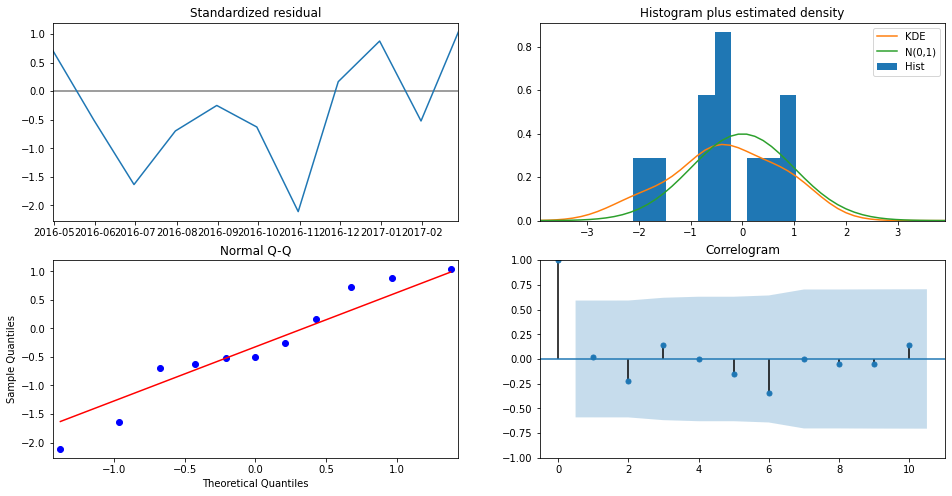

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

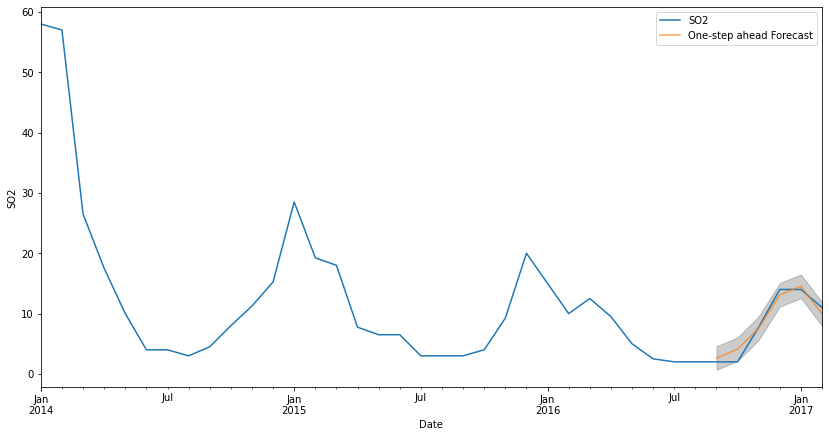

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df5['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('SO2')
plt.legend()
plt.show()

In [ ]:
df5_forecasted = pred.predicted_mean
df5_truth = df5['2016-09-30':]

mse = ((df5_forecasted - df5_truth['SO2']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.08


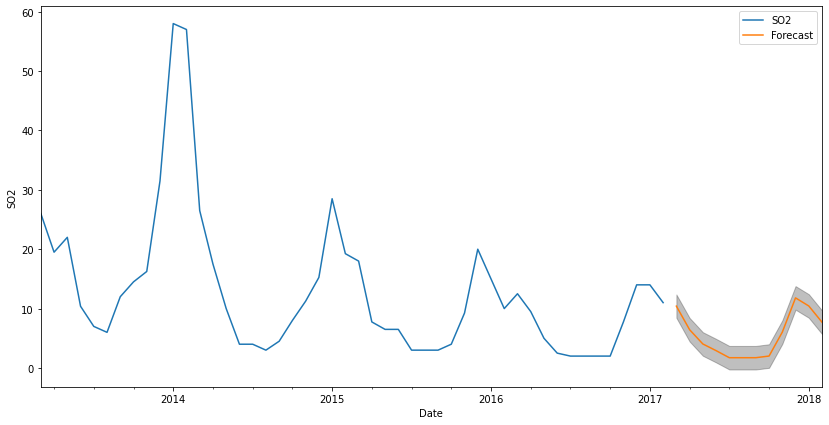

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df5.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SO2')
plt.legend()
plt.show()

# **ARIMA**

In [ ]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
for param in pdq:
          mod = sm.tsa.statespace.SARIMAX(df5,
                                            order=param,
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
          results = mod.fit()
          print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:403.94020374160976
ARIMA(0, 0, 1) - AIC:351.52720473819113
ARIMA(0, 0, 2) - AIC:322.8922554285606
ARIMA(0, 0, 3) - AIC:313.07399204572005
ARIMA(0, 1, 0) - AIC:324.3949416779793
ARIMA(0, 1, 1) - AIC:313.44820787593505
ARIMA(0, 1, 2) - AIC:306.62166095097666
ARIMA(0, 1, 3) - AIC:298.3341820290692
ARIMA(0, 2, 0) - AIC:332.78867671309666
ARIMA(0, 2, 1) - AIC:316.12049151142037
ARIMA(0, 2, 2) - AIC:303.62020734068517
ARIMA(0, 2, 3) - AIC:300.39149493587735
ARIMA(0, 3, 0) - AIC:362.55156335795124
ARIMA(0, 3, 1) - AIC:321.9162914943735
ARIMA(0, 3, 2) - AIC:311.54176870916353
ARIMA(0, 3, 3) - AIC:298.02060548161586
ARIMA(1, 0, 0) - AIC:329.5676783928667
ARIMA(1, 0, 1) - AIC:317.125055961643
ARIMA(1, 0, 2) - AIC:311.15464247407067
ARIMA(1, 0, 3) - AIC:306.46477690682804
ARIMA(1, 1, 0) - AIC:322.0097829293508
ARIMA(1, 1, 1) - AIC:315.0333385932978
ARIMA(1, 1, 2) - AIC:303.38951099057874
ARIMA(1, 1, 3) - AIC:298.79726038109413
ARIMA(1, 2, 0) - AIC:333.11569016902695
ARIMA(1, 

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2) - AIC:304.41134429914314
ARIMA(3, 0, 3) - AIC:306.3307372608365
ARIMA(3, 1, 0) - AIC:307.59139892207656
ARIMA(3, 1, 1) - AIC:309.5515014080832
ARIMA(3, 1, 2) - AIC:305.5707167691108
ARIMA(3, 1, 3) - AIC:300.1532340085469
ARIMA(3, 2, 0) - AIC:314.41953471362876
ARIMA(3, 2, 1) - AIC:307.47651610310066
ARIMA(3, 2, 2) - AIC:308.97478714565034
ARIMA(3, 2, 3) - AIC:300.54399956263484
ARIMA(3, 3, 0) - AIC:326.01617832459823
ARIMA(3, 3, 1) - AIC:314.01647582919804
ARIMA(3, 3, 2) - AIC:315.9912539263978
ARIMA(3, 3, 3) - AIC:305.3894431341073


In [ ]:
mod = sm.tsa.statespace.SARIMAX(df5,
                                order=(1,3,3),
                                seasonal_order=(0,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0827      0.390     -0.212      0.832      -0.847       0.682
ma.L1         -1.4573   3444.144     -0.000      1.000   -6751.856    6748.942
ma.L2         -0.0623   1622.301  -3.84e-05      1.000   -3179.714    3179.589
ma.L3          0.5336   1846.111      0.000      1.000   -3617.777    3618.844
sigma2        58.8059   2.03e+05      0.000      1.000   -3.99e+05    3.99e+05


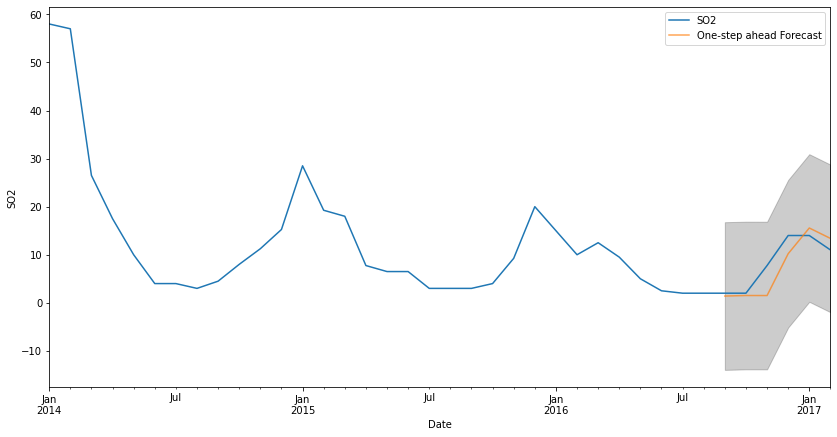

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df5['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('SO2')
plt.legend()
plt.show()

In [ ]:
df5_forecasted = pred.predicted_mean
df5_truth = df5['2016-09-30':]

mse = ((df5_forecasted - df5_truth['SO2']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3.22


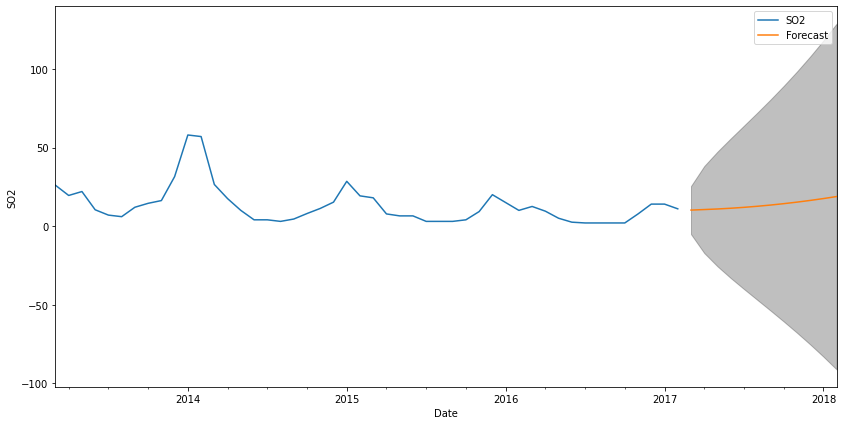

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df5.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SO2')
plt.legend()
plt.show()

# NO2

In [ ]:
df = frame[['No','year','month','day','hour','NO2','station']]
dfpm3 = df.loc[df['station'] == 'Aotizhongxin']
dfpm3 = dfpm3.groupby(np.arange(len(dfpm3))//24).median()
dfpm3['year'] = dfpm3['year'].astype('int')
dfpm3['month'] = dfpm3['month'].astype('int')
dfpm3['day'] = dfpm3['day'].astype('int')
dfpm3 = dfpm3.drop(['hour'],axis = 1)
dfpm3 = dfpm3.drop(['No'],axis = 1)

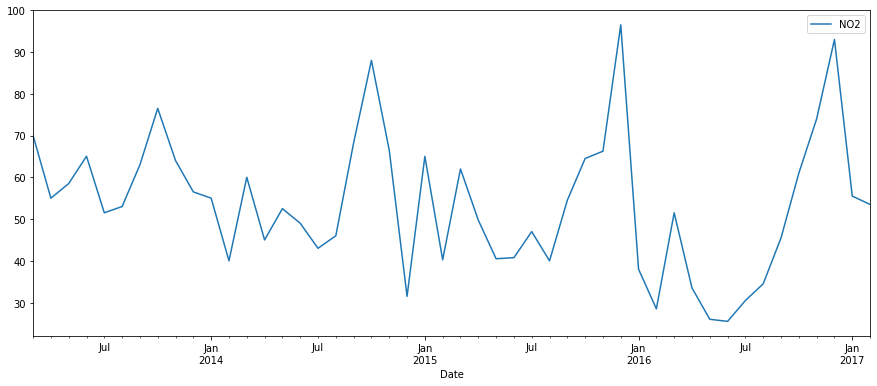

In [ ]:
df6 = pd.to_datetime(dfpm3[['year','month','day']])
dfpm3['Date'] = df6
dfpm3final = dfpm3[['Date','NO2']]
df6 = dfpm3final.set_index('Date').resample('M').median()
df6.loc['2013-09-30'] = 63.00000
df6.loc['2013-10-31'] = 76.50000
df6.loc['2013-11-30'] = 64.00000
df6.loc['2014-01-31'] = 55.00000
df6.loc['2014-02-28'] = 40.00000
df6.loc['2014-03-31'] = 60.00000
df6.loc['2014-04-30'] = 45.00000
df6.plot(figsize=(15, 6))
plt.show()

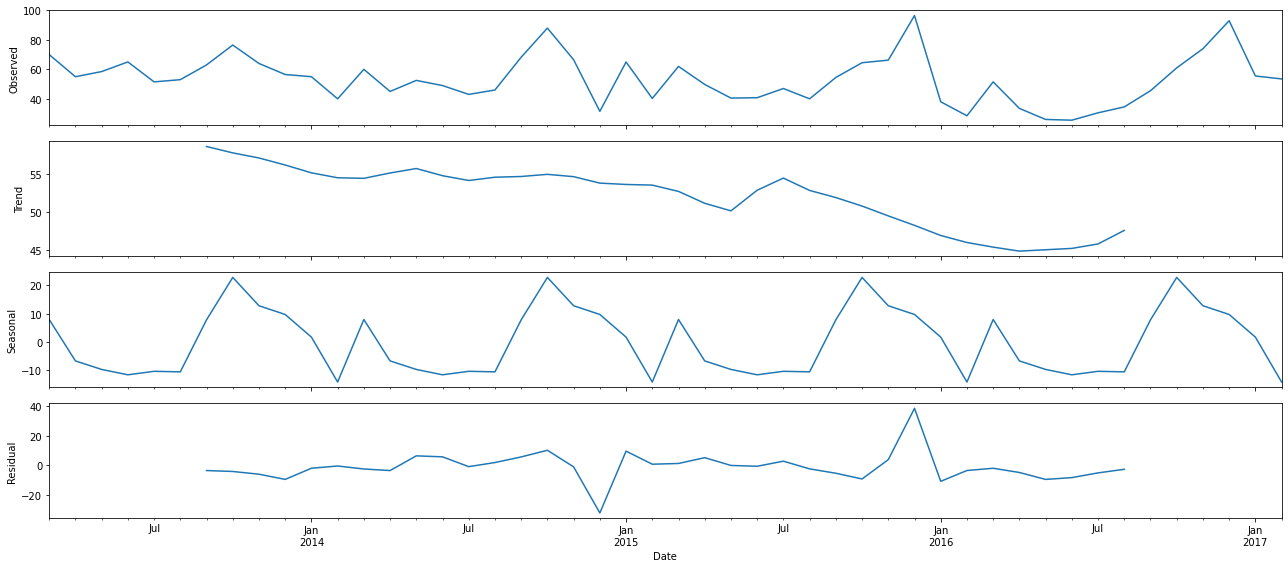

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df6, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df6,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:513.2783327929417
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1662.7935000716857
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:298.35051113257526
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:224.34095066615174
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:305.07676990427996


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1225.6844554270217
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:209.56899597568534
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:95.38720461021289
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:209.60216644172297


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:689.4755723890858
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:97.24484730240124
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:462.96480023605045
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2771.064475477972
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:292.37516790832126
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:214.2708126984608
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:307.2074821086358
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2509.4233403270723


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:210.61462943419832
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:94.28287738134054


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:211.93326824853642


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:848.8630959010216
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:93.86318439195446
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:437.7740065774573
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:1915.3691449445132
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:286.37384006976646
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:205.35700267655454
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:308.25150912368827
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:1084.6828559162714
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:212.61462851460783
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:93.8778668785251
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:216.43352520714456


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:815.122061760642
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:89.39229396261166
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:398.1281559105644
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1520.61013651062
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:311.12022088529113
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:233.54996442887526
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:308.30377364169294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1293.5455199232779
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:211.7798409532693
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:83.82424161074994
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:205.8162247852396


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:914.8819216531705
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:79.02214929678657
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:386.20898548412674
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1345.7612103087042
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:286.6773976126009
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:210.88336921481883
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:300.3060952491369


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1295.1599646607197
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:205.77352402741099
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:85.32741940941678
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:204.8087470877958


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:886.1313140109346
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:77.61372492532152
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:374.69726054178403


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1272.1470171905557
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:280.7115125893645
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:201.66426517731878
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:300.2049478130997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1237.8604494716244
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:206.92391431044592
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:83.68868085245929
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:204.63843301649436


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:890.1922837945966
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:81.48401203252419
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:432.84309928565995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1451.0194953609323
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:337.5033368090346
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:246.20287506008393
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:333.4625800760851


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1329.7446854404661
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:225.94617543771187
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:85.43124460054992
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:216.4732858049888


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:847.5041748601604
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:75.69874851867897
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:387.4557468024784


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:1290.8311554137183
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:299.07953142064486
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:218.16940362466684
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:306.1320342152151


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1222.9953537256722
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:208.80123910113372
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:80.87344568225011
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:202.27588741910387


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:603.8654786810978
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:74.21134388057644
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:376.00763110744487
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:1693.5244086390053
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:278.4518487497058
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:198.1402634632145
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:301.41502041193587
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:2851.8131803499246
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:205.14349232153626
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:79.43435001523791
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:202.0870010935951
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:830.9332400961166
ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:74.512326877789
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:406.8732541941913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1435.9439699209458
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:300.18908224433653
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:225.73581795252832
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:299.54233681443765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1169.3591948837973
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:203.0076137539034
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:85.6482790122817
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:203.2969713410875


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:656.9822391743126
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:80.94111653830039
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:395.68438072613577


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1445.0628164580148
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:293.95431225871494
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:215.10628449460555
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:300.353440592275
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1186.182569522968


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:205.01313713800667
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:87.325376513495
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:205.28954381336254


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:714.346528485552
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:79.18629298299653
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:383.7780386649154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1214.0523395754183
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:288.2129896516831
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:207.00048312584468
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:300.50439701413717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:963.0419843186615
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:206.96366230832447
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:85.62577486419512
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:206.5109975770377
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:779.9798913670926
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:81.12509944540496
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:396.2868680874635
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1458.3705052642545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:306.360268820284
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:230.67833915295063
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:298.2344533410622


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1405.896395107604
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:202.1138731034363
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:78.4288837433435
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:198.66114475037958


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:991.9560904127542
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:74.0325557290878
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:381.52071770180845


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1221.8163542390157
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:288.6532571470053
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:212.43053104257064
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:293.3141431956494


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1256.7313265553273
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:198.8664643931906
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:80.42754540455678
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:197.59125441597567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:809.2725393946695
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:75.53404270284348
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:376.14387591973394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1243.7013836382237
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:282.2597470162657
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:202.6171813052554
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:294.30076363785145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1192.5346797898887
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:200.82348797110944
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:78.881757293953
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:199.2868034628463
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:887.7562886333847
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:75.16774957956846
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:416.7851460010535
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1409.116109010629
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:324.56918093263056
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:237.2270887454301
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:313.70745393708535


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1329.5221277354165
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:210.30216758188058
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:74.70841037049472
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:203.74096826494412
ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:855.2240752290872
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:70.26918085225365
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:386.20333579916684


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:1367.247933045981
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:294.8618534783106
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:216.00458129055244
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:295.91922006242856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1102.5376050187733
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:198.6551570015974
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:73.54943109587387
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:194.59732438364014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:819.8200006835376
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:69.82670837103962
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:374.4261347639775
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1328.0787690800178
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:280.3753893176921
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:199.86965083699044
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:294.0909300068928


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1046.437205561989
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:197.79312885648216
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:72.53857278913742
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:195.7234922040651


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:640.8958756621229


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:64.71624347946636
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:397.51705367594644


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1427.7866260450503
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:294.08905668885495
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:214.38233855126586
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:293.4220799636414


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1137.7080395841351
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:197.41625288378597
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:80.4239573274555
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:197.666011558233


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:712.5583948099052
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:75.37648918055227
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:391.1964207220542


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:1437.4889143949374
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:295.8338137844789
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:215.3455837275074
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:293.62166996052724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:1178.5991612385533
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:199.32696062129727
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:82.42336882585225
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:198.7247813397128


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:723.100364939542
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:73.32100089343145
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:385.4044246087858
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1381.4644719587723
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:289.9068676742269
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:208.77934872039074
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:295.135710225506


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1130.2720145742658
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:201.1747215337934
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:84.39376569388179
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:201.62041552783063


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:807.8989789278975
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:75.14566048434043
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:388.3853066438053


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1037.5570163328975
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:294.4897750781583
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:217.54068168841752
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:288.94435254871655


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1164.4924153506247
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:192.20919197911815
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:74.12542533294983
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:190.40271863908208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:778.7428513339075
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:70.36178268590274
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:383.519067579386


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1502.0534676286247
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:289.99409716074945
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:210.63559853347184
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:287.23097844395426


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1451.3364891752515
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:192.49266321960994
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:75.09735369751661
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:192.33969855821584
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:848.0400936954592
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:71.79664637830712
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:377.7752811940788


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1518.4140856695817
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:283.91609929654487
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:202.8343616288997
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:288.9047691557586


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1469.3237497353452
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:194.38289977187793
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:72.46110589567859
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:192.90258468691152


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:840.6717505669999
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:66.1867846412237
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:400.0601469485006


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1519.334242179557
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:306.8311345739518
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:222.33789687960356
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:297.7547379822696


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1273.9849988864917
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:196.7338986038028
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:59.49088278840772
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:190.12471879084686


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:841.7183452320087
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:56.85410695188455
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:386.66889572769423


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:1350.757331532321
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:291.4560747839903
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:213.19554772374192
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:286.7479834583467


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:1280.7582747487154
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:189.0059169366147
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:60.05140522905132
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:187.2587896670104


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:680.8367583094371
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:53.0658489242998
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:376.42254057988276


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1306.7821156472332
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:281.8519779916461
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:199.17217761679515
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:287.85704783683747
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1263.2702458222564
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:190.47252199181415
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:59.57687165199849
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:188.58748682084843


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:893.4020007881101
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:50.337885254364224


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(df6,
                                order=(1,0,1),
                                seasonal_order=(2,1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8420      0.292      2.887      0.004       0.270       1.414
ma.L1          1.0000   2.14e+04   4.68e-05      1.000   -4.19e+04    4.19e+04
ar.S.L12      -0.3231      0.120     -2.702      0.007      -0.557      -0.089
ar.S.L24      -0.2686      0.157     -1.713      0.087      -0.576       0.039
sigma2        25.5060   5.45e+05   4.68e-05      1.000   -1.07e+06    1.07e+06


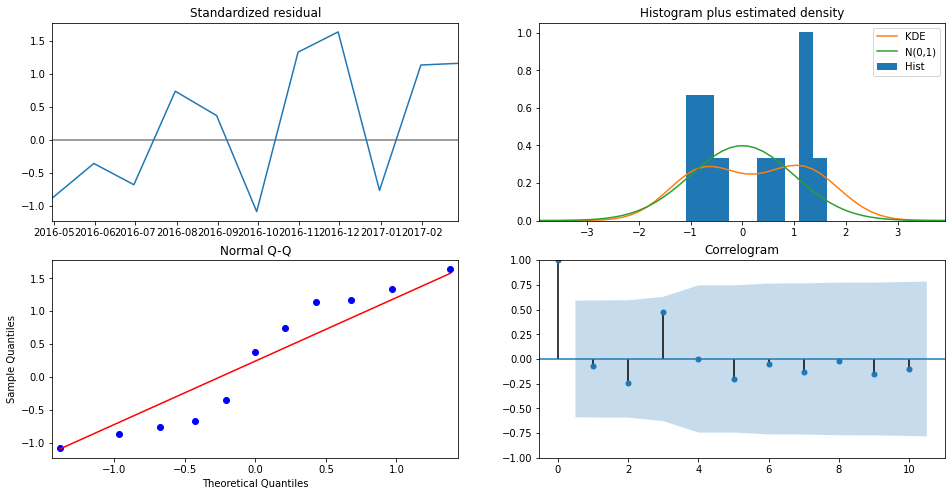

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

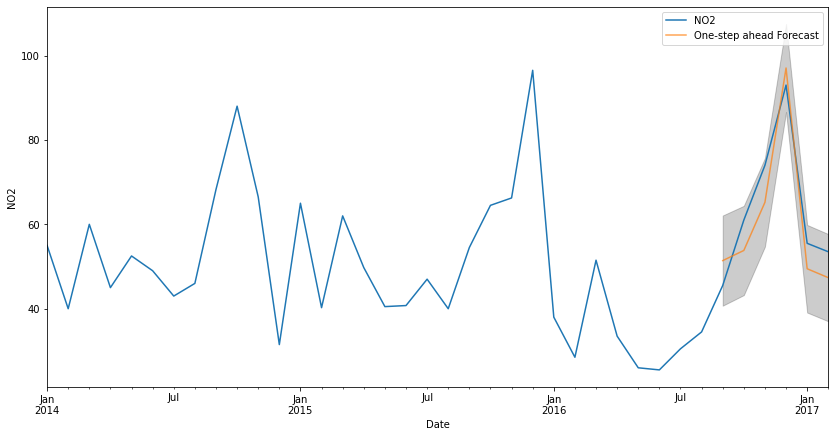

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df6['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO2')
plt.legend()
plt.show()

In [ ]:
df6_forecasted = pred.predicted_mean
df6_truth = df6['2016-09-30':]

mse = ((df6_forecasted - df6_truth['NO2']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 6.51


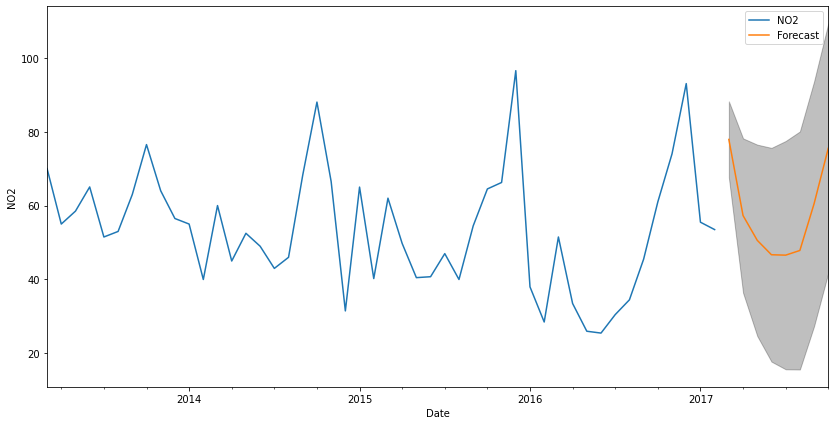

In [ ]:
pred_uc = results.get_forecast(steps=8)
pred_ci = pred_uc.conf_int()
ax = df6.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('NO2')
plt.legend()
plt.show()

# ARIMA

In [ ]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
for param in pdq:
          mod = sm.tsa.statespace.SARIMAX(df6,
                                            order=param,
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
          results = mod.fit()
          print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:513.2783327929417
ARIMA(0, 0, 1) - AIC:462.96480023605045
ARIMA(0, 0, 2) - AIC:437.7740065774573
ARIMA(0, 0, 3) - AIC:415.16859160799544
ARIMA(0, 1, 0) - AIC:398.1281559105644
ARIMA(0, 1, 1) - AIC:386.20898548412674
ARIMA(0, 1, 2) - AIC:374.69726054178403
ARIMA(0, 1, 3) - AIC:368.2524387905808
ARIMA(0, 2, 0) - AIC:432.84309928565995
ARIMA(0, 2, 1) - AIC:387.4557468024784
ARIMA(0, 2, 2) - AIC:376.00763110744487
ARIMA(0, 2, 3) - AIC:367.3292161592288
ARIMA(0, 3, 0) - AIC:474.1149553981099
ARIMA(0, 3, 1) - AIC:419.90483428846017
ARIMA(0, 3, 2) - AIC:378.6778921307309
ARIMA(0, 3, 3) - AIC:368.5887158595388
ARIMA(1, 0, 0) - AIC:406.8732541941913
ARIMA(1, 0, 1) - AIC:395.68438072613577
ARIMA(1, 0, 2) - AIC:383.7780386649154
ARIMA(1, 0, 3) - AIC:377.7150570417853
ARIMA(1, 1, 0) - AIC:396.2868680874635
ARIMA(1, 1, 1) - AIC:381.52071770180845
ARIMA(1, 1, 2) - AIC:376.14387591973394
ARIMA(1, 1, 3) - AIC:370.11547844142393
ARIMA(1, 2, 0) - AIC:416.7851460010535
ARIMA(1, 2, 1)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 1, 1) - AIC:378.2307438039218
ARIMA(3, 1, 2) - AIC:379.7739030863862
ARIMA(3, 1, 3) - AIC:372.55946069714696
ARIMA(3, 2, 0) - AIC:391.2016044763777
ARIMA(3, 2, 1) - AIC:380.06042145295066
ARIMA(3, 2, 2) - AIC:378.4223921346037
ARIMA(3, 2, 3) - AIC:372.1993072683165
ARIMA(3, 3, 0) - AIC:406.58502525331727


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 3, 1) - AIC:388.93914224640093
ARIMA(3, 3, 2) - AIC:381.47056660913876
ARIMA(3, 3, 3) - AIC:375.1027005397794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(df6,
                                order=(0,1,3),
                                seasonal_order=(0,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6028   1445.315     -0.000      1.000   -2833.368    2832.162
ma.L2         -0.2603    574.009     -0.000      1.000   -1125.298    1124.778
ma.L3         -0.1369    197.825     -0.001      0.999    -387.867     387.593
sigma2       238.8322   3.45e+05      0.001      0.999   -6.76e+05    6.77e+05


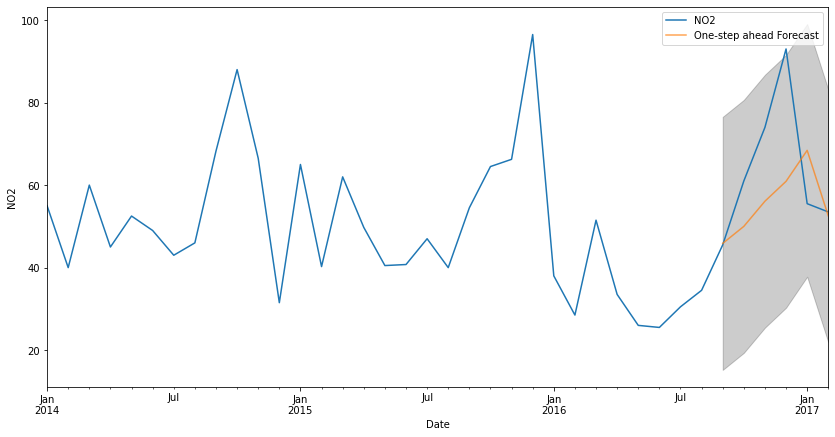

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df6['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NO2')
plt.legend()
plt.show()

In [ ]:
df6_forecasted = pred.predicted_mean
df6_truth = df6['2016-09-30':]

mse = ((df6_forecasted - df6_truth['NO2']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 16.53


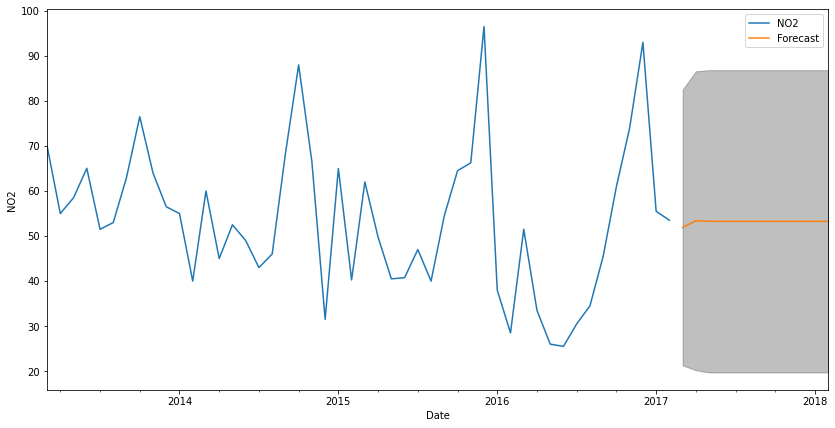

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df6.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('NO2')
plt.legend()
plt.show()

# CO

In [ ]:
df = frame[['No','year','month','day','hour','CO','station']]
dfpm4 = df.loc[df['station'] == 'Aotizhongxin']
dfpm4 = dfpm4.groupby(np.arange(len(dfpm4))//24).median()
dfpm4['year'] = dfpm4['year'].astype('int')
dfpm4['month'] = dfpm4['month'].astype('int')
dfpm4['day'] = dfpm4['day'].astype('int')
dfpm4 = dfpm4.drop(['hour'],axis = 1)
dfpm4 = dfpm4.drop(['No'],axis = 1)

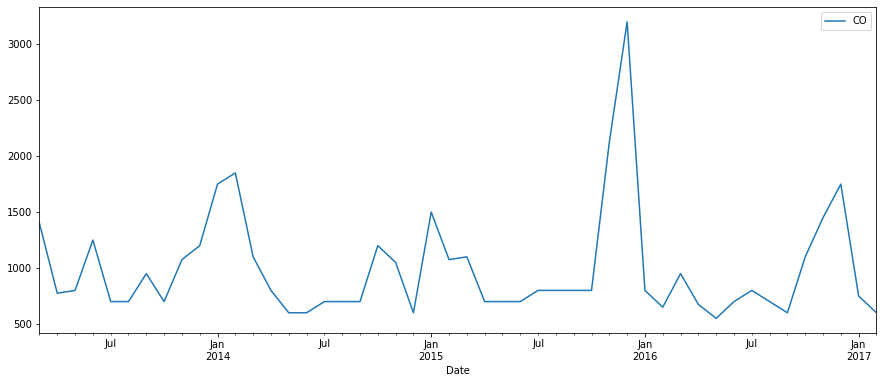

In [ ]:
df7 = pd.to_datetime(dfpm4[['year','month','day']])
dfpm4['Date'] = df7
dfpm4final = dfpm4[['Date','CO']]
df7 = dfpm4final.set_index('Date').resample('M').median()
df7.plot(figsize=(15, 6))
plt.show()

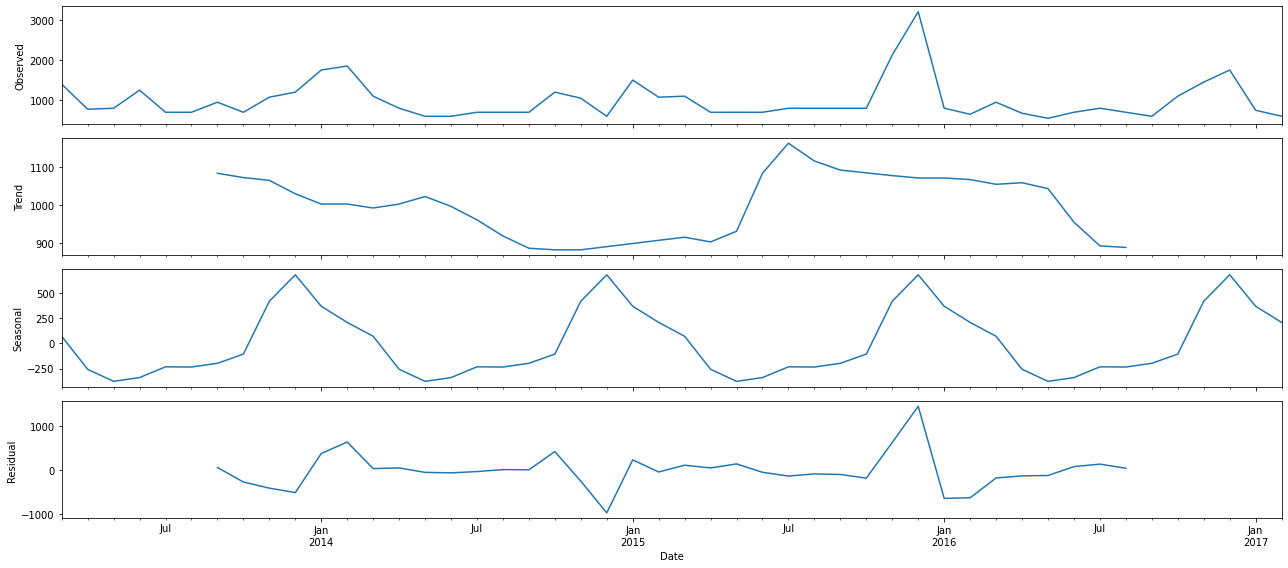

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df7, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df7,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:793.4481225613258
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1077.737903114981
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:551.1459571191126
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:394.1234875508243


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:562.7644143513455
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1336.373393891825
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:377.8851366901861


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:180.65452484815785
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:379.7405693861982


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:719.3336491747363
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:156.93796971621654
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:740.5635637271145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2682.6846328072456
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:536.9232816429837
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:379.4671811199207
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:561.8581978444487
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2608.0446518966723
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:377.78245507320406


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:182.81421229552666
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:379.49680368794066


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:854.3352252377487
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:157.83216338315228
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:716.9544233214833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:522.0887614589917
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:363.67822949804935
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:563.1664173905
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:3234.9373737382607
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:376.90686245888895
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:180.386215450518
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:378.0391490103582


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:793.5483363463377


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:167.0854668302008
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:712.8415239074851
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1336.4468060740369


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:554.3039298462227
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:390.3415956810541
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:549.7141852629032


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1310.7444599947632
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:374.8761788978305
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:168.6504063730541
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:369.9846876720297
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:784.1028431000476


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:145.70875544759807
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:693.8472529360345
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2932.566413702801
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:525.7114409929678
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:365.67280517260235
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:544.2127164430725
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2924.2068390127197
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:367.87557999449393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:170.75950015597846
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:368.09273238896117


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:797.0559781310388
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:146.4472565421025
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:670.2096442941821
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:3103.2887681066395
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:510.4979284794288
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:350.8108370356133
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:540.507935625804
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:2418.5494976776686
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:367.4359737461767
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:168.8701237155014
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:365.4697603178037


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:876.6050962394332
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:147.70807803207498
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:734.571351218178


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1342.8367493443275
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:570.3163927691053
ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:393.97636590141735
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:562.7615842953489


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1293.459149646011
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:378.7268607561245
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:160.16158865465957
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:367.6364048525908


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:1054.0120234799003
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:142.85684902352125
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:687.9103765225917
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:2792.835529717596
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:527.990759877074
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:362.04728785794754
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:539.8692152359944


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:363.7998744151044
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:158.0119122815881
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:358.5837145579817


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:895.2008206955946
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:137.9159394019099
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:673.0529114106328
ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:2650.475232038092
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:502.5139391652557
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:337.2460148176168
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:540.3019400451158
ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:2381.2002079684457
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:360.3012272512926
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:159.94508560211938
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:360.6152515342784
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:722.9861985867361


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:139.0941407521125
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:726.8890031263172


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1362.437190852627
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:552.3136586426128
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:395.77375434192714
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:547.9506594488496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1133.1388909899165
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:364.6238865726004
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:167.76302896822307
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:366.3609298785891
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:845.5186063059841
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:145.08292549949752
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:713.1958072242862
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2639.215170093563
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:536.9663383771821
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:379.4135343343355
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:545.1396969973221
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1071594238.2653639
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:364.22277404514404
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:167.0074522530464
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:366.5222090163654


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:879.4159535109227
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:146.90500701171544
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:687.1392024070091
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:360682.7639693428
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:524.037607130382
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:365.0614950738951
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:542.4801997161809
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:4662.000024870374
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:363.09284622625944


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:166.84381977947308
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:364.45372851453095


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:846.0969642172757


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:153.9124922774908
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:714.1967359838209


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1567.8485209169212
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:553.2423046203357
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:389.96470235395384
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:536.0728205156763
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1537.6114726568803
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:360.91511544877824
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:156.29559737039497
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:355.99329501261803


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:757.7417559415712
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:133.5013749818324
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:689.1288074631482
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2738.9813586686773
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:526.8899245182265
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:367.28627090450897
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:527.5248337795372
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2551.1604355695354
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:353.93988096322437
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:156.42551588252053
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:353.4774796754354


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:704.2950322420182
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:131.34789410873555
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:672.0638076883172
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:2476.8857607318428


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:510.5860853763969
ARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:350.79639864889316
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:526.6668564443312
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:2419.9362223282405
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:353.6971624990322
ARIMA(1, 1, 2)x(1, 2, 0, 12)12 - AIC:156.67507133485856
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:352.29439590301683
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:780.4531193461086


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:136.9795110238351
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:728.6624510561361


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1415.289067490562
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:563.4885832396593
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:388.92434323920713
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:543.4834406654811


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1332.4247495315597
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:361.2576847810435
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:145.8202968671721
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:351.75033124949186


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:914.790762811935
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:125.54955199597056
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:689.3091533147052
ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:2451.26307157646
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:527.3745178711329
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:360.5383837376497
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:527.0318025640005
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1031612.548590288
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:349.6328651645173
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:145.36064578993665
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:345.4553416401467


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:917.4674062945446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:124.57854232522475
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:675.4022291147039
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:9520.650423901498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:503.86349978507013
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:339.17937803763823
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:528.8089284880363
ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:18274.34813587171
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:351.76904760564906
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:146.02529445694321
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:345.3606563982196


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:815.4665489329295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:143.89396327279323
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:713.6210317739492


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1650.6097646337407
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:537.889375200072
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:380.6491487736536
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:535.1626065503663
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1102.4370306972817
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:347.89597043893167
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:153.89704473289538
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:349.9420697765279


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:722.7761412652806
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:135.13138049509365
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:717.0026784810901
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:nan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:538.9476340677459
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:381.39289099877635


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:530.0964088774506
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:2670.1815363597925
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:349.8746082639857
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:152.7672685427753
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:356.25255680276496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:1700.29804388207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:134.06736751024388
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:690.92671513955


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:523.9889297995645
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:367.0489253388228


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:528.9614427902957


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:2493.012769446725
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:350.48451789513496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:156.4497631832441
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:351.91453185534226


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:699.9926294352697


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:155.17217209479298
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:694.5381275997436


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1192.5060993978464
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:530.3925363898555
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:366.08049214375455
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:516.7185423102023


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1249.07133126121
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:341.45680651329775
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:142.8593859310829
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:339.55791848379056


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:716.3282993765395
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:123.80988437111512
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:687.4489339881478
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:5584.772055207556
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:527.2288691908524
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:366.57970821905747
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:512.6229959414104
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:2494.428734912954
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:337.60031211873235
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:143.55296398579333
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:338.46819297153144


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:678.437258526562


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:121.63690269163837
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:674.0000259310839
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:2476.323464736847
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:512.6095884322178
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:351.8849694774151
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:513.7965392896056
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:2422.2808300239217
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:339.49006493979164


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:143.649568296792
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:339.79714728778555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:669.1392633054686


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:123.26836708109974
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:700.964814893663


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1278.7878132206672
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:535.3210269082924
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:362.65854507459943
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:519.7234575662698


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1188.8576745228575
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:339.6890970891625
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:126.53338673487757
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:332.1716873906464


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:817.686029340767
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:114.49723138211283
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:685.1578295124984
ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:2450.327908855677
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:520.9199756621512
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:354.8403957754149
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:508.098974207143
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:2697262.4268118646
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:330.50084421876153
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:123.81207545438154
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:329.0469755948775


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:808.8616831217556


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:114.98703480897277
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:665.788828149114
ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:4565.619808033681
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:503.3462030024823
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:337.7690608357392


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:506.46943176137995
ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:2519.9773639132686
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:331.88881445984345


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:125.89770854084082
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:331.1501652163158


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:821.7603726278815
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:120.45643782708461


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(df7,
                                order=(0,1,0),
                                seasonal_order=(2,1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4486      0.047     -9.597      0.000      -0.540      -0.357
ar.S.L24       0.1337      0.100      1.337      0.181      -0.062       0.330
sigma2       1.92e+04   1.26e+04      1.519      0.129   -5577.423     4.4e+04


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



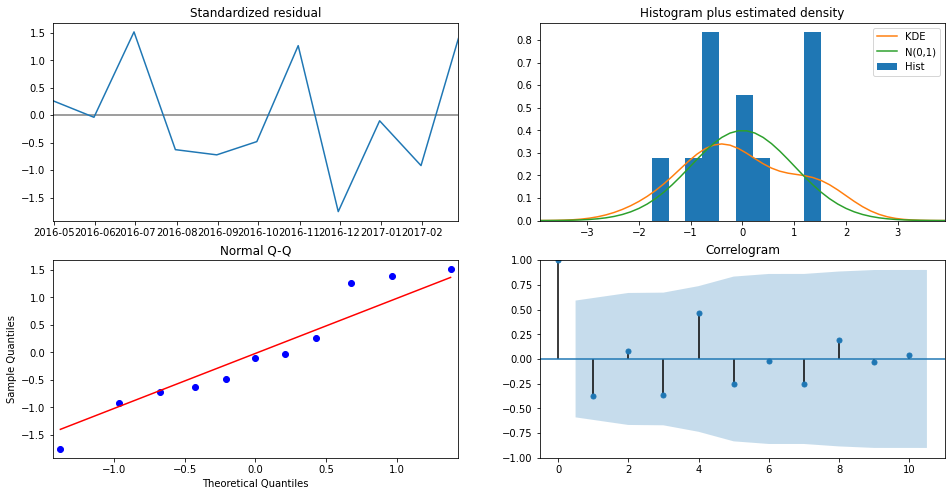

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

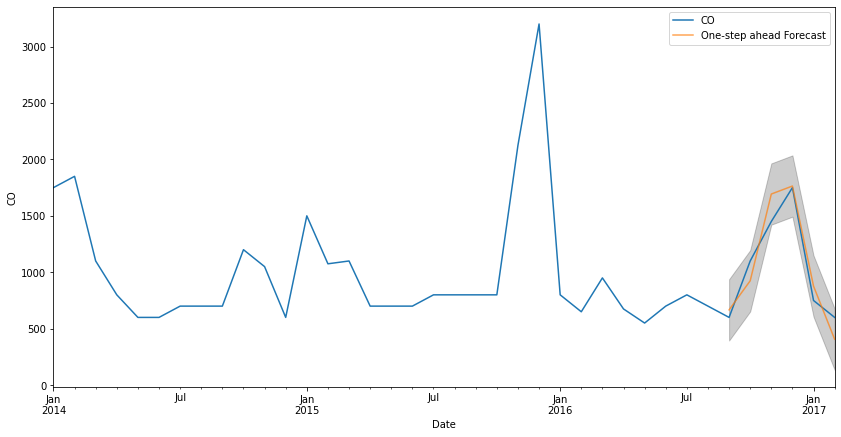

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df7['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO')
plt.legend()
plt.show()

In [ ]:
df7_forecasted = pred.predicted_mean
df7_truth = df7['2016-09-30':]

mse = ((df7_forecasted - df7_truth['CO']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 157.14


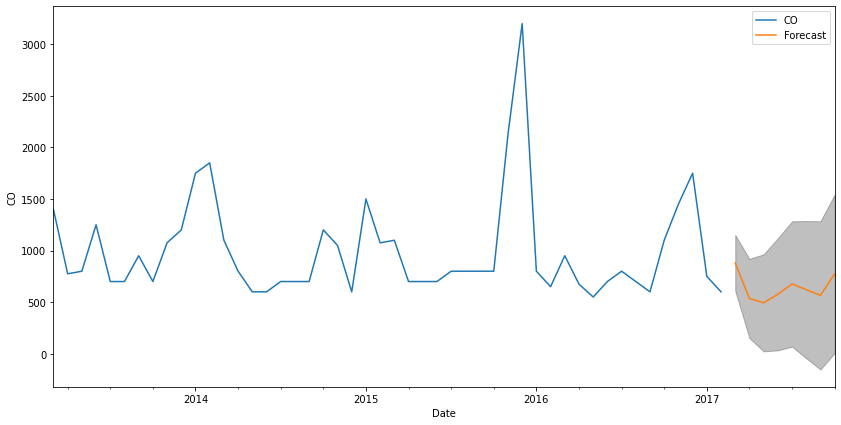

In [ ]:
pred_uc = results.get_forecast(steps=8)
pred_ci = pred_uc.conf_int()
ax = df7.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO')
plt.legend()
plt.show()

# ARIMA

In [ ]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
for param in pdq:
          mod = sm.tsa.statespace.SARIMAX(df7,
                                            order=param,
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
          results = mod.fit()
          print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:793.4481225613258
ARIMA(0, 0, 1) - AIC:740.5635637271145
ARIMA(0, 0, 2) - AIC:716.9544233214833
ARIMA(0, 0, 3) - AIC:697.1732828491756
ARIMA(0, 1, 0) - AIC:712.8415239074851
ARIMA(0, 1, 1) - AIC:693.8472529360345
ARIMA(0, 1, 2) - AIC:670.2096442941821
ARIMA(0, 1, 3) - AIC:657.1431226069835
ARIMA(0, 2, 0) - AIC:734.571351218178
ARIMA(0, 2, 1) - AIC:687.9103765225917
ARIMA(0, 2, 2) - AIC:673.0529114106328
ARIMA(0, 2, 3) - AIC:648.7073431271598
ARIMA(0, 3, 0) - AIC:764.3902022255227
ARIMA(0, 3, 1) - AIC:707.5522386836626
ARIMA(0, 3, 2) - AIC:664.8885195411295
ARIMA(0, 3, 3) - AIC:651.2364709555216
ARIMA(1, 0, 0) - AIC:726.8890031263172
ARIMA(1, 0, 1) - AIC:713.1958072242862
ARIMA(1, 0, 2) - AIC:687.1392024070091
ARIMA(1, 0, 3) - AIC:675.8899192298246
ARIMA(1, 1, 0) - AIC:714.1967359838209
ARIMA(1, 1, 1) - AIC:689.1288074631482
ARIMA(1, 1, 2) - AIC:672.0638076883172
ARIMA(1, 1, 3) - AIC:659.1219630354169
ARIMA(1, 2, 0) - AIC:728.6624510561361
ARIMA(1, 2, 1) - AIC:689.3

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 3) - AIC:650.6445396667948
ARIMA(1, 3, 0) - AIC:750.8357775371398
ARIMA(1, 3, 1) - AIC:701.1075865966523
ARIMA(1, 3, 2) - AIC:666.5704634728814
ARIMA(1, 3, 3) - AIC:652.2877593880789
ARIMA(2, 0, 0) - AIC:713.6210317739492
ARIMA(2, 0, 1) - AIC:717.0026784810901
ARIMA(2, 0, 2) - AIC:690.92671513955


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 3) - AIC:676.2218373784165
ARIMA(2, 1, 0) - AIC:694.5381275997436
ARIMA(2, 1, 1) - AIC:687.4489339881478
ARIMA(2, 1, 2) - AIC:674.0000259310839


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 3) - AIC:659.1120310570072
ARIMA(2, 2, 0) - AIC:700.964814893663
ARIMA(2, 2, 1) - AIC:685.1578295124984
ARIMA(2, 2, 2) - AIC:665.788828149114


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 3) - AIC:656.7682398340233
ARIMA(2, 3, 0) - AIC:716.3454583101897
ARIMA(2, 3, 1) - AIC:690.8363718218801
ARIMA(2, 3, 2) - AIC:663.037531138961


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 3, 3) - AIC:648.6446249430879
ARIMA(3, 0, 0) - AIC:695.4005451430515
ARIMA(3, 0, 1) - AIC:691.1308158842246


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 2) - AIC:690.8154515652327
ARIMA(3, 0, 3) - AIC:679.1136535996551
ARIMA(3, 1, 0) - AIC:681.846290188852
ARIMA(3, 1, 1) - AIC:674.8367262072081
ARIMA(3, 1, 2) - AIC:675.8858108849018
ARIMA(3, 1, 3) - AIC:661.8611336205184
ARIMA(3, 2, 0) - AIC:684.122892377254


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 1) - AIC:671.4697057123043
ARIMA(3, 2, 2) - AIC:670.2155856939007


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 2, 3) - AIC:656.8414779584539
ARIMA(3, 3, 0) - AIC:693.8154411608957
ARIMA(3, 3, 1) - AIC:674.0418037306988
ARIMA(3, 3, 2) - AIC:664.9420531565944
ARIMA(3, 3, 3) - AIC:651.9289663085988


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(df7,
                                order=(3,3,3),
                                seasonal_order=(0,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2811      8.257     -0.034      0.973     -16.464      15.902
ar.L2         -0.3856      1.081     -0.357      0.721      -2.505       1.734
ar.L3         -0.0975      2.914     -0.033      0.973      -5.810       5.615
ma.L1         -1.8640      8.130     -0.229      0.819     -17.798      14.070
ma.L2          0.7468     16.374      0.046      0.964     -31.347      32.840
ma.L3          0.1274      8.358      0.015      0.988     -16.255      16.510
sigma2      2.824e+05   8.97e-05   3.15e+09      0.000    2.82e+05    2.82e+05


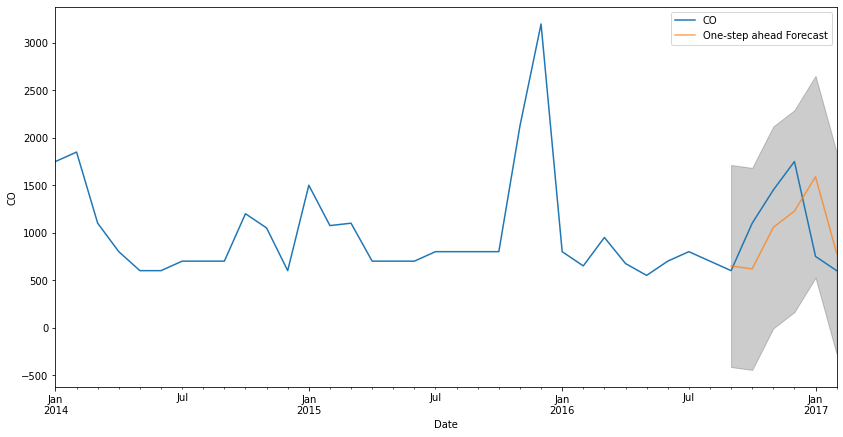

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df7['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO')
plt.legend()
plt.show()

In [ ]:
df7_forecasted = pred.predicted_mean
df7_truth = df7['2016-09-30':]

mse = ((df7_forecasted - df7_truth['CO']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 483.23


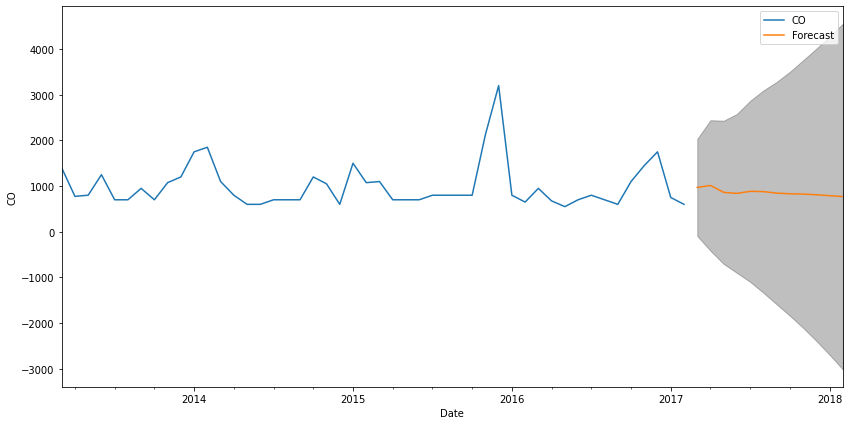

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df7.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO')
plt.legend()
plt.show()

# O3

In [ ]:
df = frame[['No','year','month','day','hour','O3','station']]
dfpm5 = df.loc[df['station'] == 'Aotizhongxin']
dfpm5 = dfpm5.groupby(np.arange(len(dfpm5))//24).median()
dfpm5['year'] = dfpm5['year'].astype('int')
dfpm5['month'] = dfpm5['month'].astype('int')
dfpm5['day'] = dfpm5['day'].astype('int')
dfpm5 = dfpm5.drop(['hour'],axis = 1)
dfpm5 = dfpm5.drop(['No'],axis = 1)

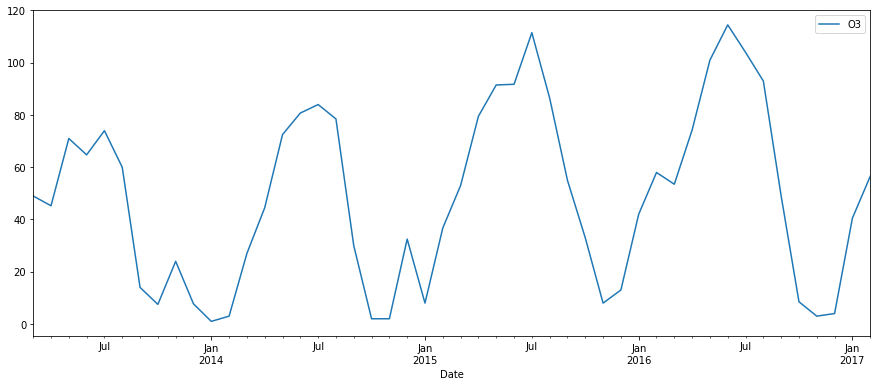

In [ ]:
df8 = pd.to_datetime(dfpm5[['year','month','day']])
dfpm5['Date'] = df8
dfpm5final = dfpm5[['Date','O3']]
df8 = dfpm5final.set_index('Date').resample('M').median()
df8.plot(figsize=(15, 6))
plt.show()

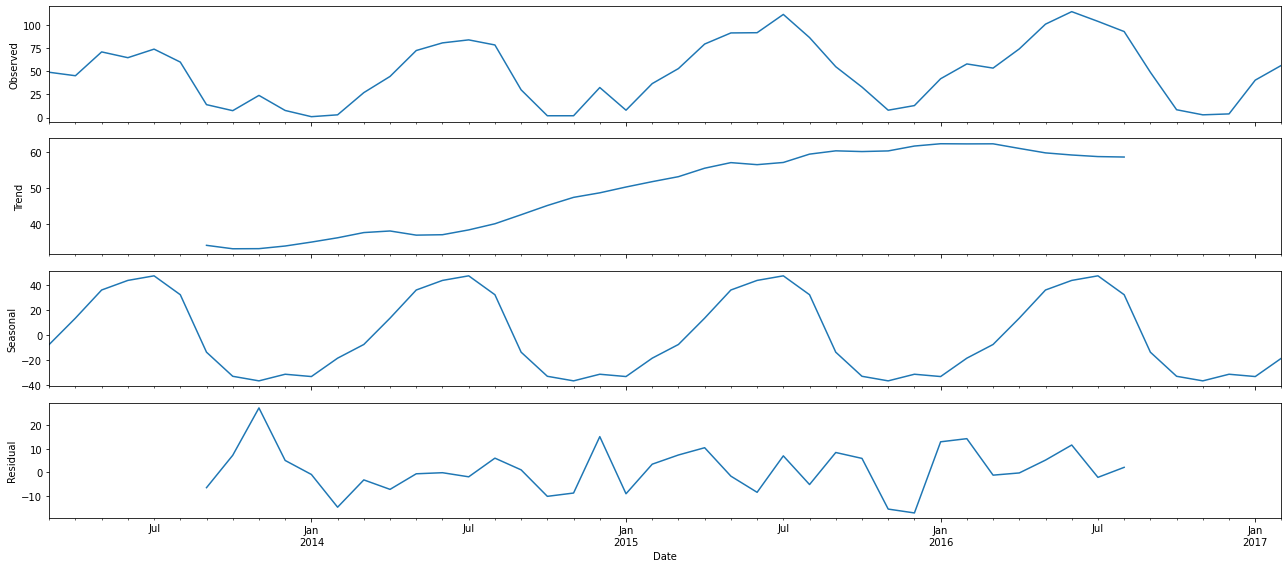

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df8, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df8,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:519.6679209259286


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1310.4466384774223
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:304.12344928802924
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:218.43571337167762
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:311.1192772323834
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1258.0197677389897
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:212.18073358677606
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:106.67433163950585
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:206.37707045587058


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:1080.761272476442
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:95.96382992637399
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:462.9487897973973
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2532.64393148183
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:293.15724799141145
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:209.7999168476034
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:310.484922928561


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2420.515809493607
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:207.4835370829216
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:109.48379964622846
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:205.83642003119755
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:1934.2623110560055
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:97.95379853838865
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:427.63691897403044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:286.7953755070111
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:203.12796582992385
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:312.22733550079954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:209.3774431761377
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:107.80699670169571
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:207.35146728704837
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:948.012470588505
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:95.6653466201749
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:418.5085676625455
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1422.8082371928708
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:300.72683380756786


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:220.80866248652262
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:306.43223600237087


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1043.7684920798215
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:201.43928711760606
ARIMA(0, 1, 0)x(1, 2, 0, 12)12 - AIC:102.37000243753981
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:201.44385877272347
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:202.59795104577503
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:94.73697916463911
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:404.1238056068549


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1311.3503056955442
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:282.5667913904049
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:203.11296904639033
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:301.5447267501649


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1284.5993138050617
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:195.08257510720279
ARIMA(0, 1, 1)x(1, 2, 0, 12)12 - AIC:98.60763386540668
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:197.0522176771928
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:198.49728870312964
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:93.38304525046075
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:396.8236020061962
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1450.9507660302897
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:275.1939145951643
ARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:194.13853213290784
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:302.924931465595
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1414.9949131207522
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:196.29071648588052
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:100.41775693446222
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:198.24611023323146
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:199.6704571524293
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:93.66470910866457
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:418.84326069349027
A

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(0, 2, 0, 12)12 - AIC:233.98114641386735
ARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:318.14291998309346
ARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1339.387612447455
ARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:213.7469094581105
ARIMA(0, 2, 0)x(1, 2, 0, 12)12 - AIC:104.69221127813563
ARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:203.66228836191368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:1056.0196945856055
ARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:96.32121514450378
ARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:407.1432336774587
ARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:2902.7211986917773
ARIMA(0, 2, 1)x(0, 1, 0, 12)12 - AIC:290.15615372653764
ARIMA(0, 2, 1)x(0, 2, 0, 12)12 - AIC:206.7864179118919
ARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AIC:304.26534295976313


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(1, 0, 1, 12)12 - AIC:1190.602901240566
ARIMA(0, 2, 1)x(1, 1, 0, 12)12 - AIC:198.9154302012549
ARIMA(0, 2, 1)x(1, 2, 0, 12)12 - AIC:98.57180641856466
ARIMA(0, 2, 1)x(2, 0, 0, 12)12 - AIC:199.0360301542041


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 1)x(2, 0, 1, 12)12 - AIC:1006.232162220393
ARIMA(0, 2, 1)x(2, 1, 0, 12)12 - AIC:90.45037585535253
ARIMA(0, 2, 2)x(0, 0, 0, 12)12 - AIC:392.53003837014506


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(0, 0, 1, 12)12 - AIC:1377.3398050263334
ARIMA(0, 2, 2)x(0, 1, 0, 12)12 - AIC:271.96344761038995
ARIMA(0, 2, 2)x(0, 2, 0, 12)12 - AIC:187.04574032576167
ARIMA(0, 2, 2)x(1, 0, 0, 12)12 - AIC:300.39628397817825


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(1, 0, 1, 12)12 - AIC:1360.4963259963156
ARIMA(0, 2, 2)x(1, 1, 0, 12)12 - AIC:192.43251012978158
ARIMA(0, 2, 2)x(1, 2, 0, 12)12 - AIC:96.39508247028681
ARIMA(0, 2, 2)x(2, 0, 0, 12)12 - AIC:194.08524464044245
ARIMA(0, 2, 2)x(2, 0, 1, 12)12 - AIC:906.4201343416844


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 2, 2)x(2, 1, 0, 12)12 - AIC:88.65795588451361
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:427.09766644612483
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1474.9335469382465
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:299.12163327648335
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:219.24372984249652
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:300.1320300468411
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1365.036842996097
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:197.9693177976741
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:100.24658174351883
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:198.67226018458646


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:914.5872297721414
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:90.91261701163873
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:413.2551701840226


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1162.882561739417
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:291.4521661074488
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:210.5212305933191
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:301.92803846864115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1056.3019990437365
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:192.03531990703058
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:100.90189854915864
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:193.64954272031267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:844.6200327870342
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:92.88233483851297
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:403.5830573907047
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1411.9449959777776
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:285.4004780011677
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:203.71492401003525
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:304.0388320055993
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:3179.9591588278563
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:193.8151125953368
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:102.35232667767336
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:195.52980211844


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:918.2501407682566
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:89.71895550005658
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:413.5110693954512


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1487.0072200130612
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:297.4980330503031
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:218.18420058806035
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:297.8212042395972


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1455.3553525204184
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:193.2509653975092
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:91.20522913016384
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:194.32721528256252
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:195.07472184556565
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:85.1724680256064
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:405.691567267449
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3454.4104525947646
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:284.4023128749177
ARIMA(1, 1, 1)x(0, 2, 0, 12)12 - AIC:204.97783972242735
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:293.5209795045569
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1591.2406858556192
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:188.48588802213771
ARIMA(1, 1, 1)x(1, 2, 0, 12)12 - AIC:91.35556433964297
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:190.68115173473075
ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:191.7717608142039
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:86.6293657722879
ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:395.5482873420868
ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1260.8797855653222
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:314.9410729160004
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:226.75946411074037
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:306.5007777950627


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1240.715621261248
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:201.22539546697988
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:91.1519293027441
ARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:196.5389139853165


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:859.2831179051791
ARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:83.8709131631564
ARIMA(1, 2, 1)x(0, 0, 0, 12)12 - AIC:400.6178109816874


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(0, 0, 1, 12)12 - AIC:954.8810327245161
ARIMA(1, 2, 1)x(0, 1, 0, 12)12 - AIC:287.53726153699614
ARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:204.5444672088842
ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:295.8213310227964


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:189.93743639453433
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:87.41446870988376
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:191.2799579288725


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:717.4363995979008
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:82.35350577537655
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:393.93459728615454
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1243.7514643833365
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:273.0843671331692
ARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:188.9888866727208
ARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:292.3923903030904


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:1228.0499067851524
ARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:184.85756199845022
ARIMA(1, 2, 2)x(1, 2, 0, 12)12 - AIC:88.02119801746196
ARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:186.57687856555242


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:774.6729416933699
ARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:83.46965065820079
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:412.09205485623863


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:1348.035863672288
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:292.75480840234985
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:211.7443145318124
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:294.4029401803715


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:1281.2910042778203
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:190.16846461220928
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:92.46070547068493
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:190.7231550764303


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:839.4243837773178
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:84.69622998533625
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:414.0879680876903
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:1436.964017024311
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:293.3284717607543
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:212.3626131581774
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:292.7848947843614
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:1330.2643617656372
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:185.30898132803154
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:92.73449027445014
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:187.97405025381974


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:839.8137091856396
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:86.49365442865313
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:405.5481208798728


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:1297.4720082937272
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:287.2788721336667
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:200.87837842686463


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:294.7572629769141


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:1193.9639064994863
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:184.92600134484252
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:94.88810369889269
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:188.19241101105476


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:813.8359534935894
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:88.10285270294739
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:405.56511282749244


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1305.5233710153982
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:287.3991935099878
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:205.47768200622858
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:289.1396470102379


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1173.6154619917424
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:180.16051226603022
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:84.12553508870708
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:182.1058517555533
ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:183.42198972972696
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:79.17400870417626
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:399.562948275795
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:2511.0466208835014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:286.00959817780455
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:205.57750183933317
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:286.4658794907358
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:2475.080413879479


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:179.2222956908612
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:85.13017874789989
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:180.57752456484997
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:189.81003115618864
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:81.7318584075772
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:374.630874937062
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:2422.4704521687513
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:276.8711166210086
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:196.9030962906281
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:288.4335992624335
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:2386.5110483441763
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:181.4210148420474
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:84.37783210724008
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:181.88383025808977


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:183.83620090779135


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:79.90753806335546
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:409.2628427085262


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1514.4070006705751
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:299.37996985795706
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:210.32753023529327
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:297.2730408982944
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1302.9819272217755
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:187.02726662085553
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:78.83275921340721
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:187.08392512739076


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 0)x(2, 0, 1, 12)12 - AIC:821.9005247752
ARIMA(2, 2, 0)x(2, 1, 0, 12)12 - AIC:71.69735259511484
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:402.10226828131914


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:1307.9633422543502
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:285.8643205693302
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:201.5353120028351
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:287.0751136297215


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:1293.4861341270575
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:177.31060382347906
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:77.72099184594056
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:180.40462070255595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:840.43478175254
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:74.65746871968291
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:395.710287214236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1384.1937672079794
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:274.76973416701856
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:190.18854320406746
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:289.64803505719544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1371.1398525481325
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:173.33866275977022
ARIMA(2, 2, 2)x(1, 2, 0, 12)12 - AIC:79.77142723604484


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:175.3217972031638


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:709.2227482485557
ARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:76.07058169062061


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
mod = sm.tsa.statespace.SARIMAX(df8,
                                order=(1,0,2),
                                seasonal_order=(2,1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3134      1.153      0.272      0.786      -1.946       2.573
ma.L1         -0.4141      3.764     -0.110      0.912      -7.791       6.963
ma.L2          0.9907     20.078      0.049      0.961     -38.362      40.343
ar.S.L12      -0.1996      0.420     -0.475      0.635      -1.023       0.624
ar.S.L24       0.2305      0.309      0.746      0.455      -0.375       0.836
sigma2        58.8156   1139.062      0.052      0.959   -2173.705    2291.337


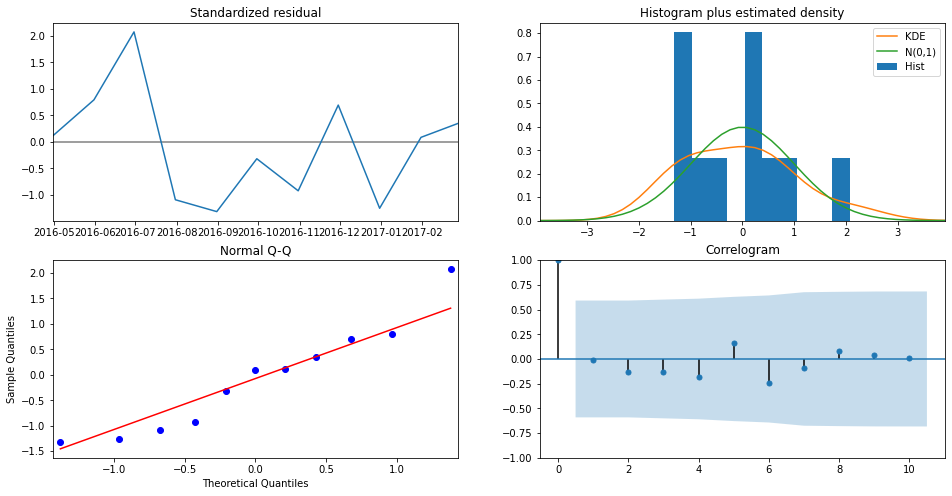

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

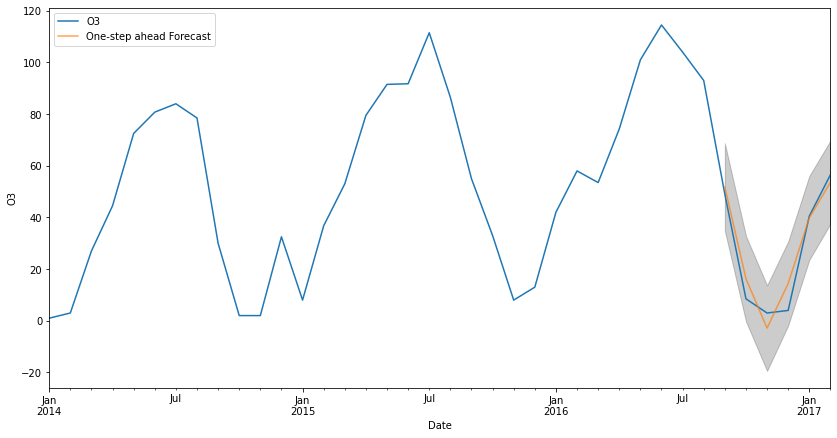

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df8['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('O3')
plt.legend()
plt.show()

In [ ]:
df8_forecasted = pred.predicted_mean
df8_truth = df8['2016-09-30':]

mse = ((df8_forecasted - df8_truth['O3']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 6.06


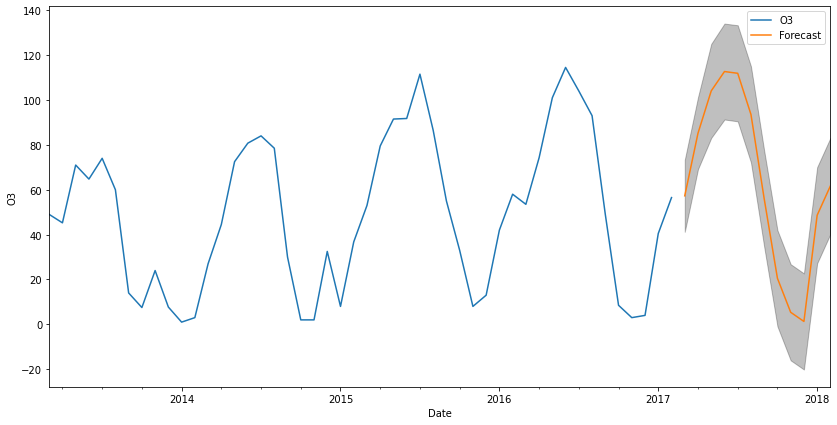

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df8.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('O3')
plt.legend()
plt.show()

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
for param in pdq:
          mod = sm.tsa.statespace.SARIMAX(df8,
                                            order=param,
                                            seasonal_order=(0,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
          results = mod.fit()
          print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:519.3876840907768
ARIMA(0, 0, 1) - AIC:462.6942258630668
ARIMA(0, 0, 2) - AIC:427.4264836465991
ARIMA(0, 1, 0) - AIC:418.6550333566089
ARIMA(0, 1, 1) - AIC:404.2783464392854
ARIMA(0, 1, 2) - AIC:396.96306614655003
ARIMA(0, 2, 0) - AIC:418.887789662707
ARIMA(0, 2, 1) - AIC:407.1550782035749
ARIMA(0, 2, 2) - AIC:392.68521177575076
ARIMA(1, 0, 0) - AIC:427.171390557603
ARIMA(1, 0, 1) - AIC:413.3336382737526
ARIMA(1, 0, 2) - AIC:403.64113232140295
ARIMA(1, 1, 0) - AIC:413.61811893267674
ARIMA(1, 1, 1) - AIC:405.8207141472225
ARIMA(1, 1, 2) - AIC:395.7617236081853
ARIMA(1, 2, 0) - AIC:417.43811792542925
ARIMA(1, 2, 1) - AIC:400.72486820335973
ARIMA(1, 2, 2) - AIC:394.06476377186624
ARIMA(2, 0, 0) - AIC:412.09901165070704
ARIMA(2, 0, 1) - AIC:414.09837777463724
ARIMA(2, 0, 2) - AIC:405.56987854309835
ARIMA(2, 1, 0) - AIC:405.707616499896
ARIMA(2, 1, 1) - AIC:407.2480099640482
ARIMA(2, 1, 2) - AIC:374.41697058070514
ARIMA(2, 2, 0) - AIC:409.2850286078252
ARIMA(2, 2, 1) - 

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df8,
                                order=(2,1,2),
                                seasonal_order=(0,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6908      0.044     38.494      0.000       1.605       1.777
ar.L2         -0.9708      0.051    -19.146      0.000      -1.070      -0.871
ma.L1         -1.8878      0.231     -8.164      0.000      -2.341      -1.435
ma.L2          1.0000      0.234      4.280      0.000       0.542       1.458
sigma2       198.2456      0.002   8.75e+04      0.000     198.241     198.250


In [ ]:
results.aic

405.8207141472225

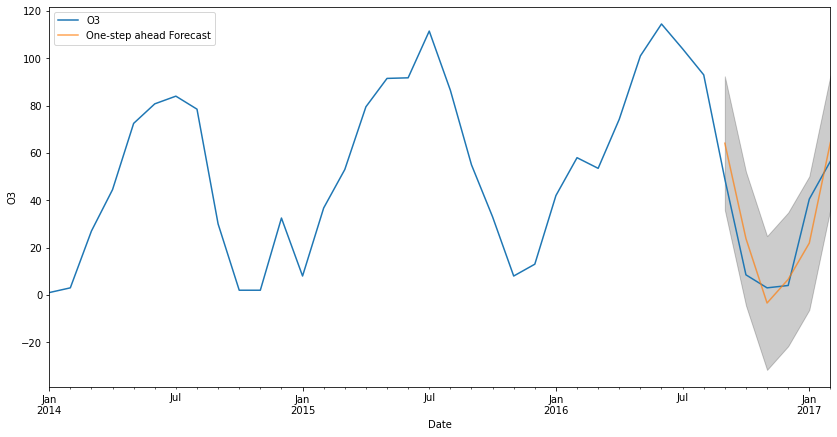

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-9-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = df8['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('O3')
plt.legend()
plt.show()

In [ ]:
df8_forecasted = pred.predicted_mean
df8_truth = df8['2016-09-30':]

mse = ((df8_forecasted - df8_truth['O3']) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 12.39


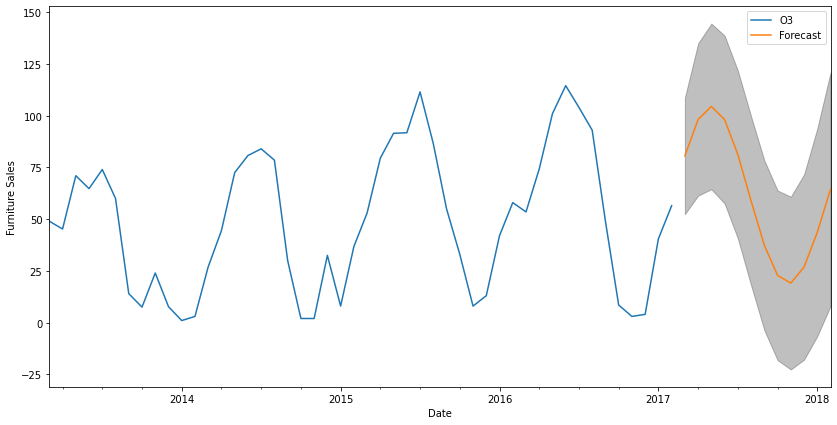

In [ ]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df8.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()